In [1]:
import json
import ast
import textwrap
from typing import Dict, Any, List, Tuple
import os
import importlib.util


In [2]:
def plot_task(
    task: List[dict],
    title: str = None
) -> None:
    """
    displays a task
    """
    cmap = ListedColormap([
        '#000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
        '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'
    ])
    norm = Normalize(vmin=0, vmax=9)
    args = {'cmap': cmap, 'norm': norm}
    height = 2
    width = len(task)
    figure_size = (width * 3, height * 3)
    figure, axes = plt.subplots(height, width, figsize=figure_size)
    if width > 1:
        for column, example in enumerate(task):
            axes[0, column].imshow(example['input'], **args)
            axes[1, column].imshow(example['output'], **args)
            axes[0, column].axis('off')
            axes[1, column].axis('off')
    else:
        example=task[0]
        axes[0].imshow(example['input'], **args)
        axes[1].imshow(example['output'], **args)
        axes[0].axis('off')
        axes[1].axis('off')
    if title is not None:
        figure.suptitle(title, fontsize=20)
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()


In [3]:
def get_data(train=True):
    path = f'arc_original/{"training" if train else "evaluation"}'
    data = {}
    for fn in os.listdir(path):
        with open(f'{path}/{fn}') as f:
            data[fn.rstrip('.json')] = json.load(f)
    ast = lambda g: tuple(tuple(r) for r in g)
    return {
        'train': {k: [{
            'input': ast(e['input']),
            'output': ast(e['output']),
        } for e in v['train']] for k, v in data.items()},
        'test': {k: [{
            'input': ast(e['input']),
            'output': ast(e['output']),
        } for e in v['test']] for k, v in data.items()}
    }


In [4]:
data = get_data()

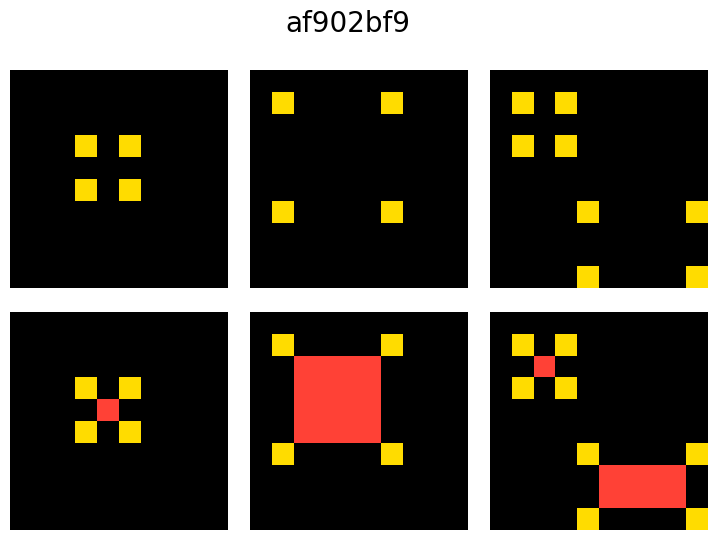

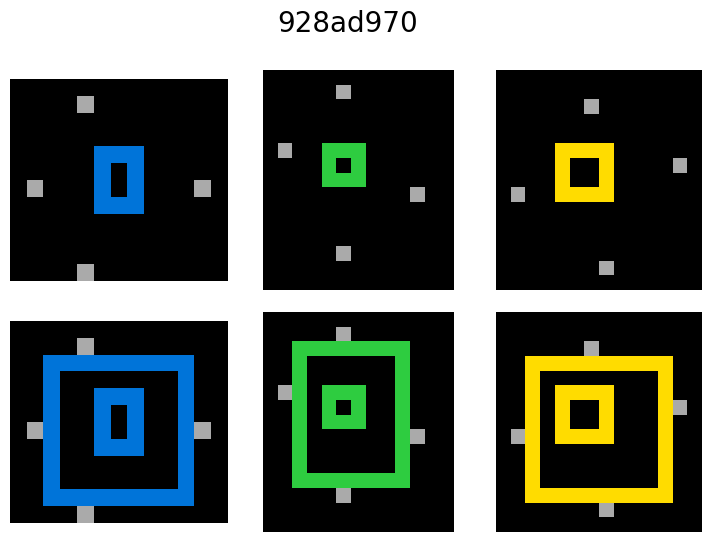

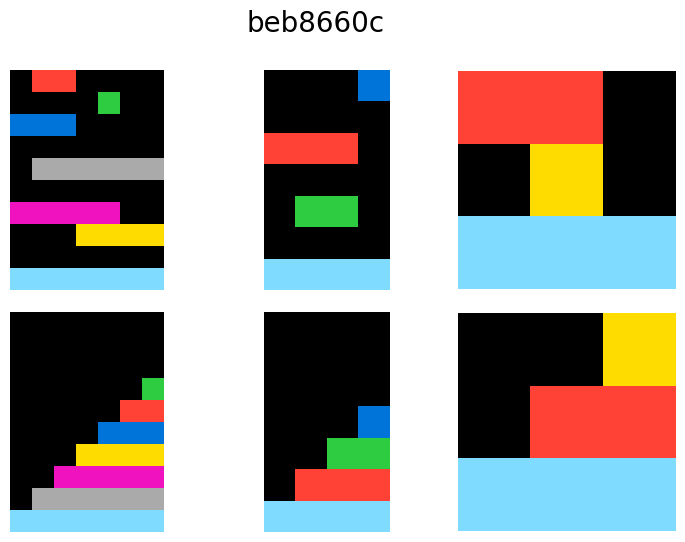

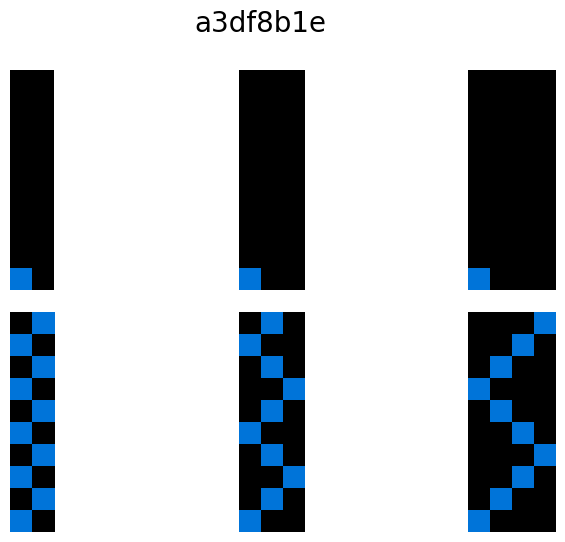

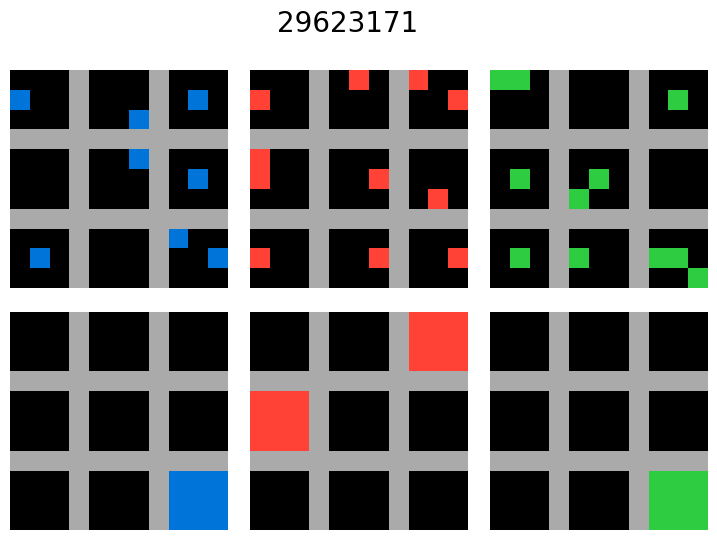

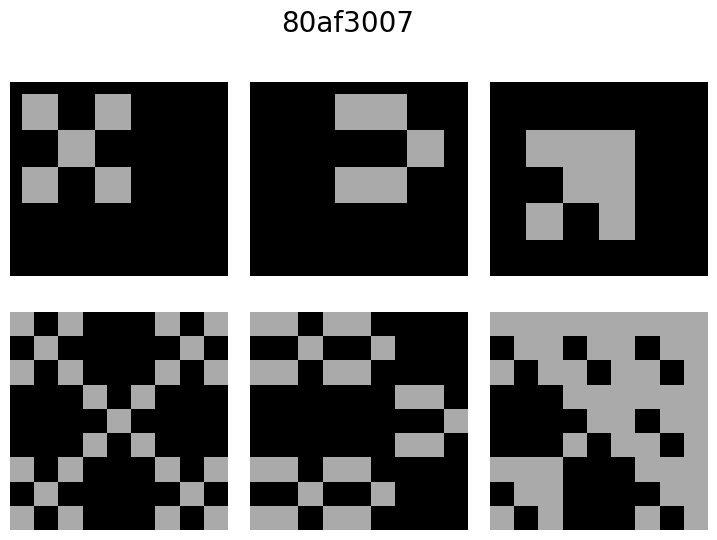

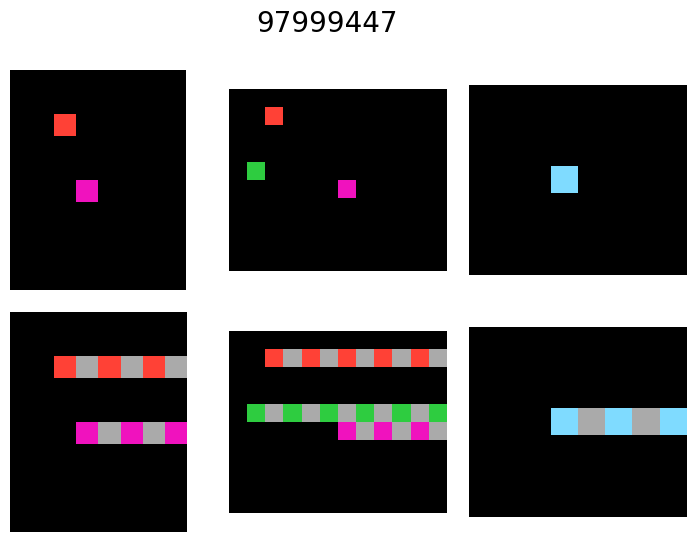

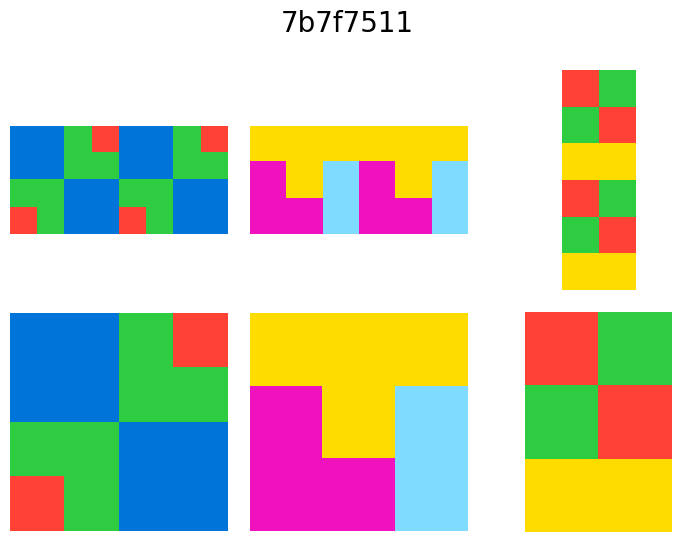

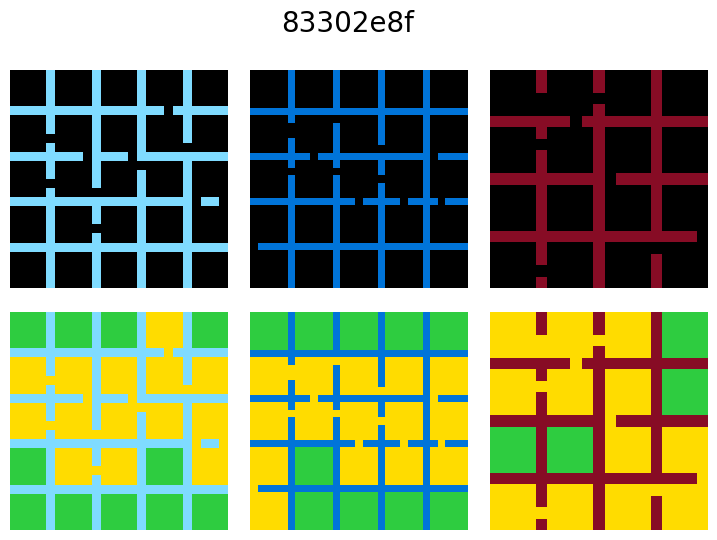

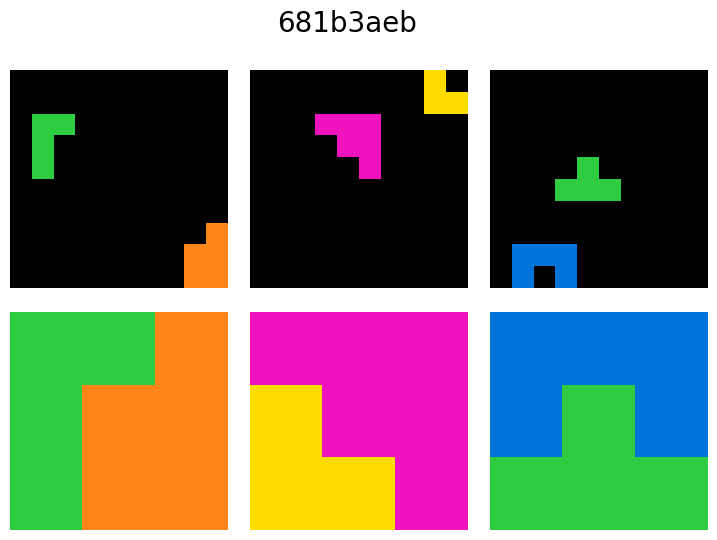

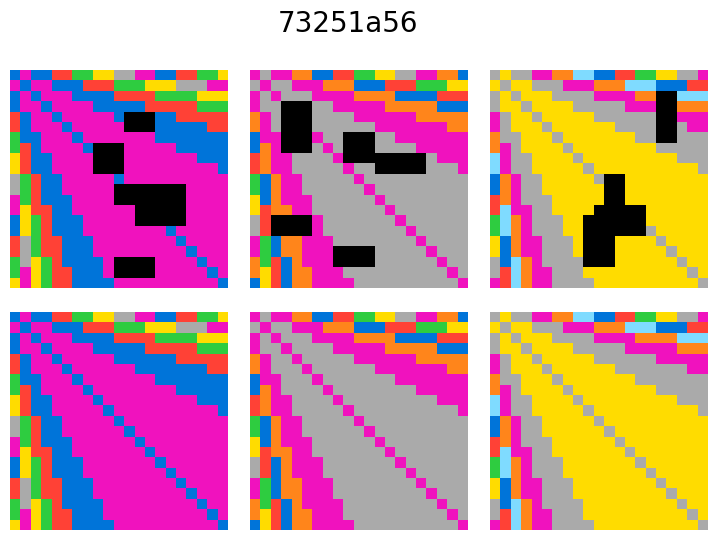

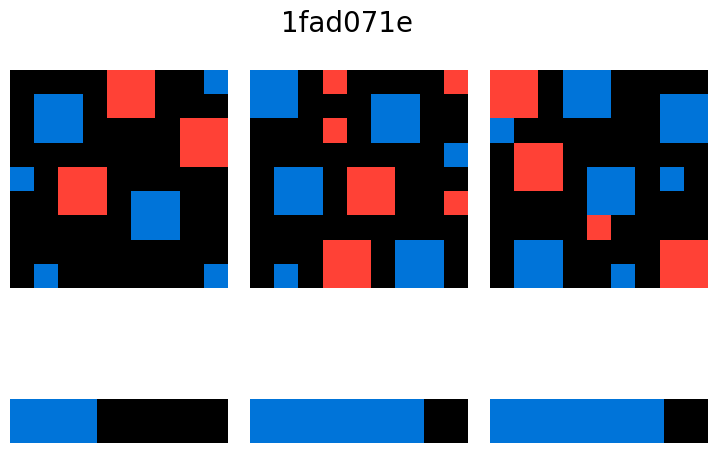

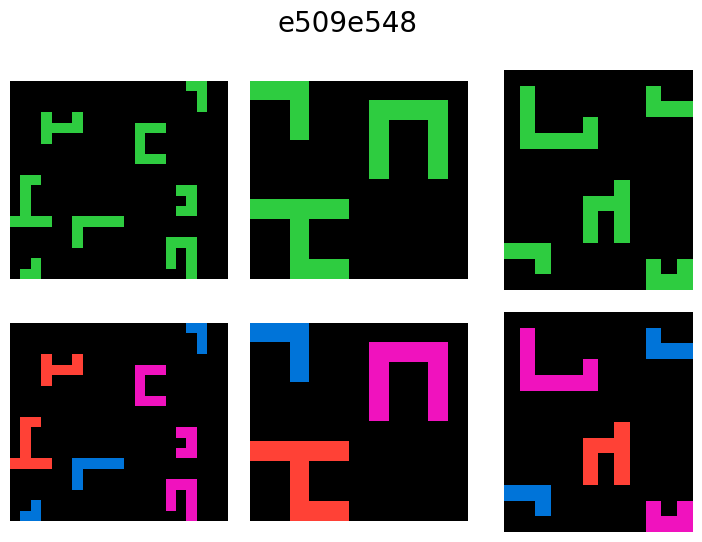

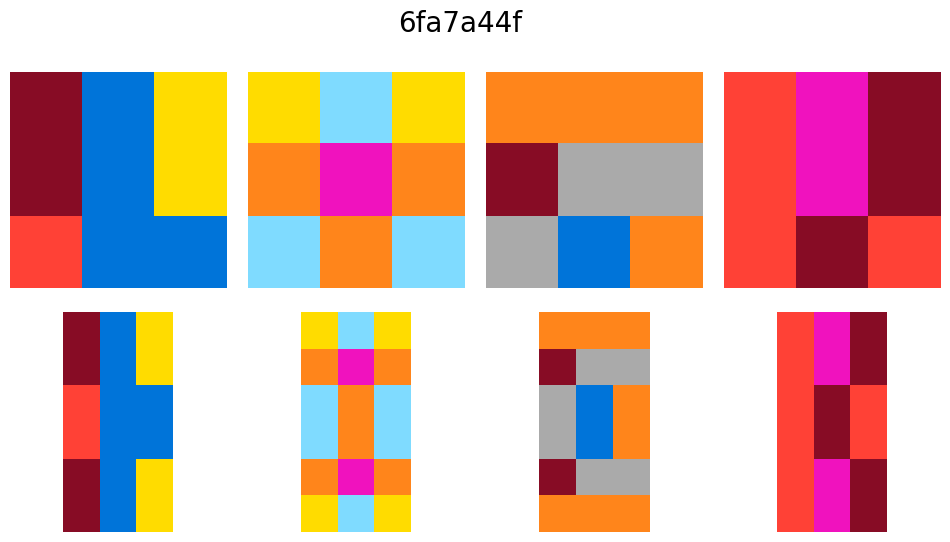

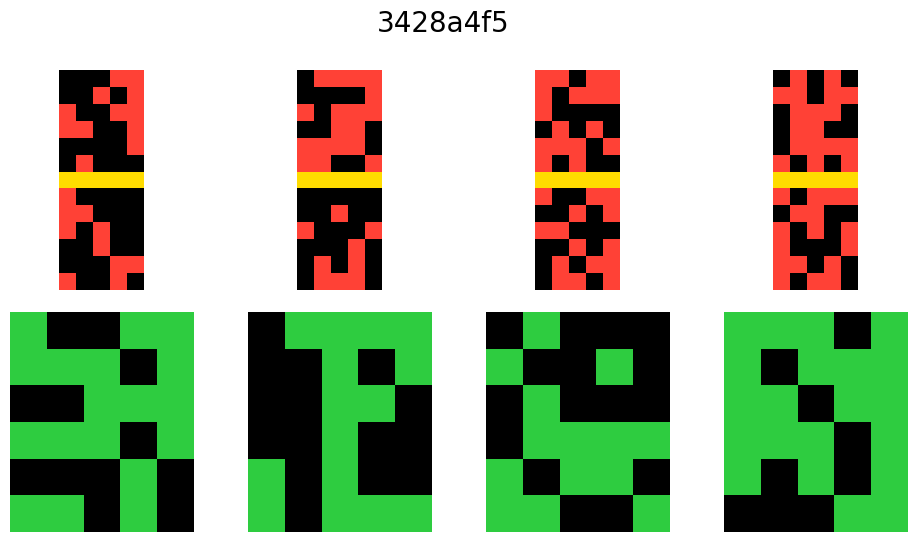

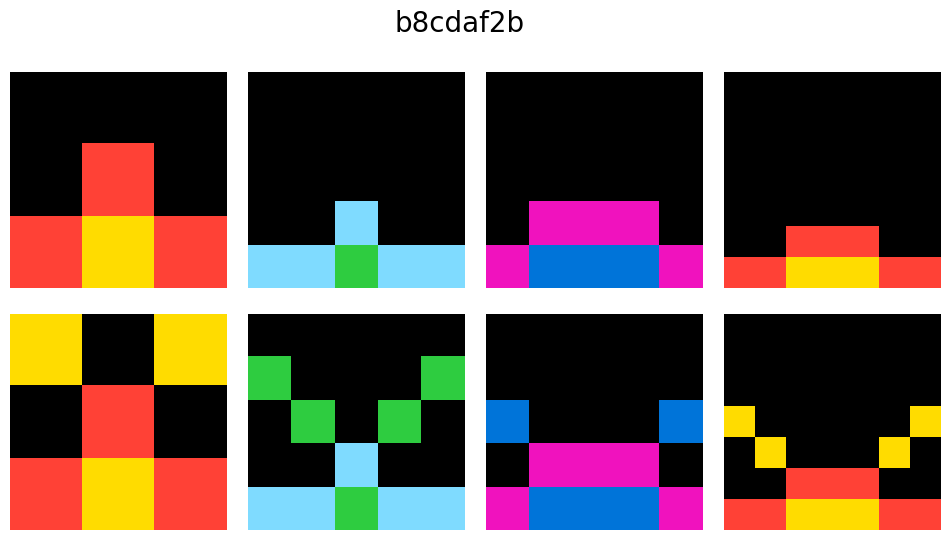

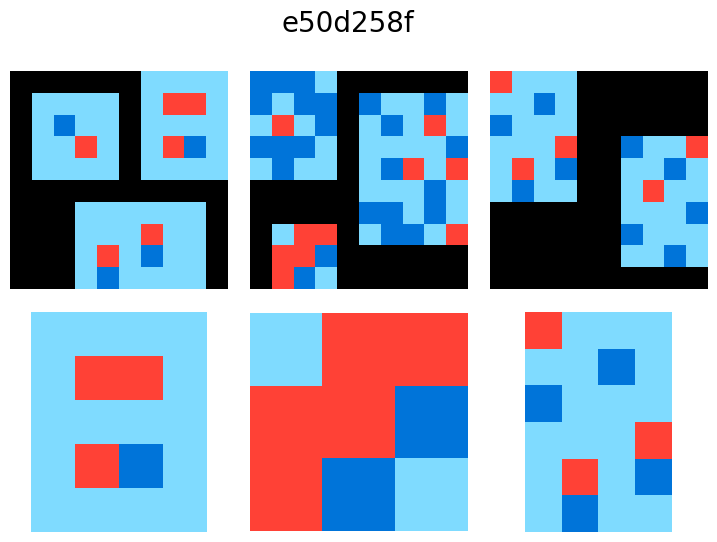

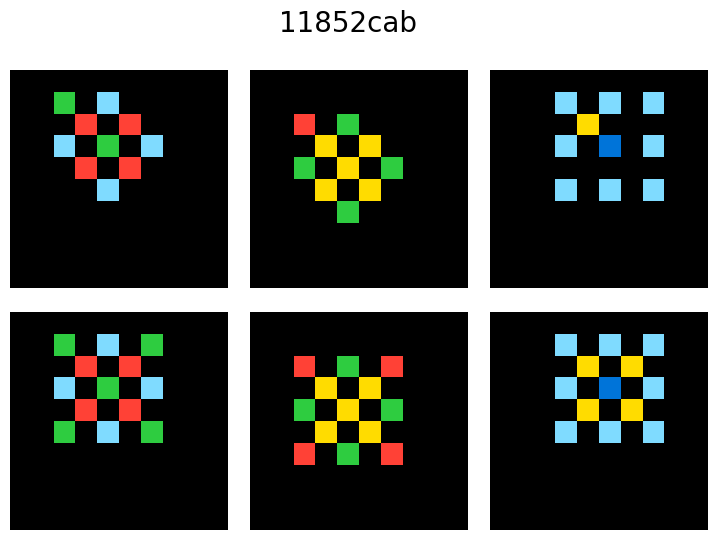

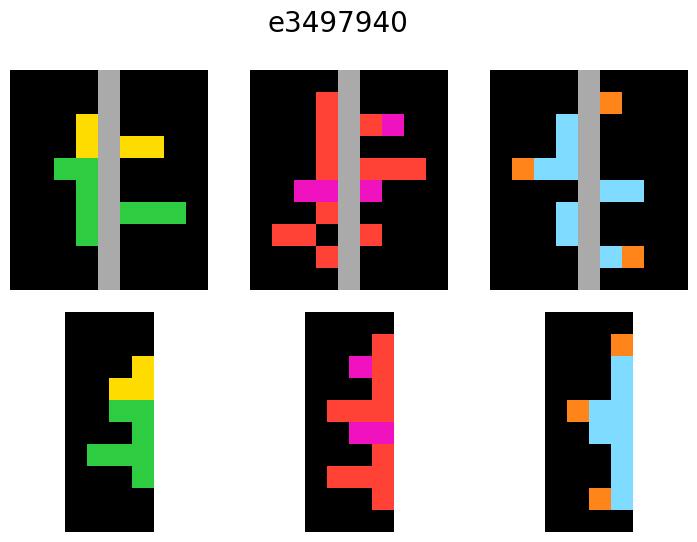

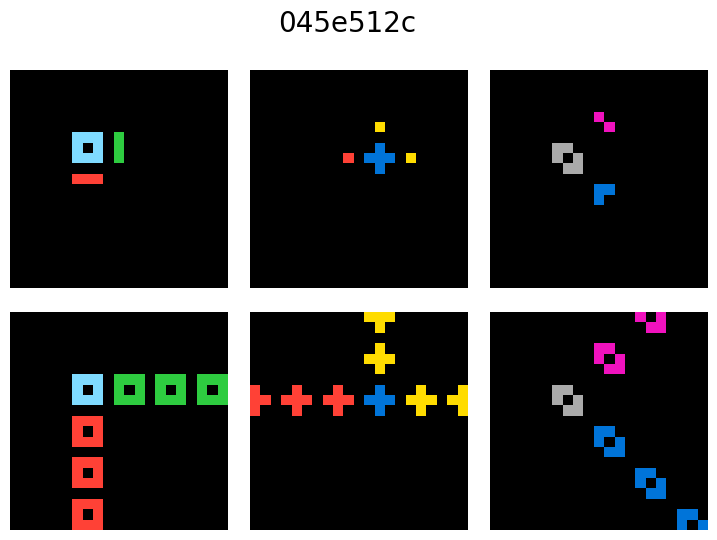

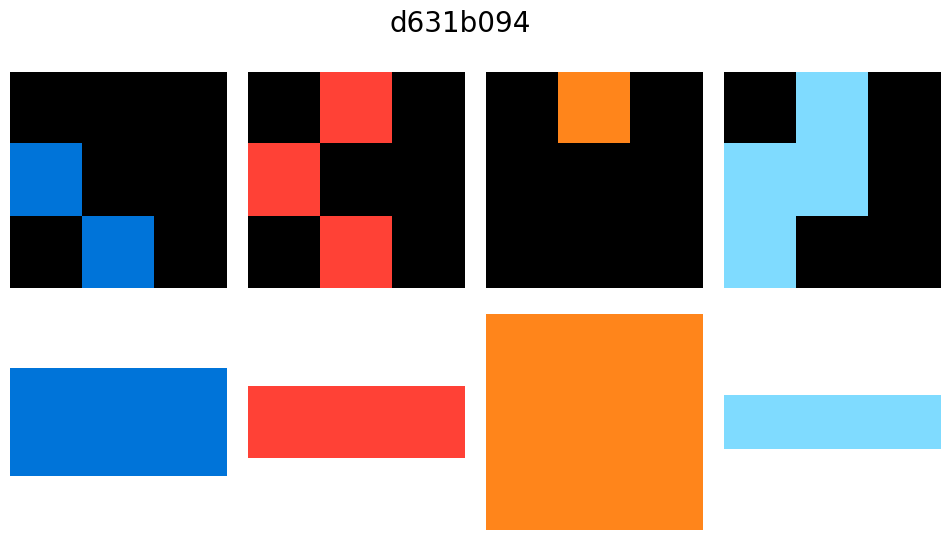

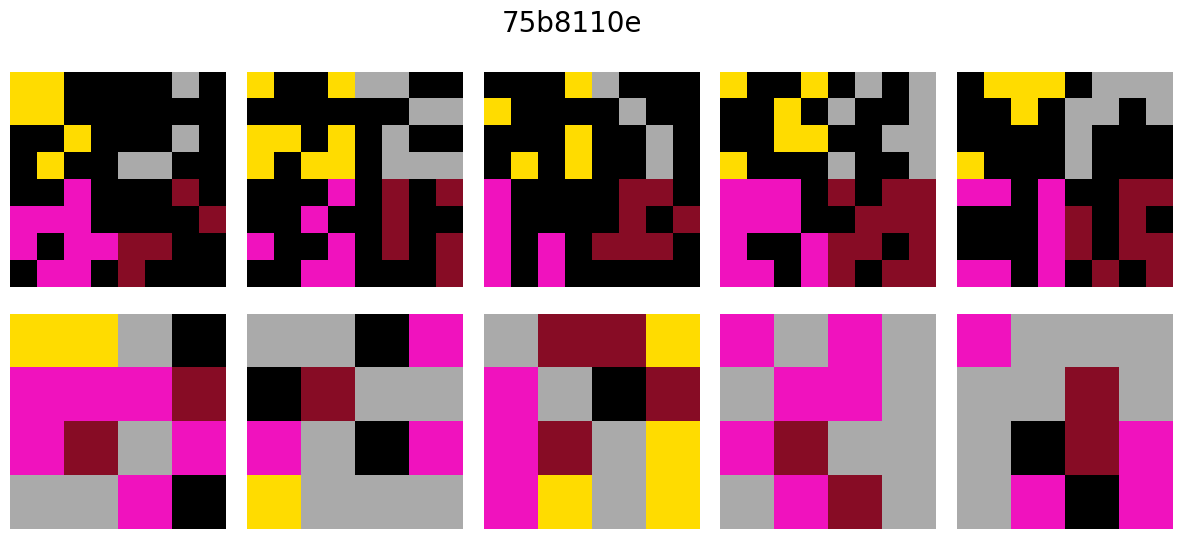

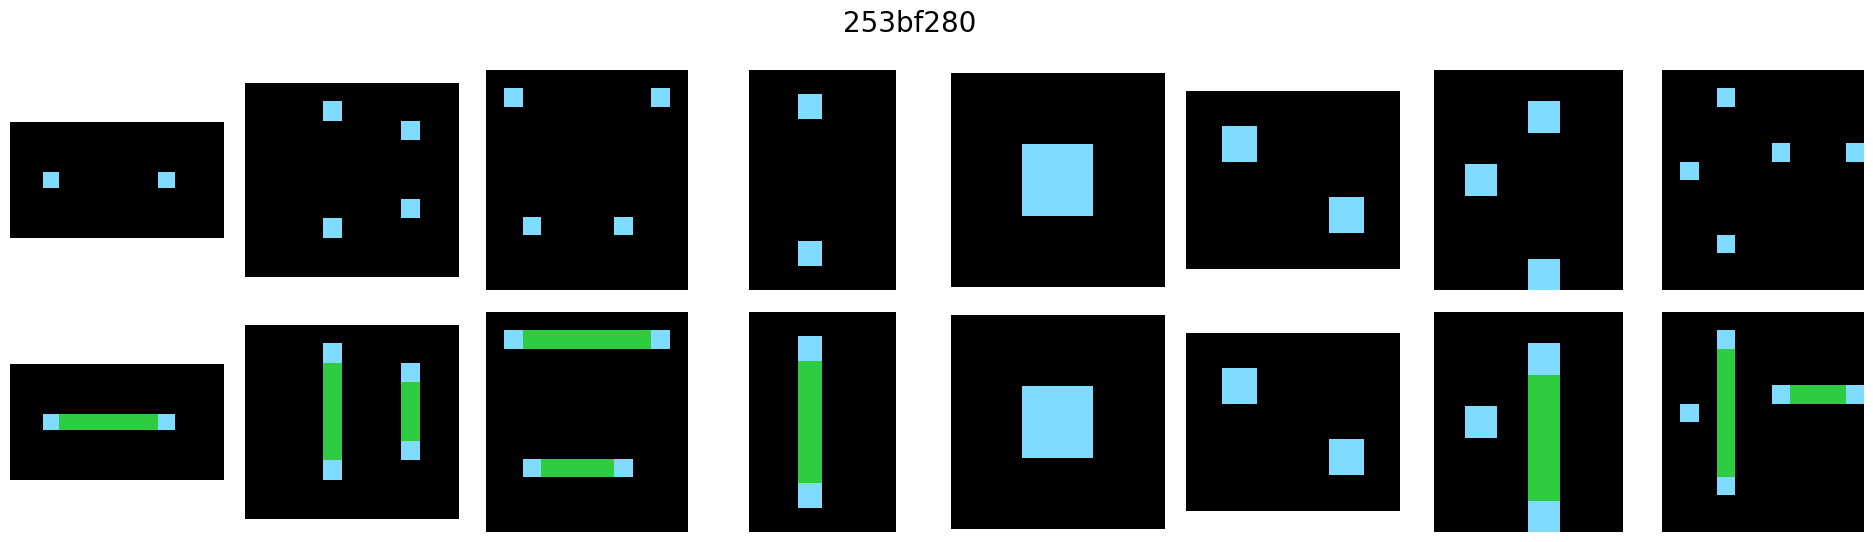

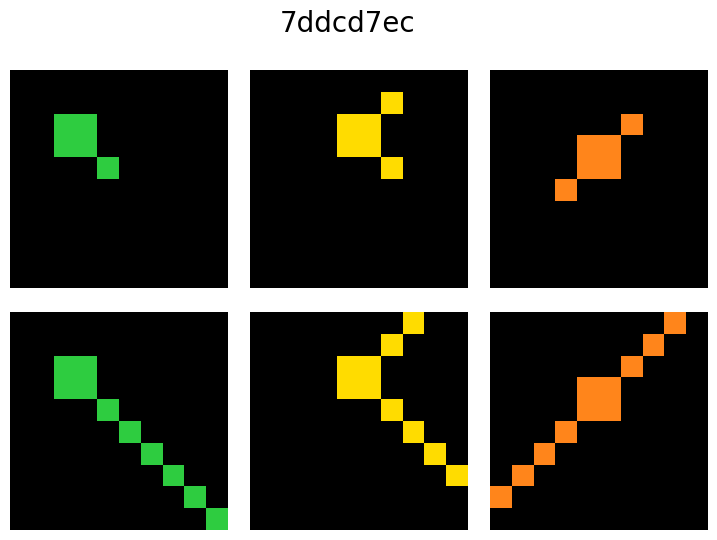

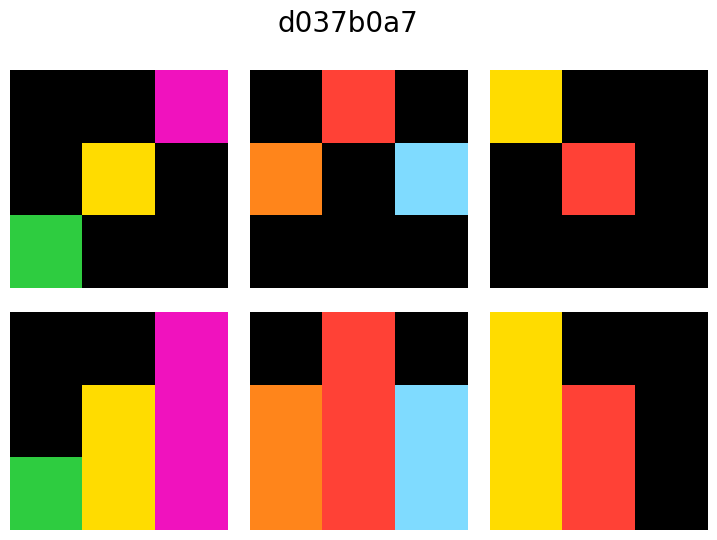

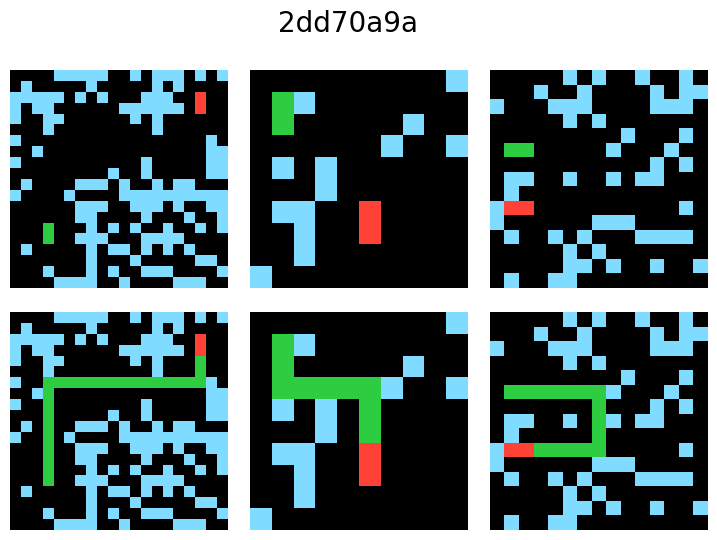

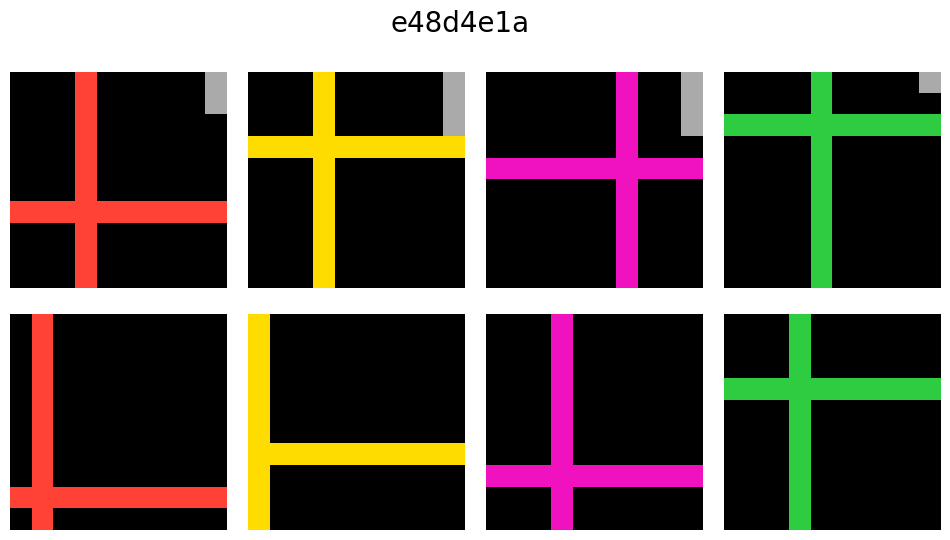

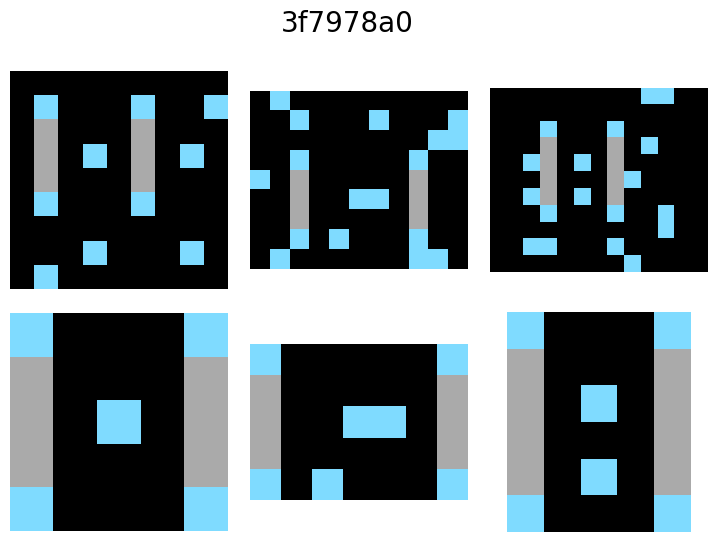

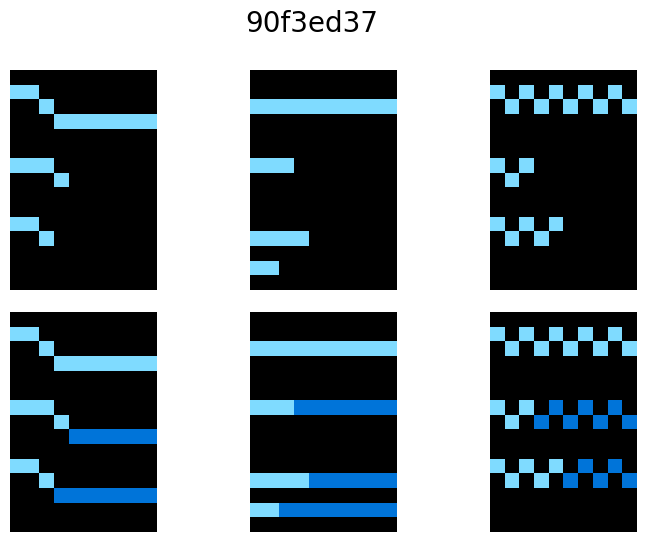

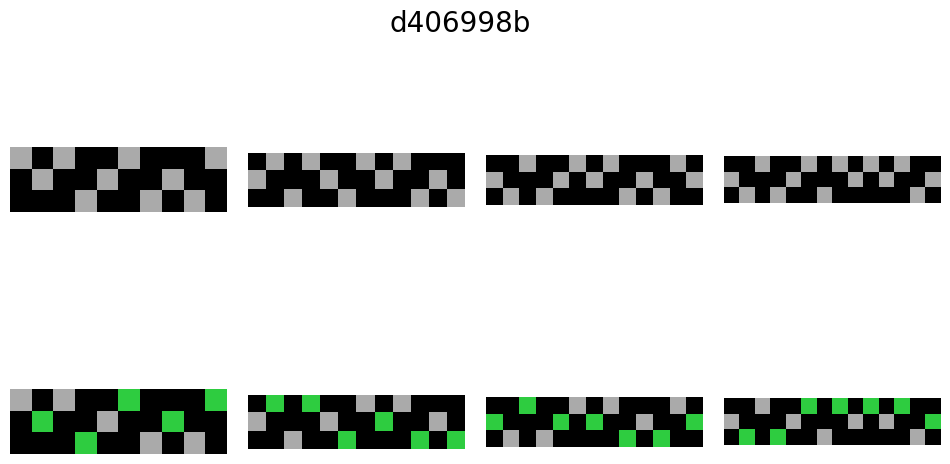

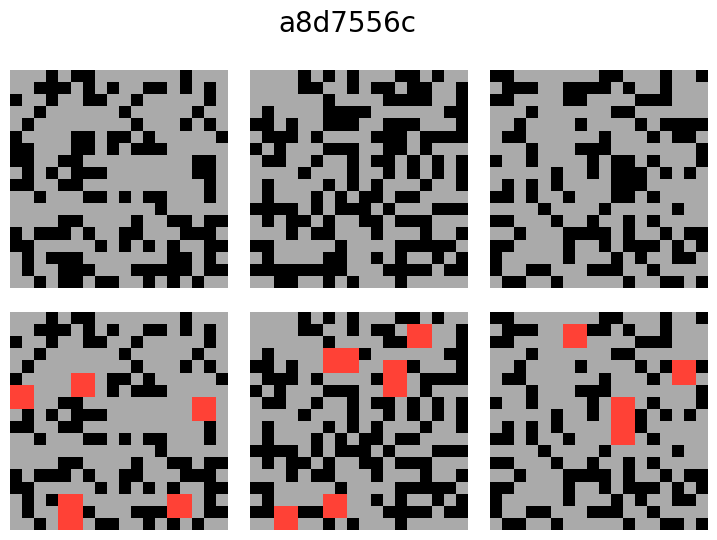

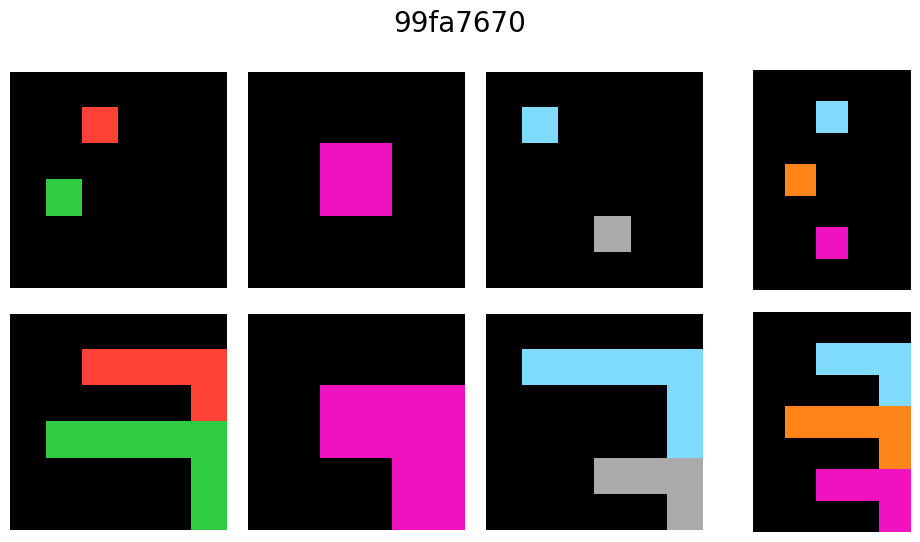

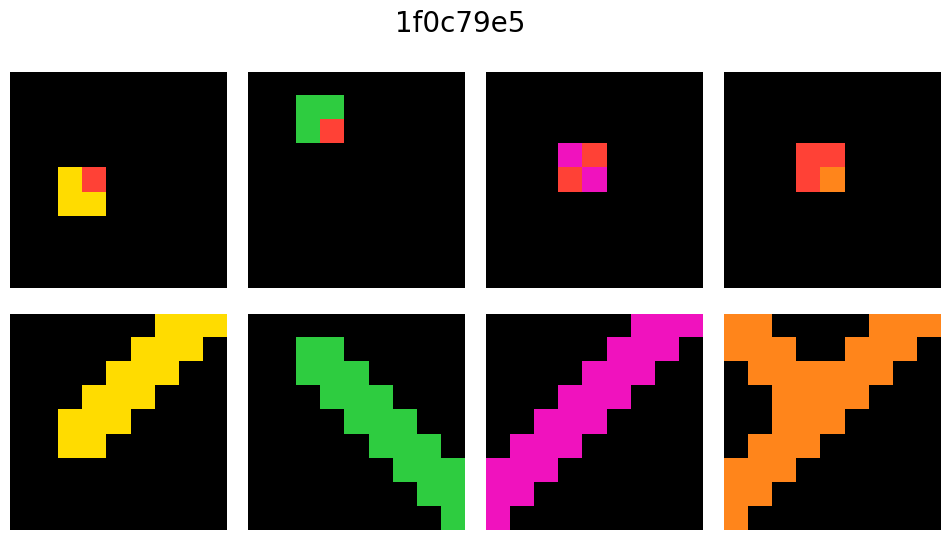

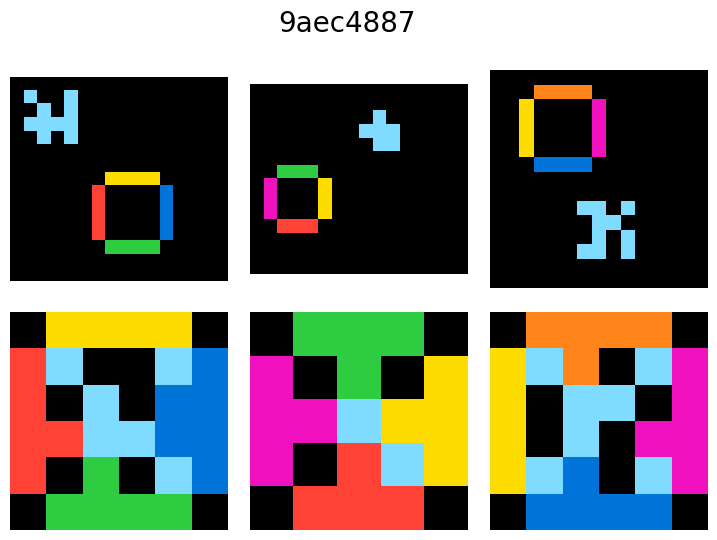

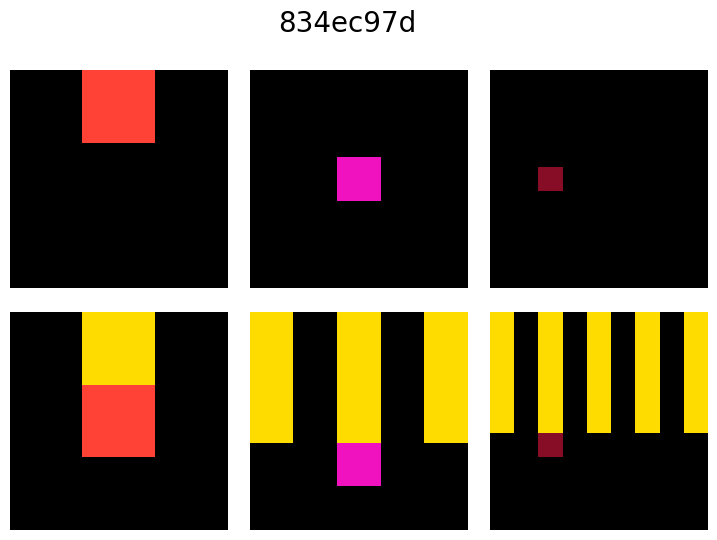

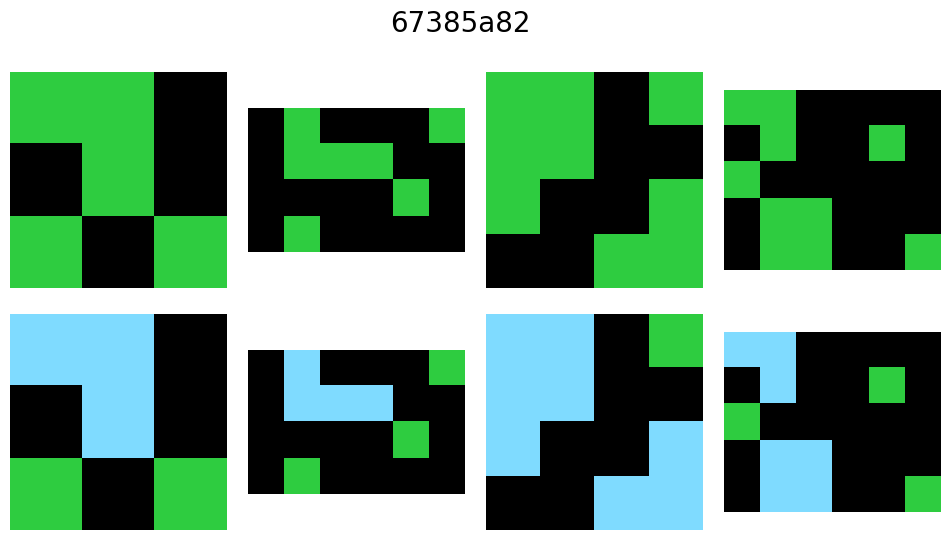

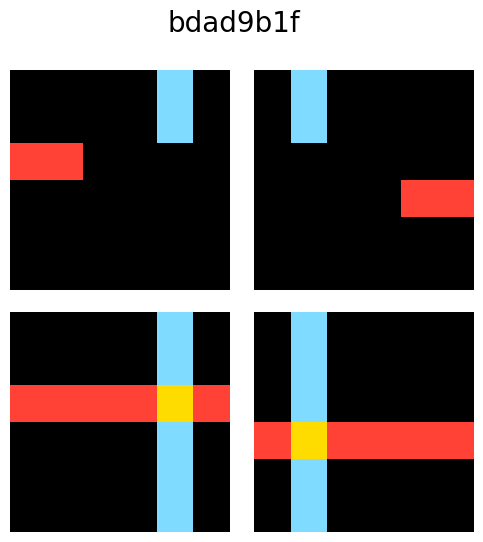

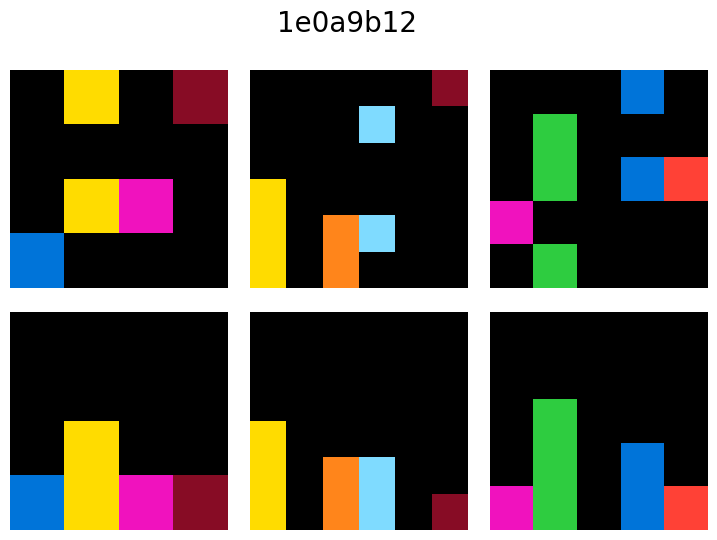

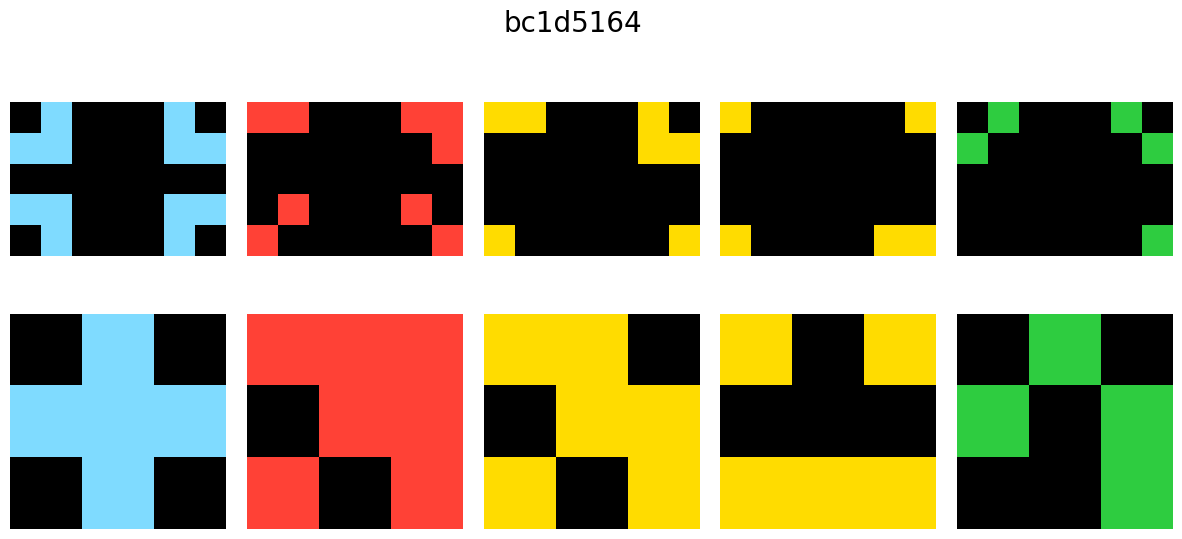

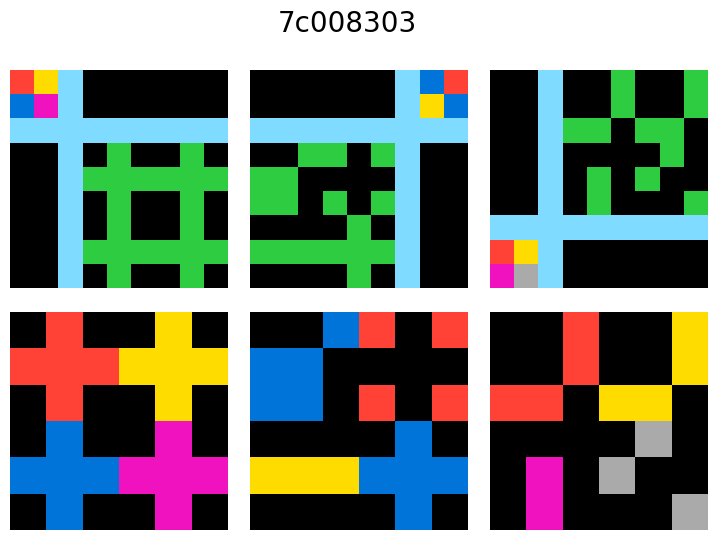

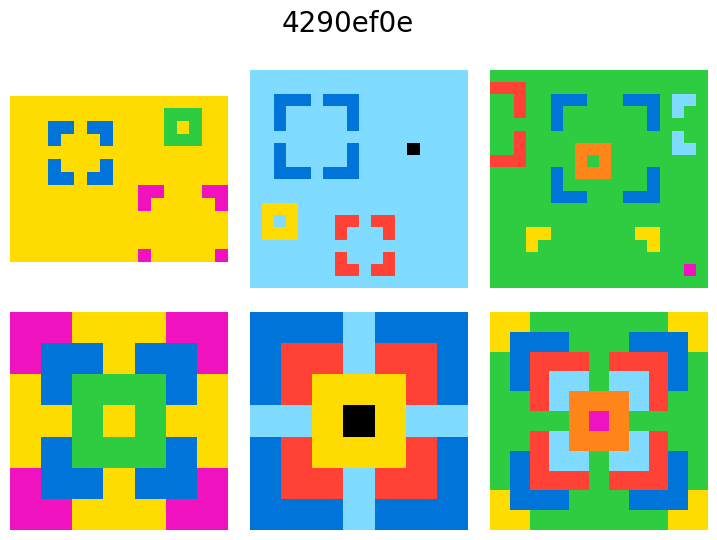

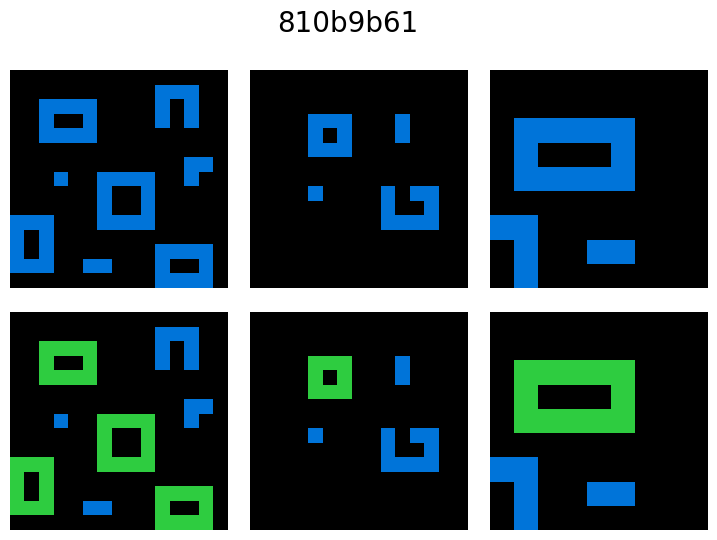

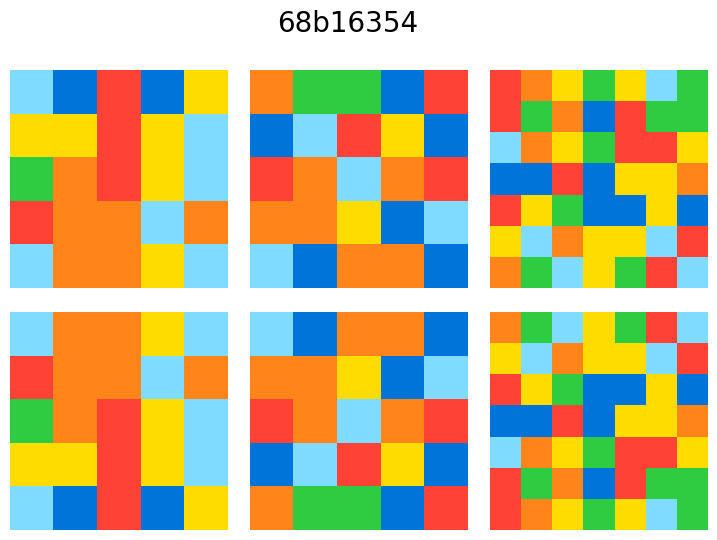

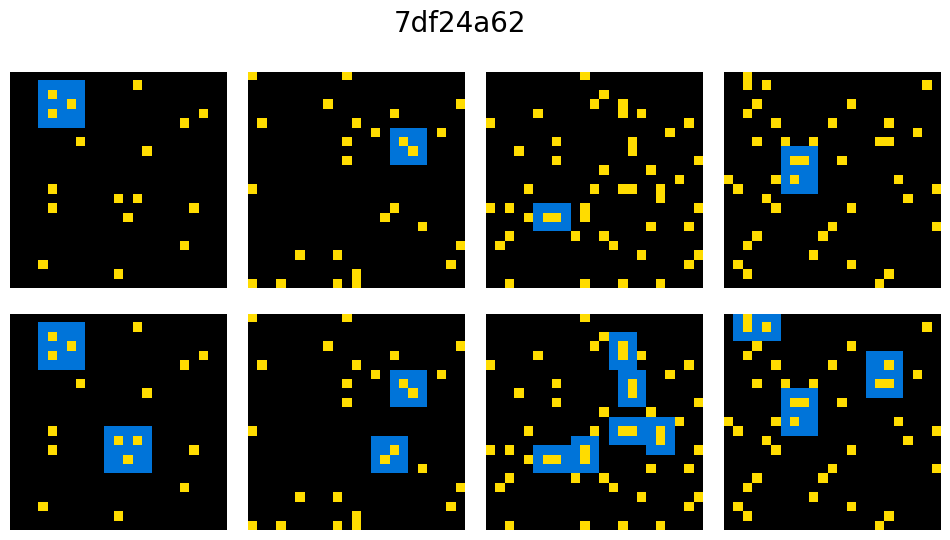

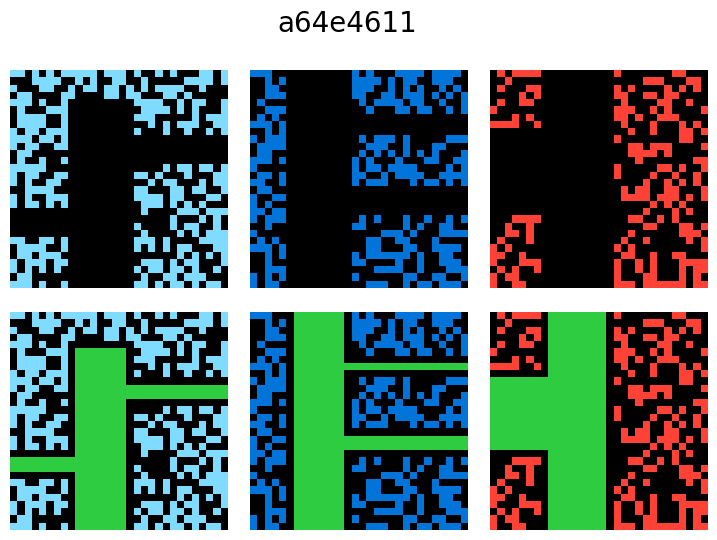

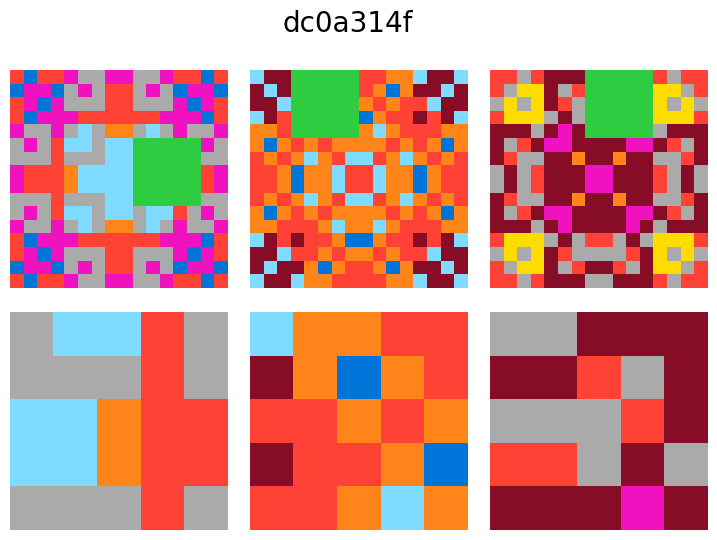

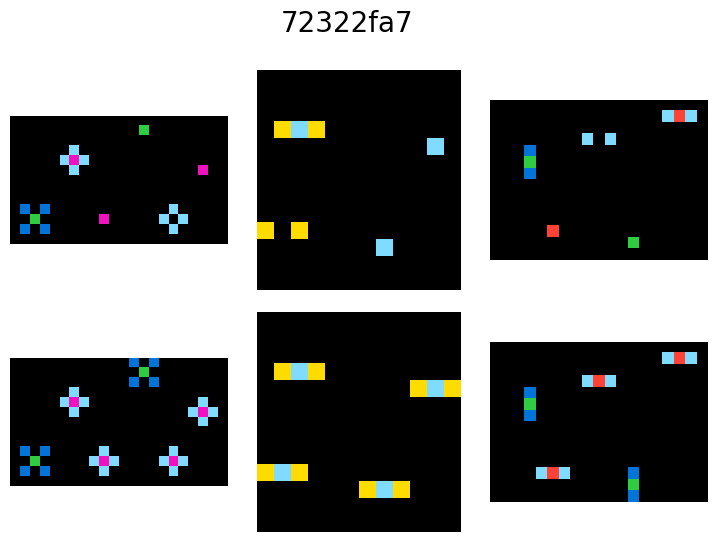

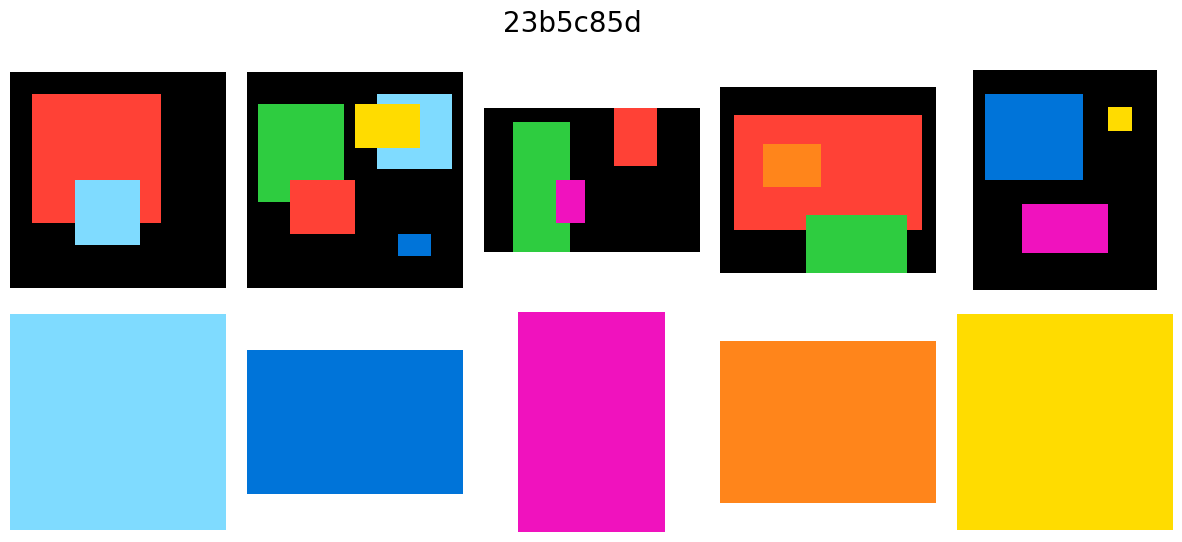

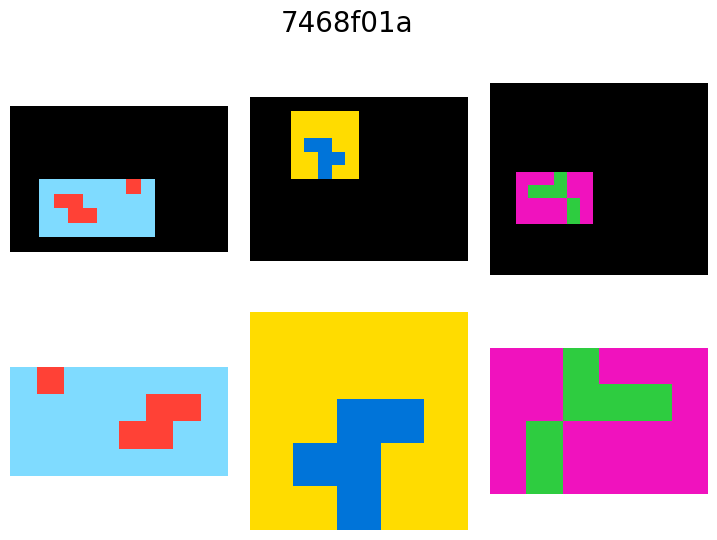

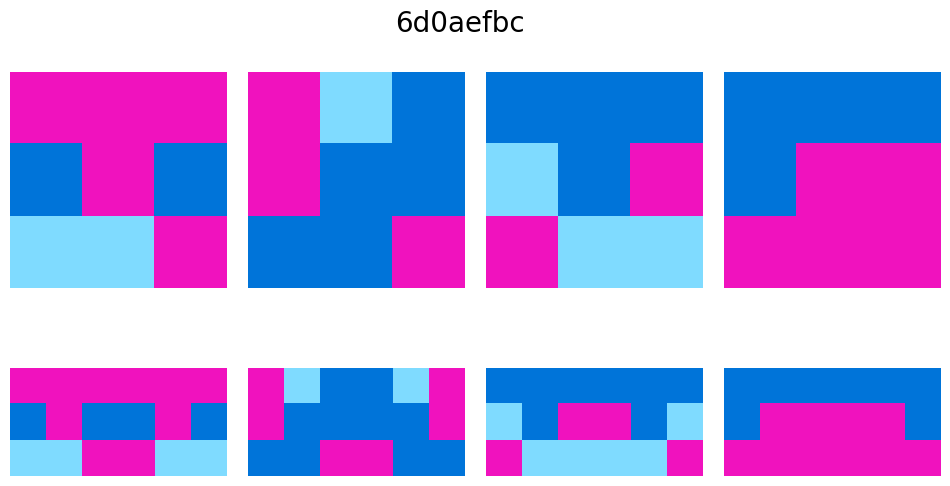

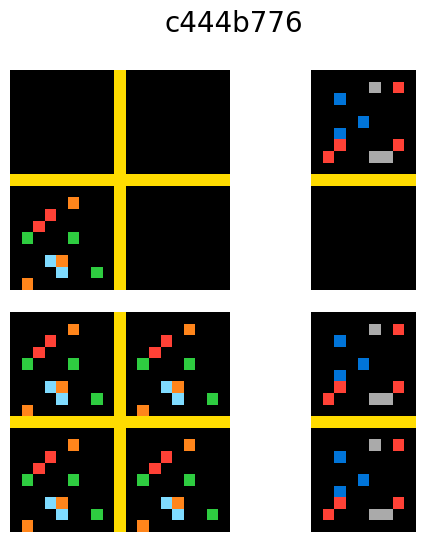

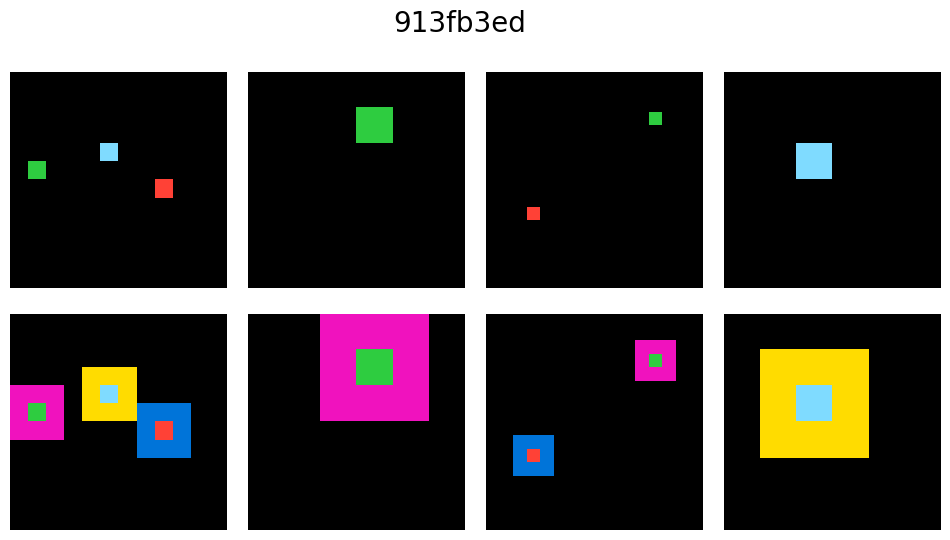

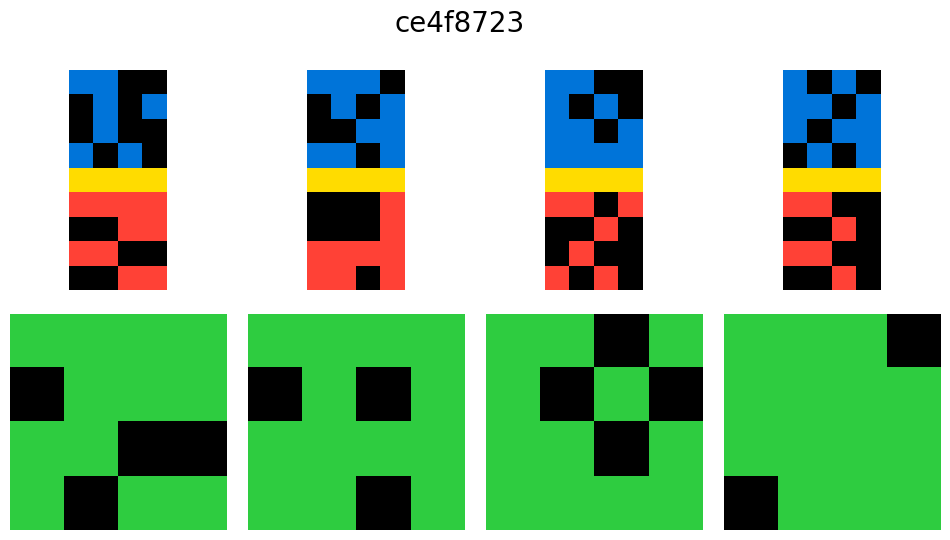

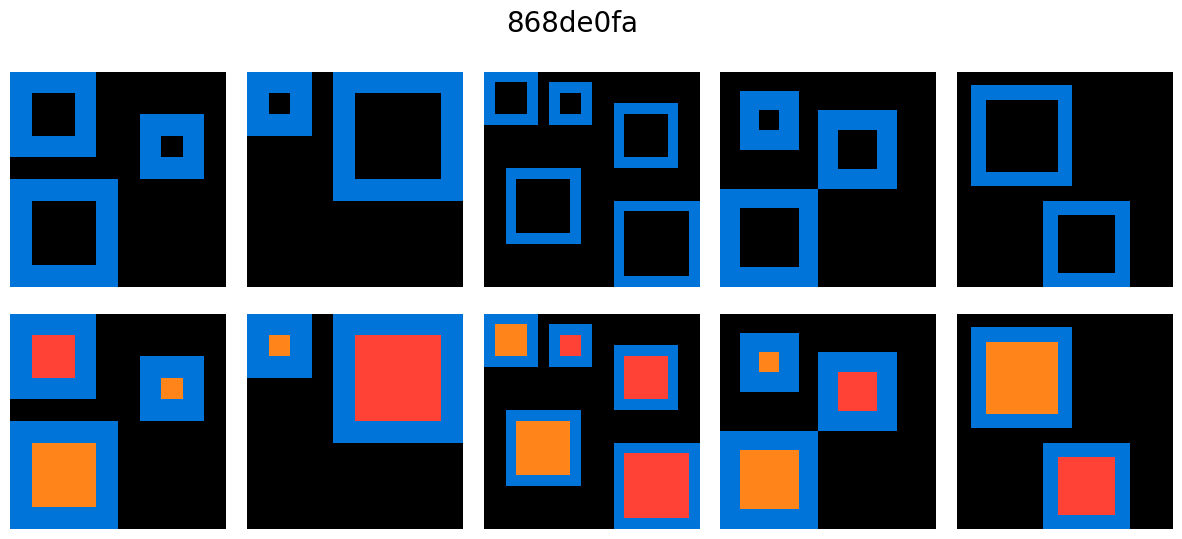

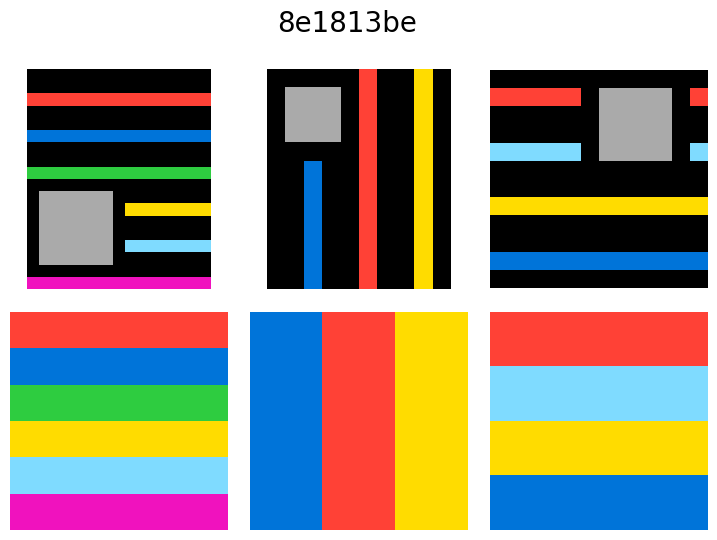

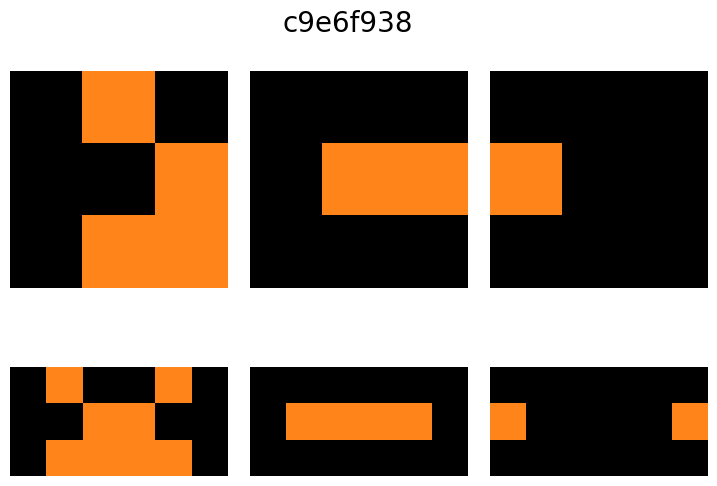

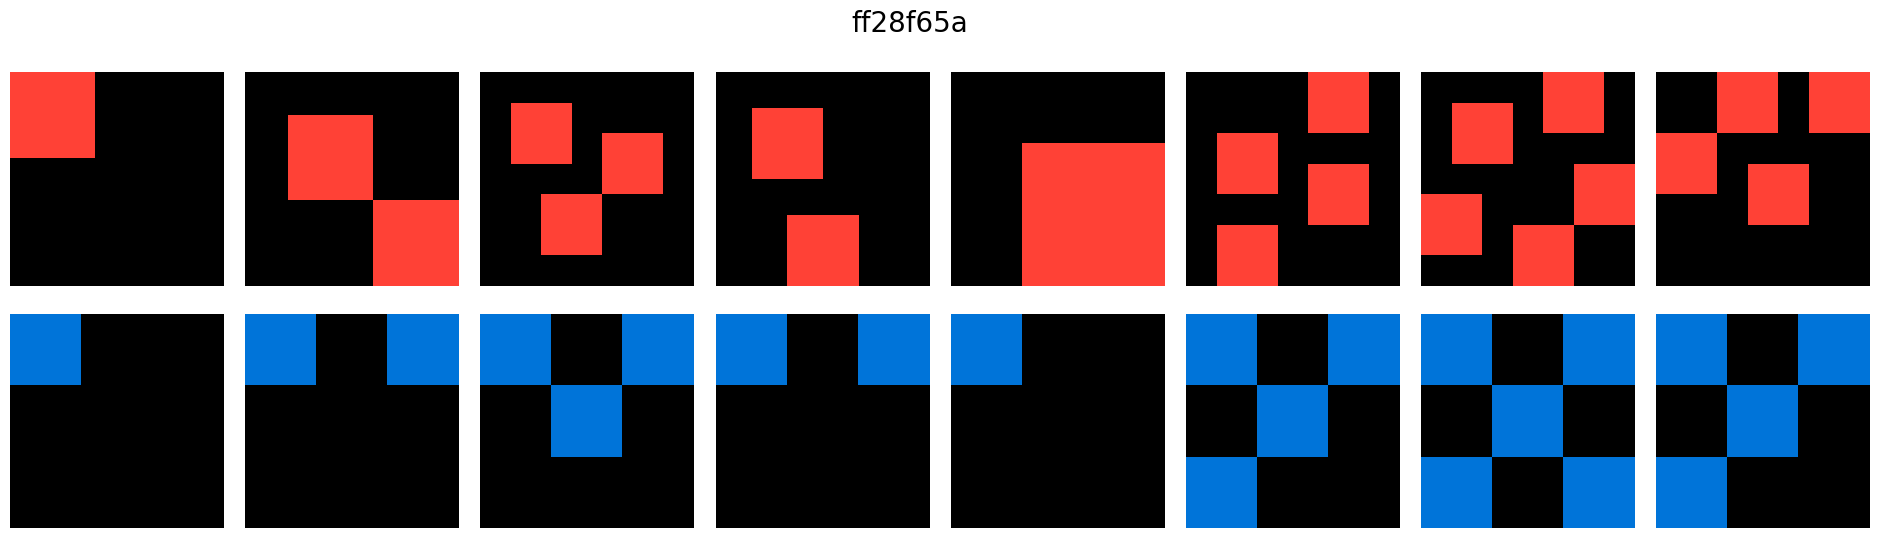

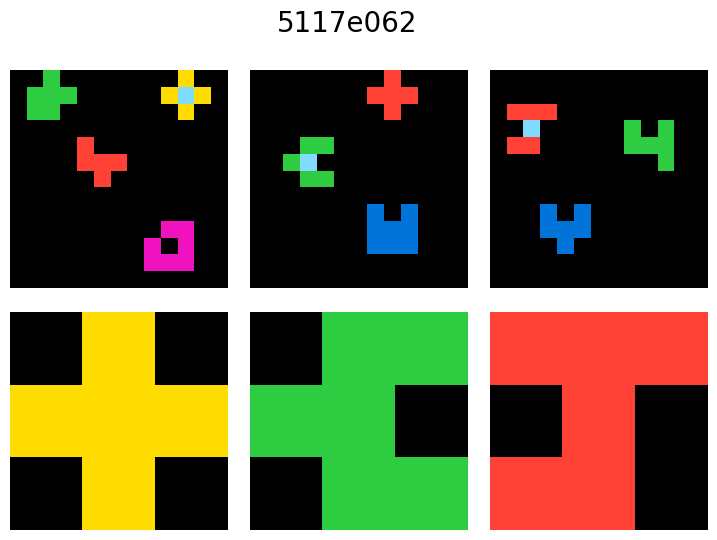

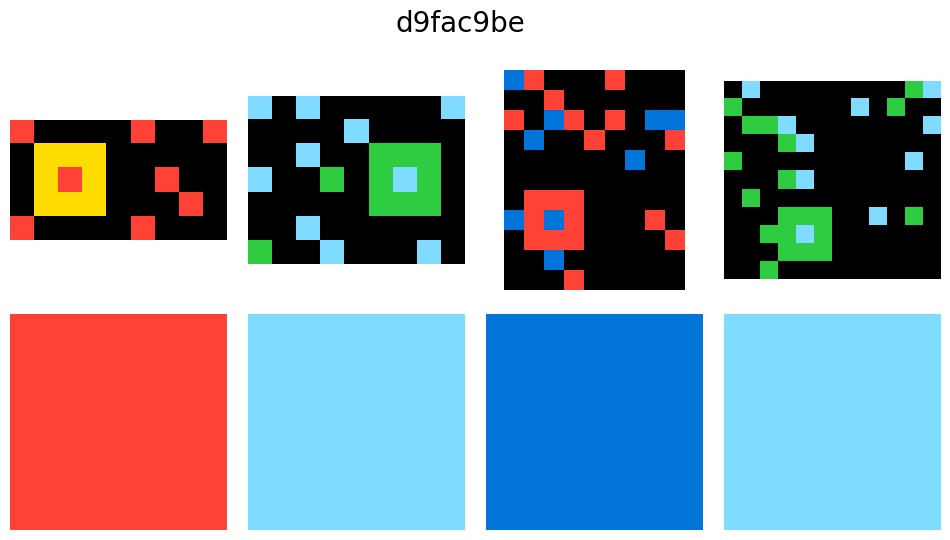

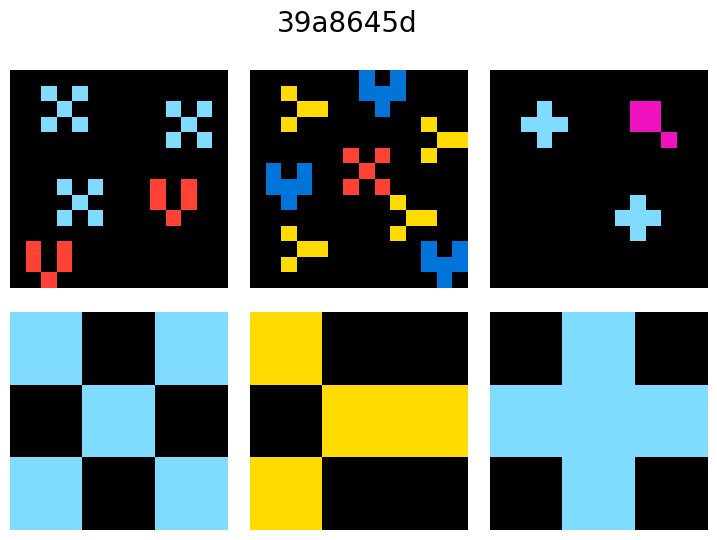

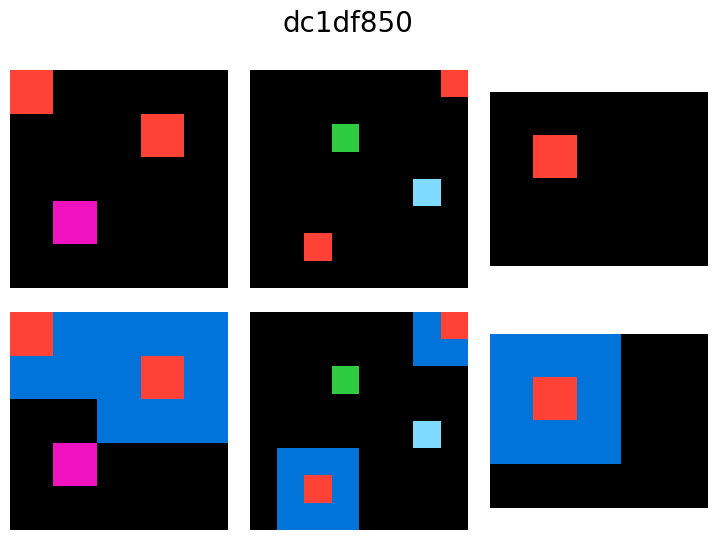

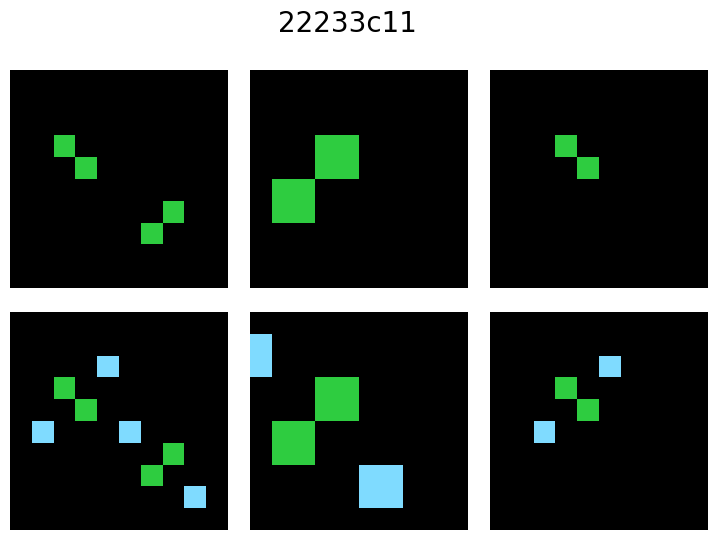

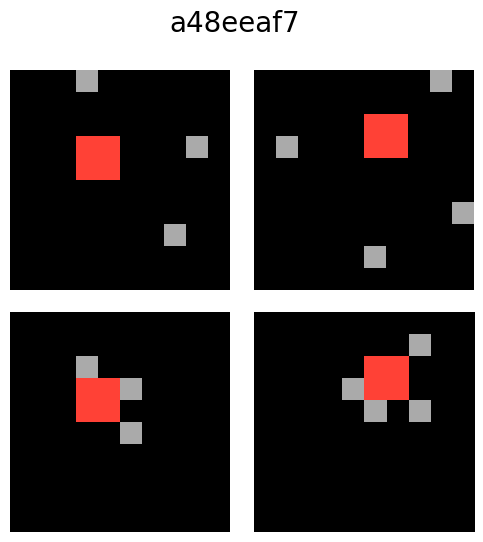

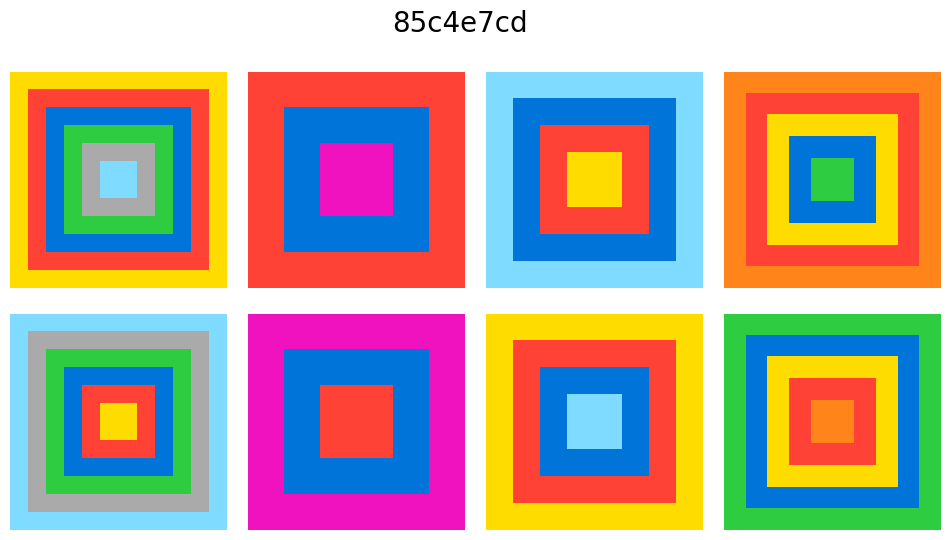

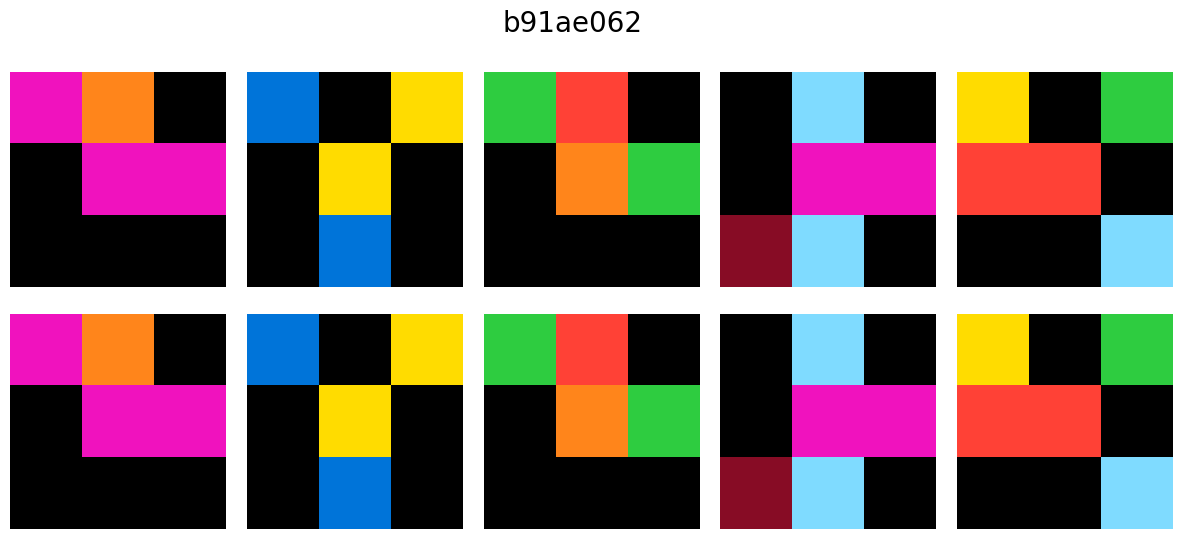

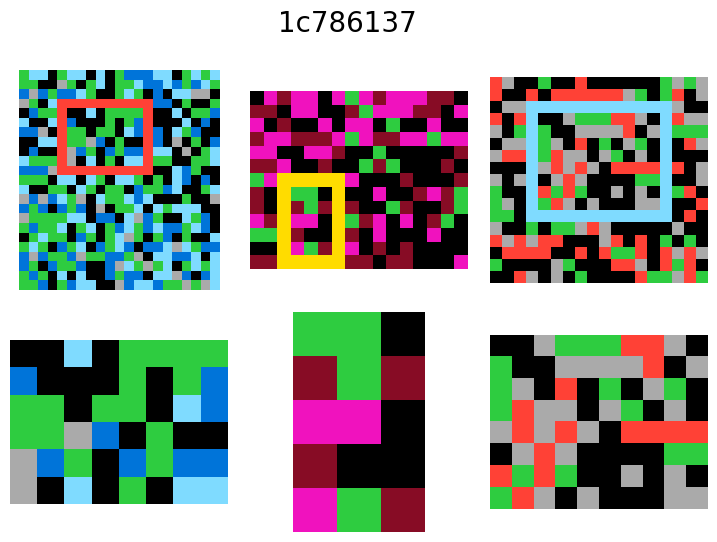

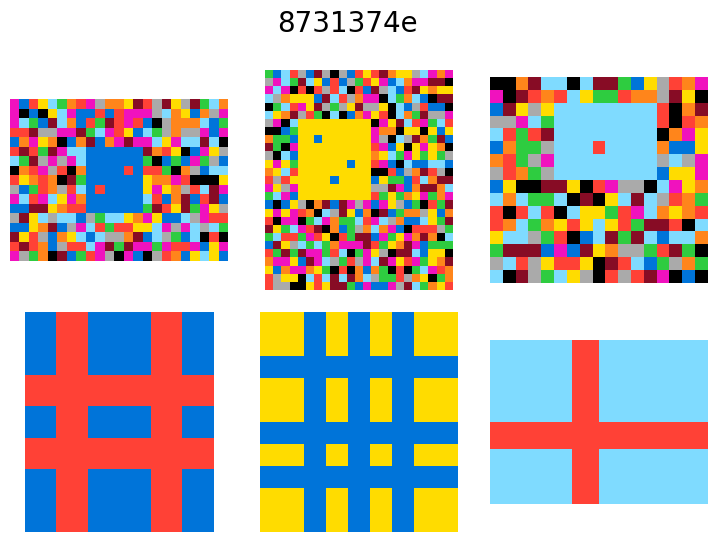

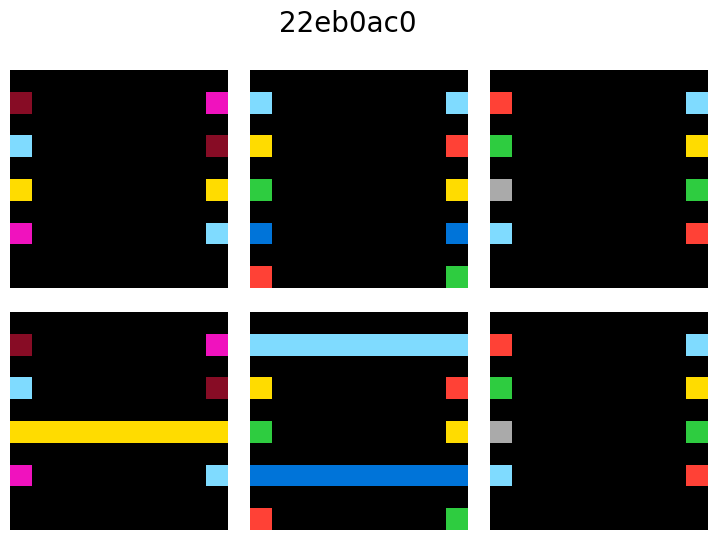

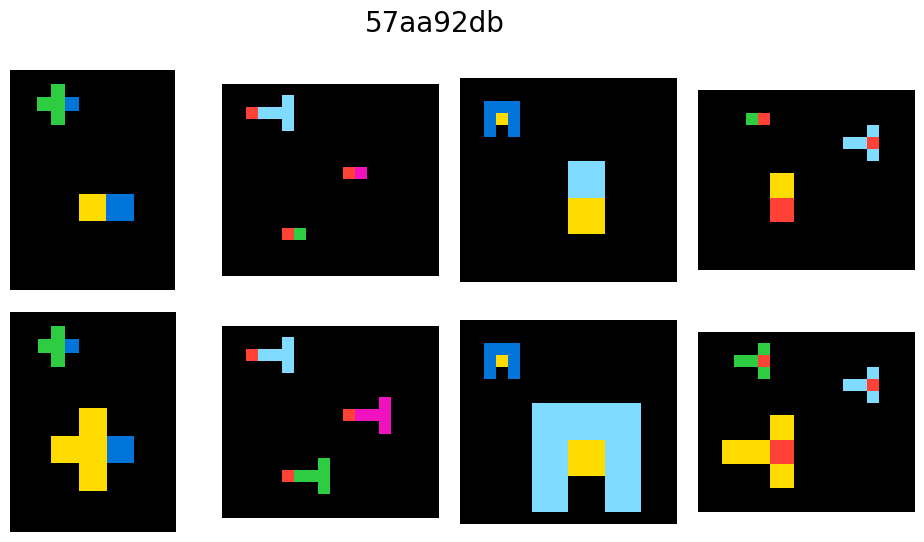

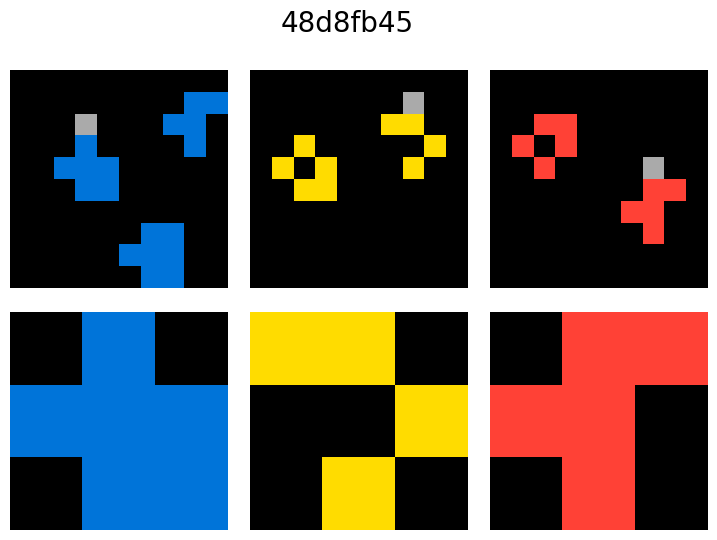

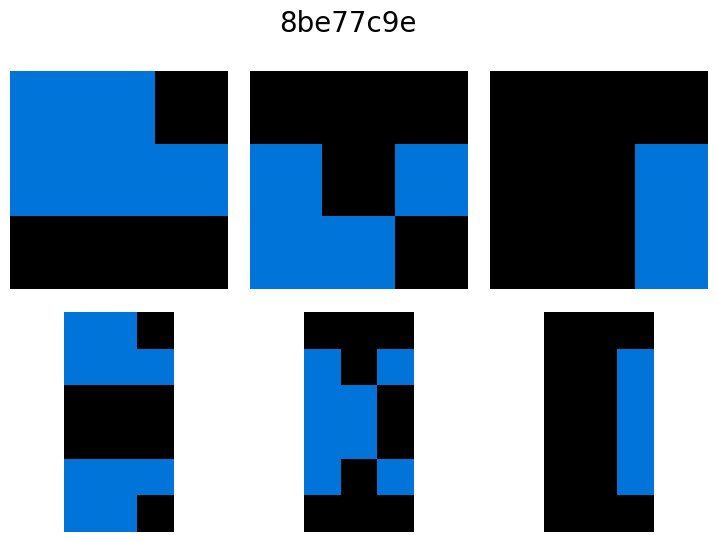

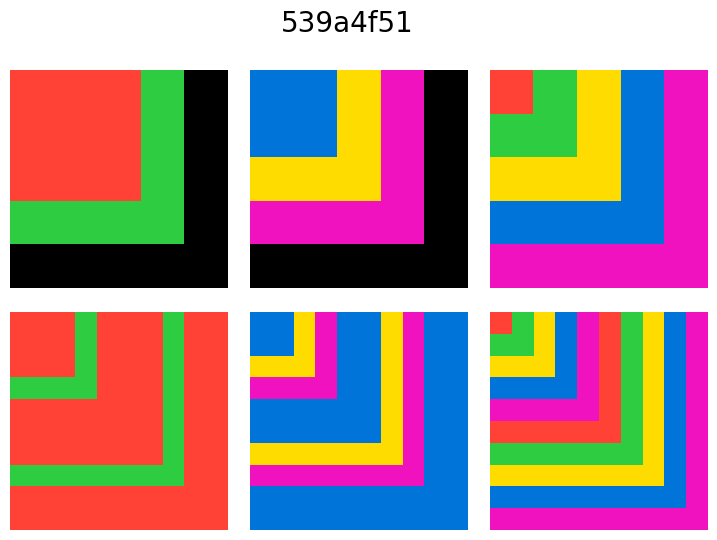

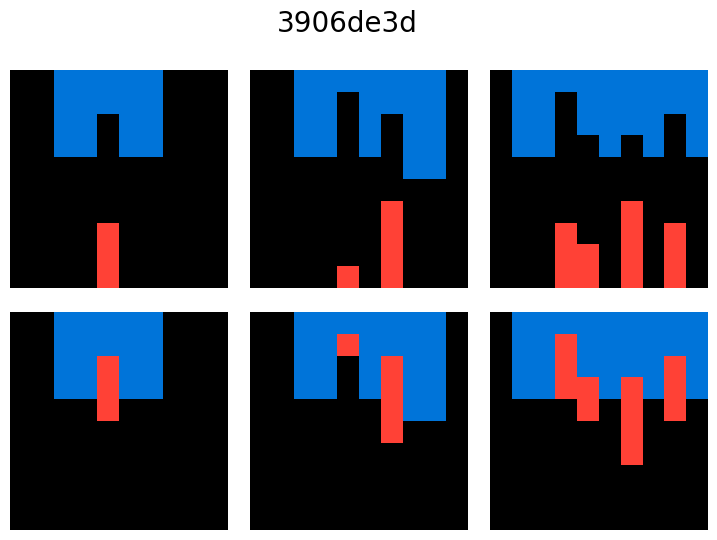

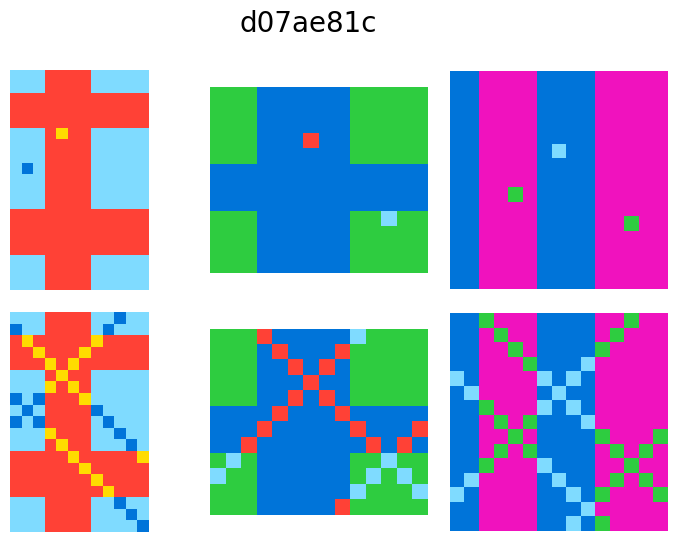

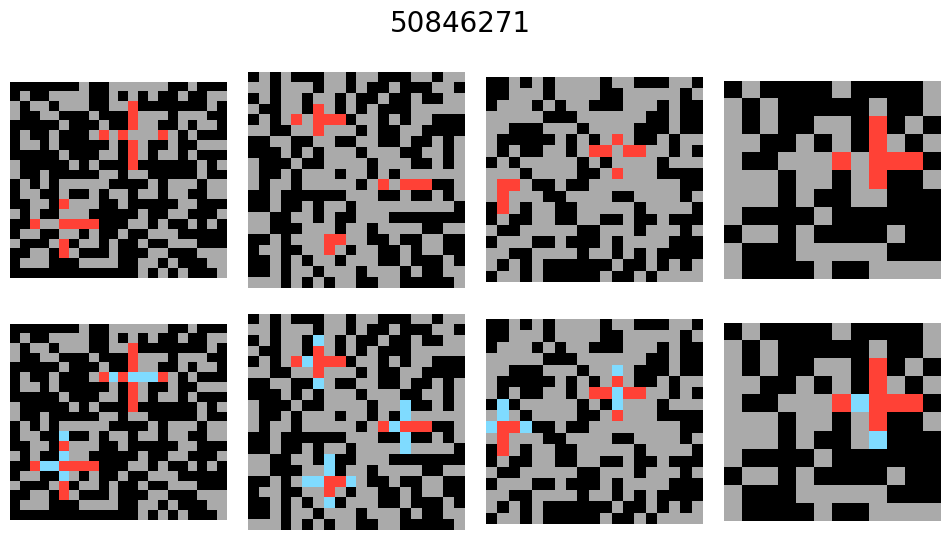

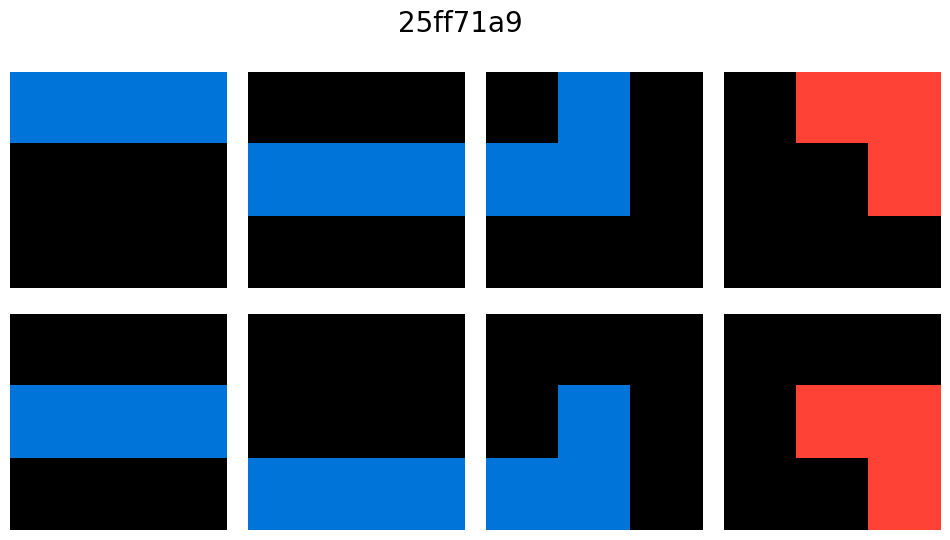

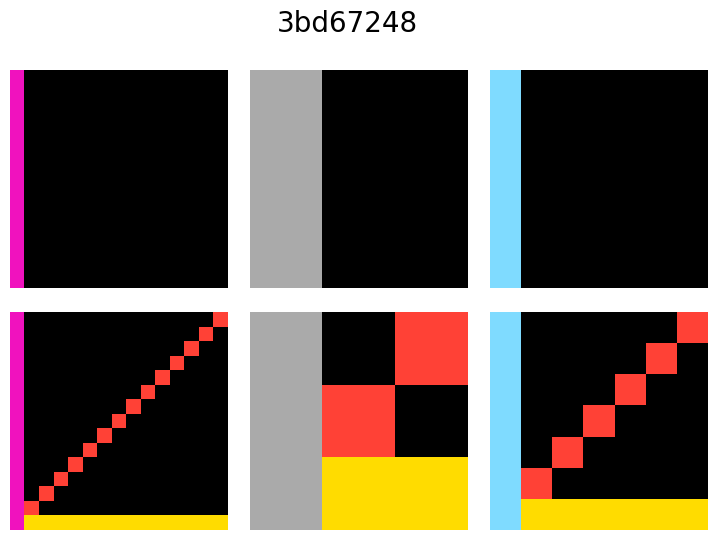

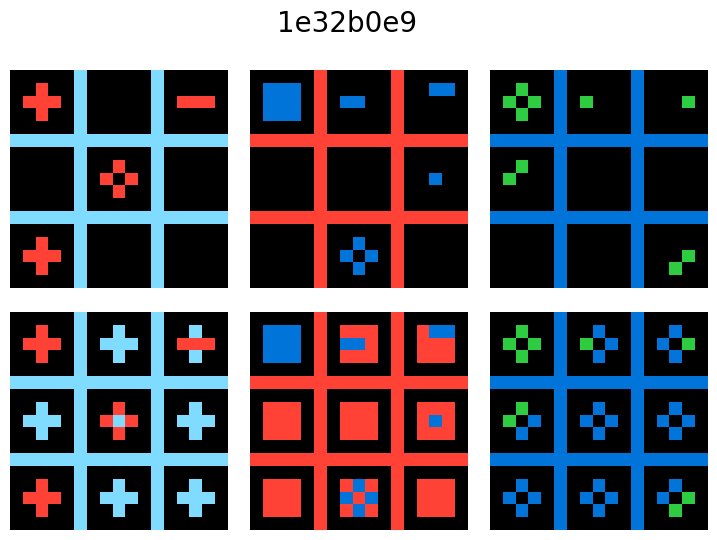

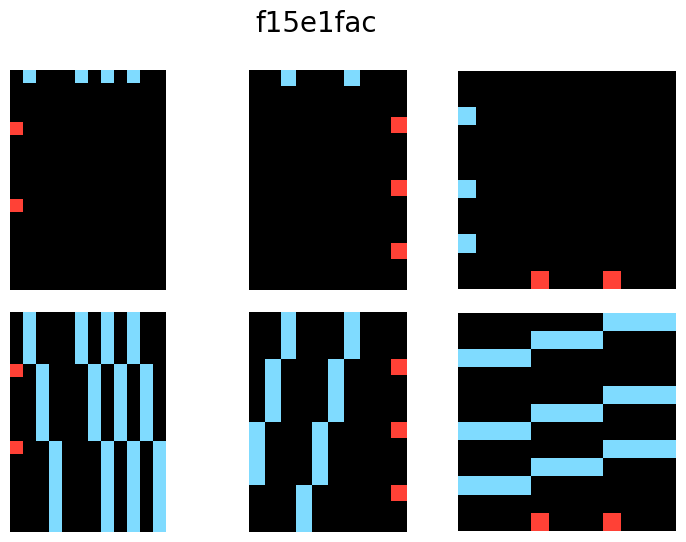

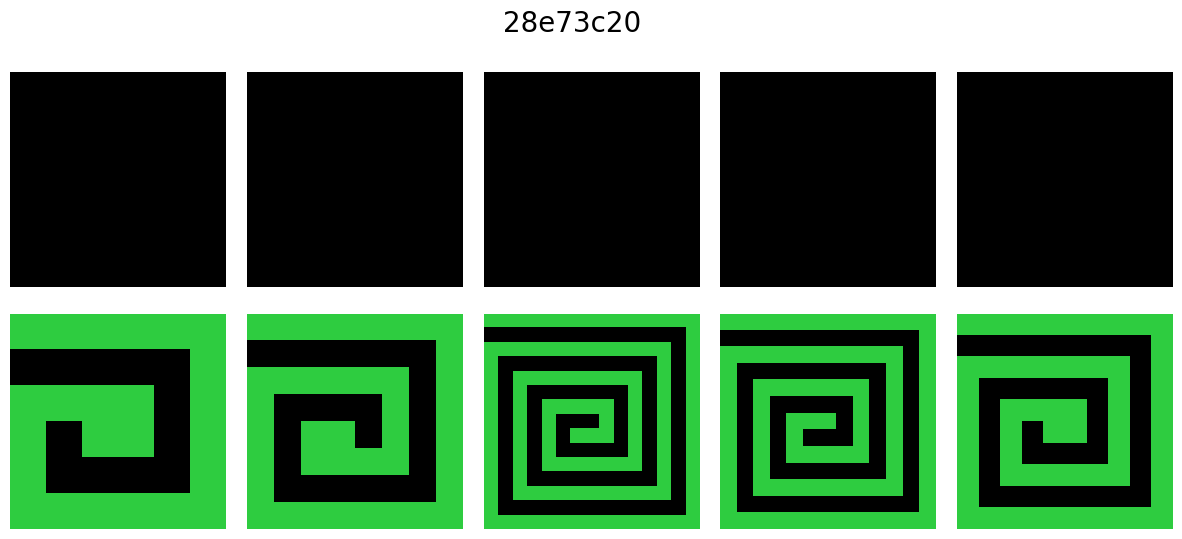

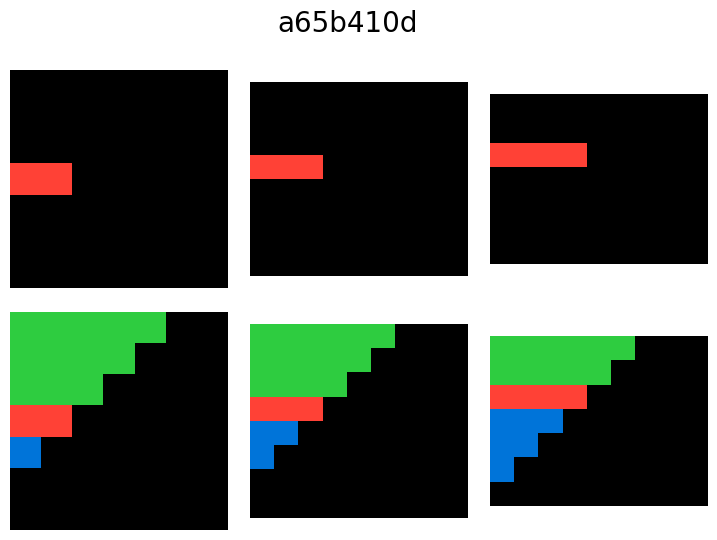

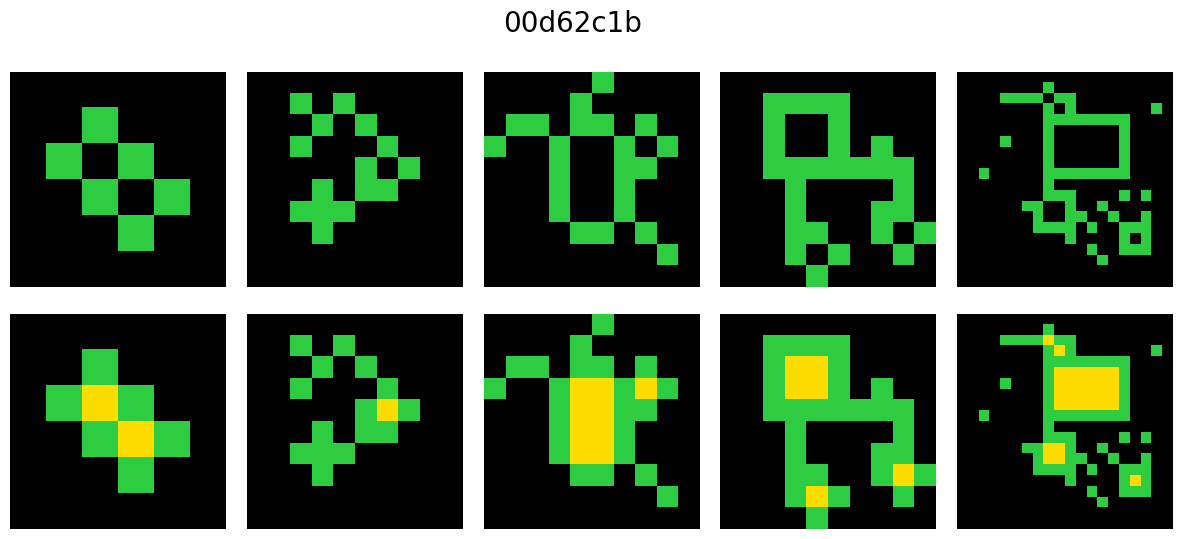

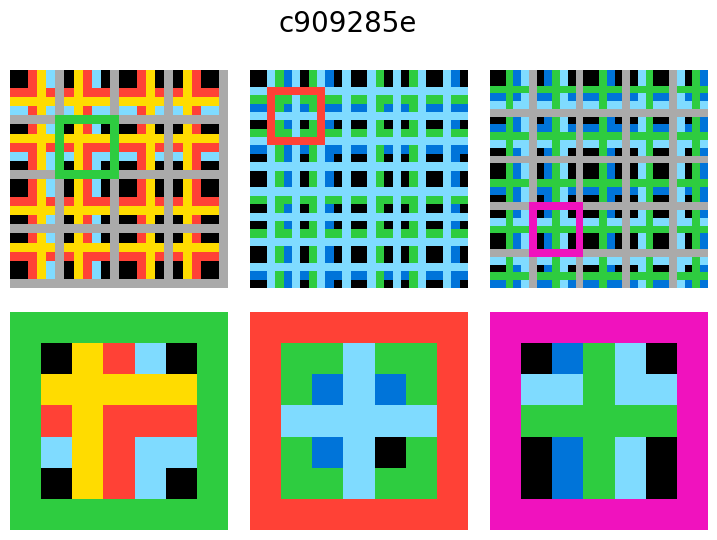

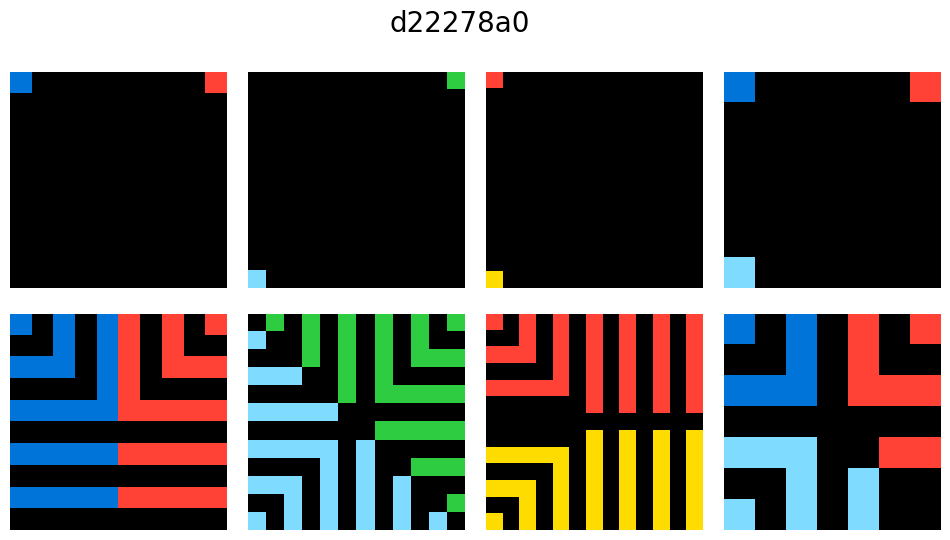

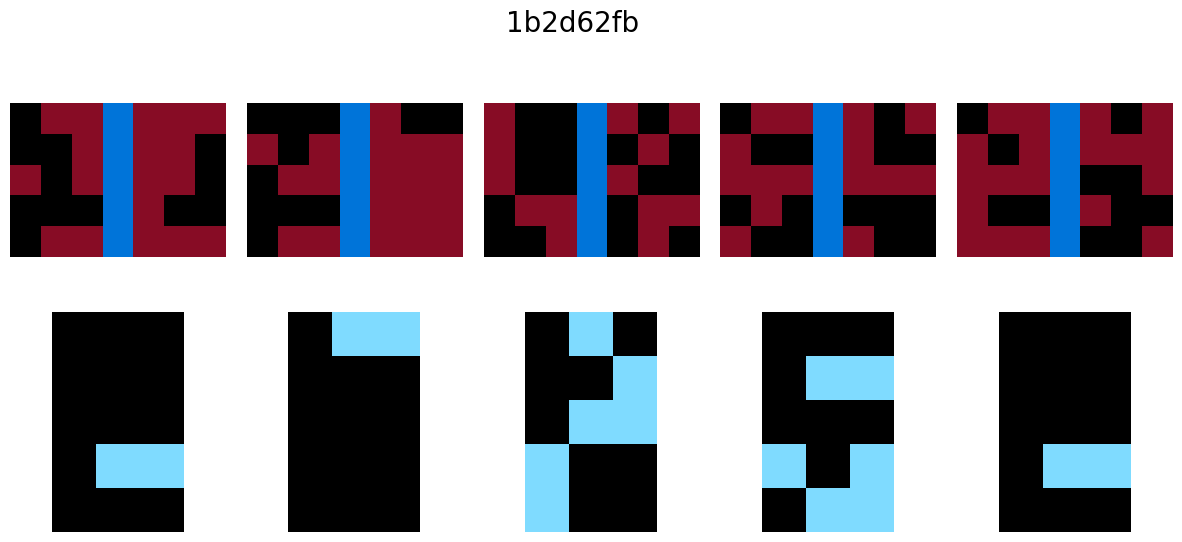

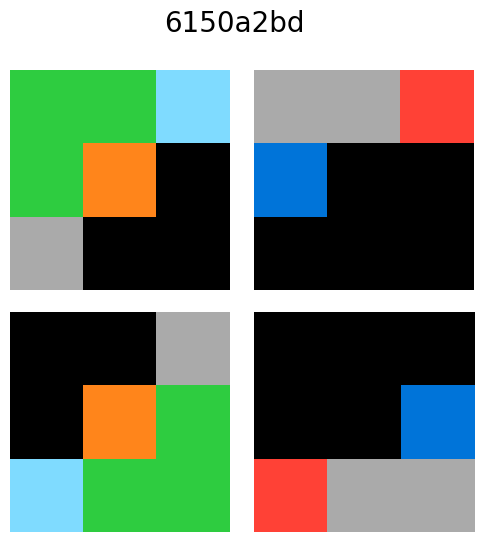

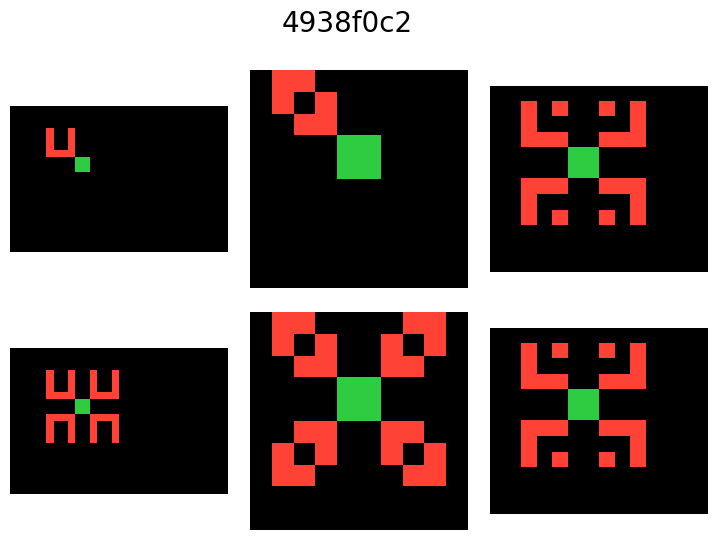

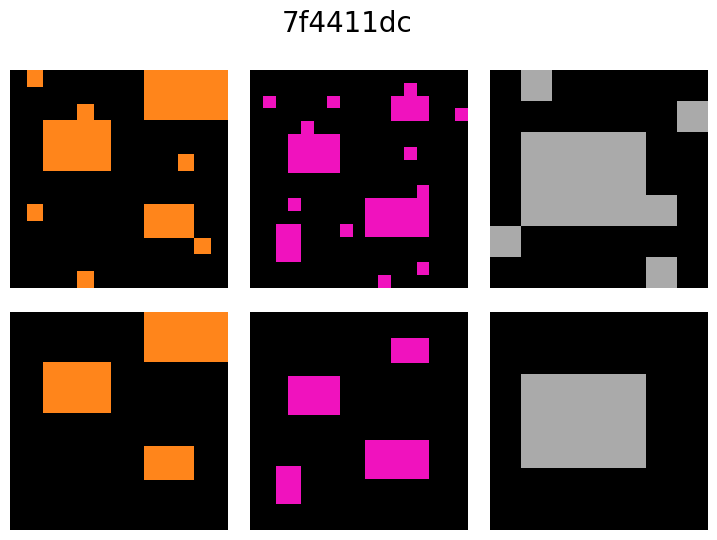

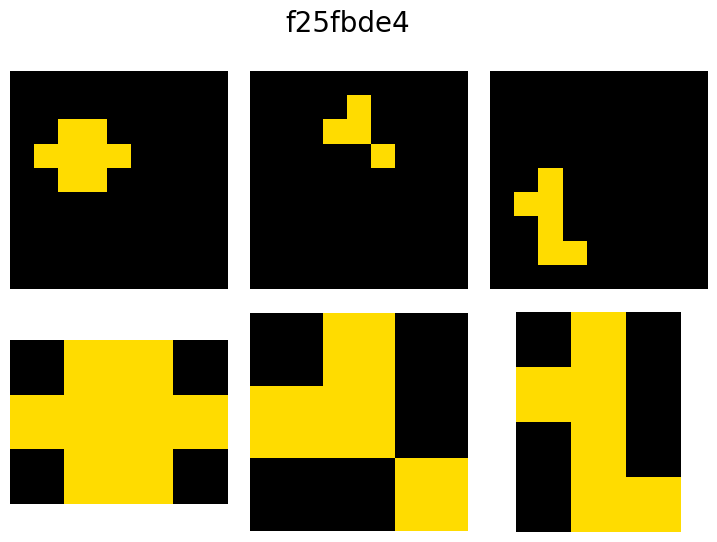

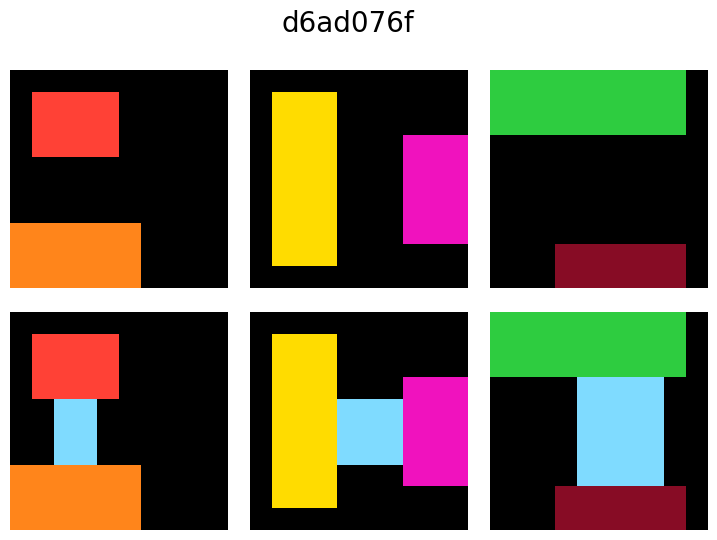

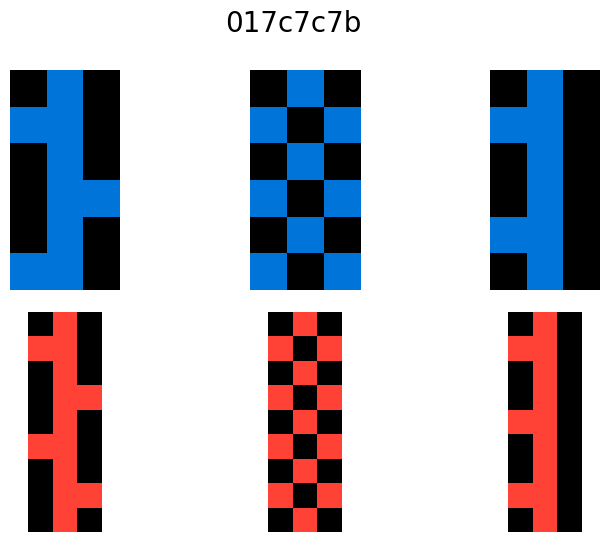

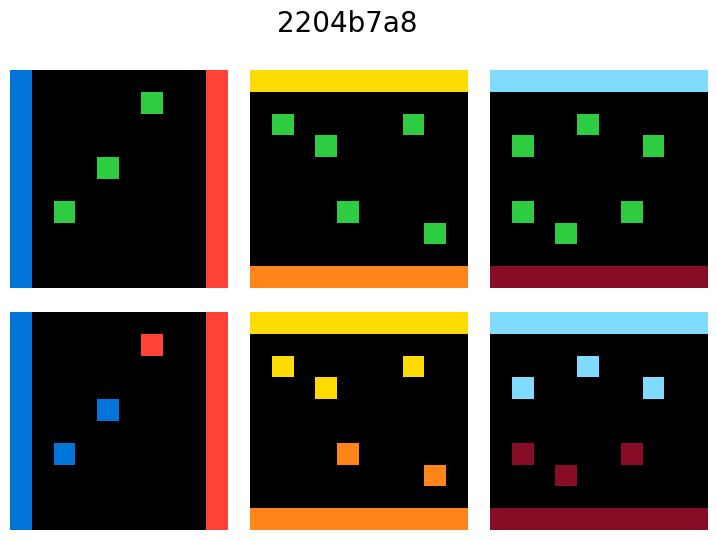

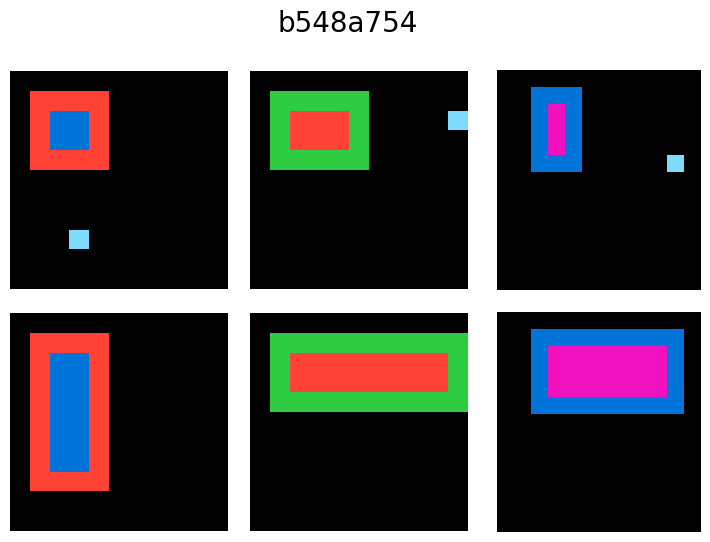

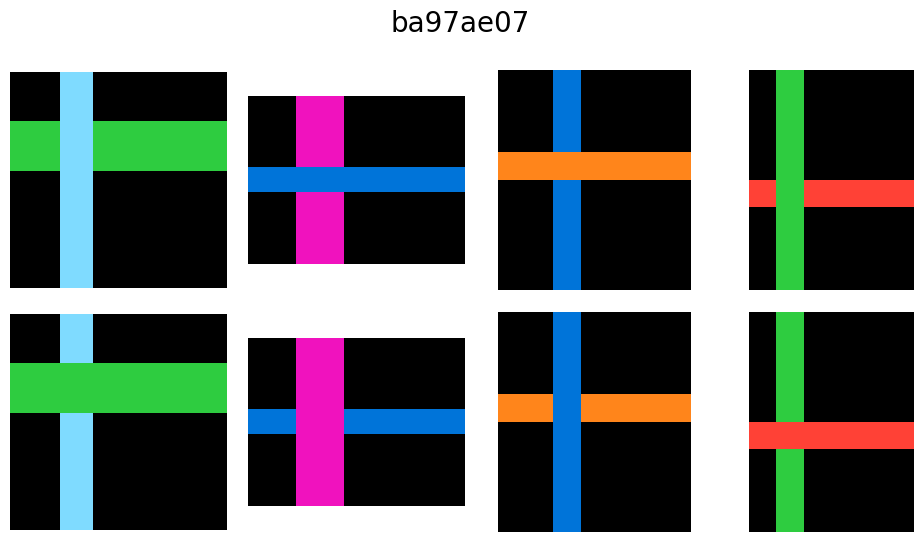

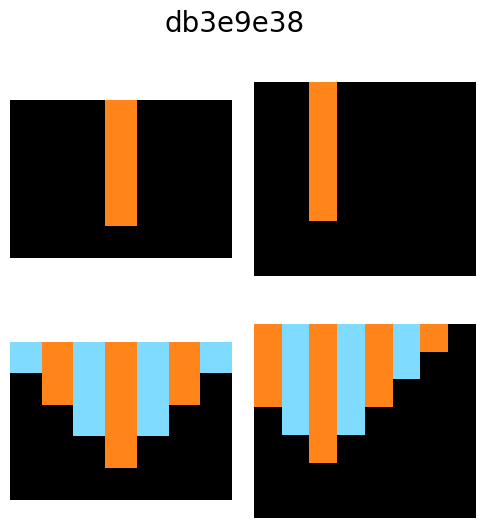

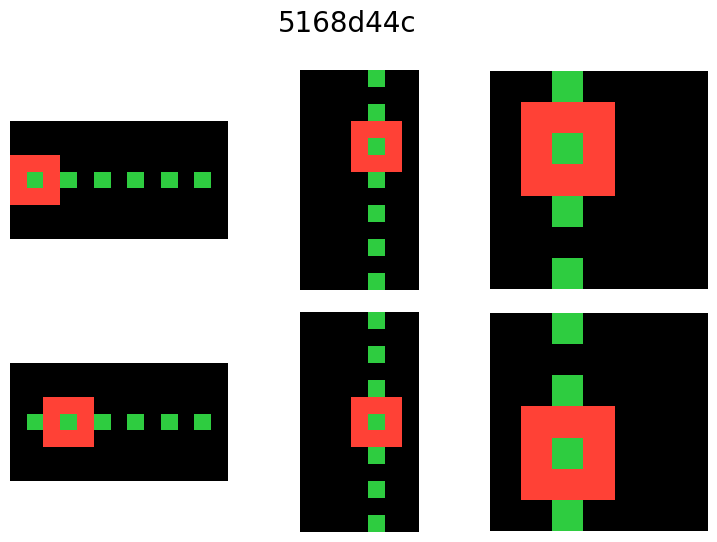

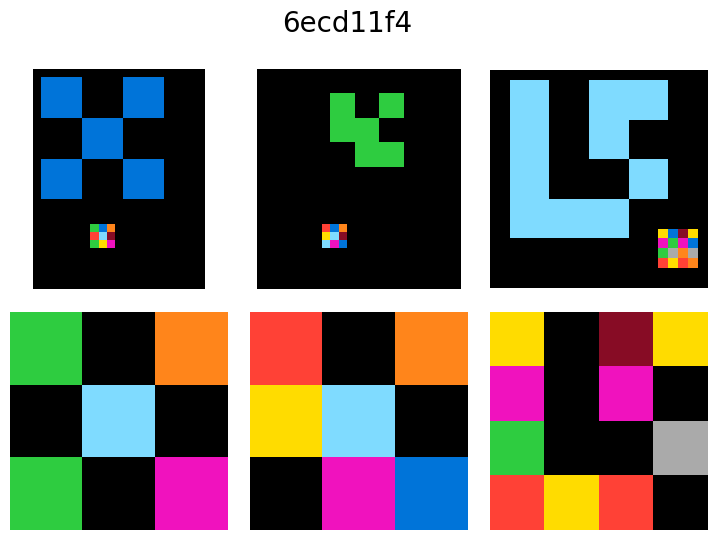

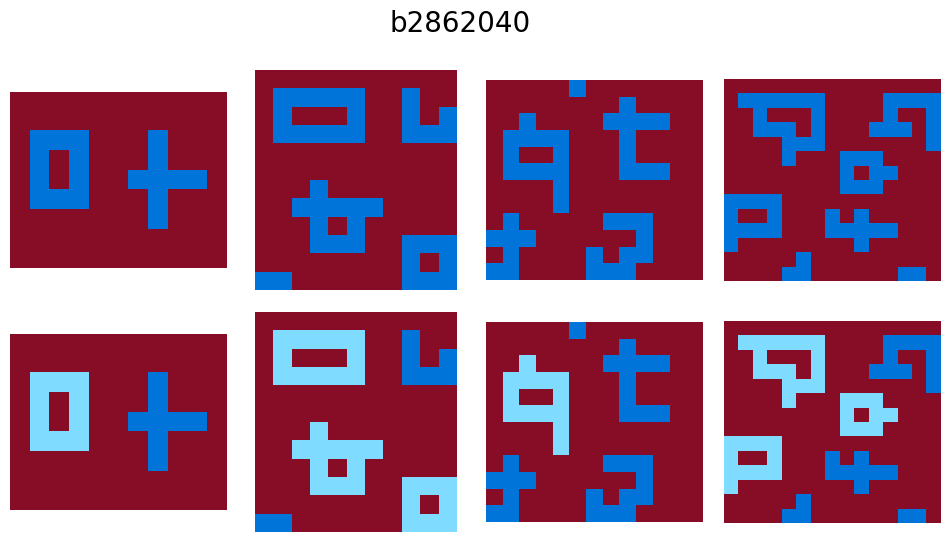

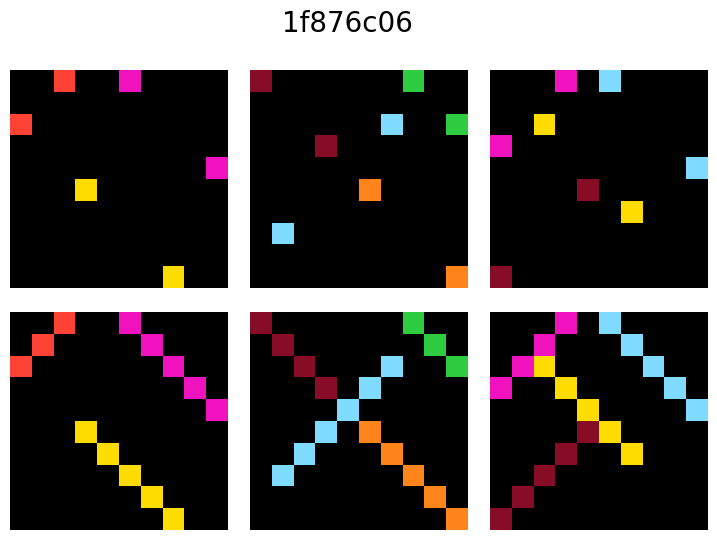

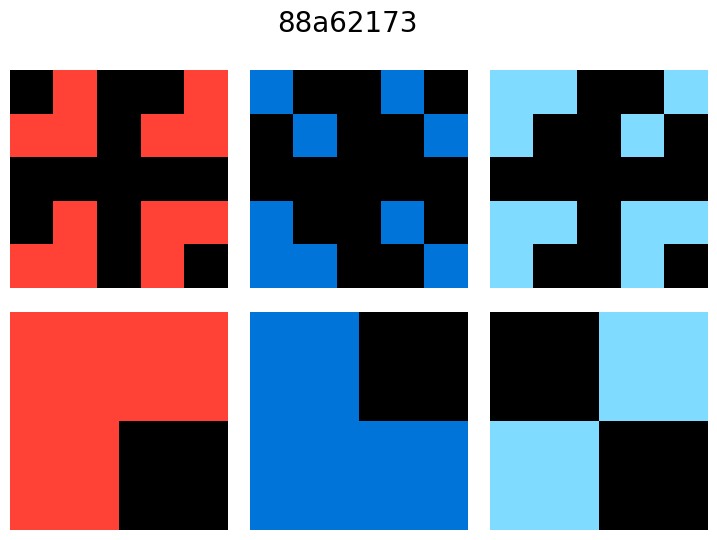

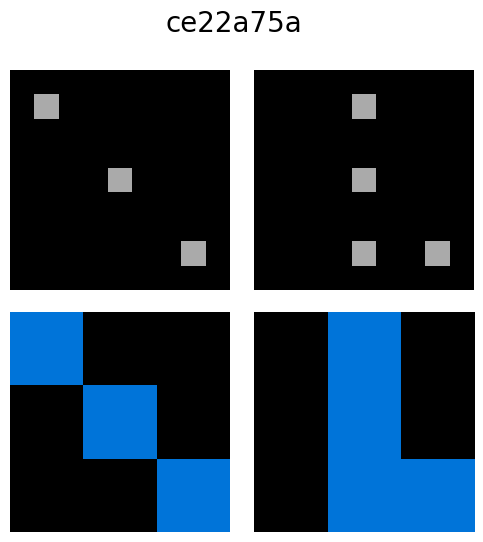

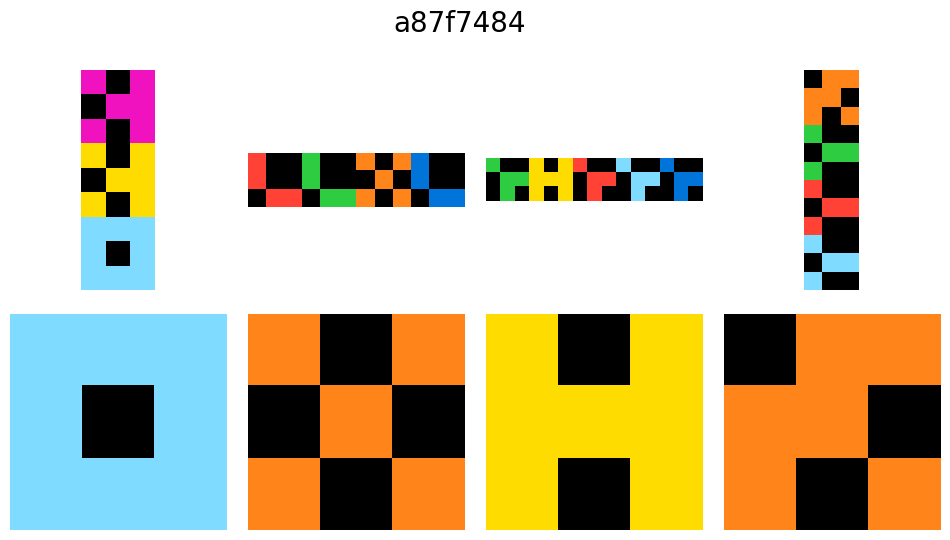

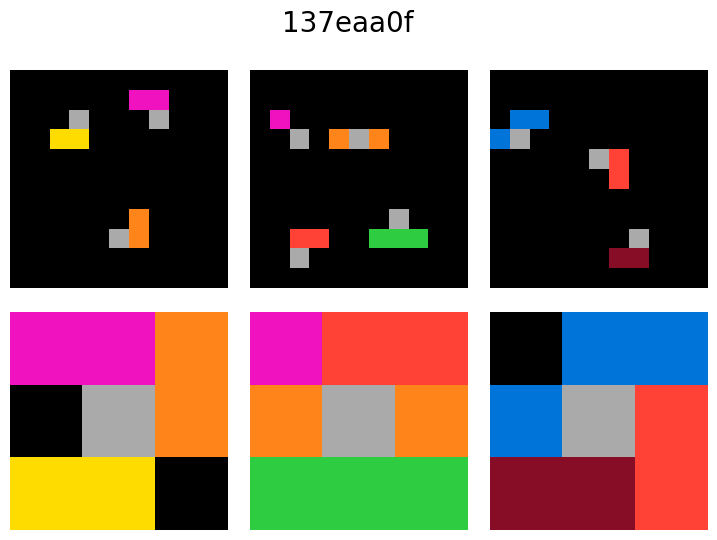

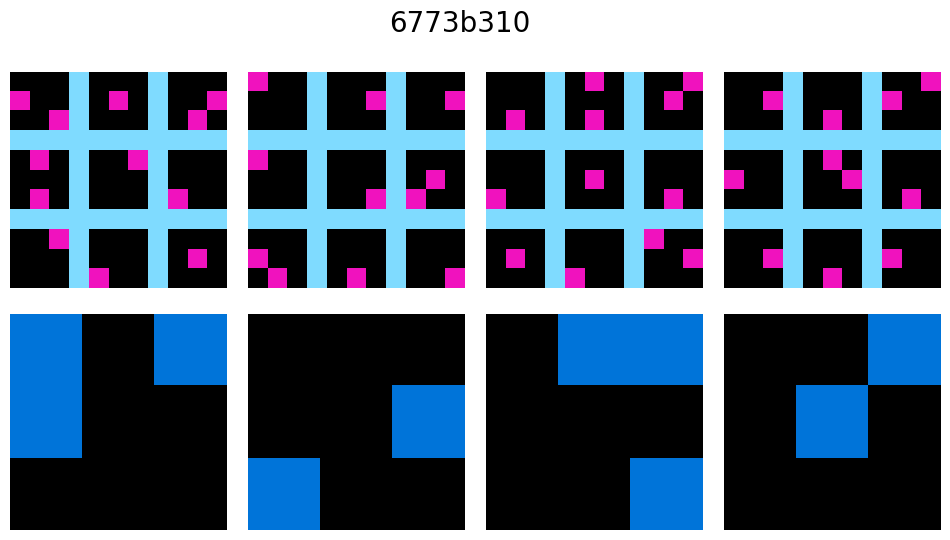

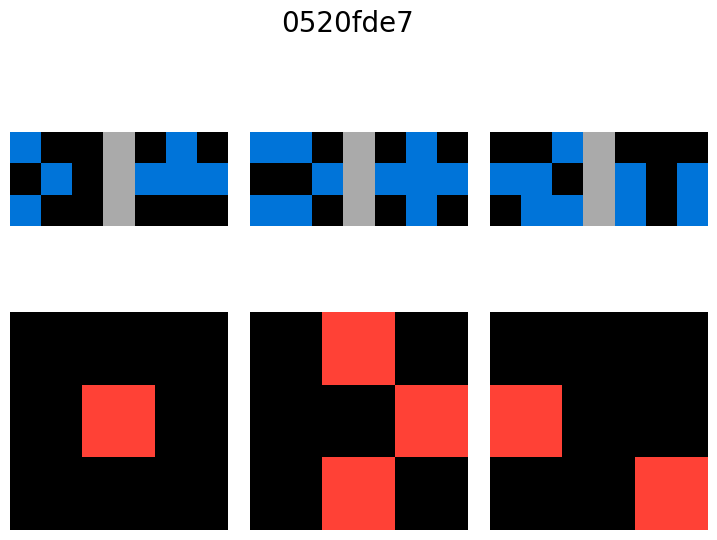

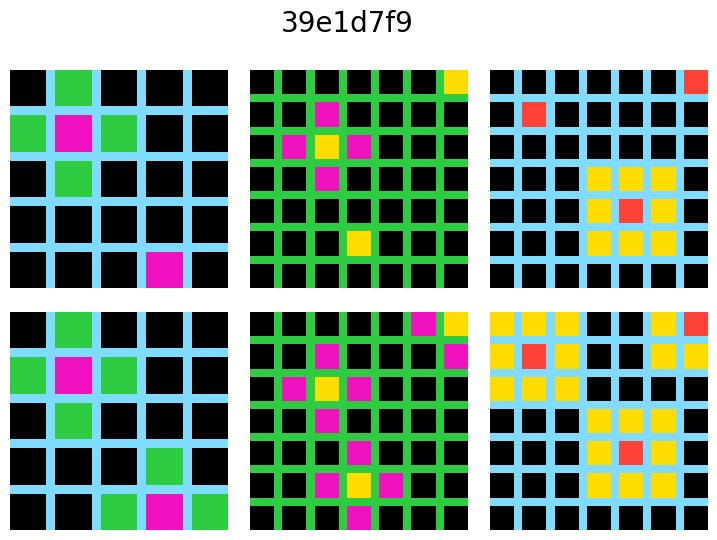

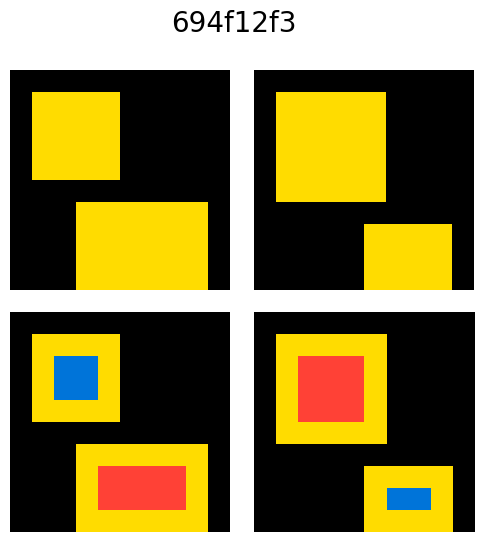

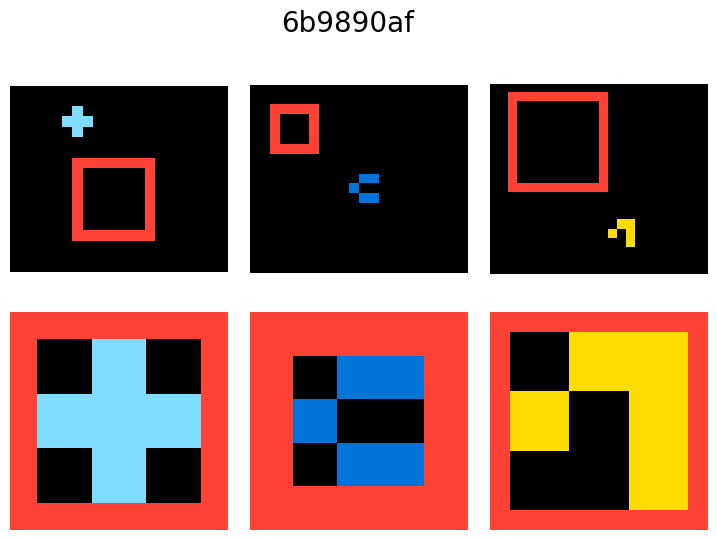

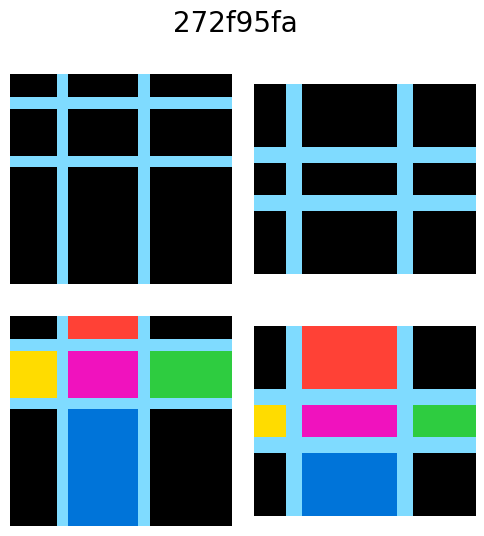

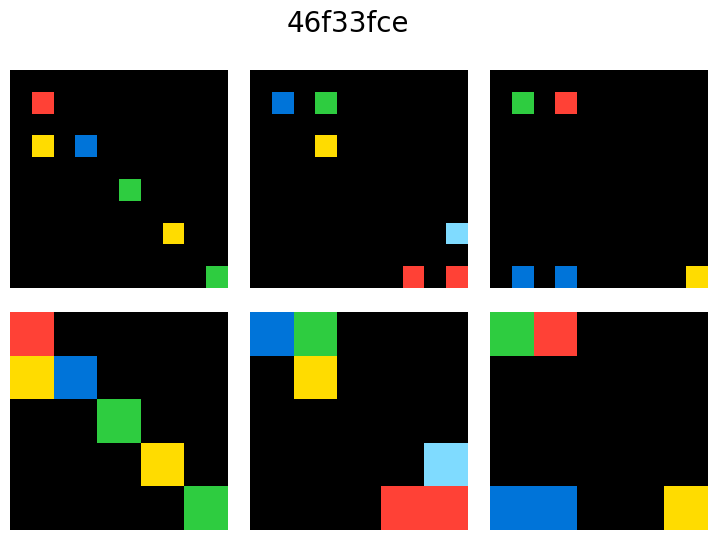

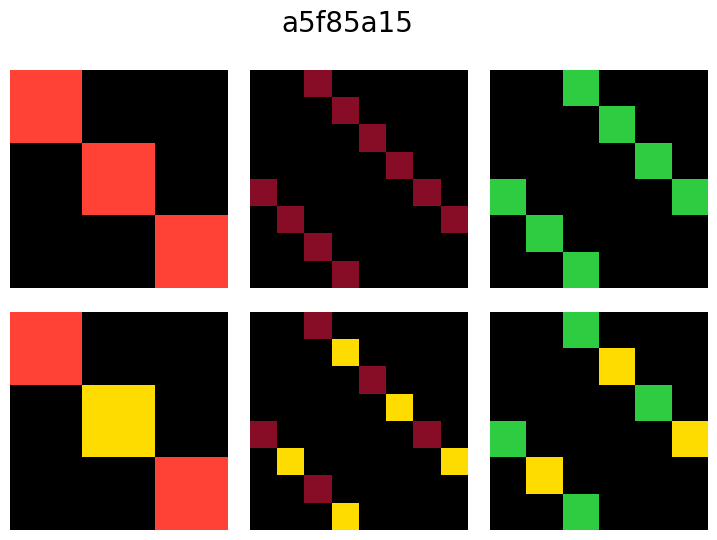

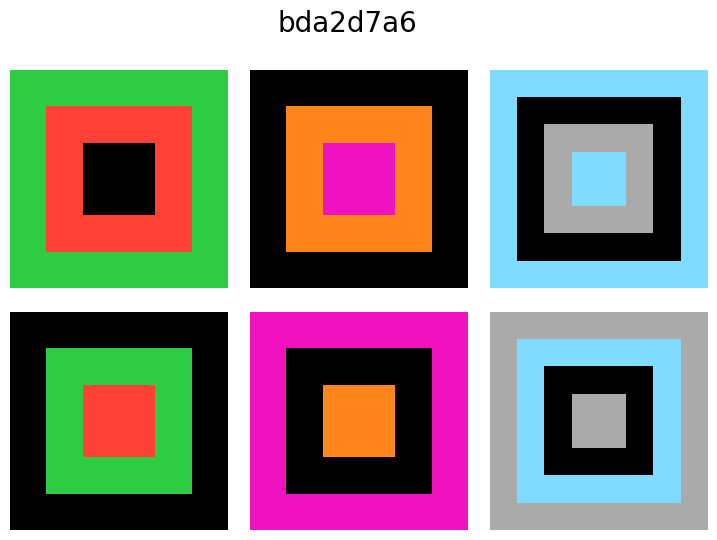

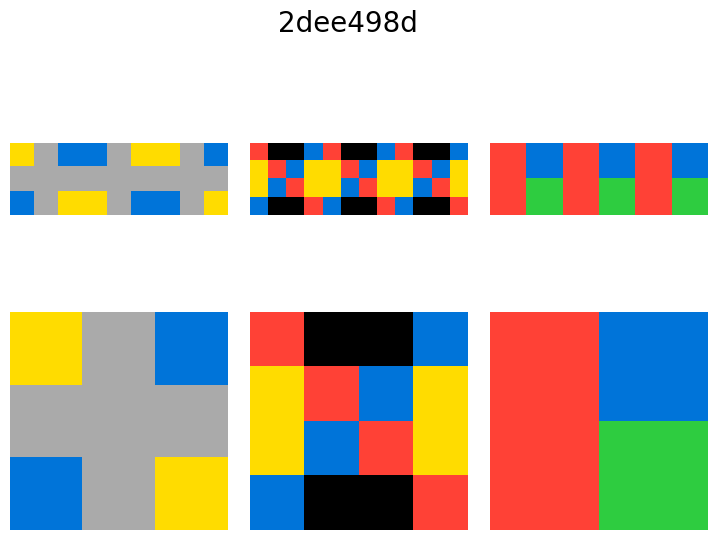

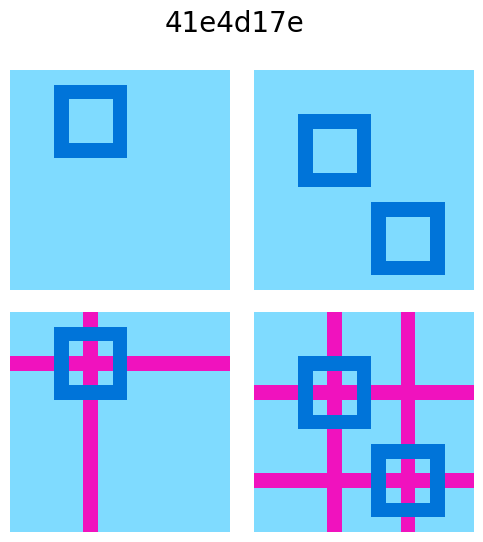

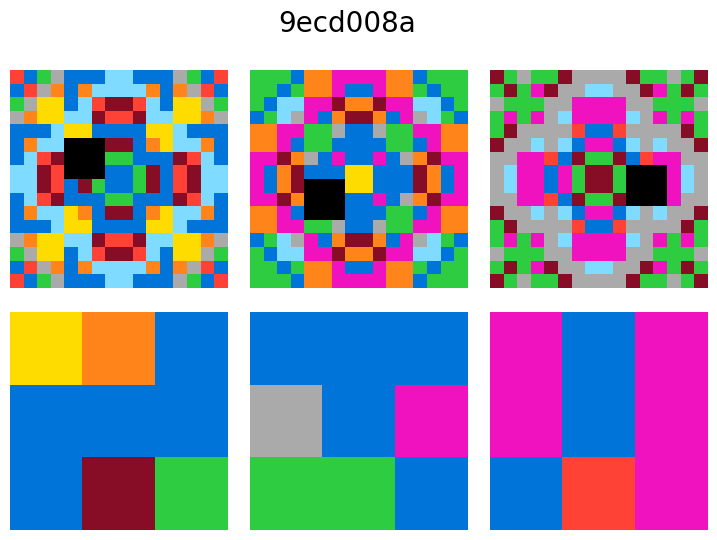

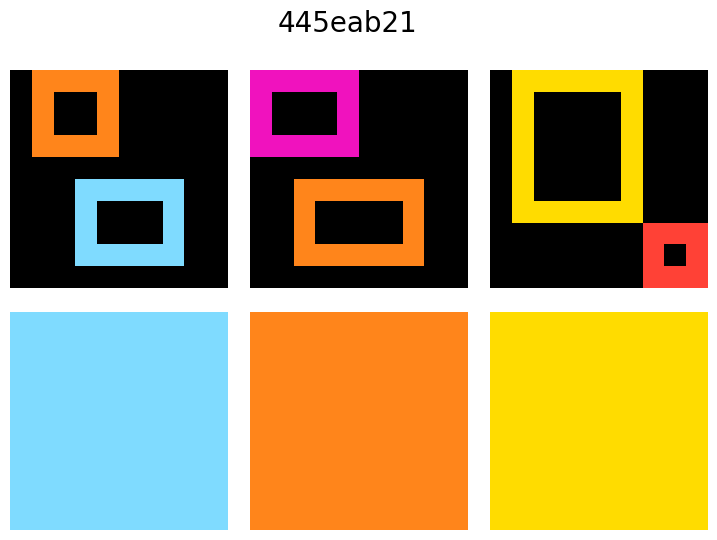

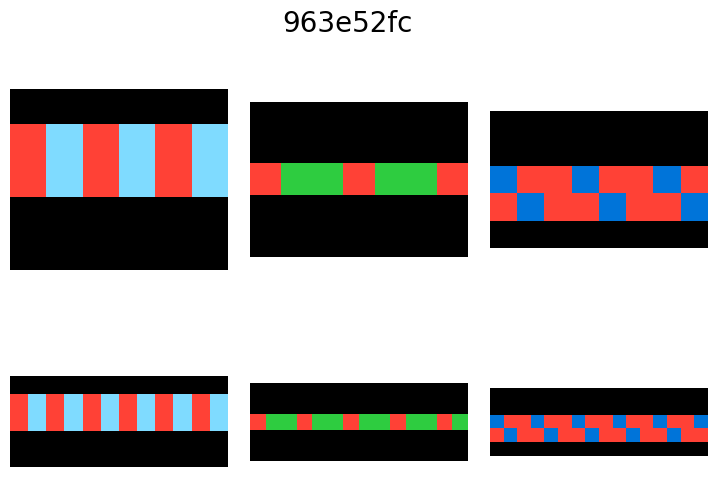

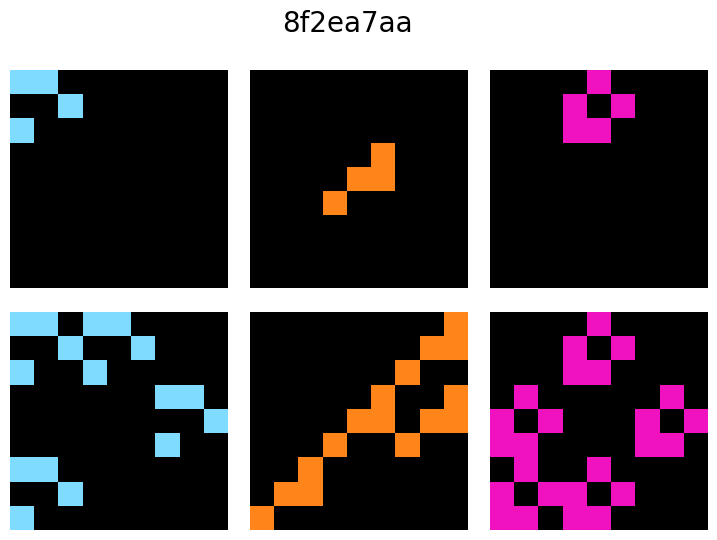

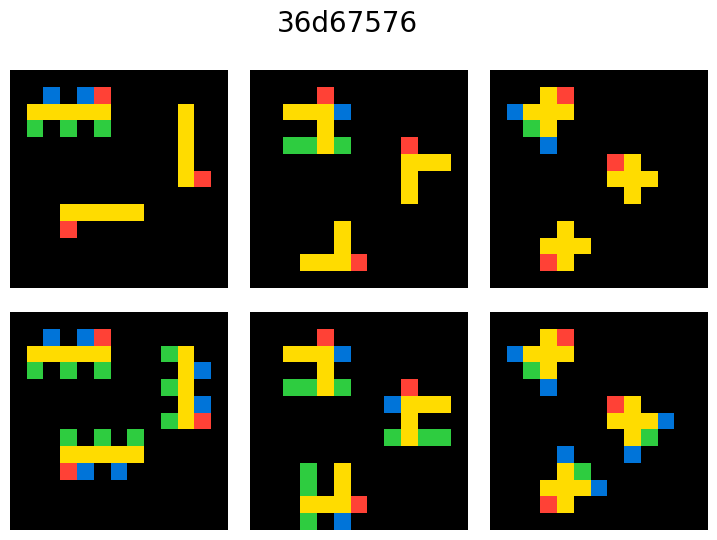

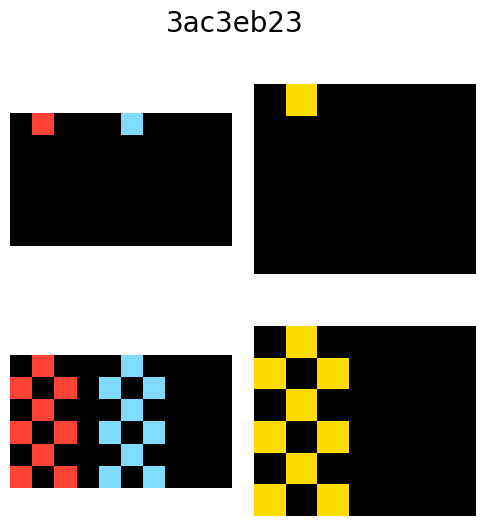

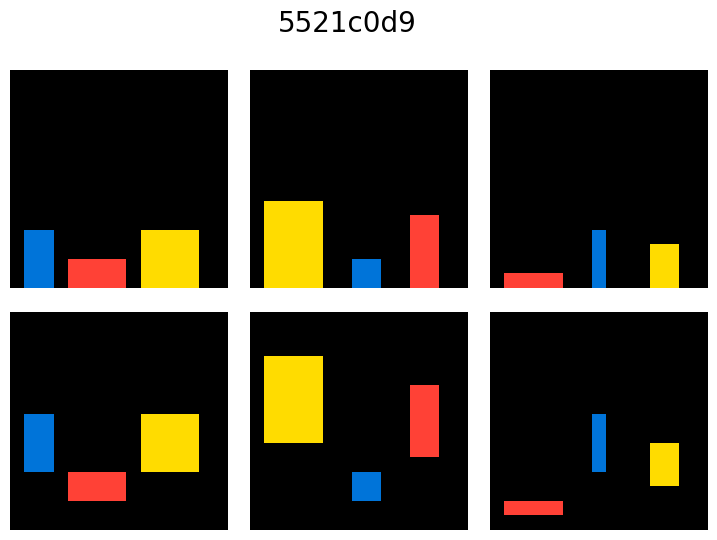

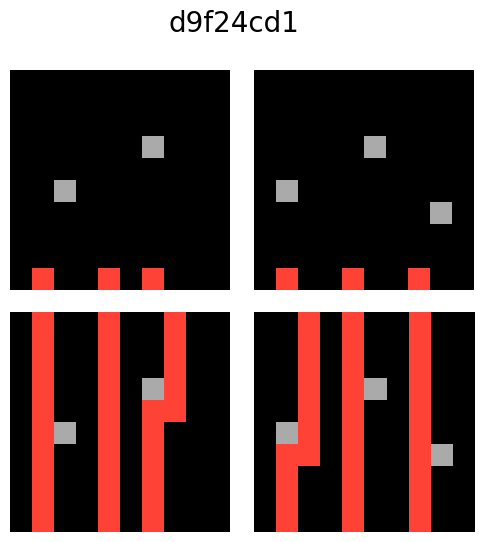

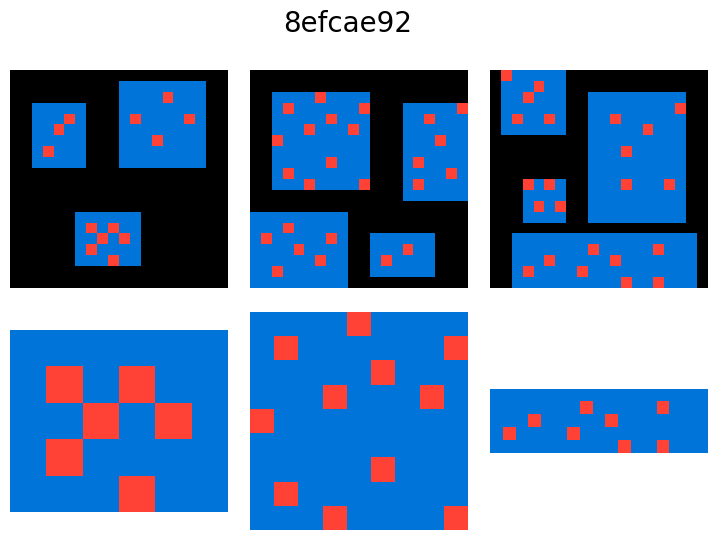

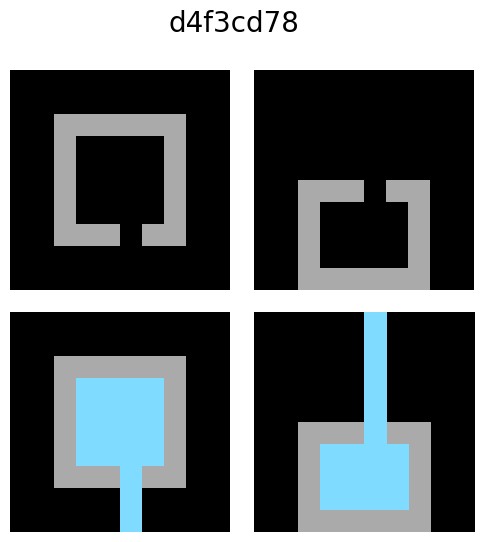

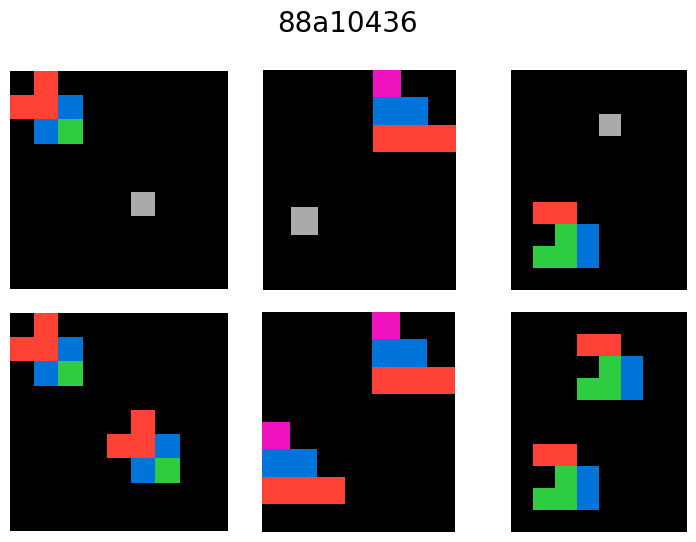

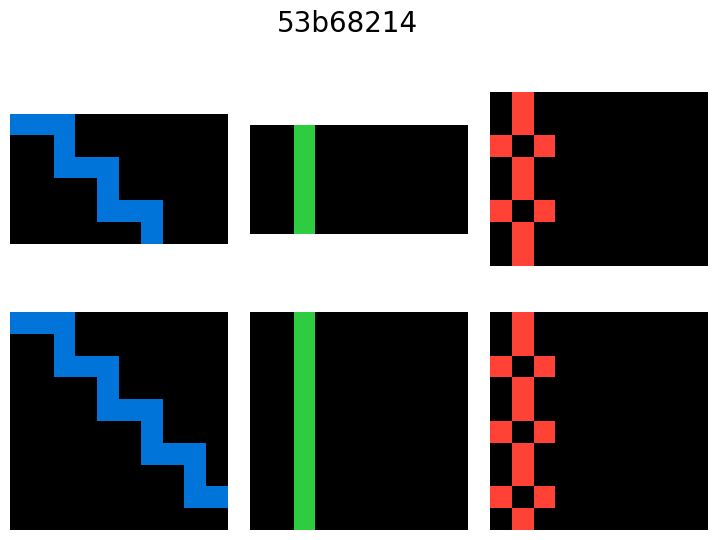

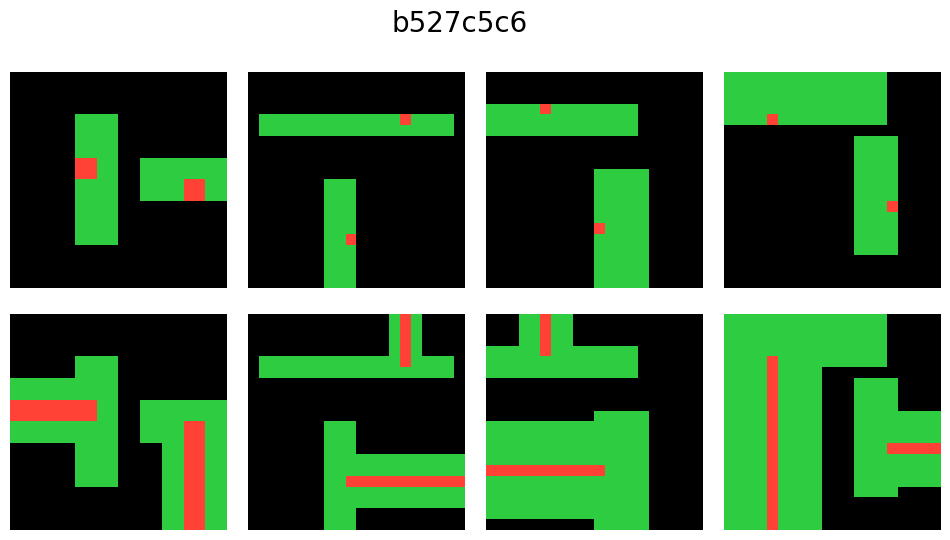

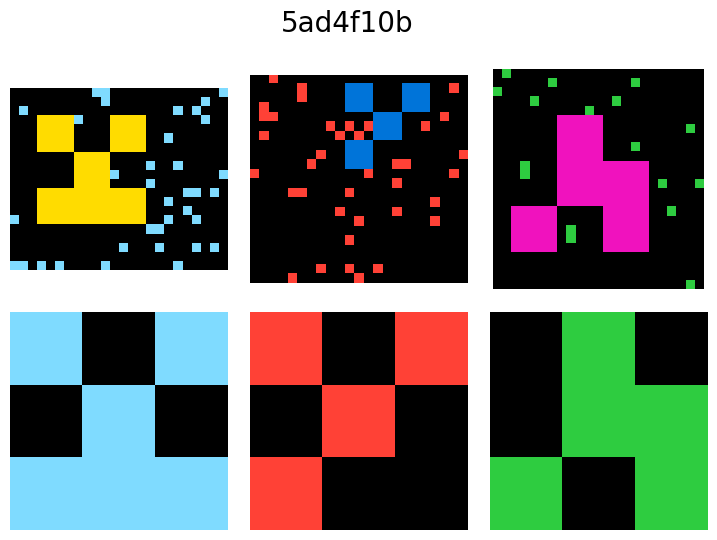

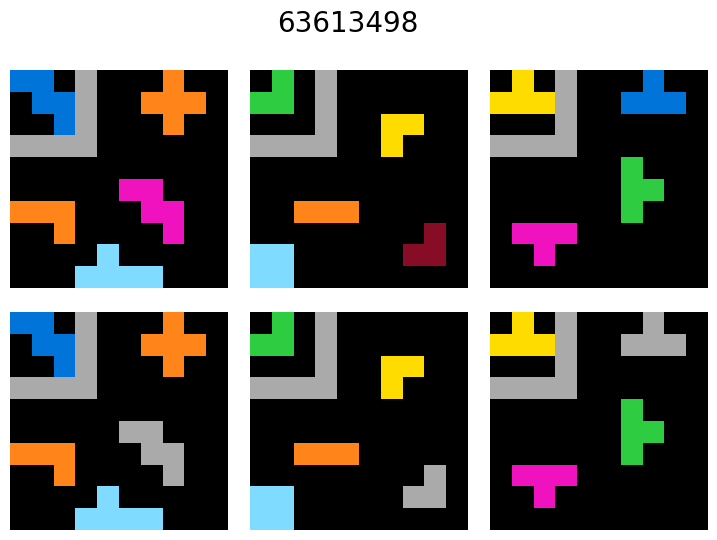

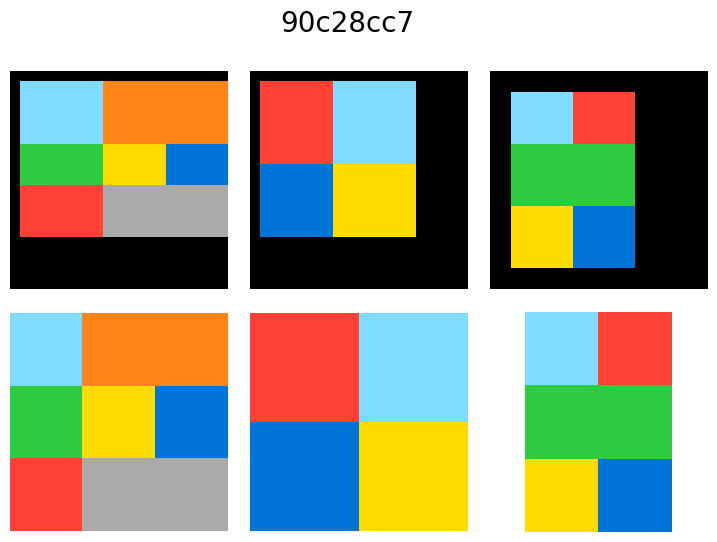

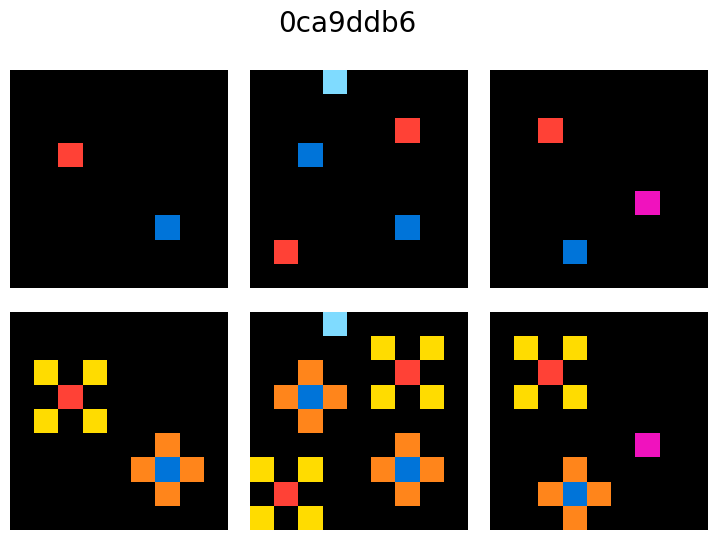

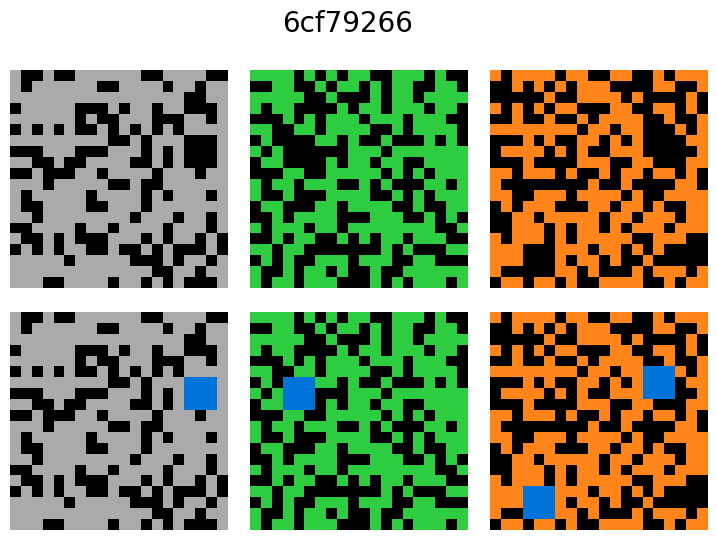

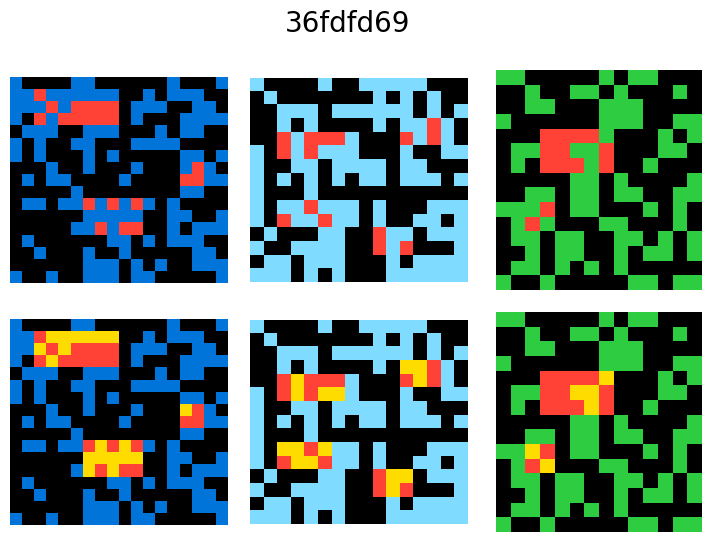

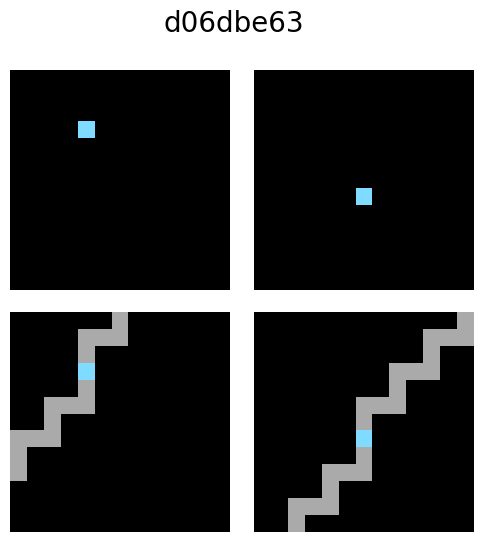

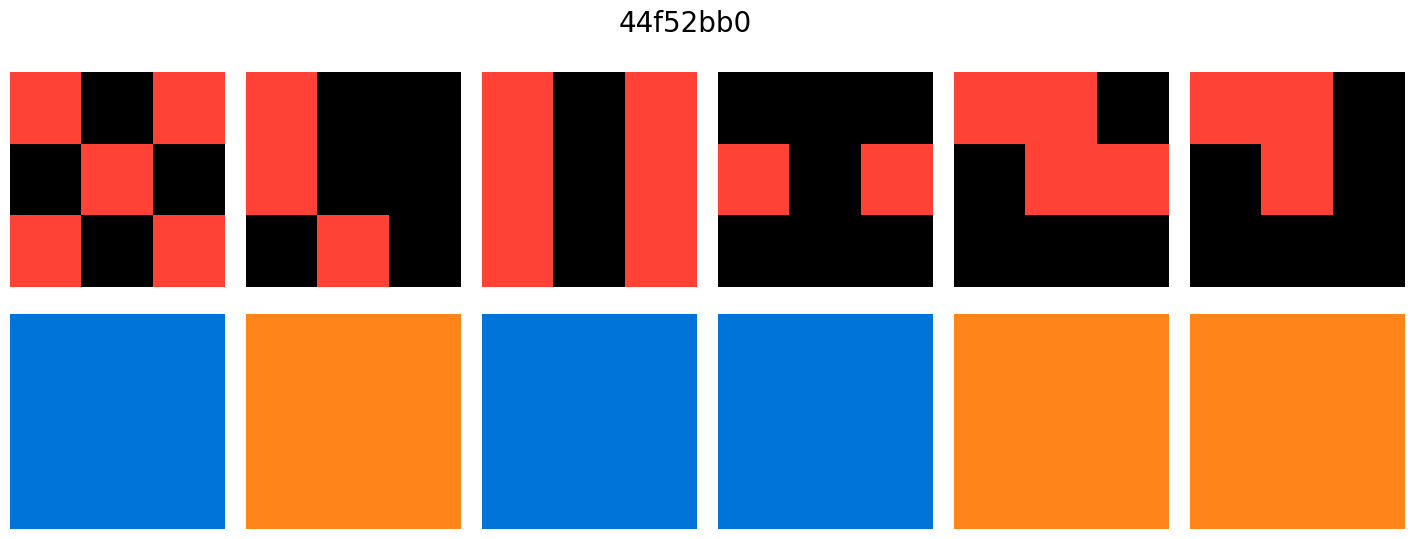

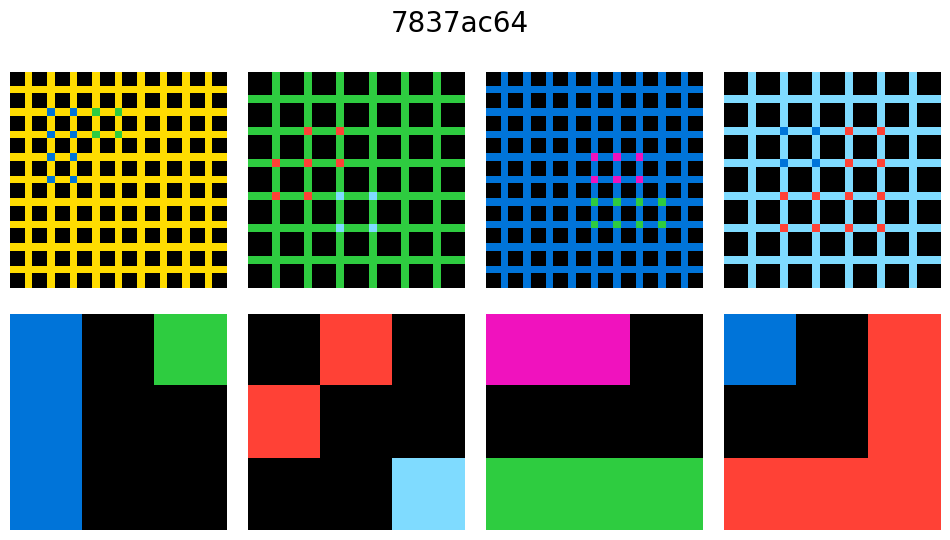

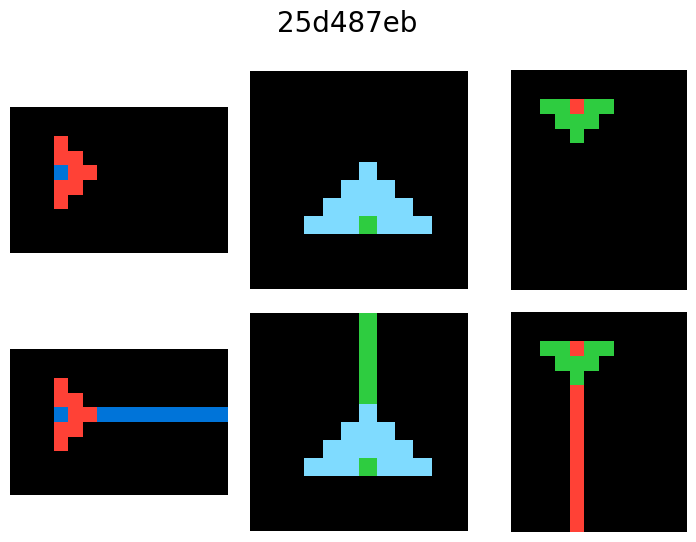

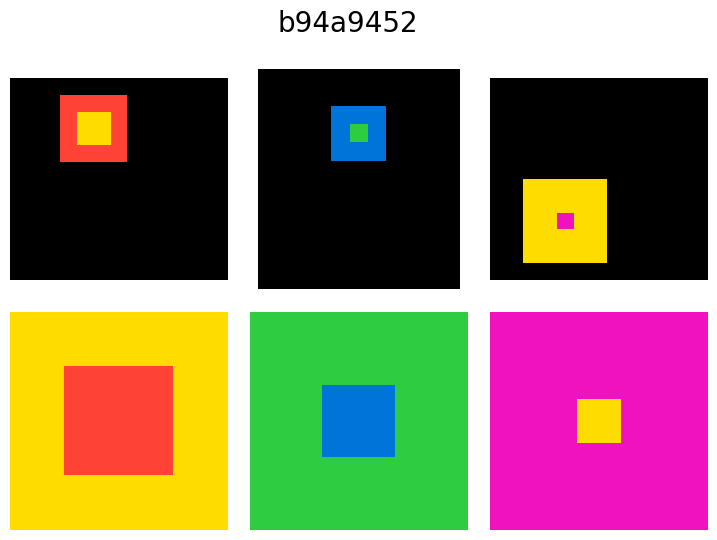

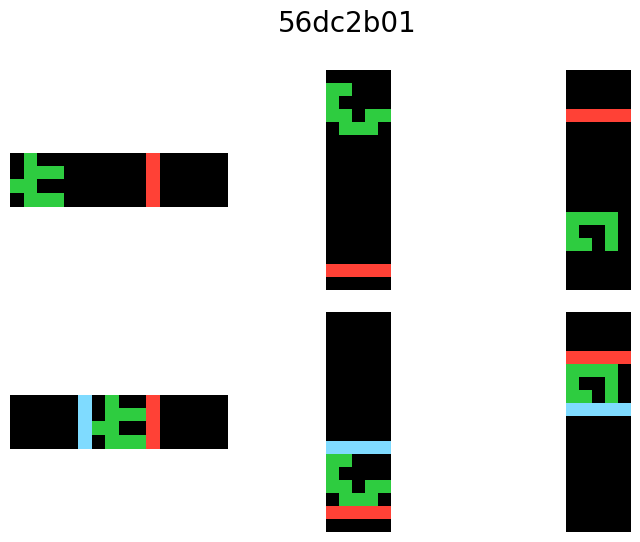

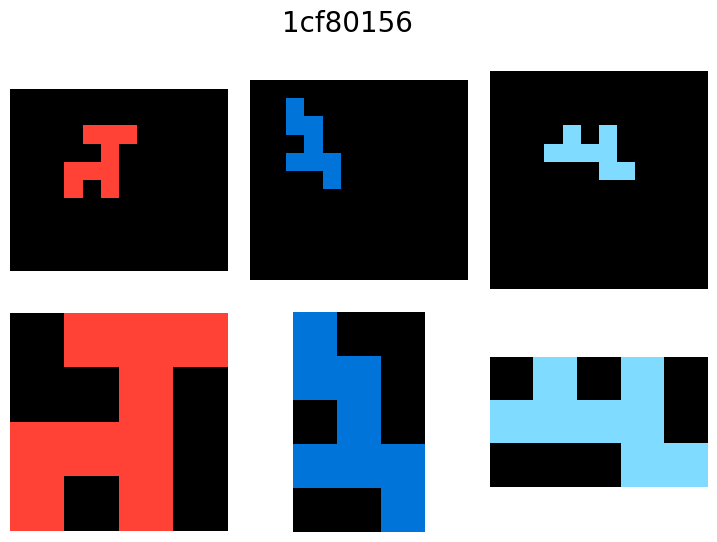

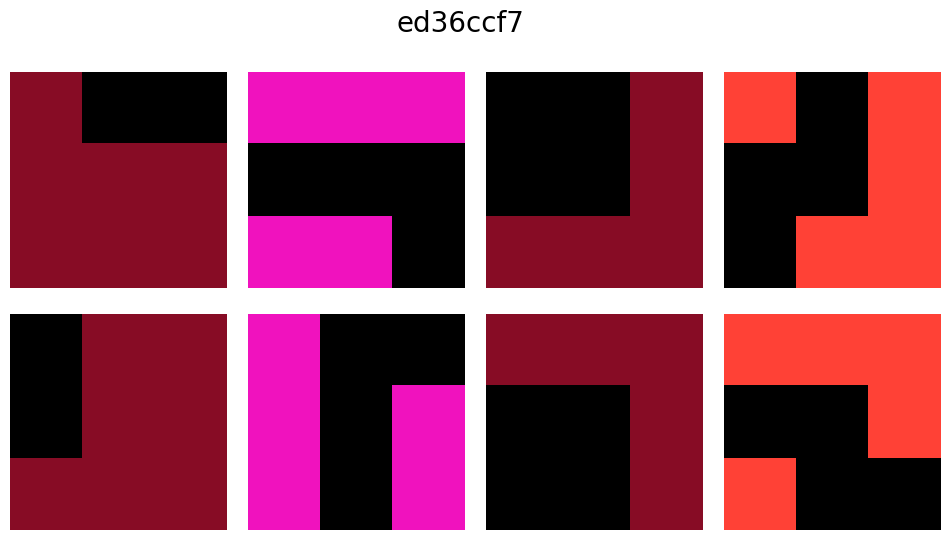

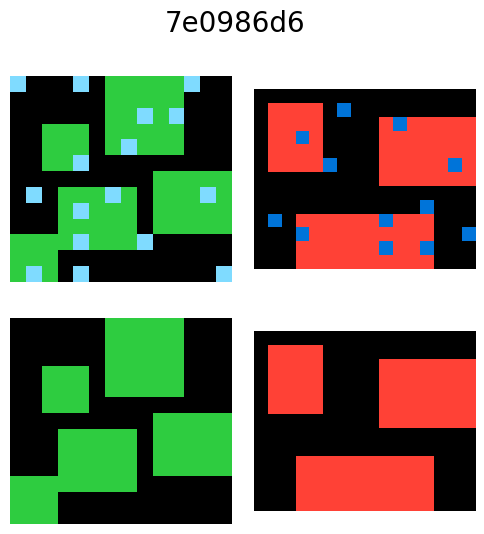

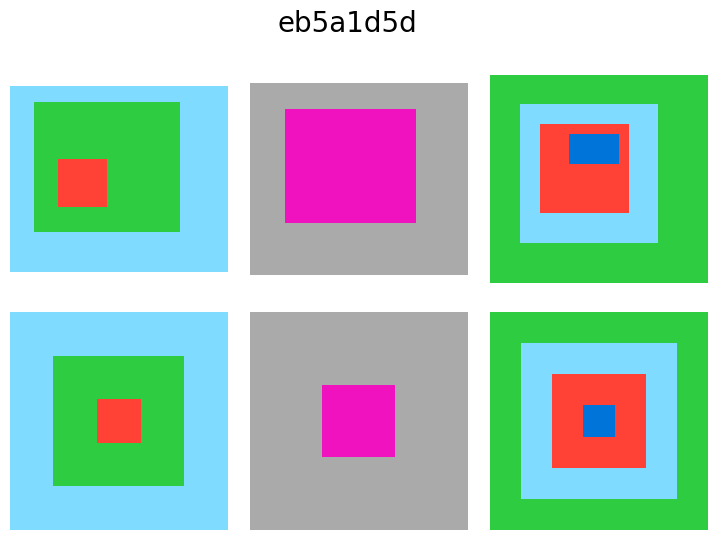

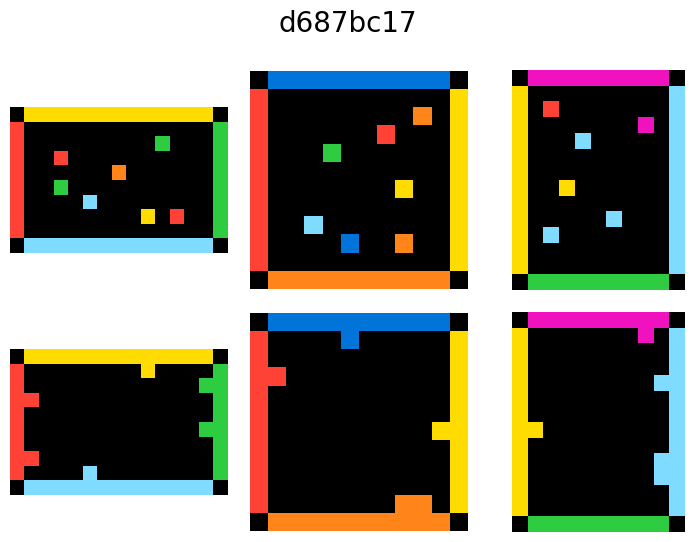

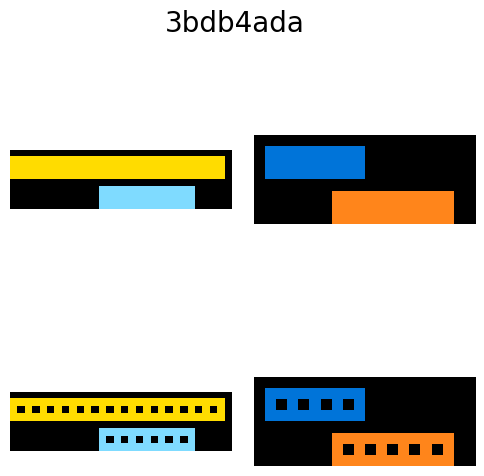

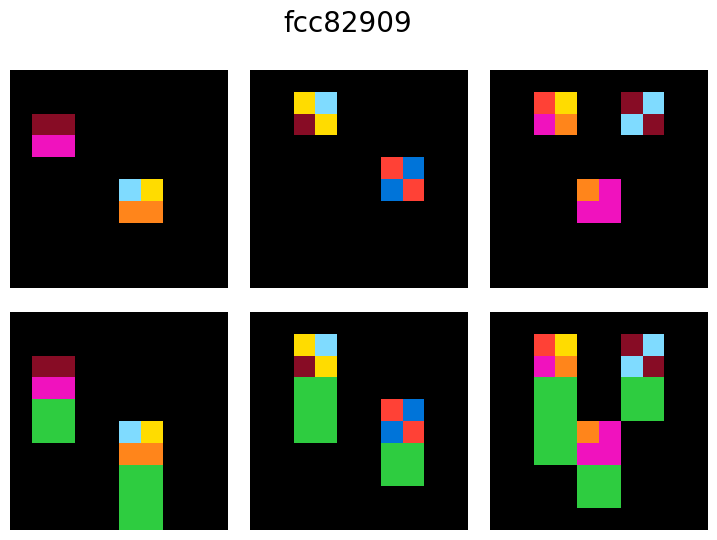

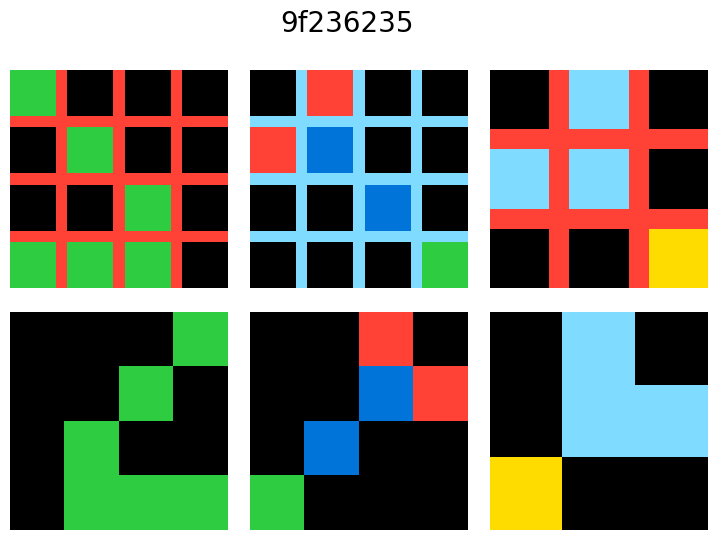

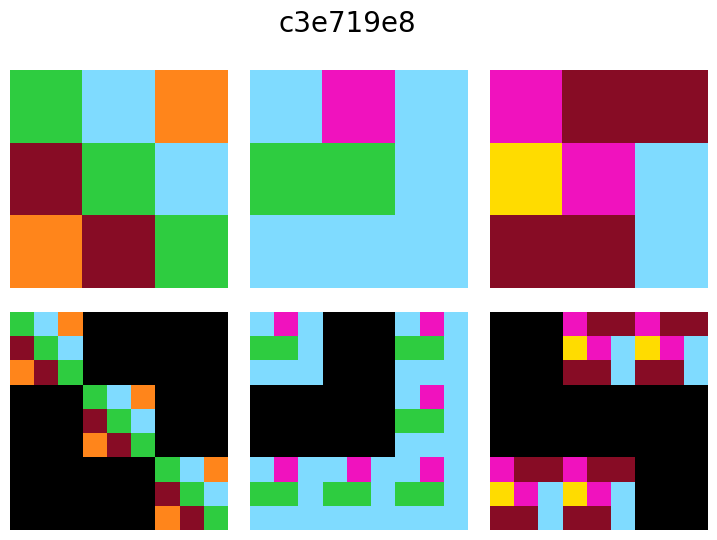

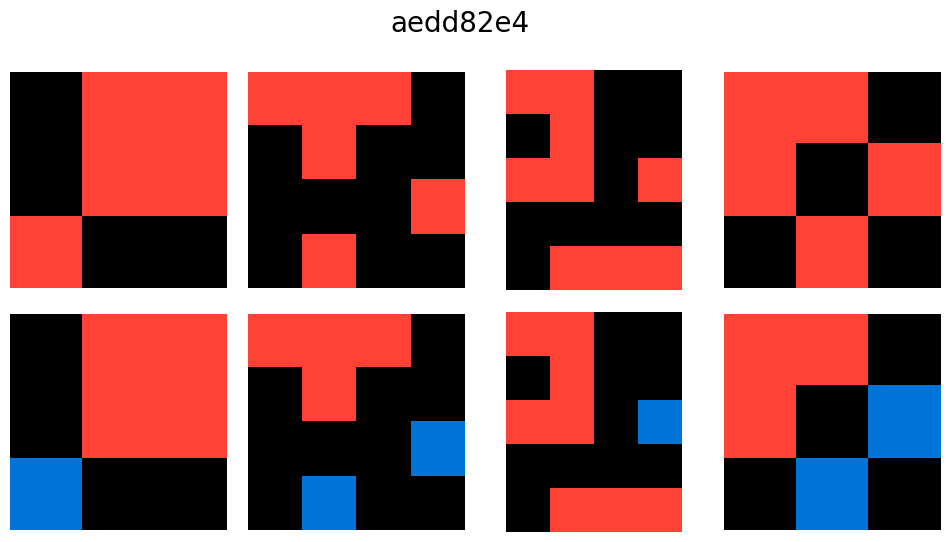

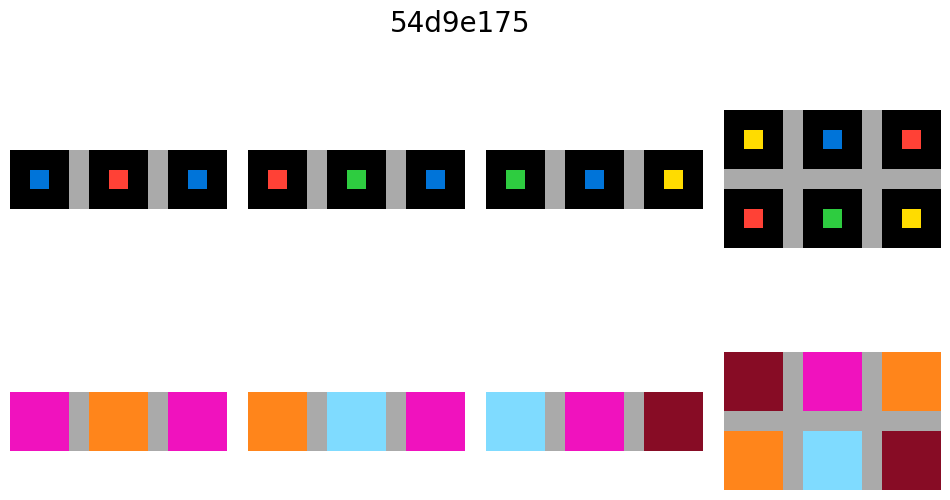

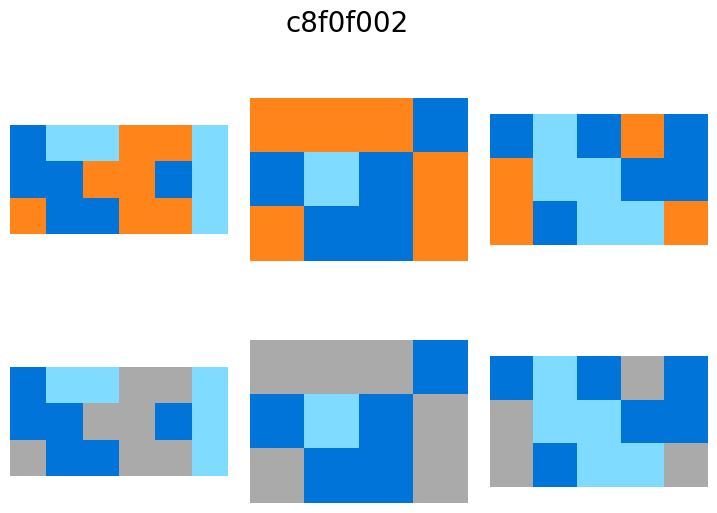

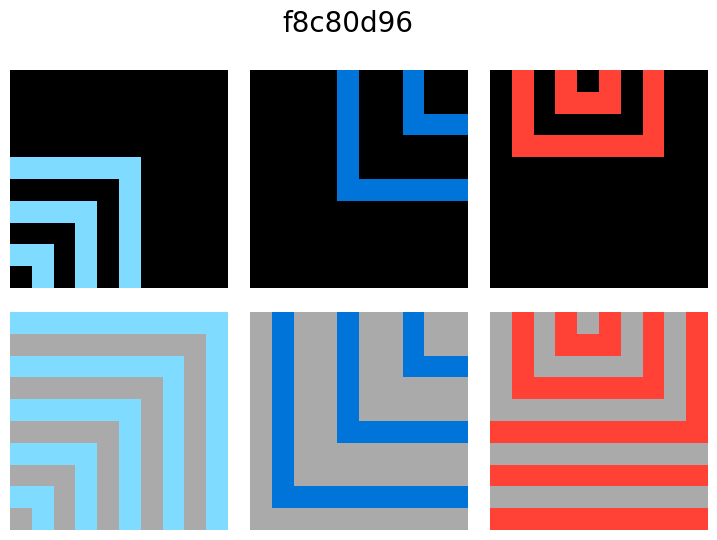

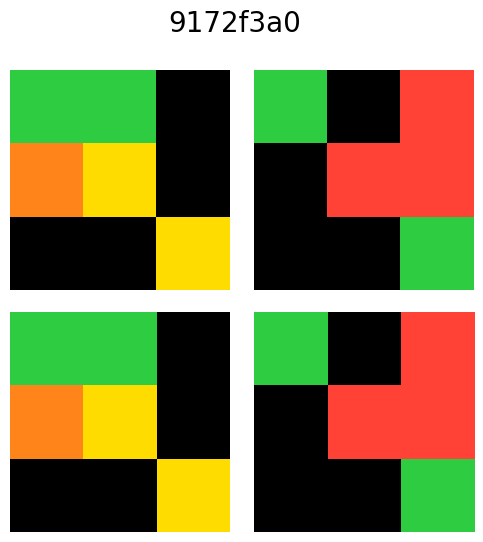

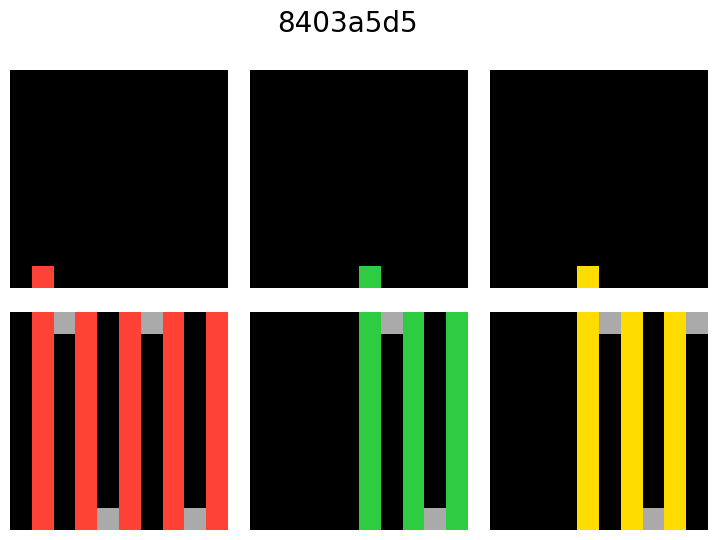

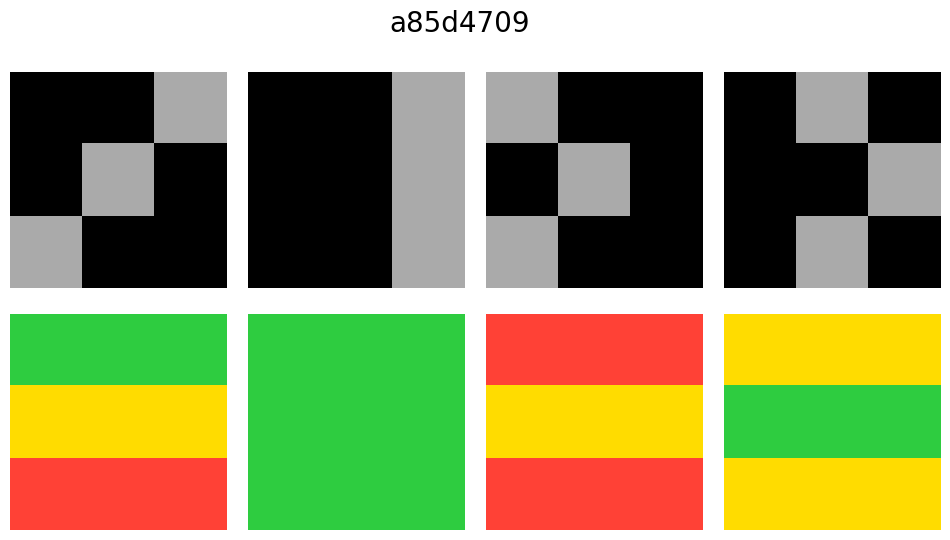

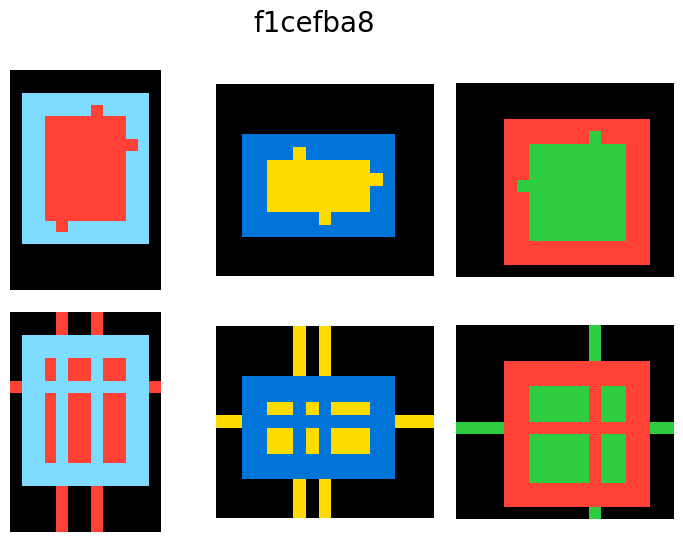

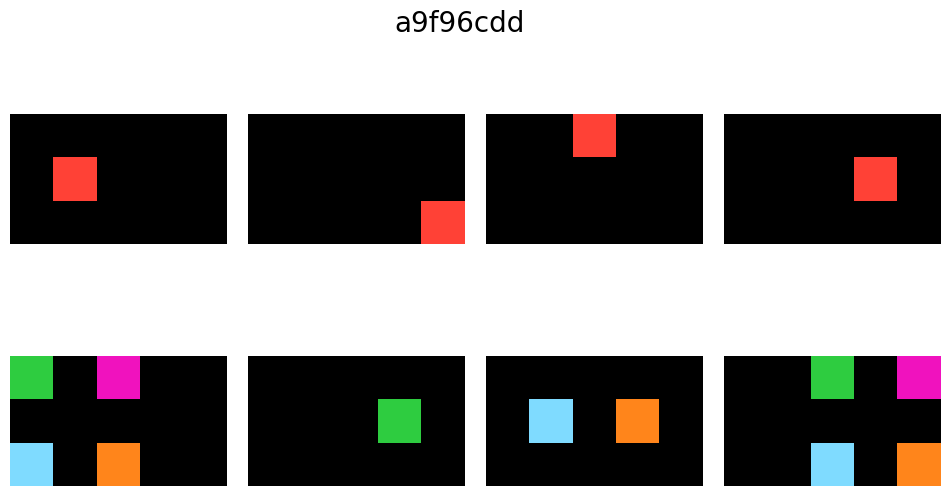

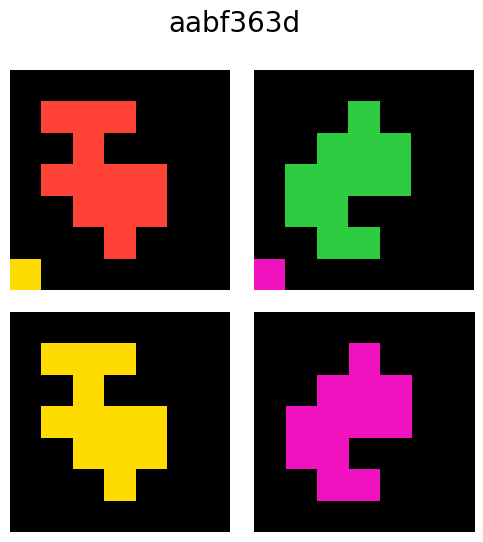

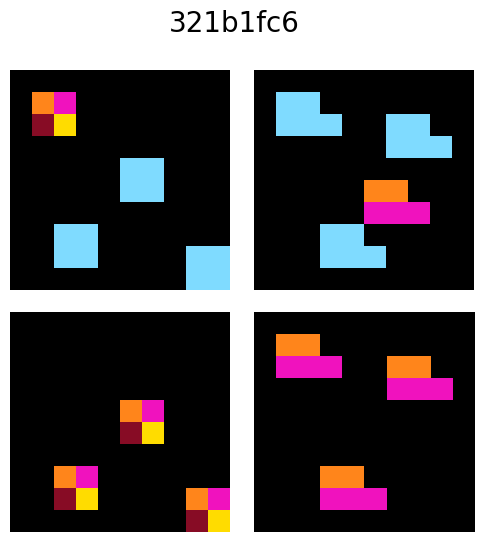

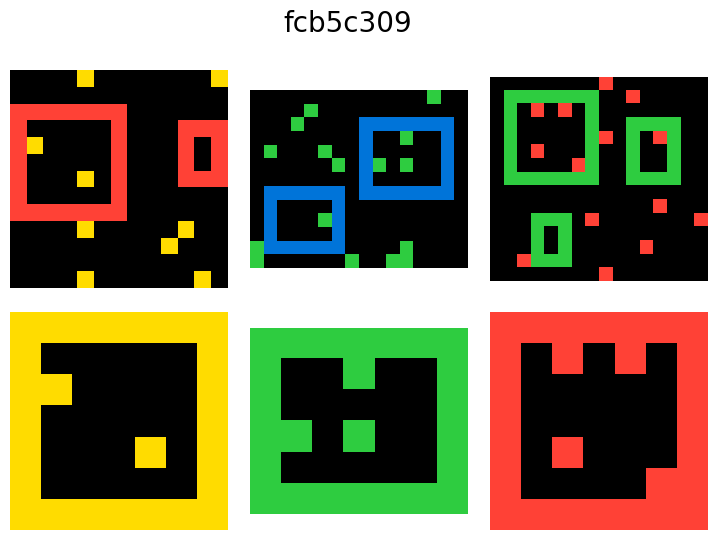

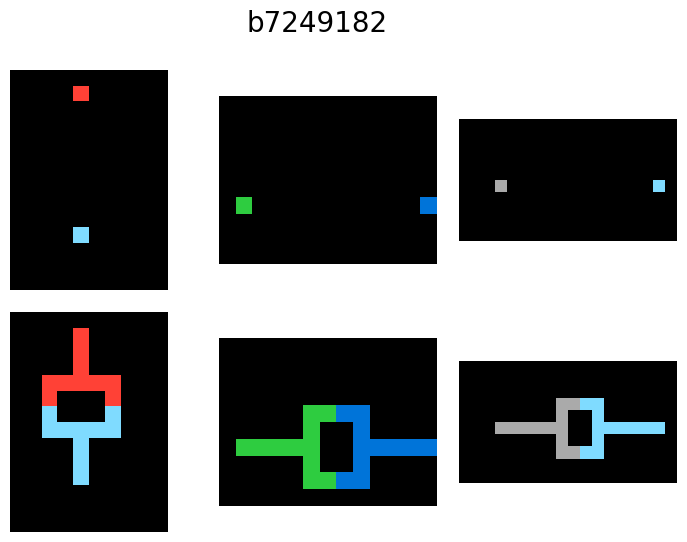

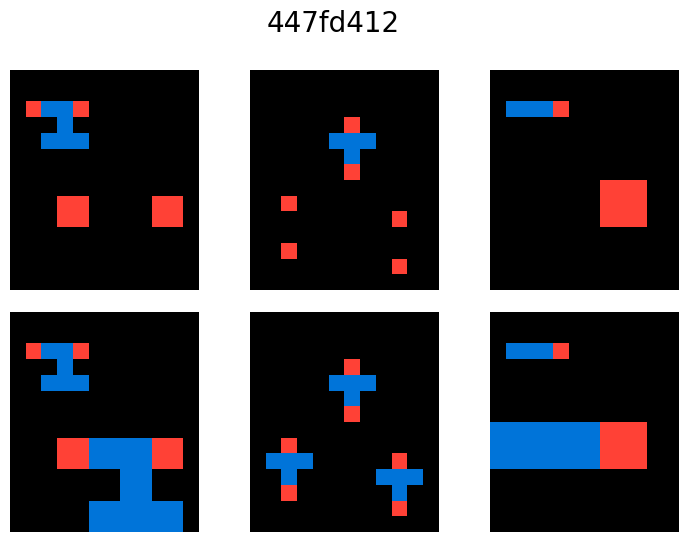

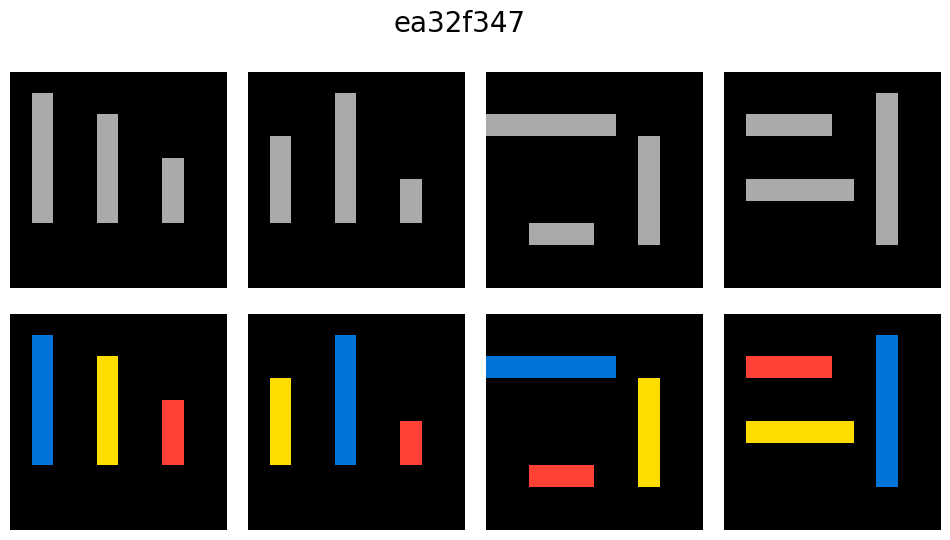

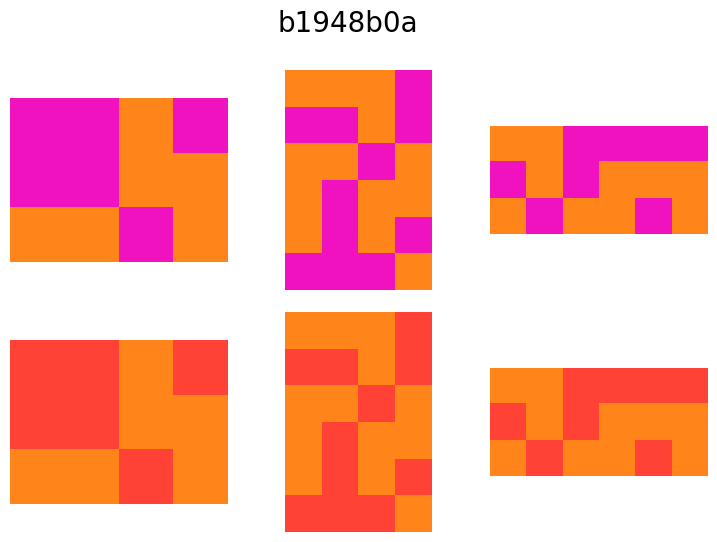

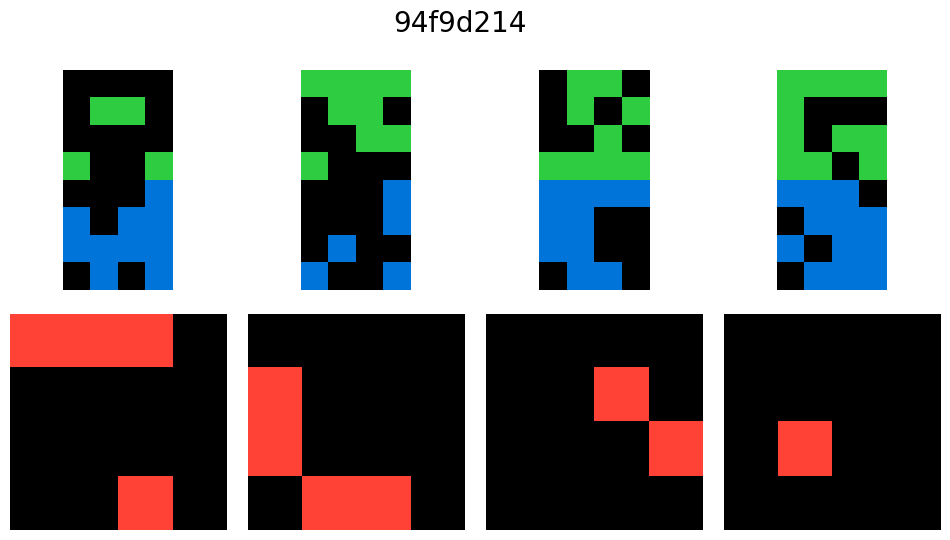

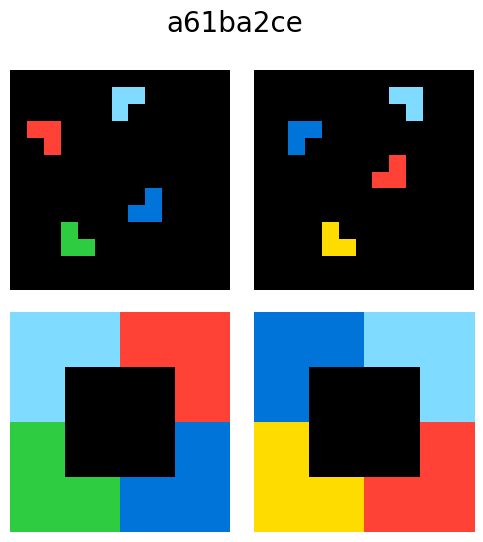

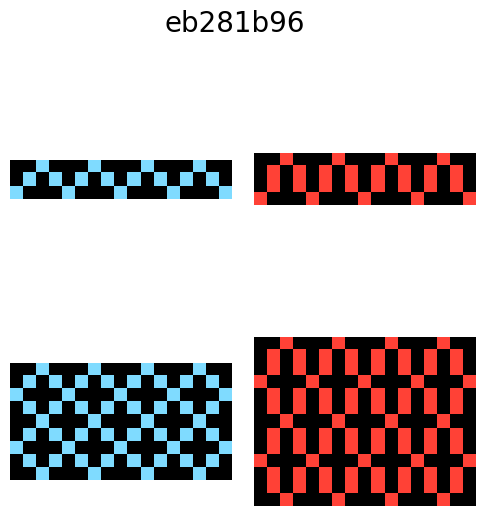

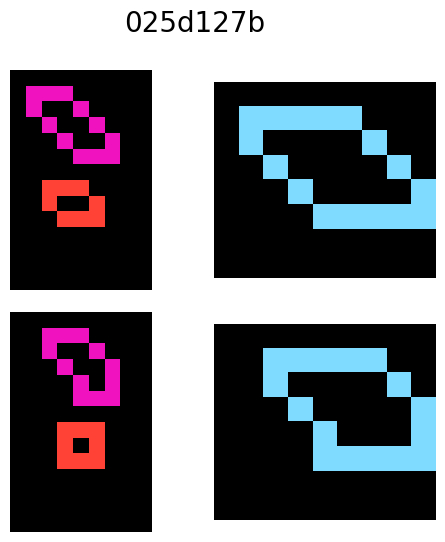

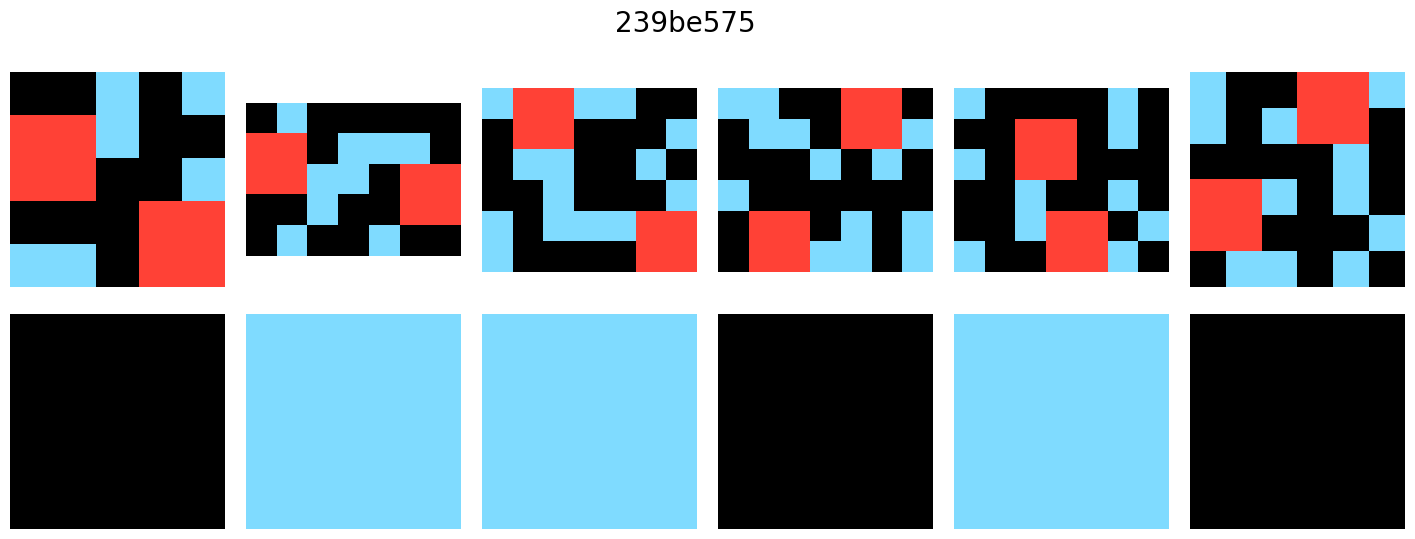

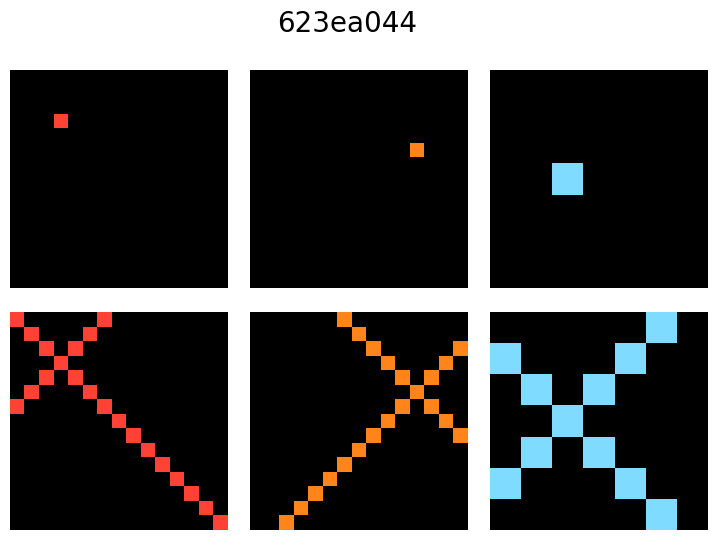

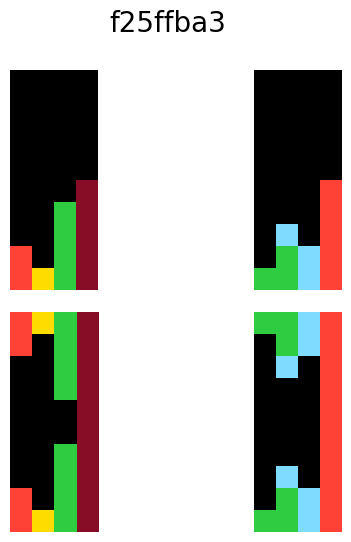

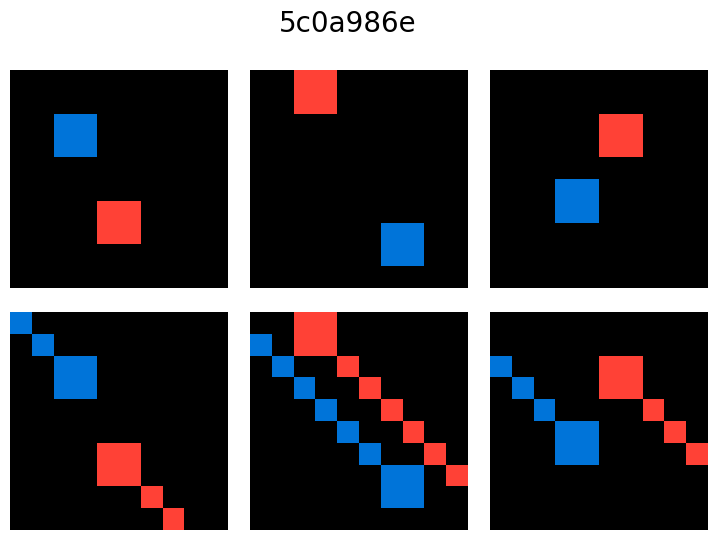

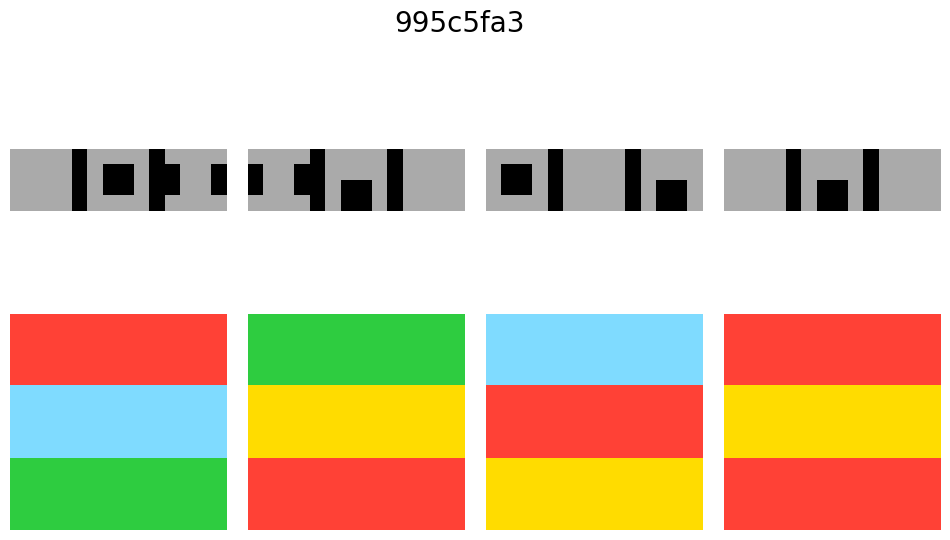

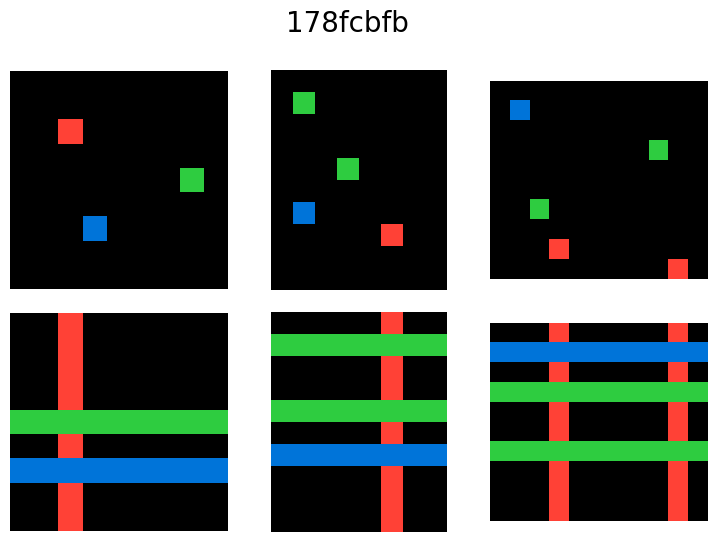

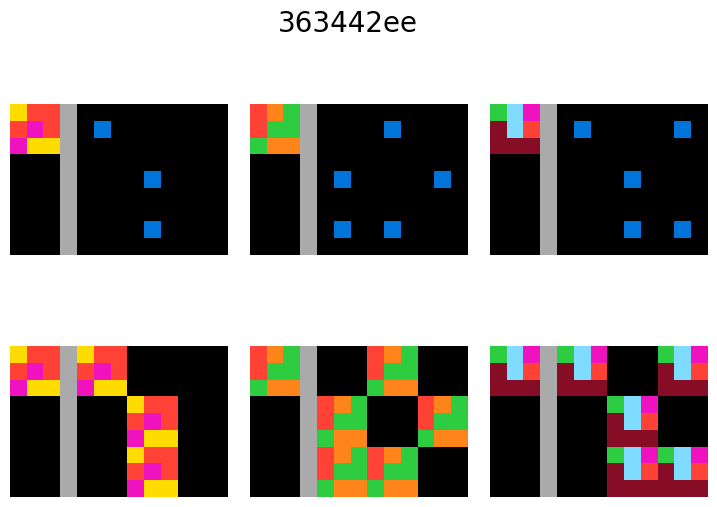

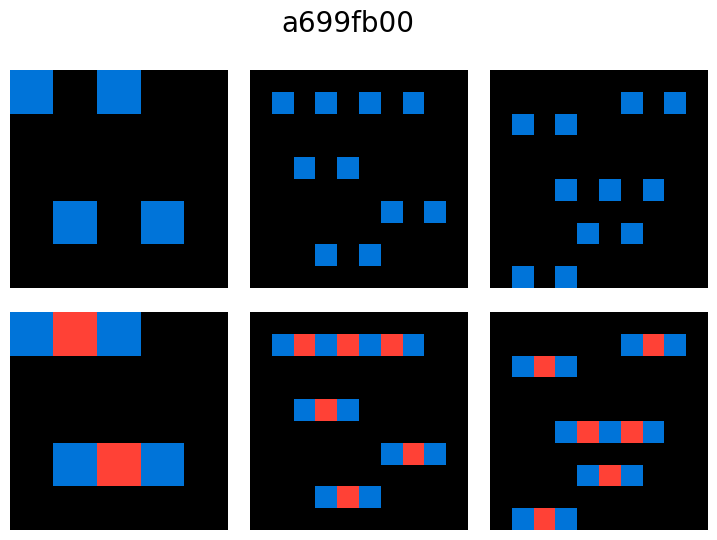

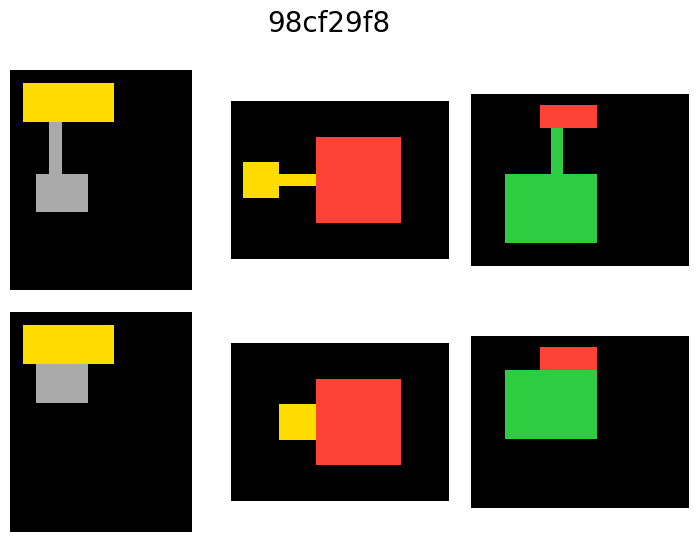

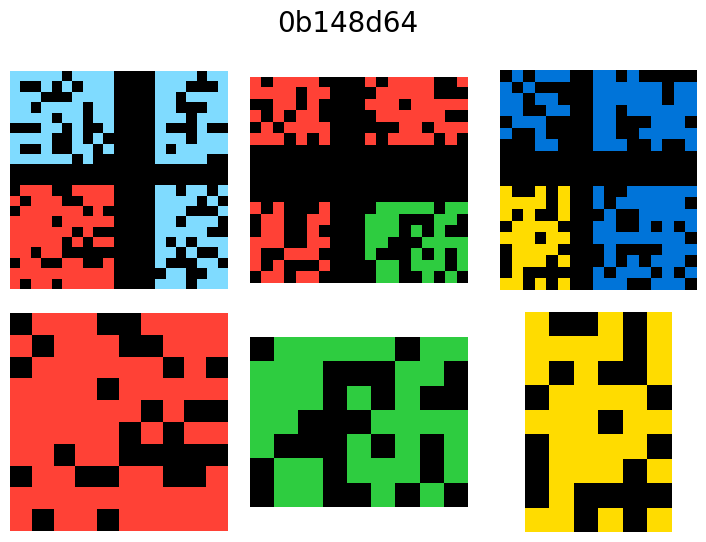

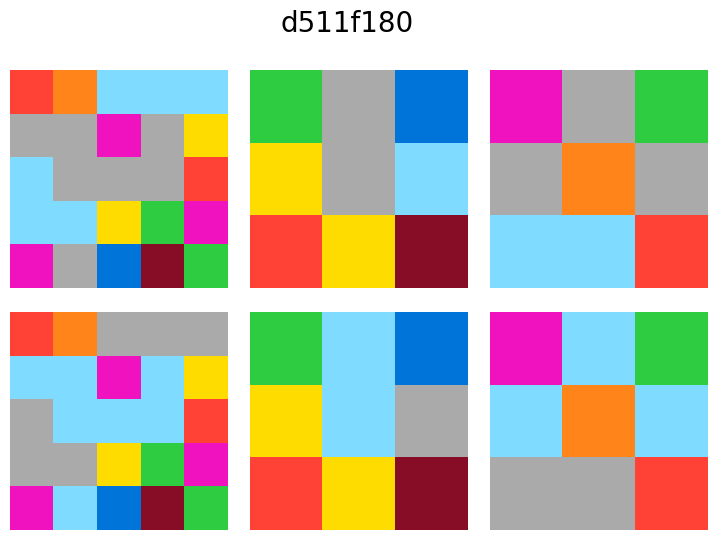

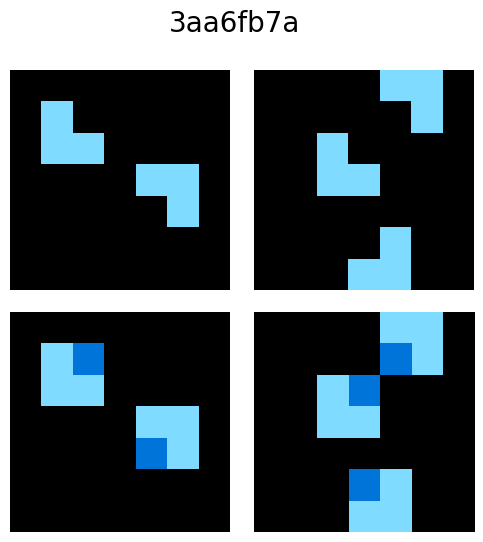

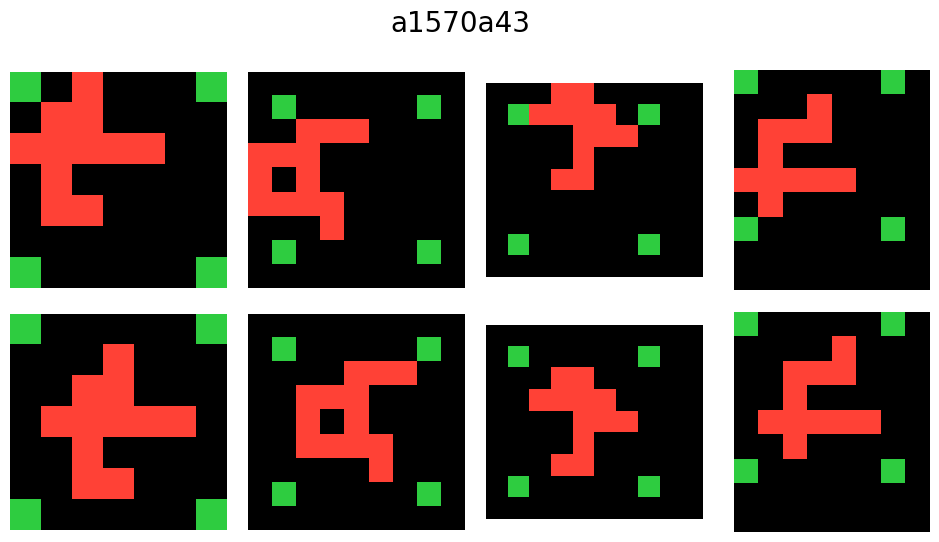

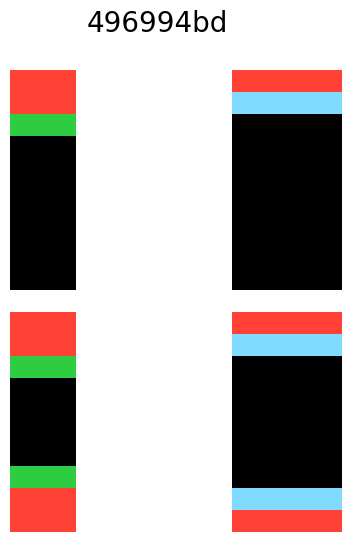

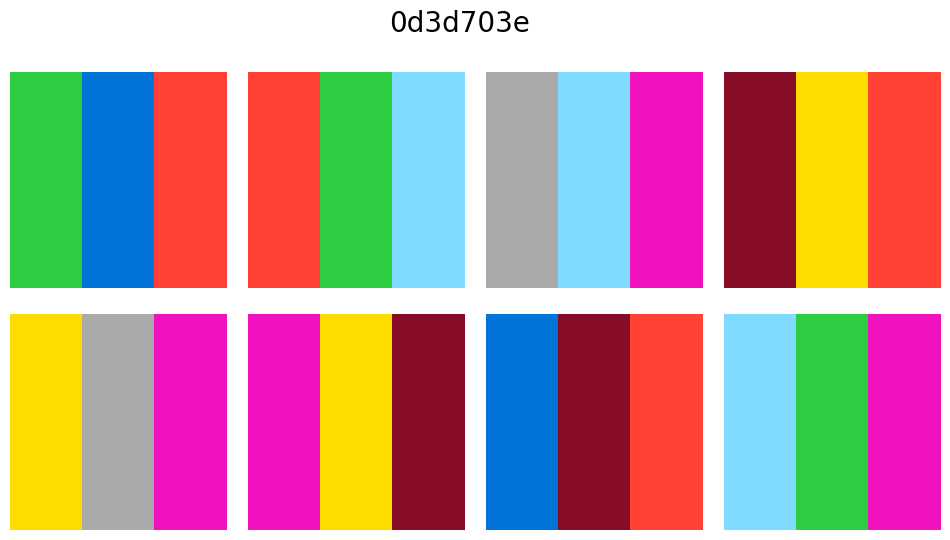

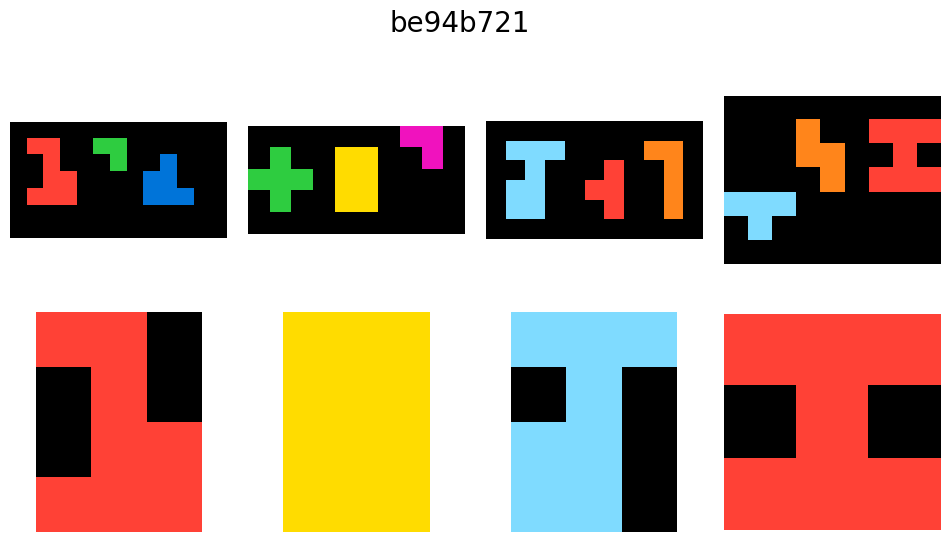

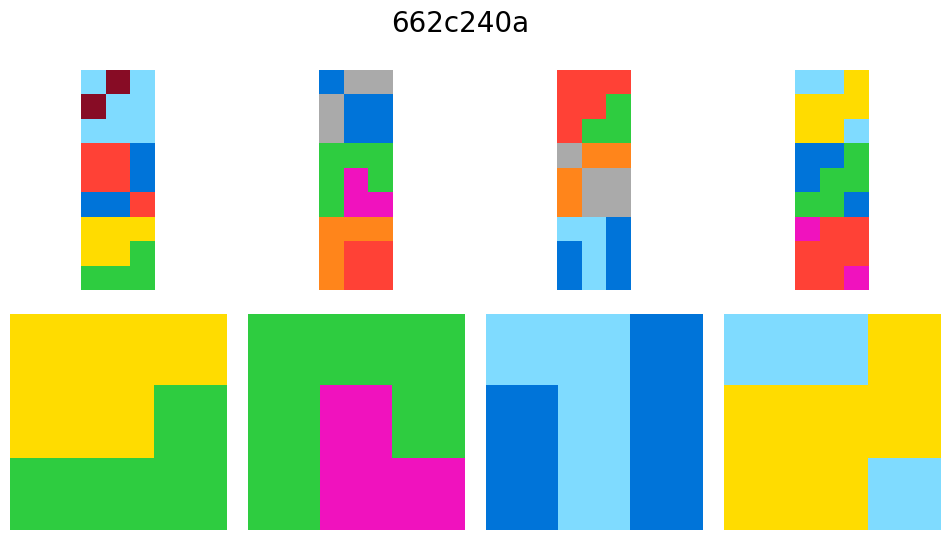

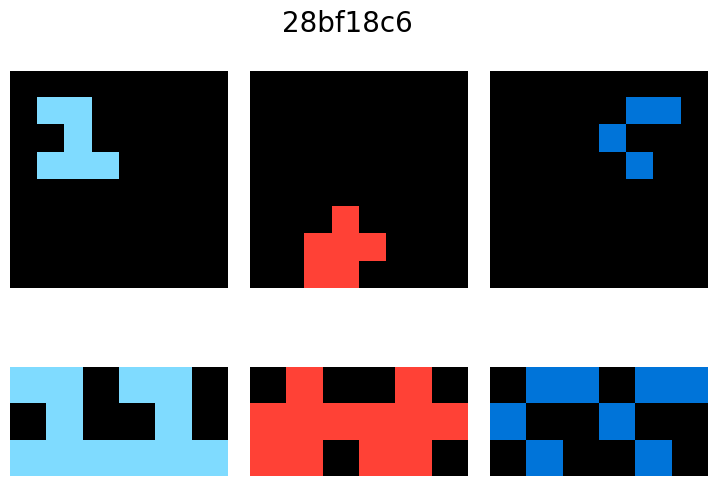

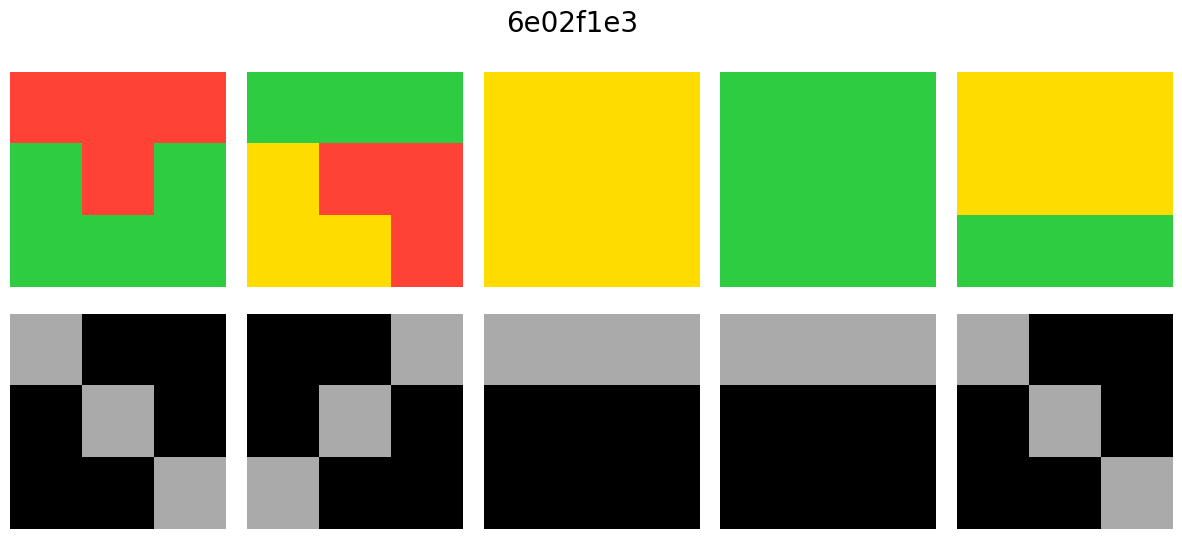

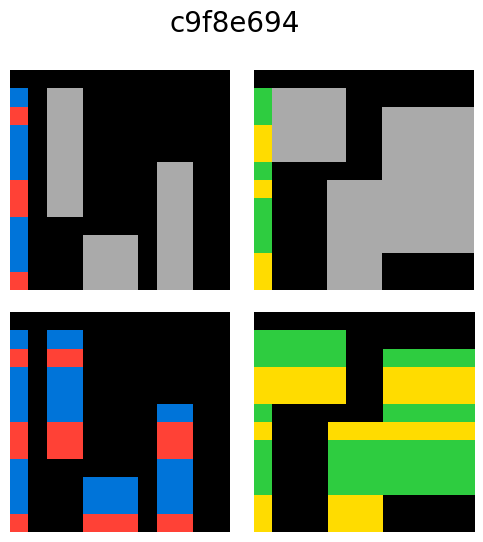

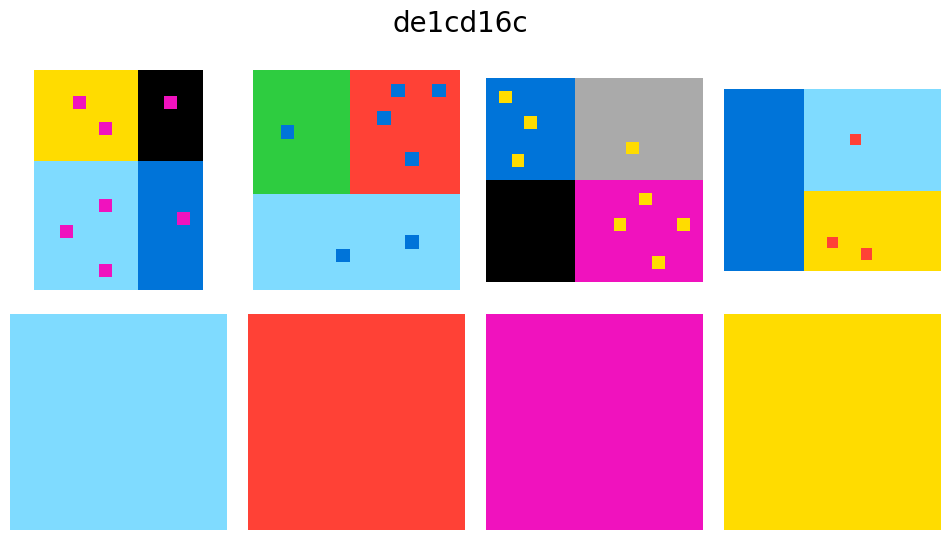

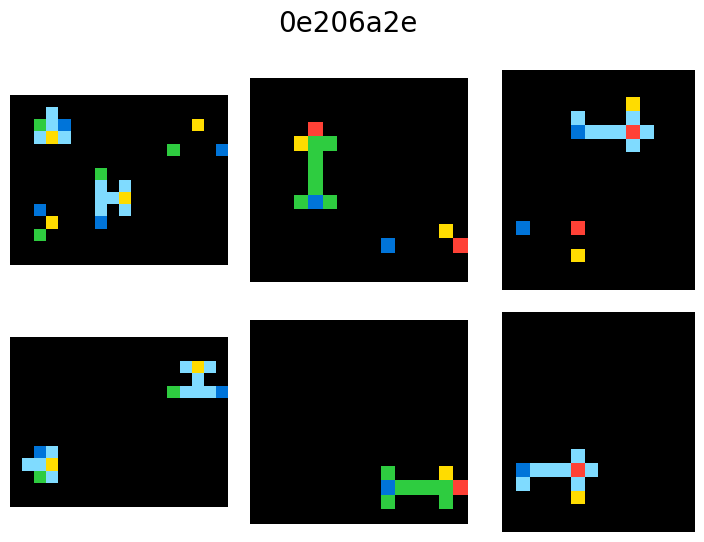

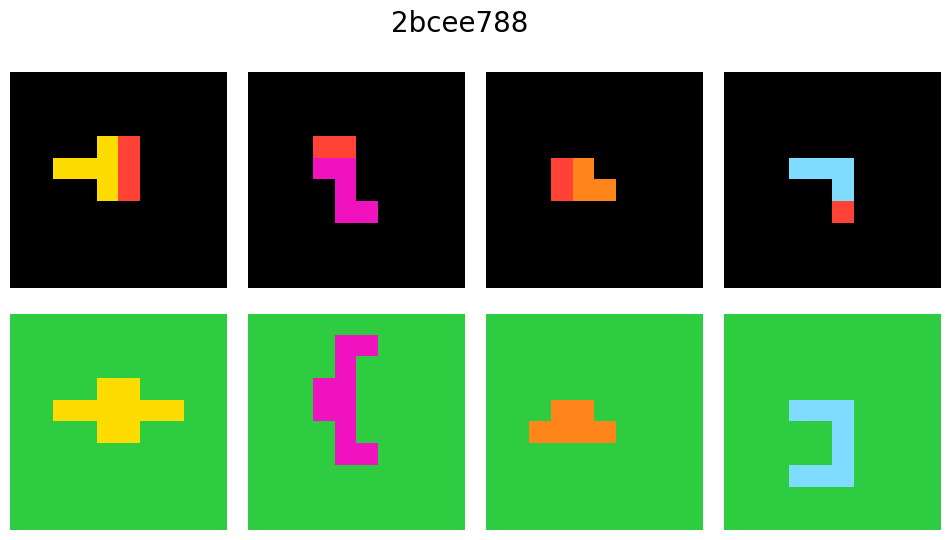

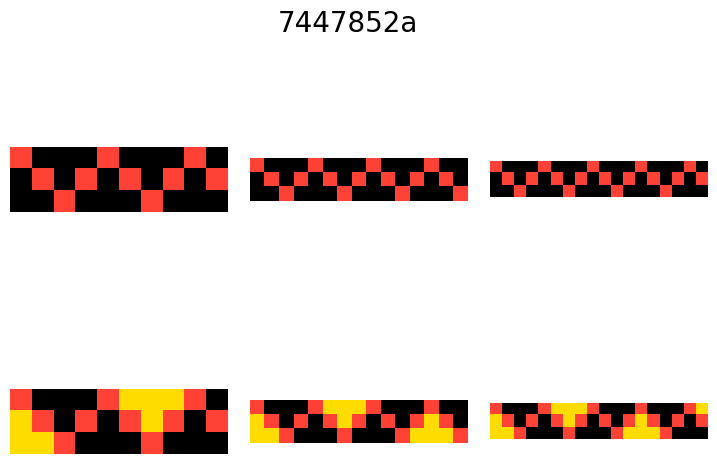

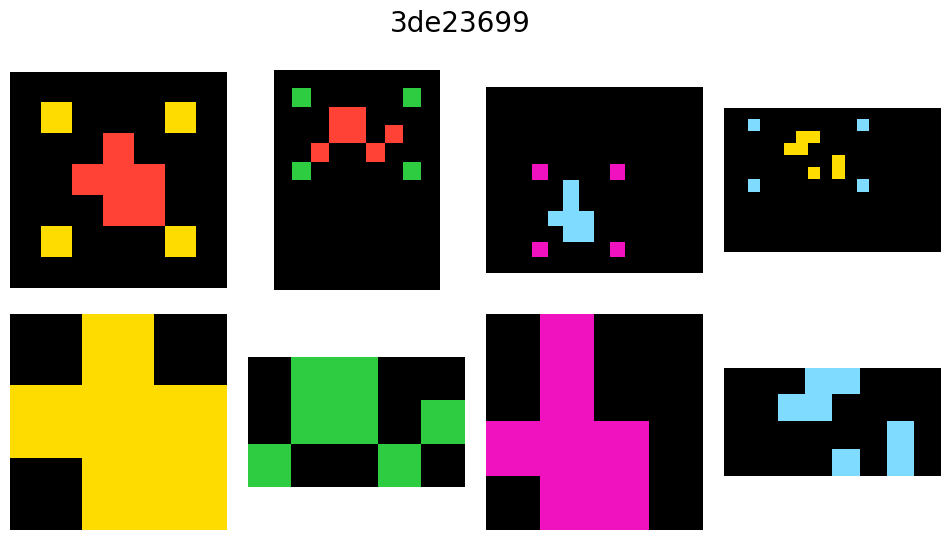

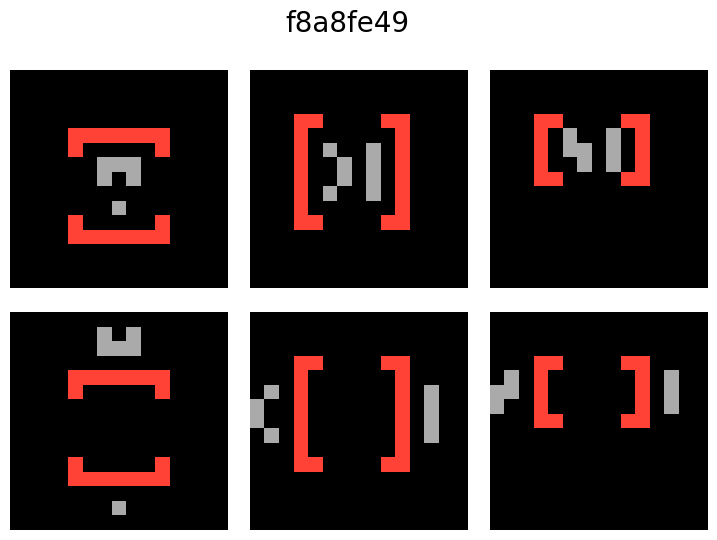

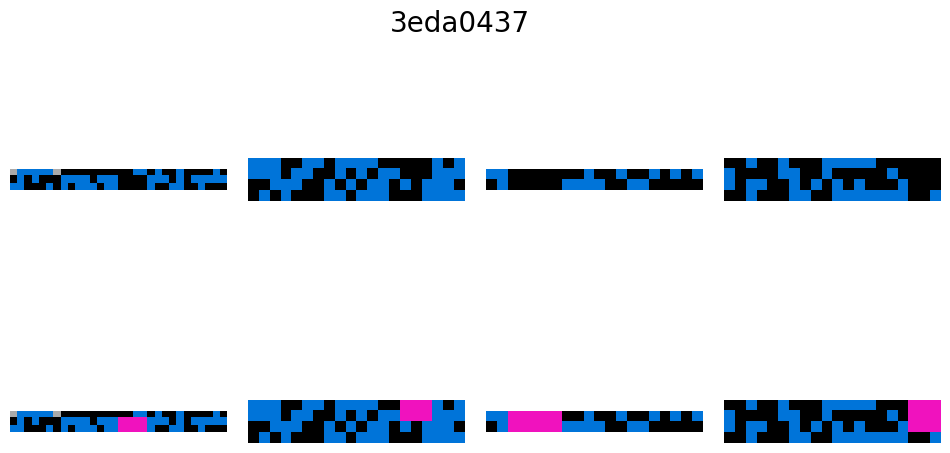

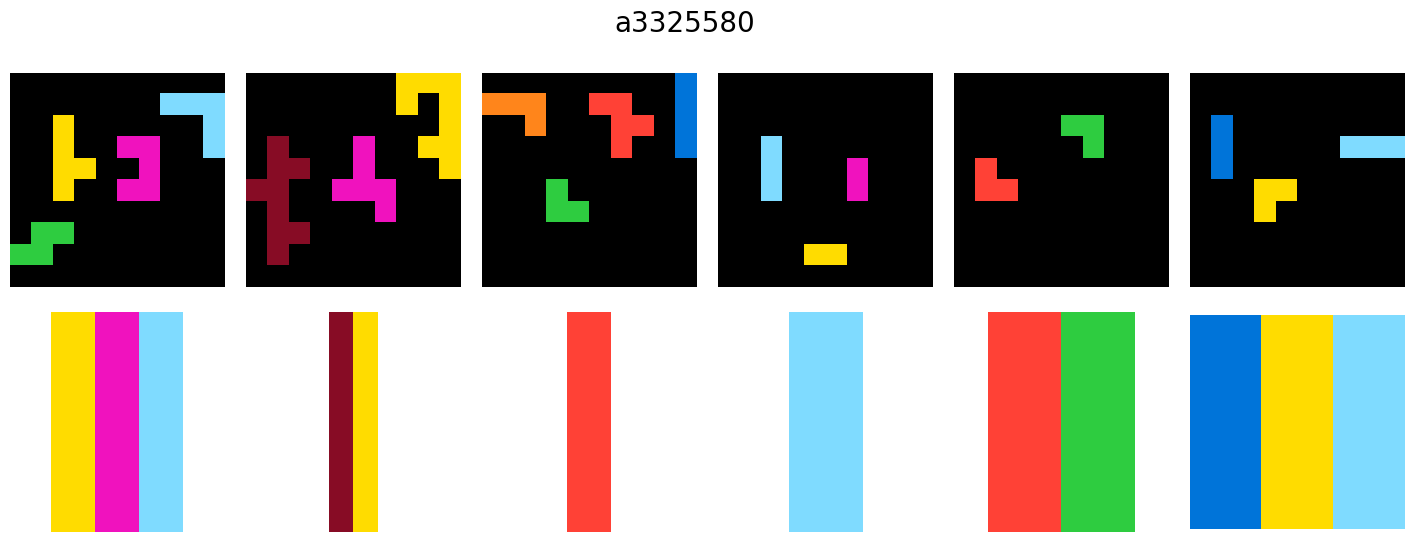

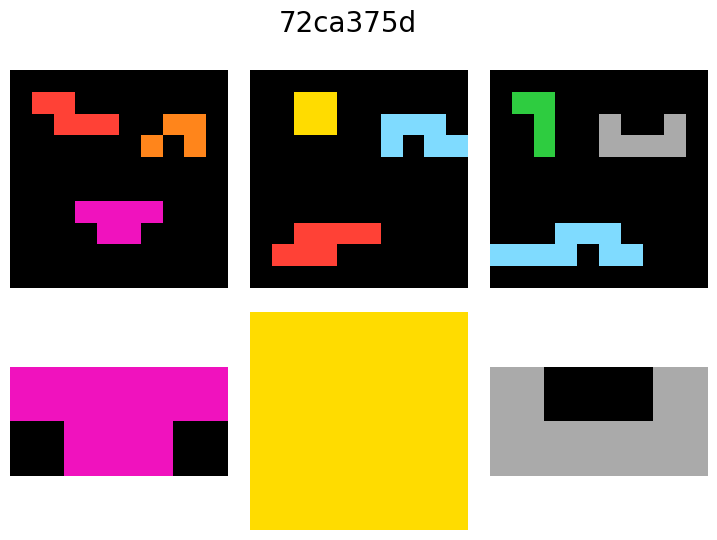

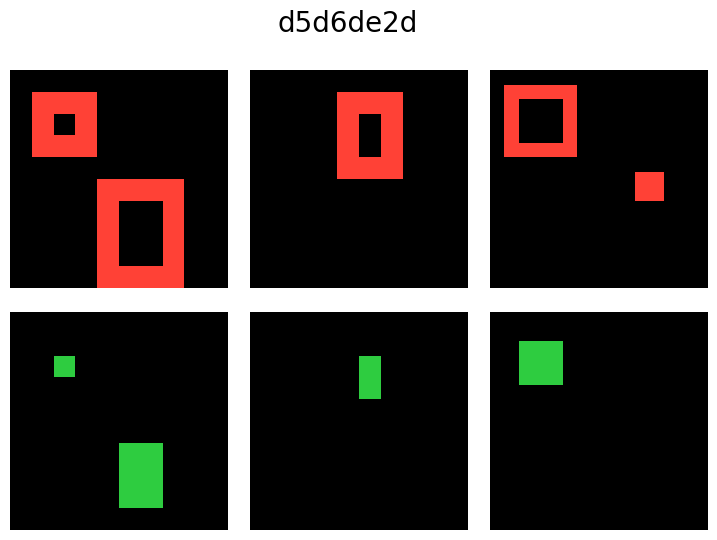

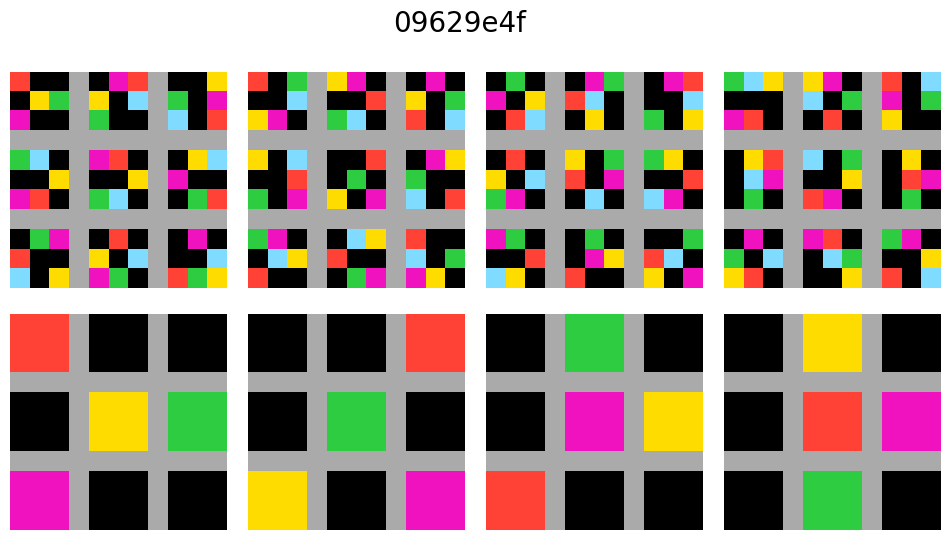

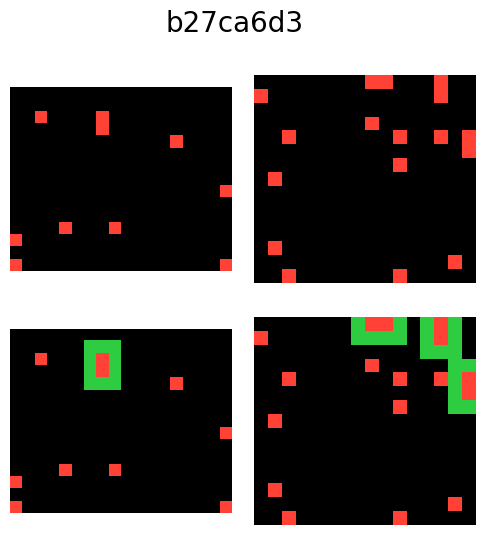

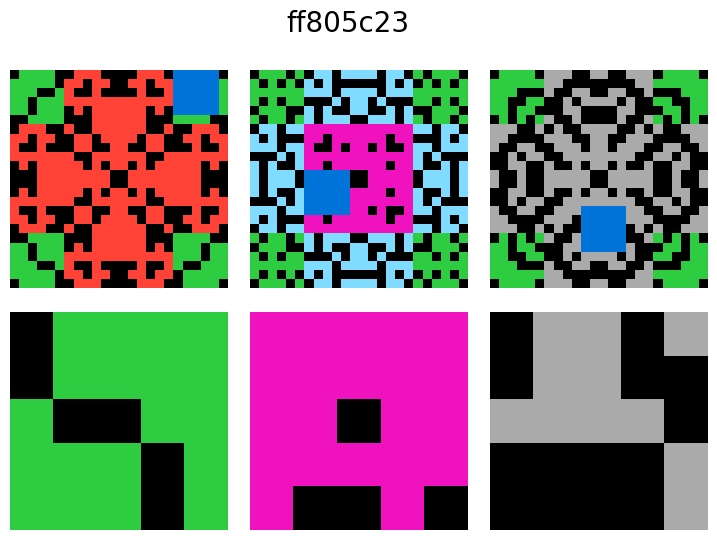

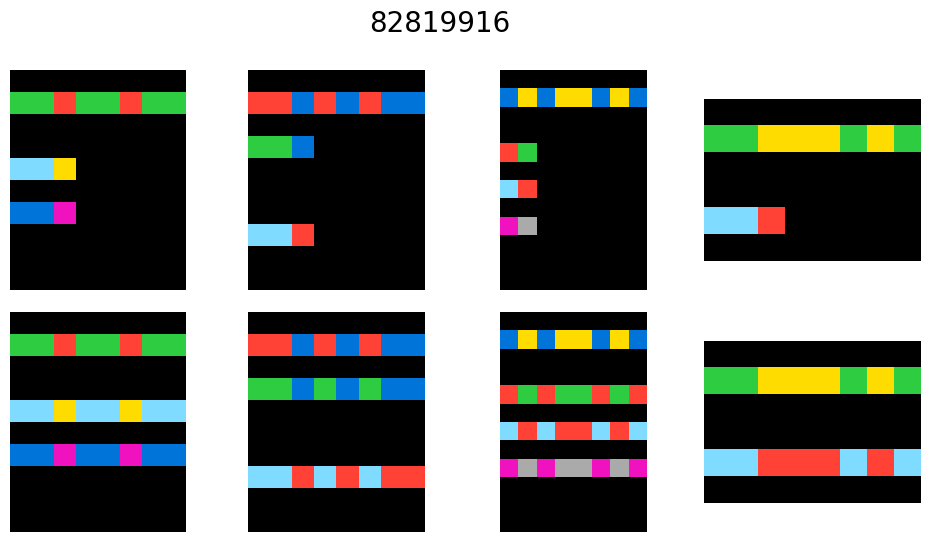

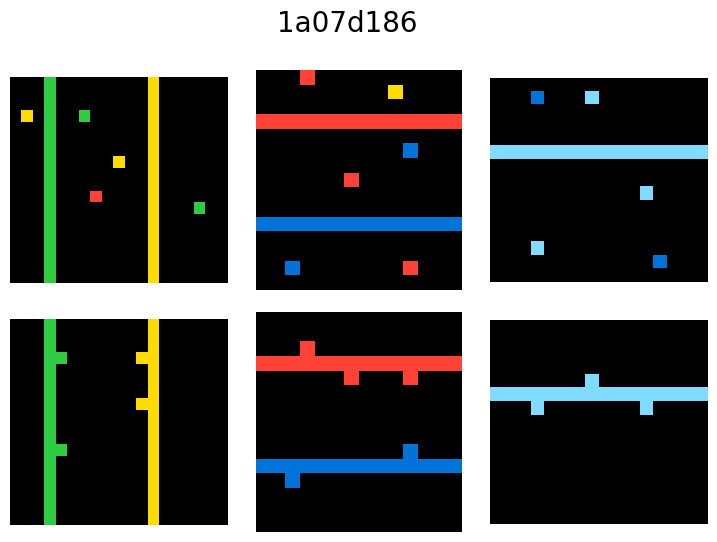

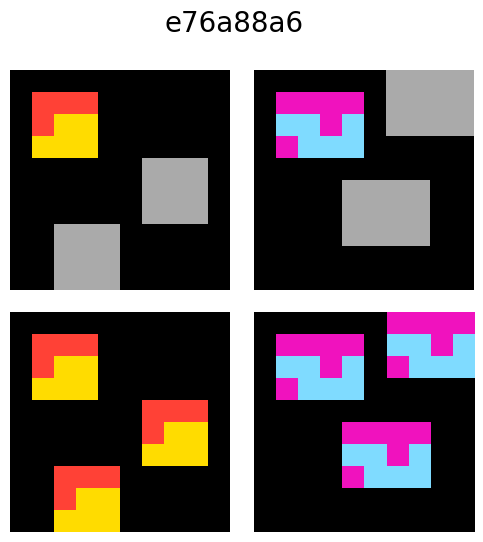

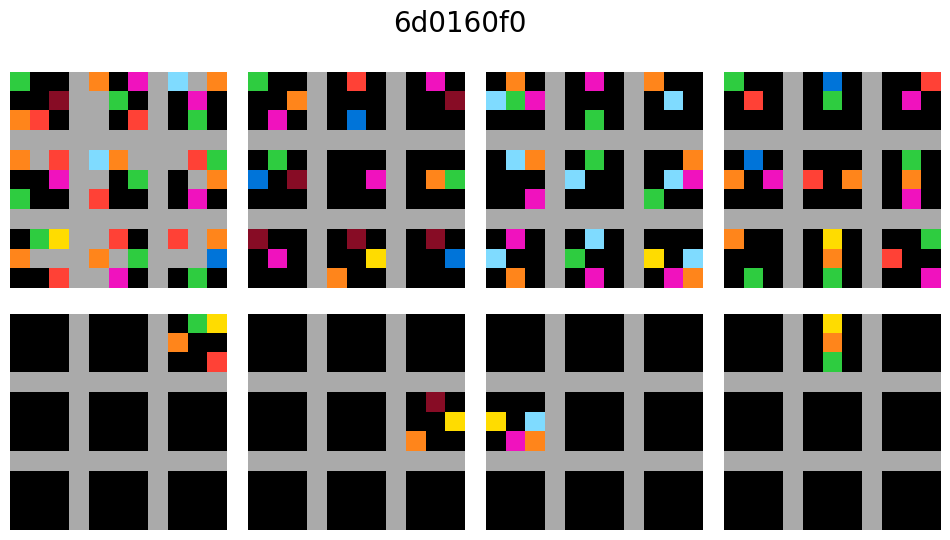

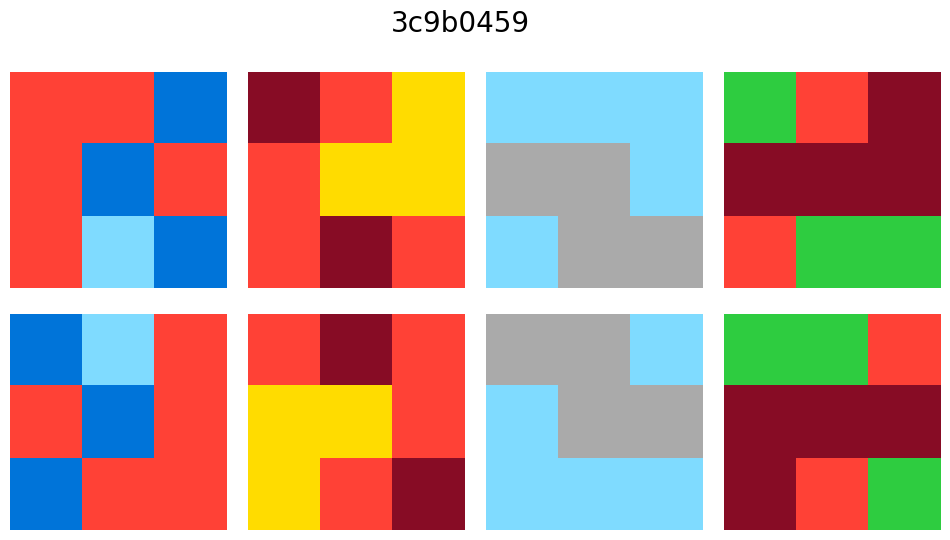

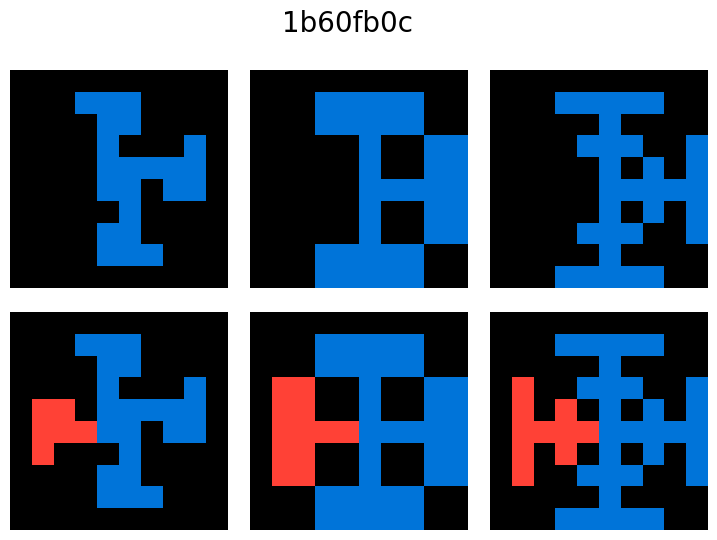

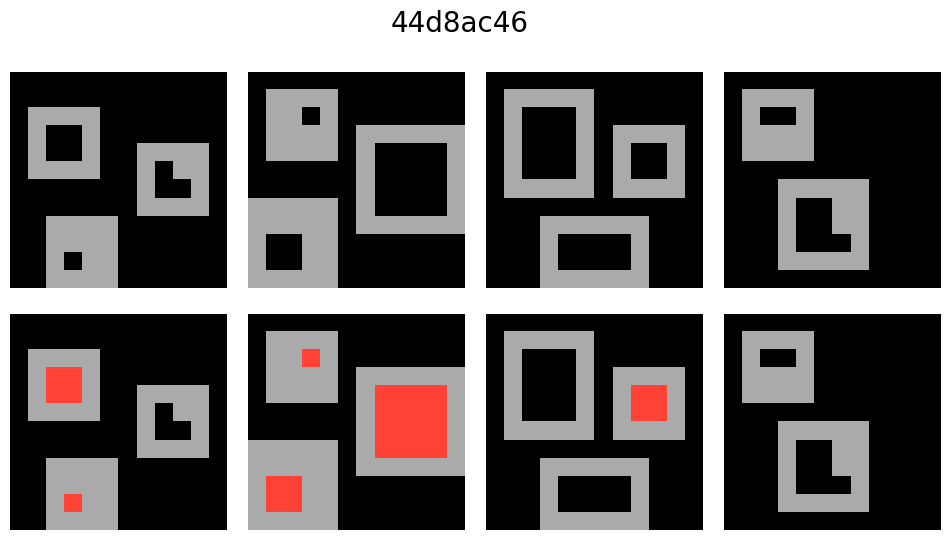

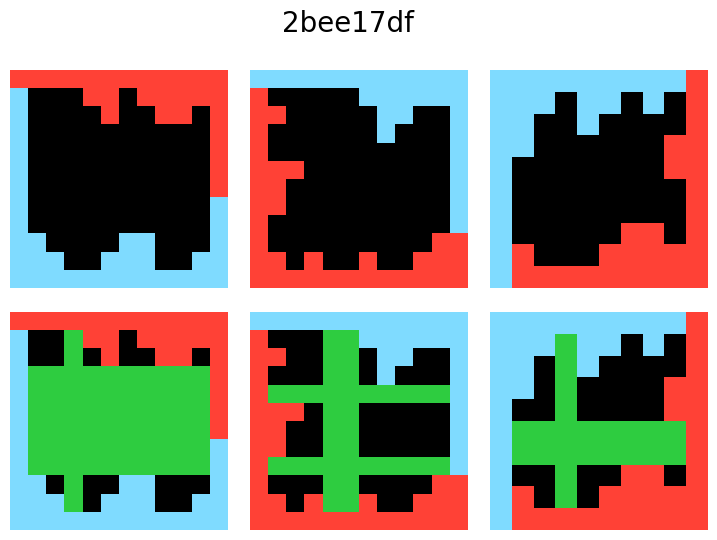

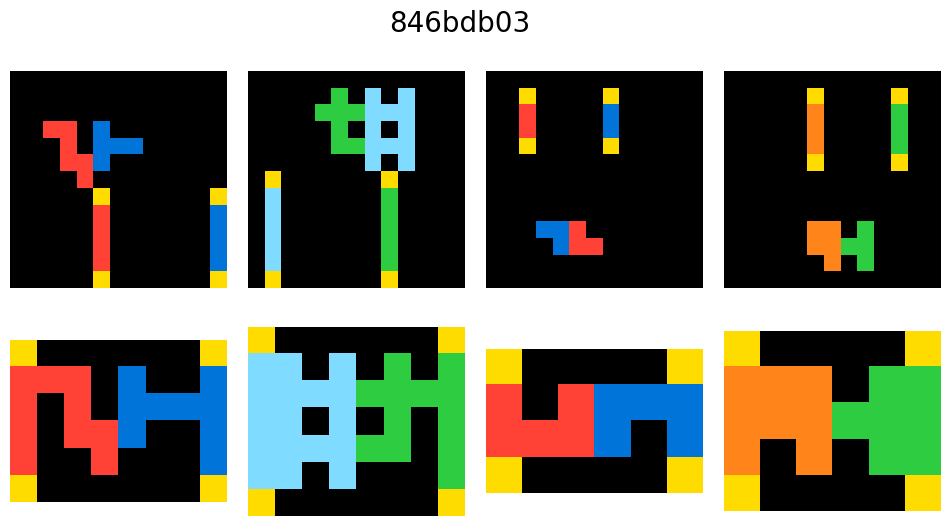

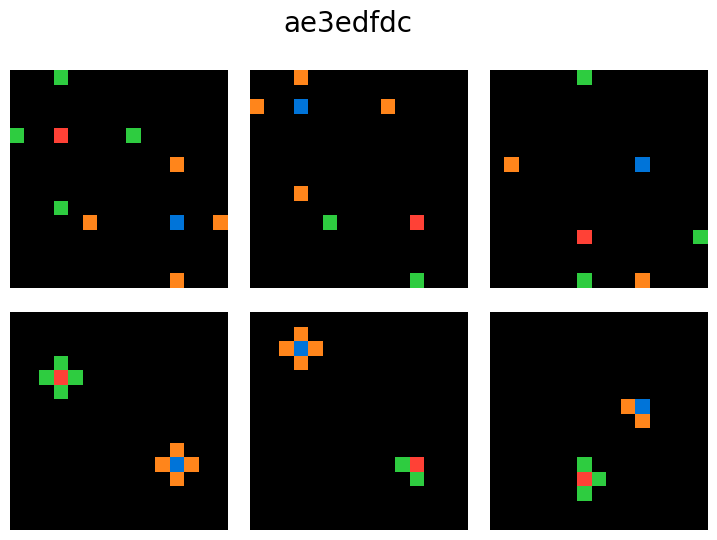

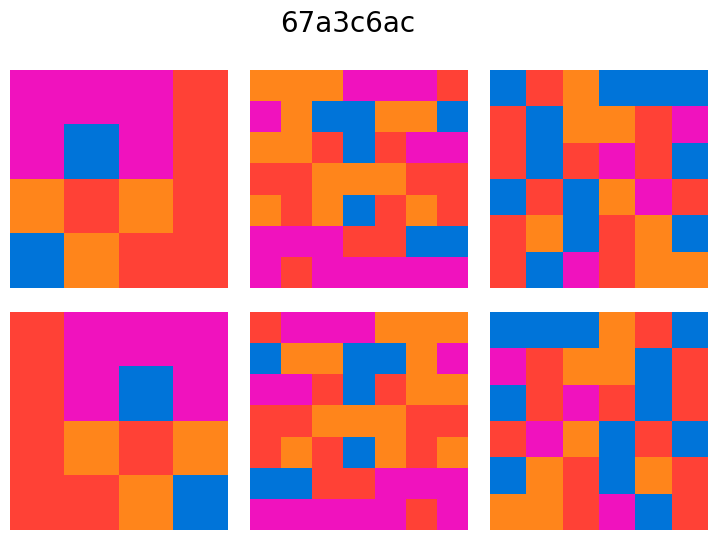

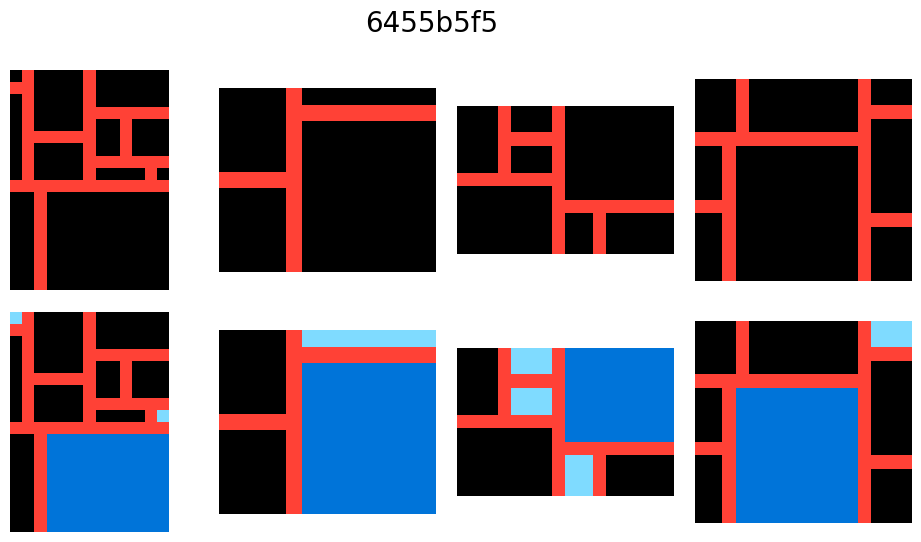

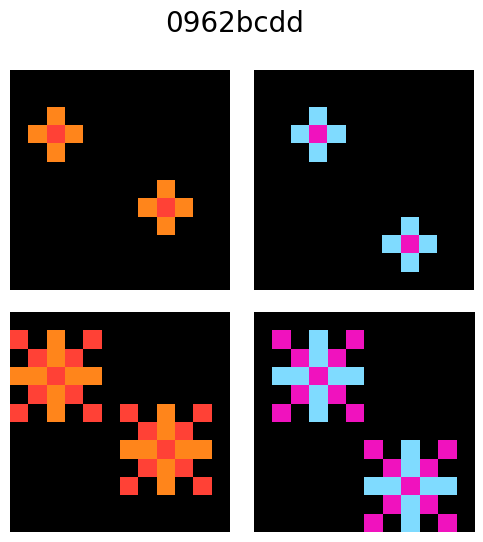

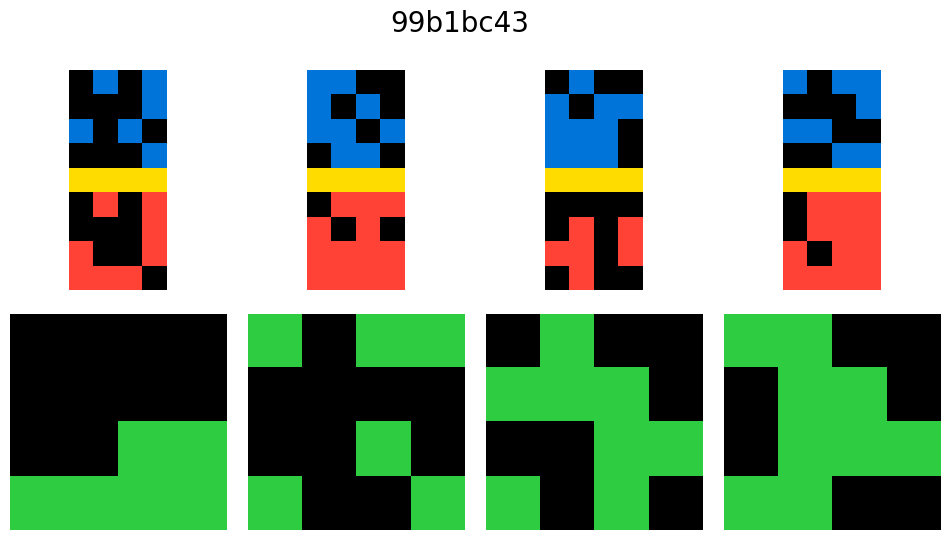

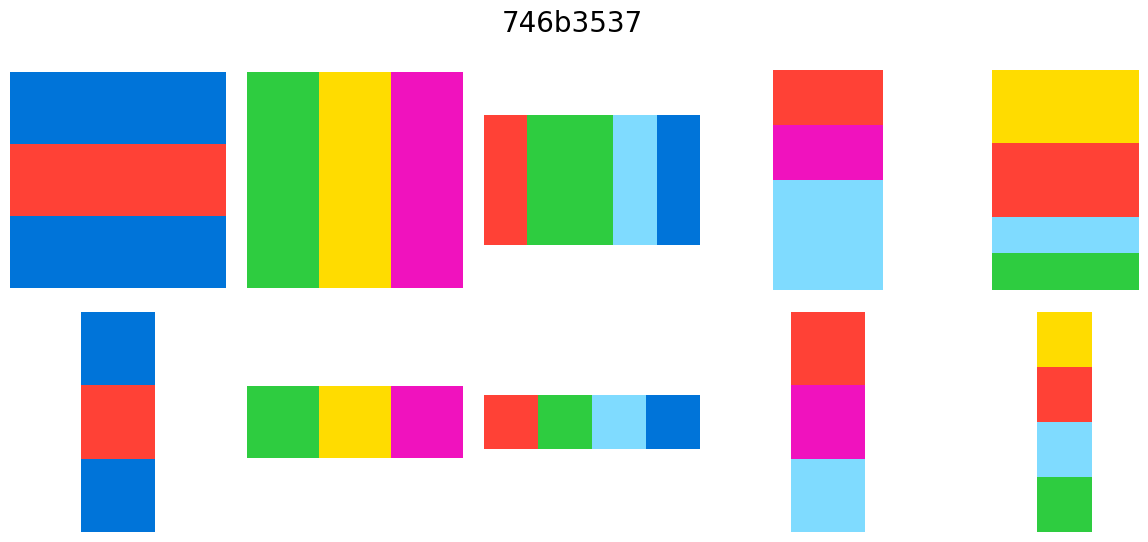

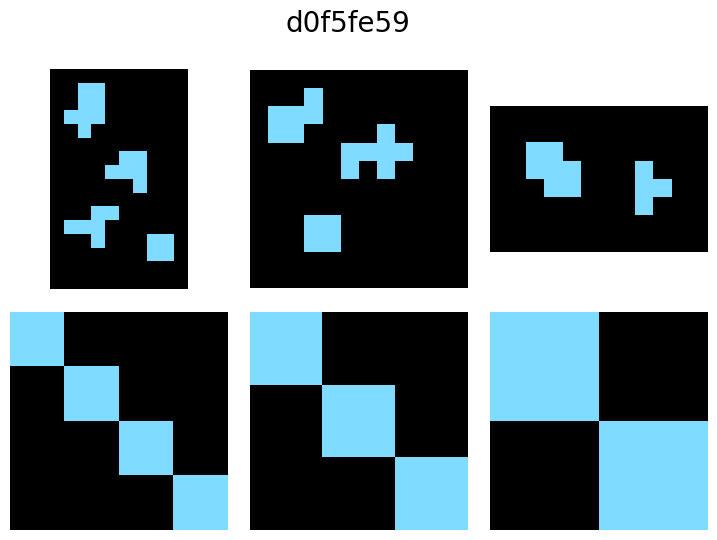

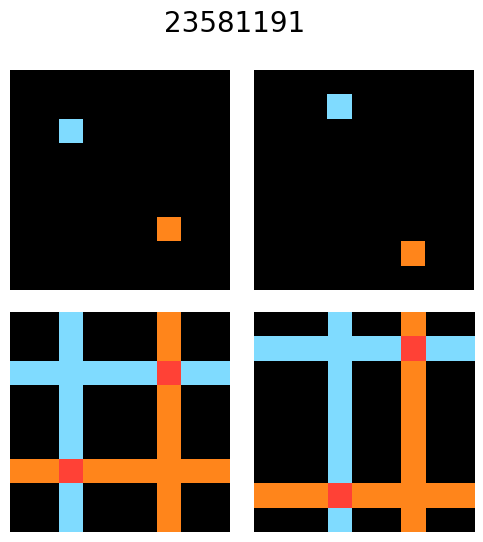

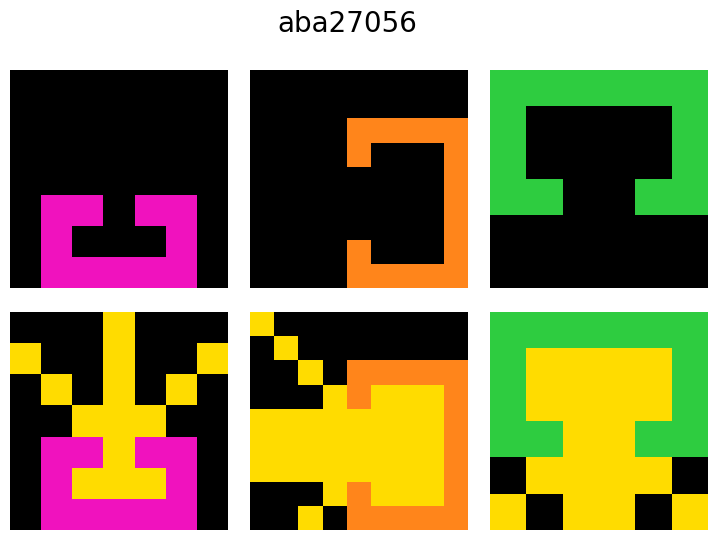

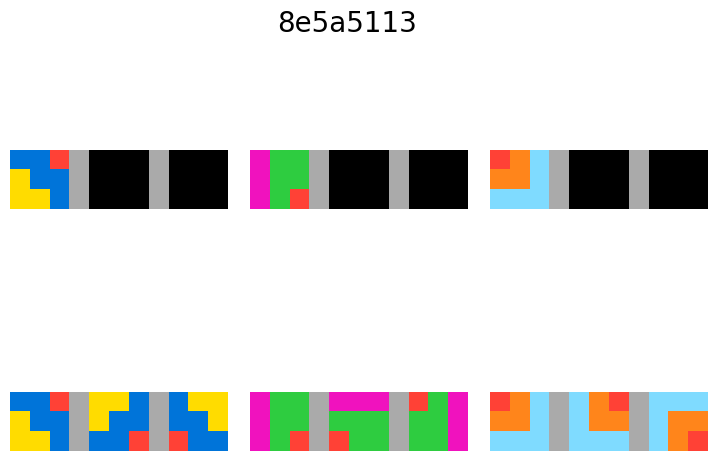

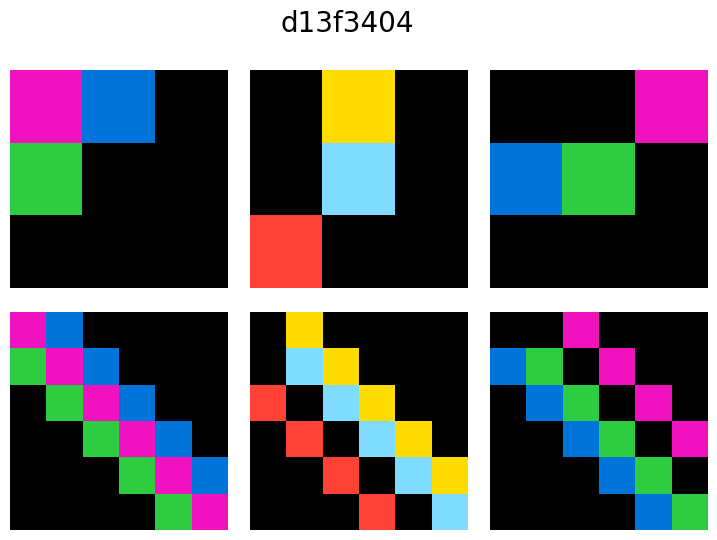

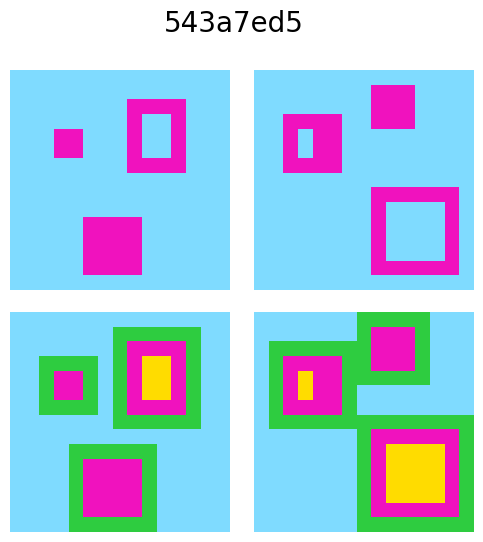

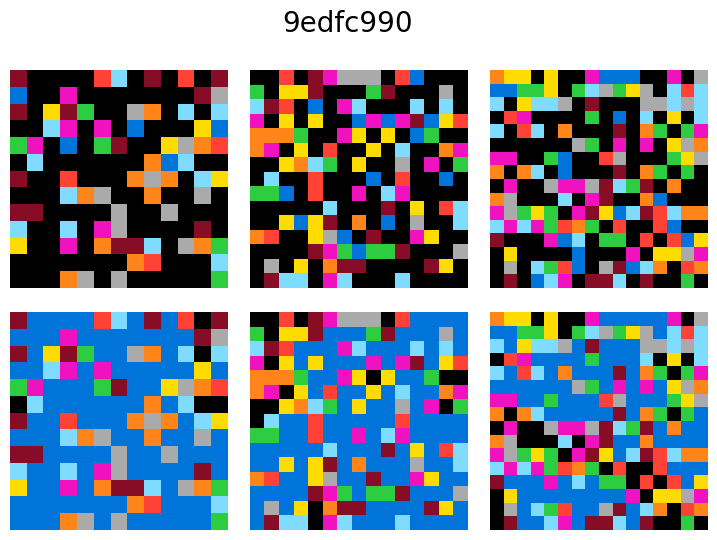

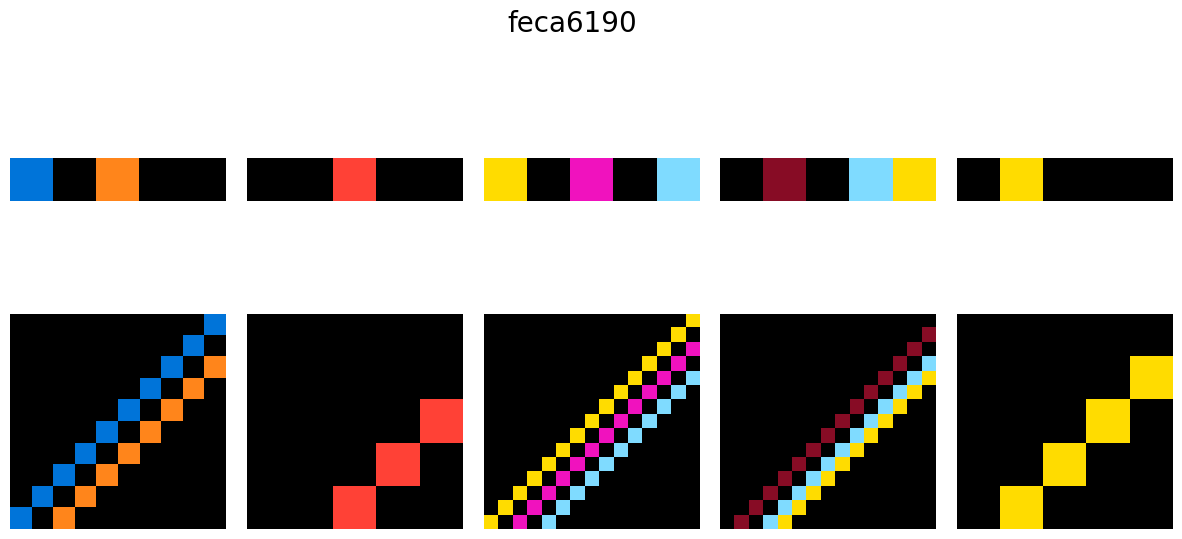

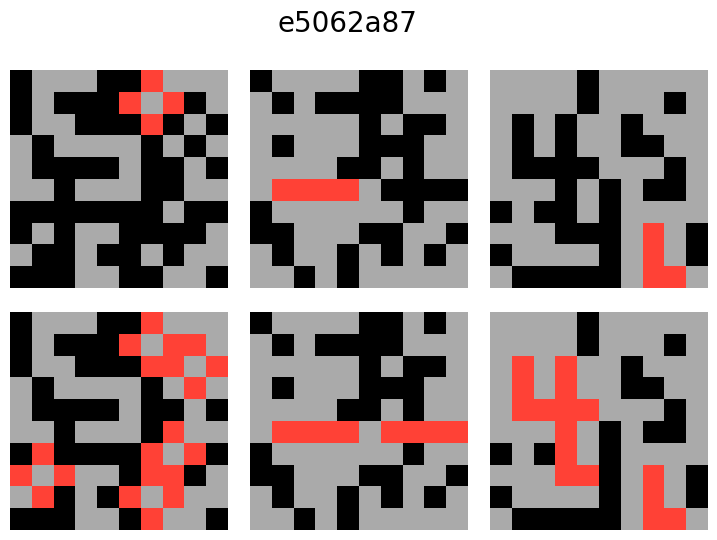

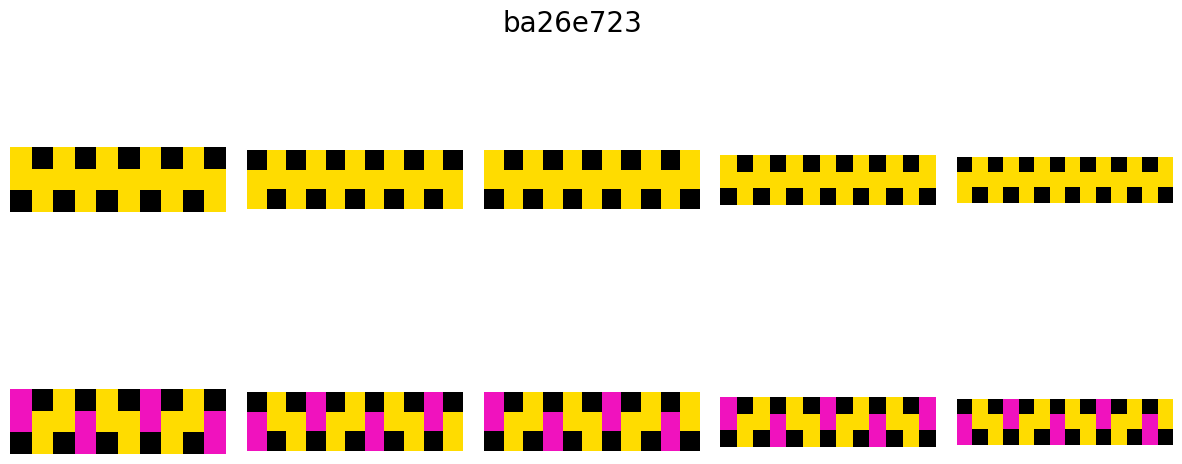

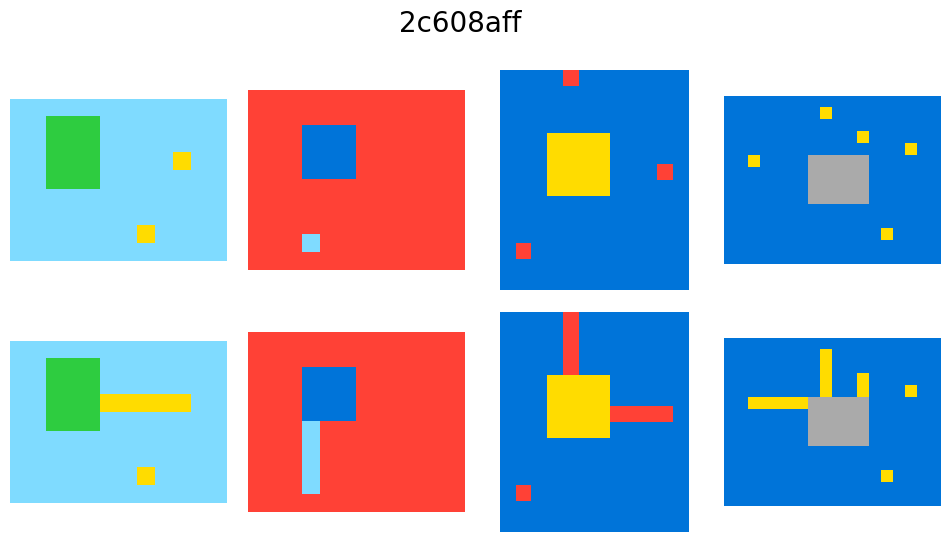

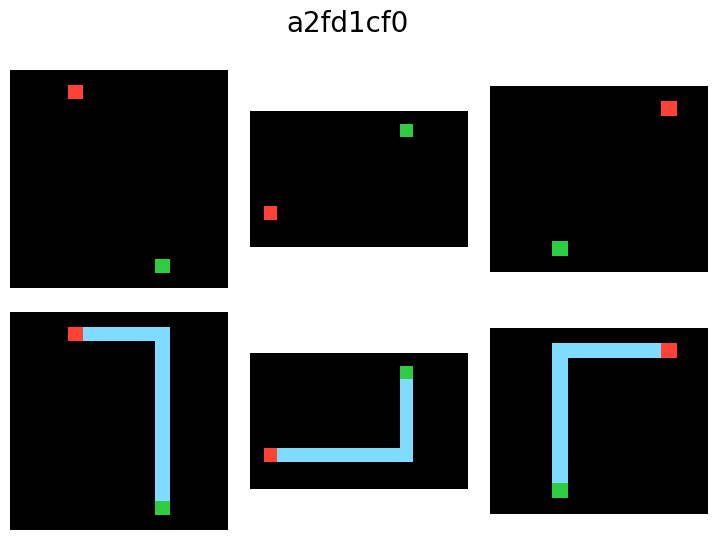

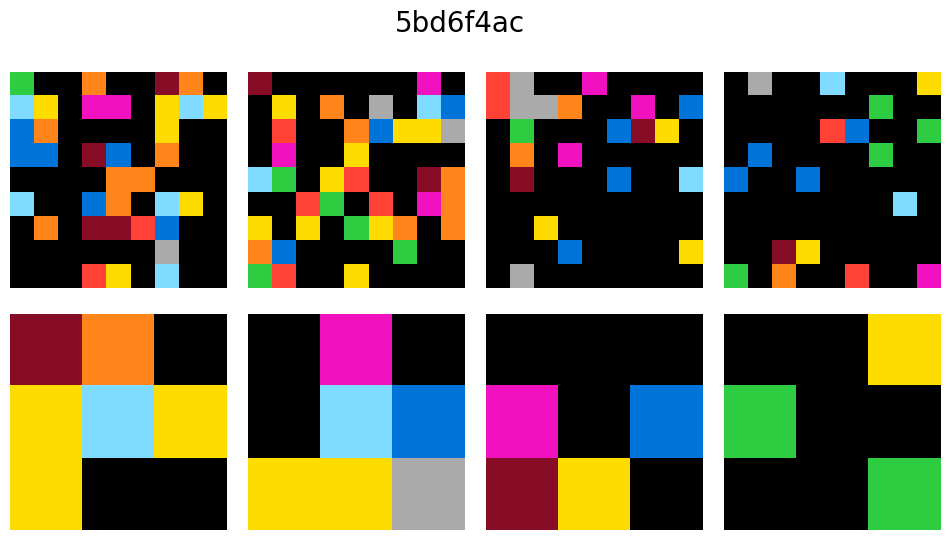

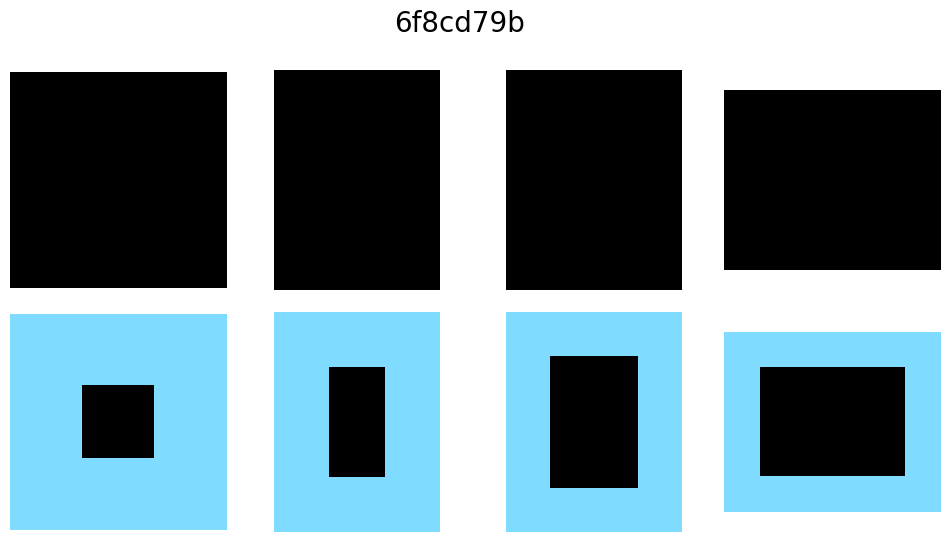

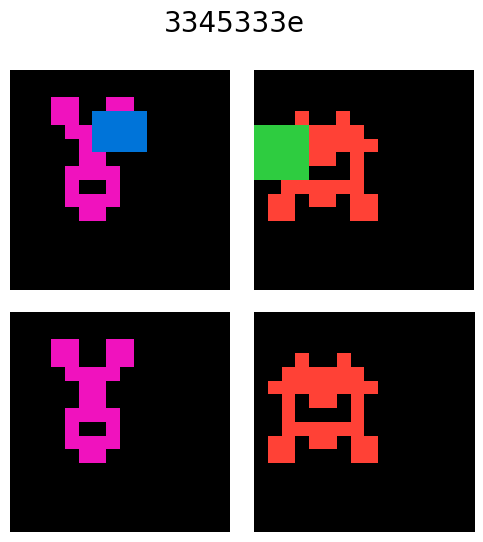

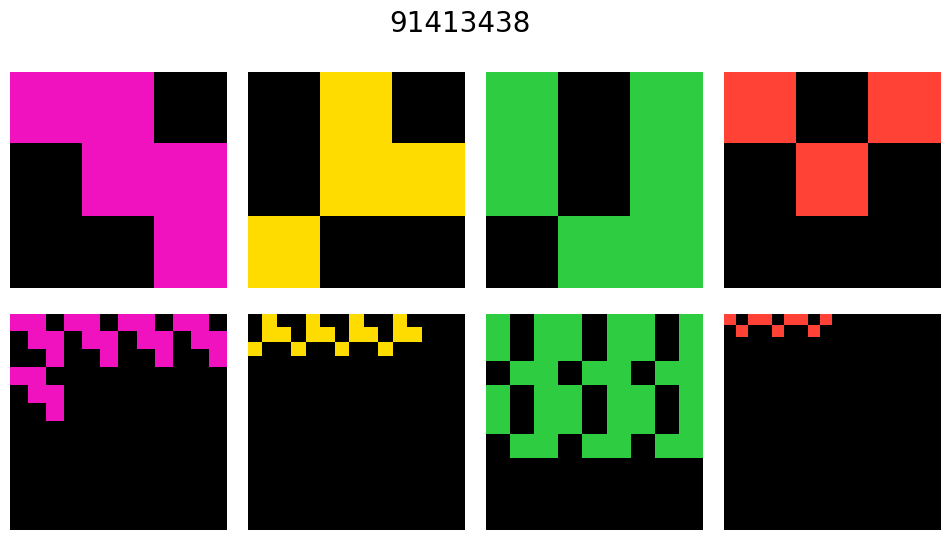

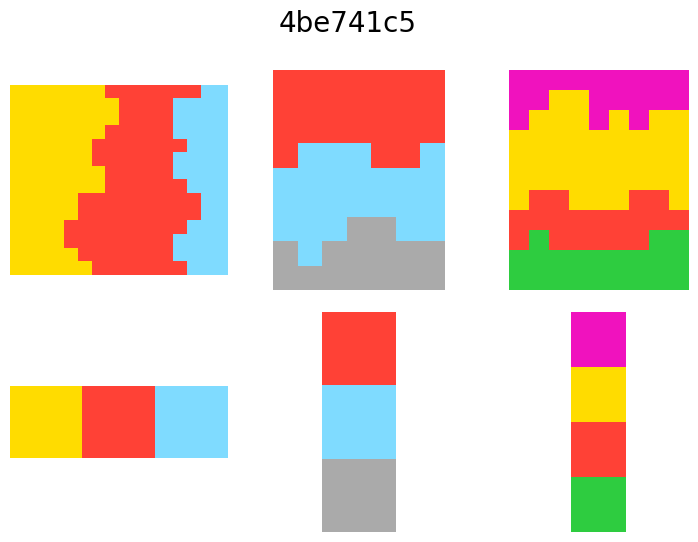

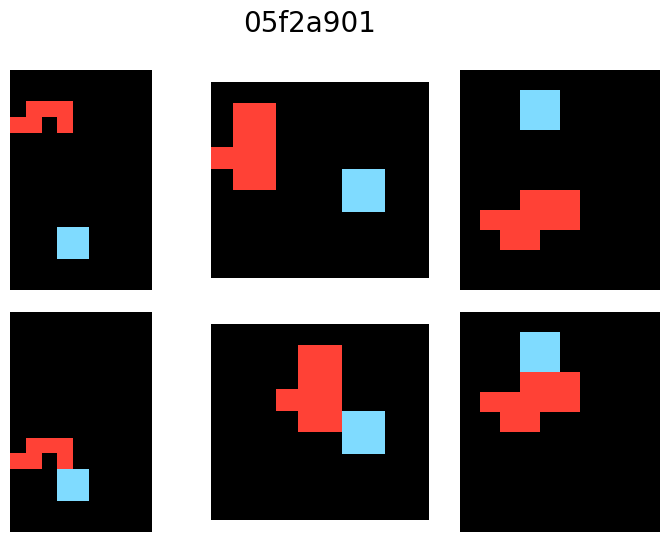

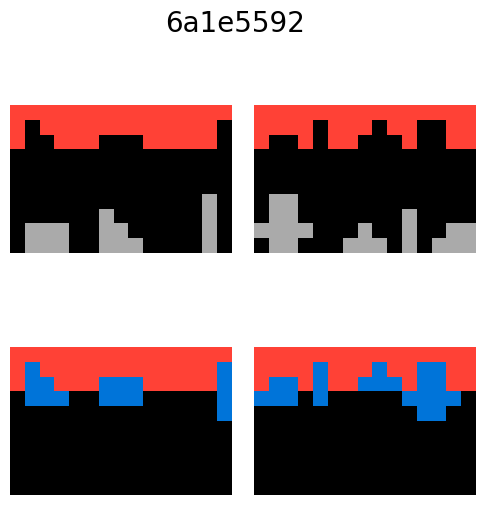

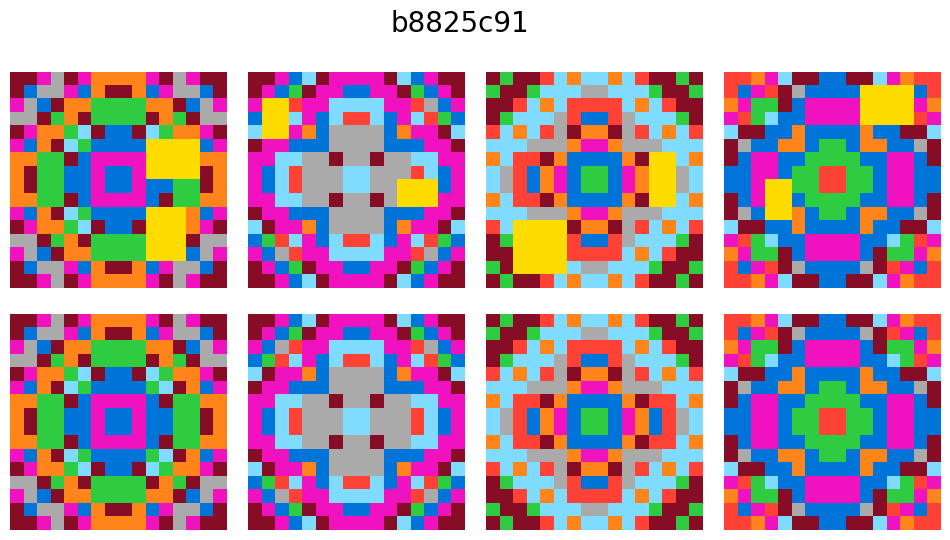

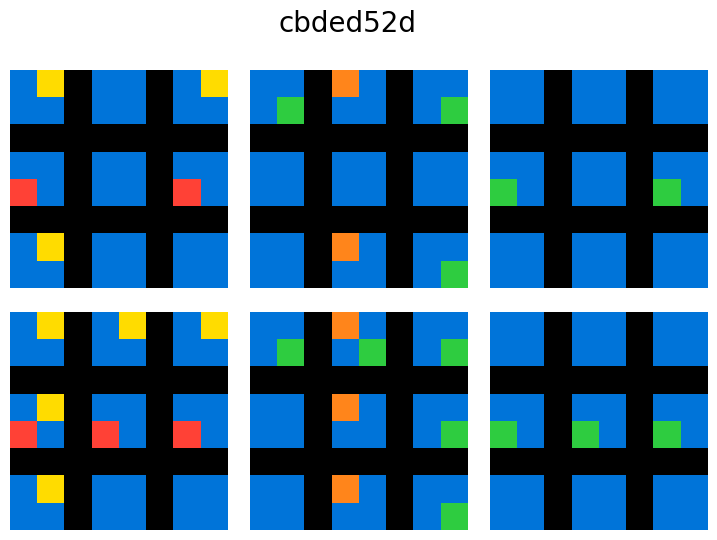

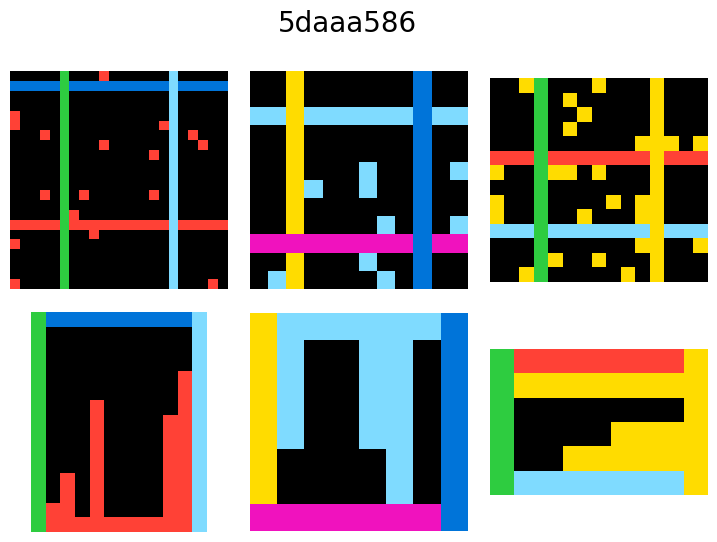

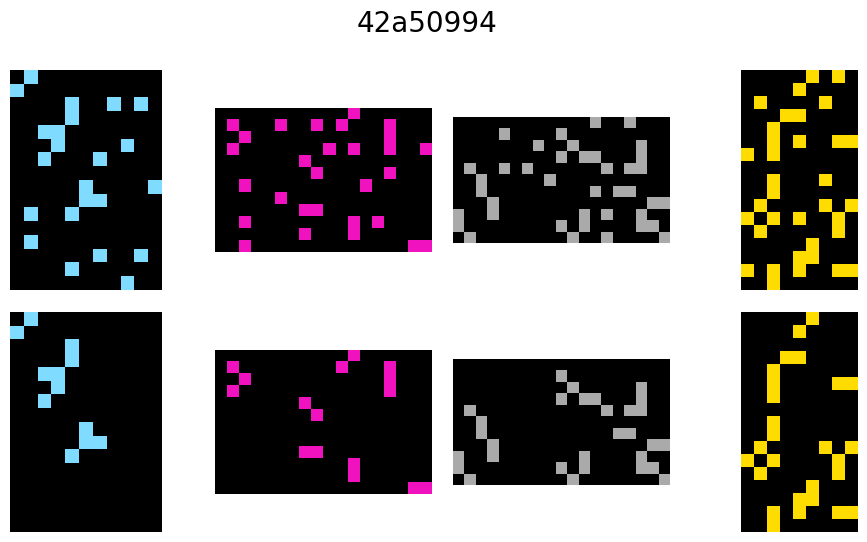

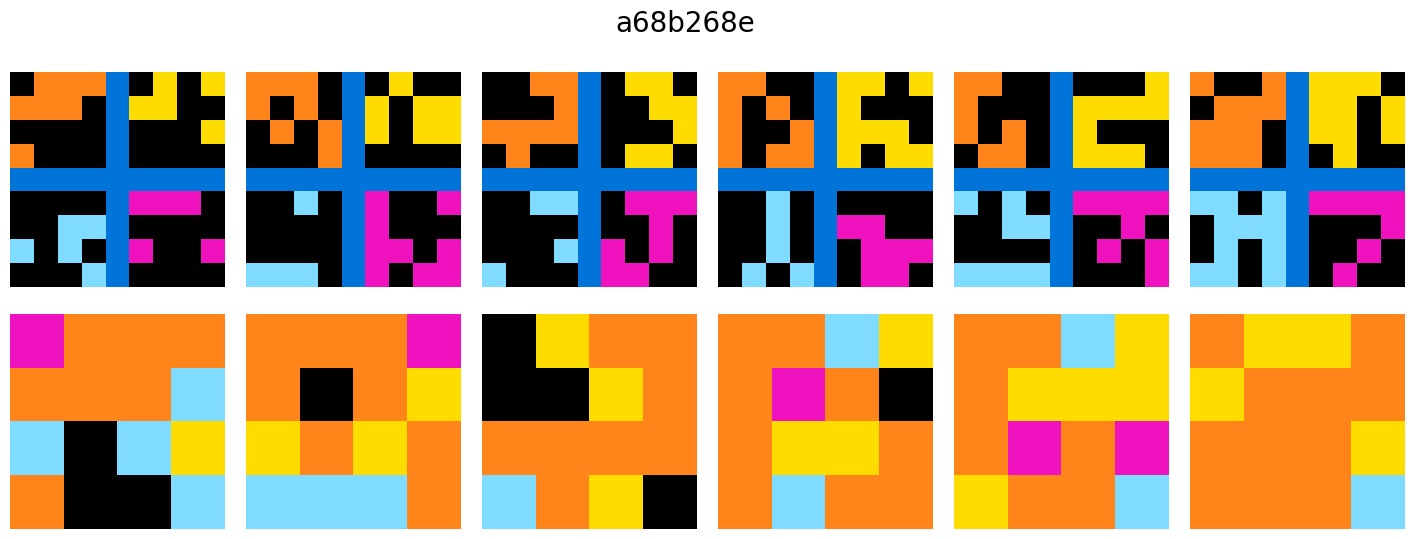

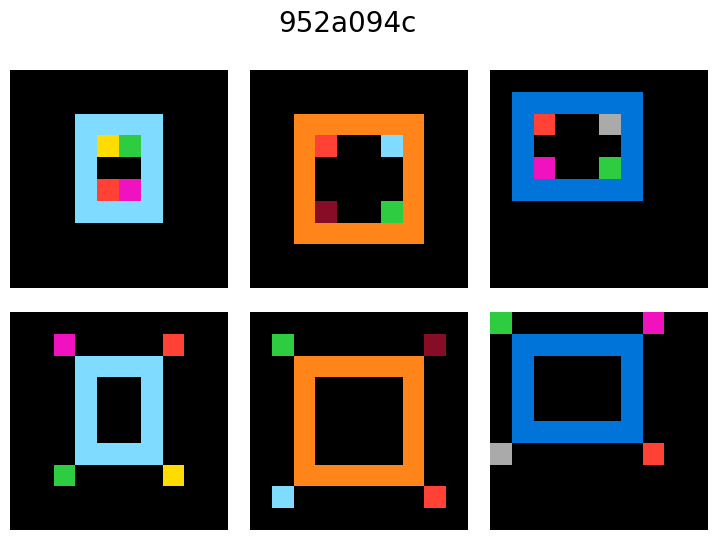

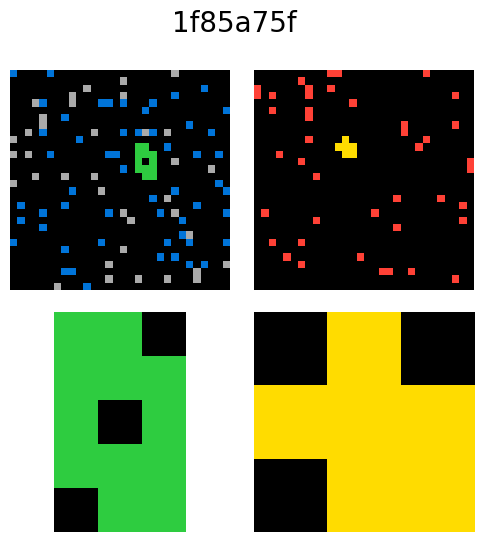

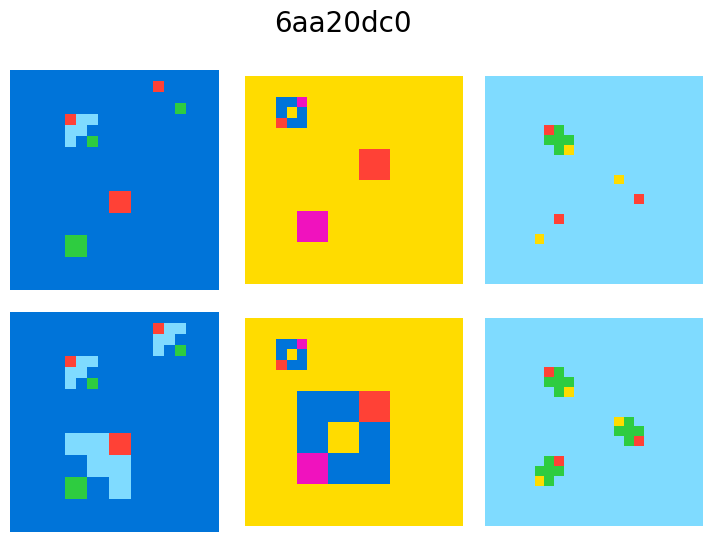

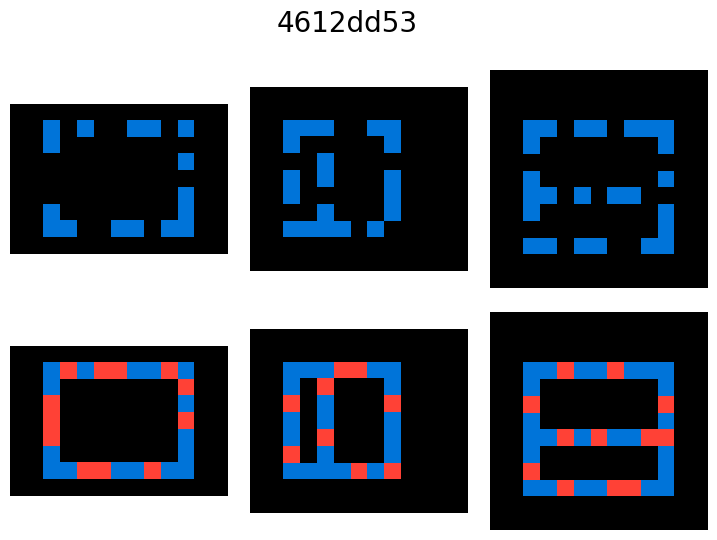

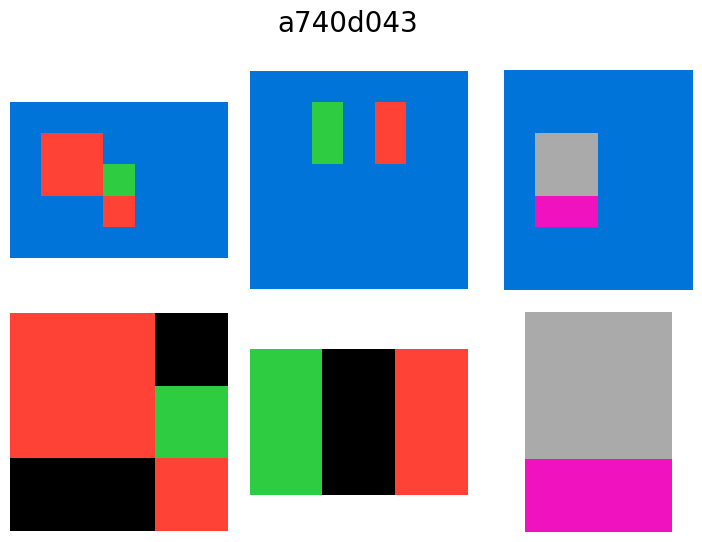

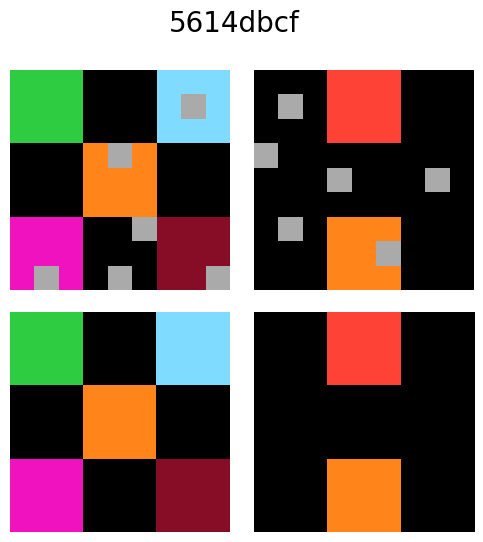

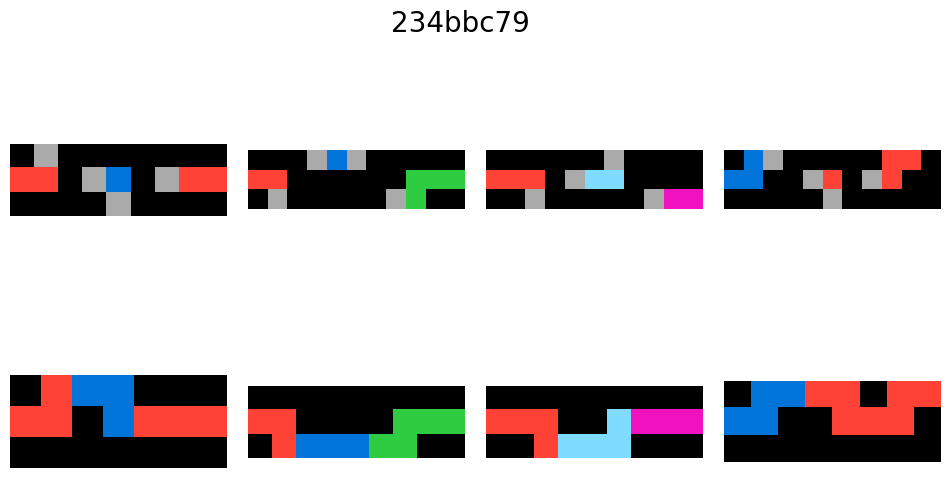

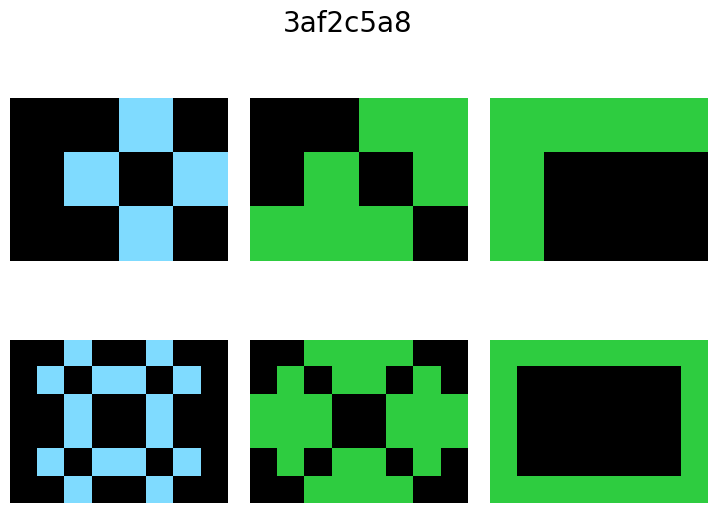

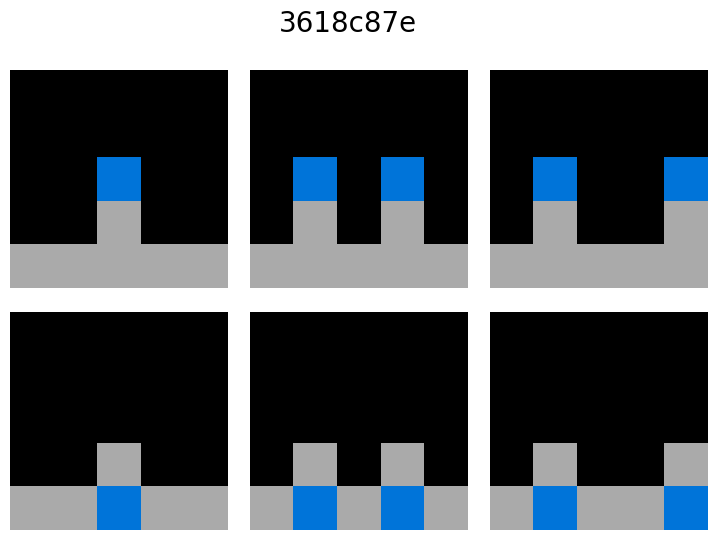

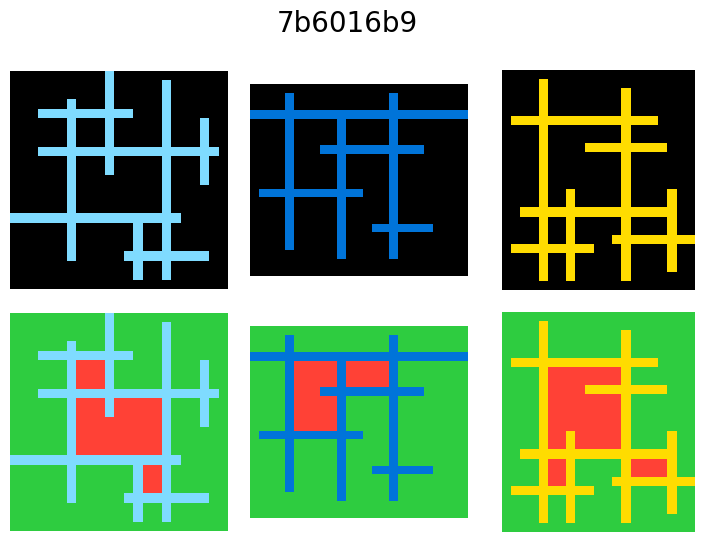

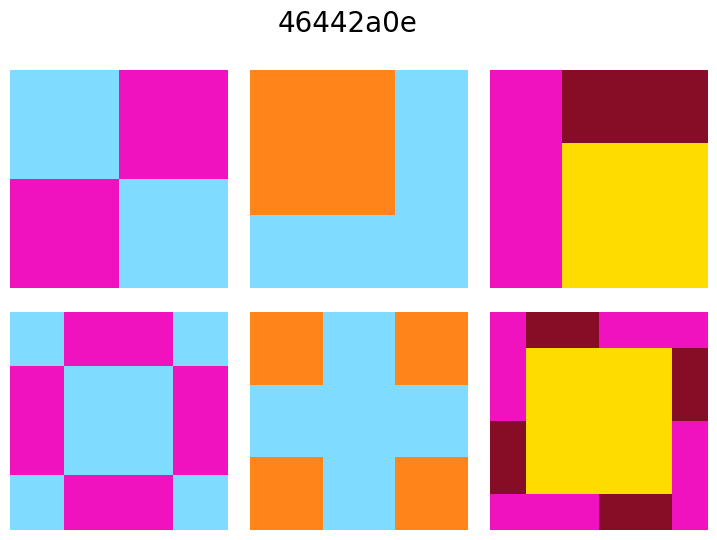

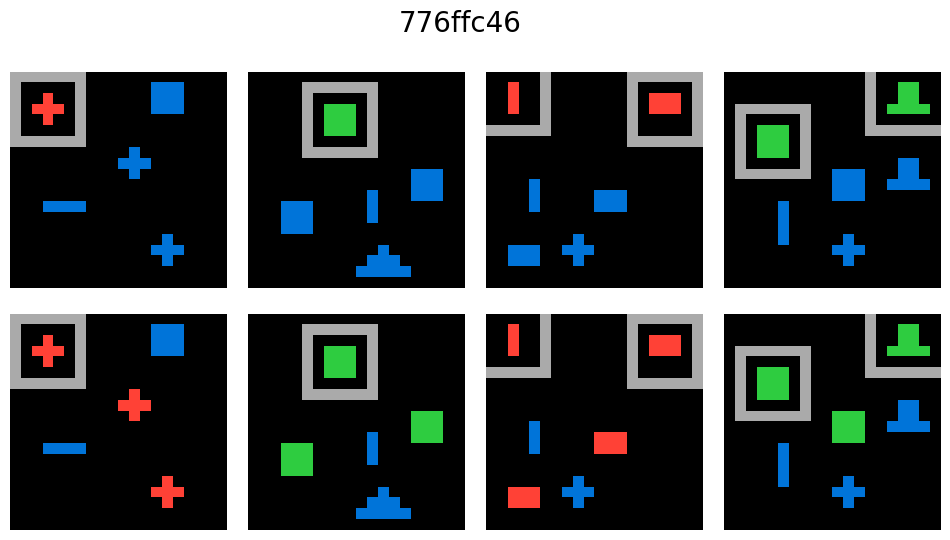

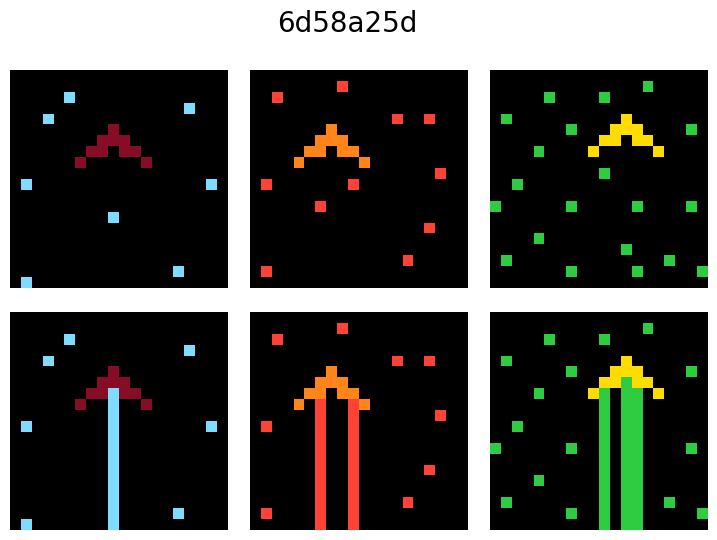

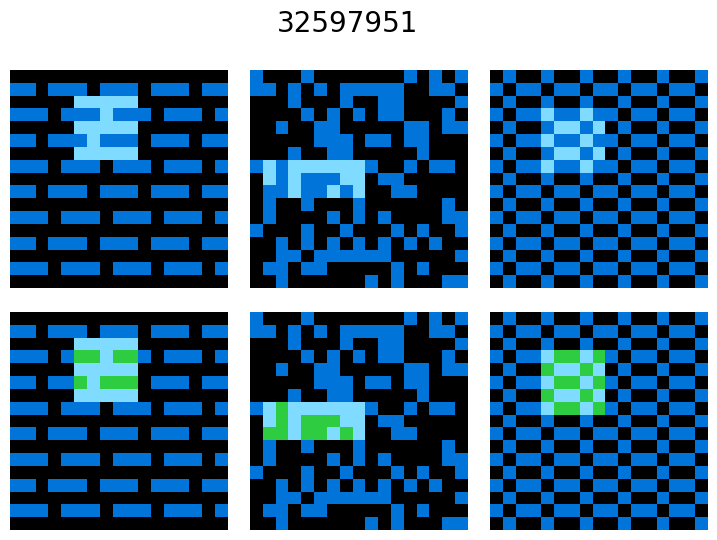

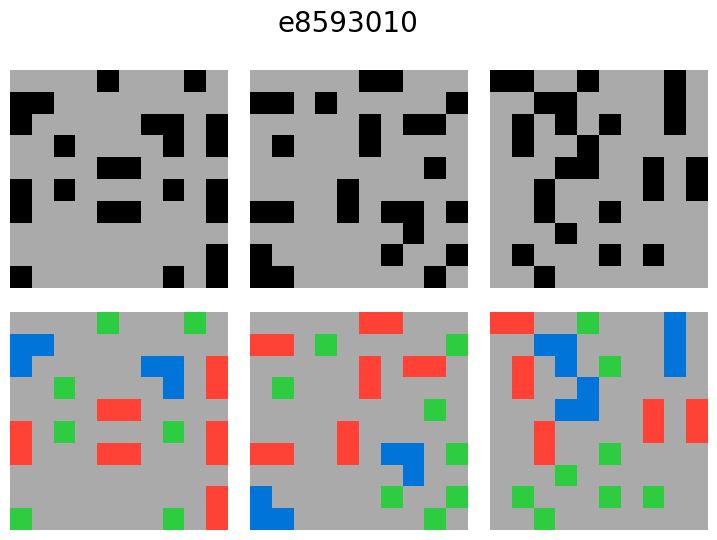

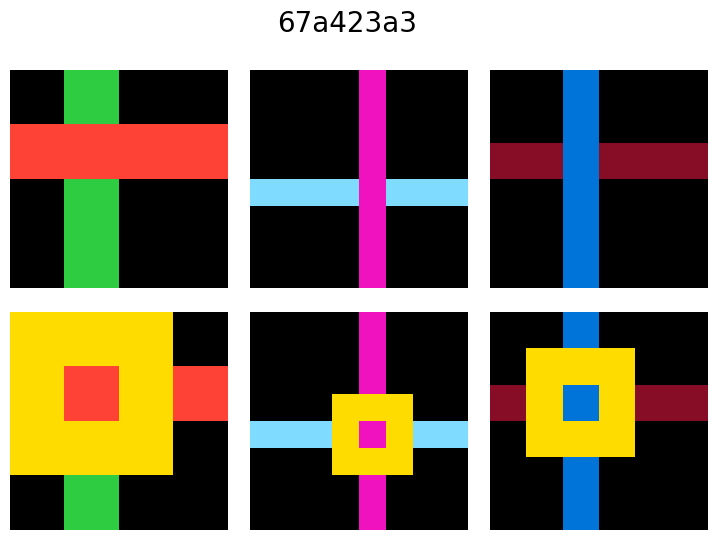

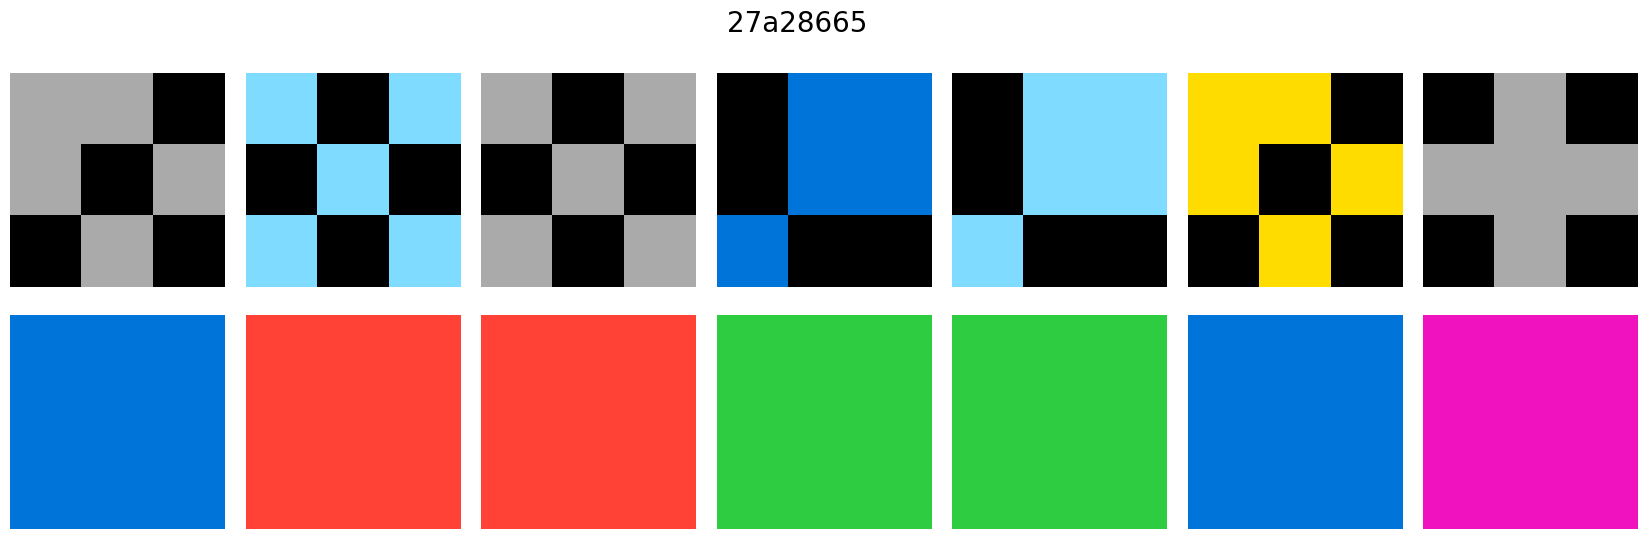

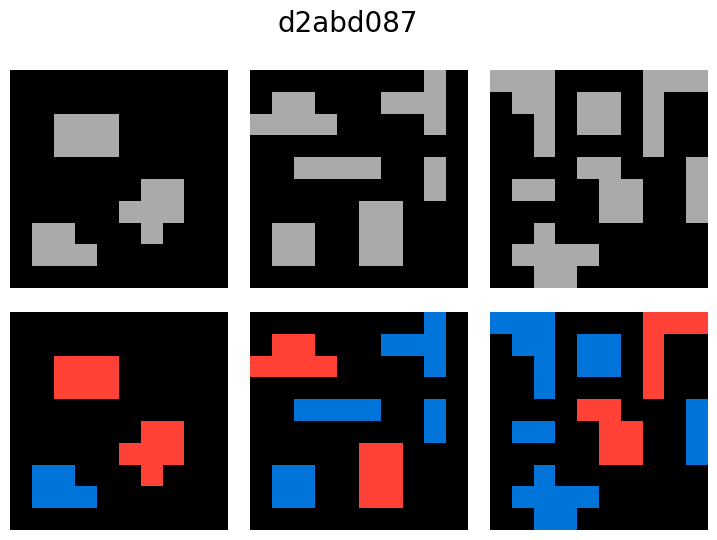

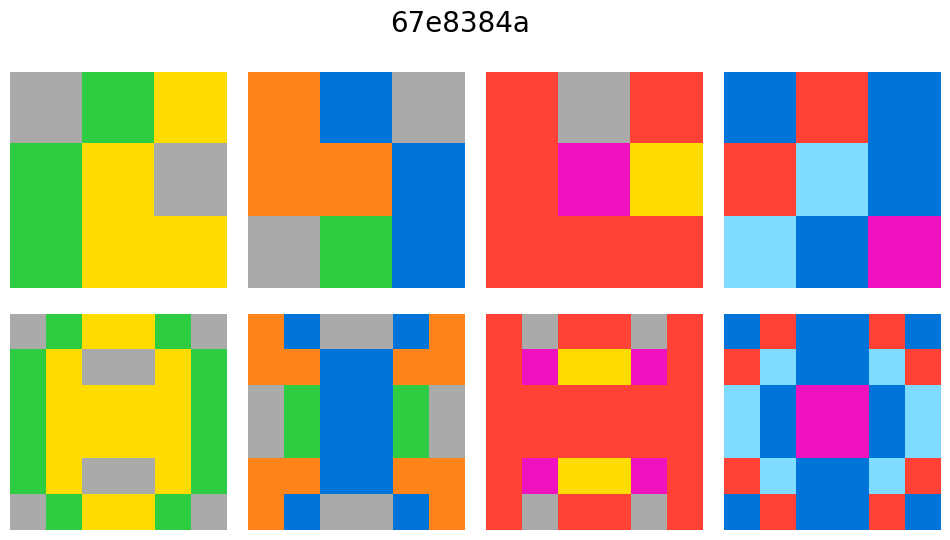

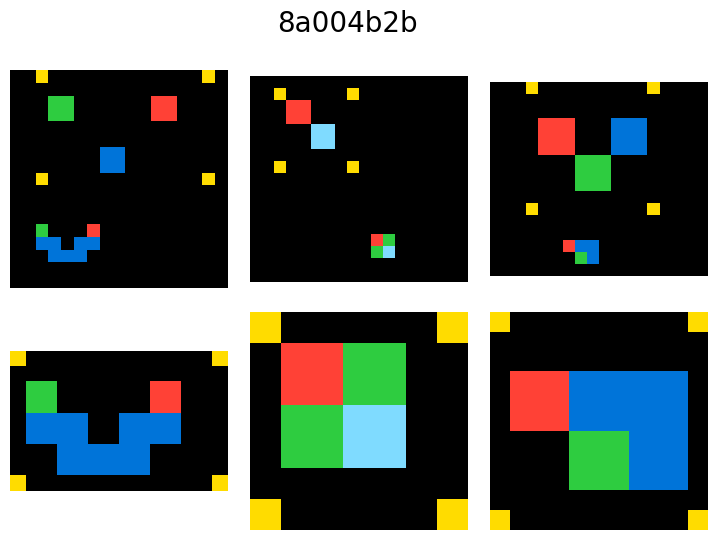

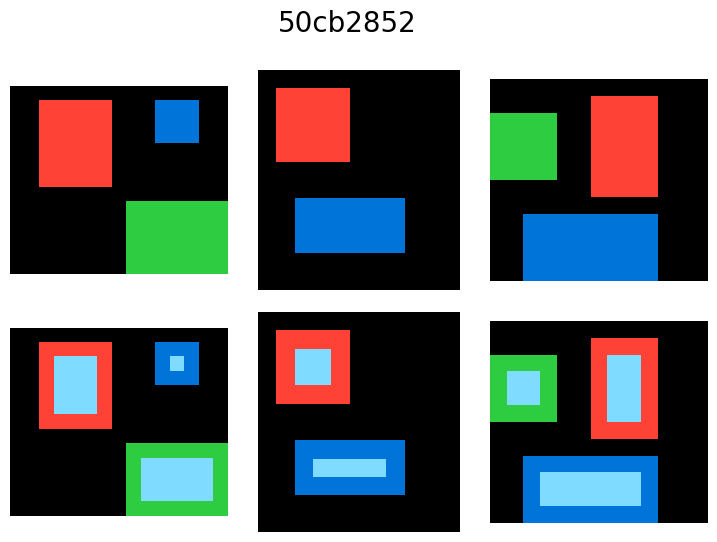

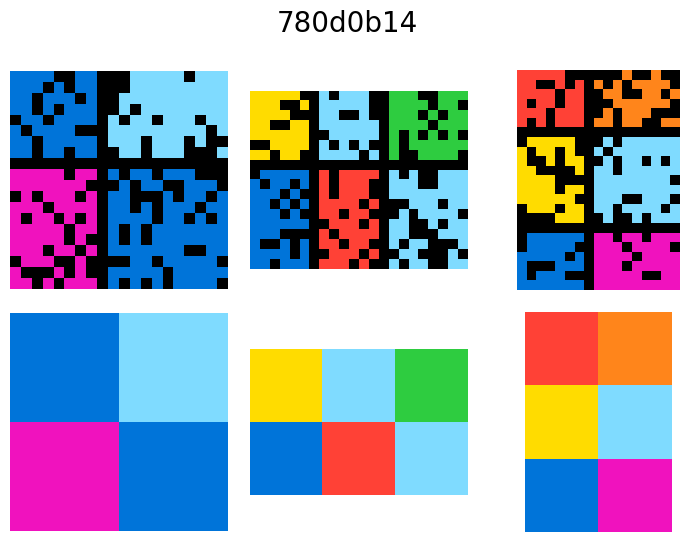

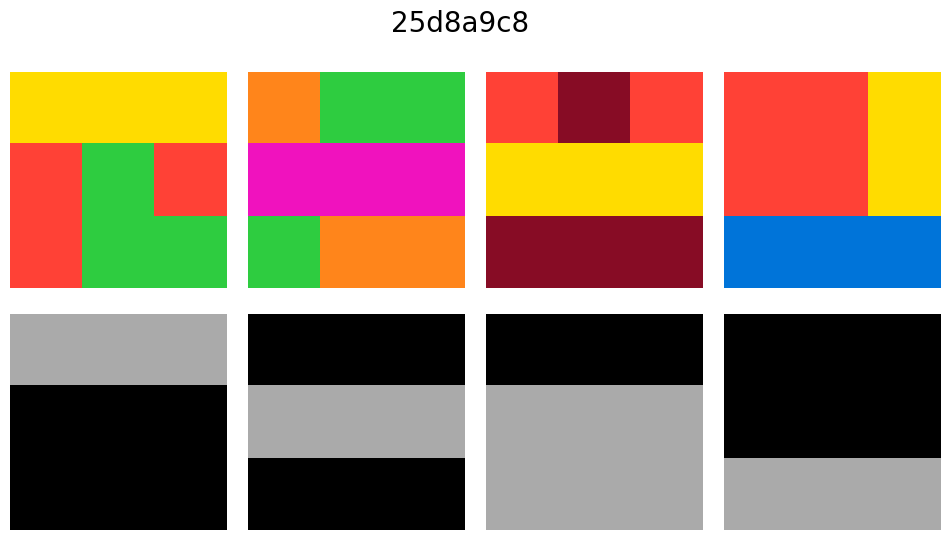

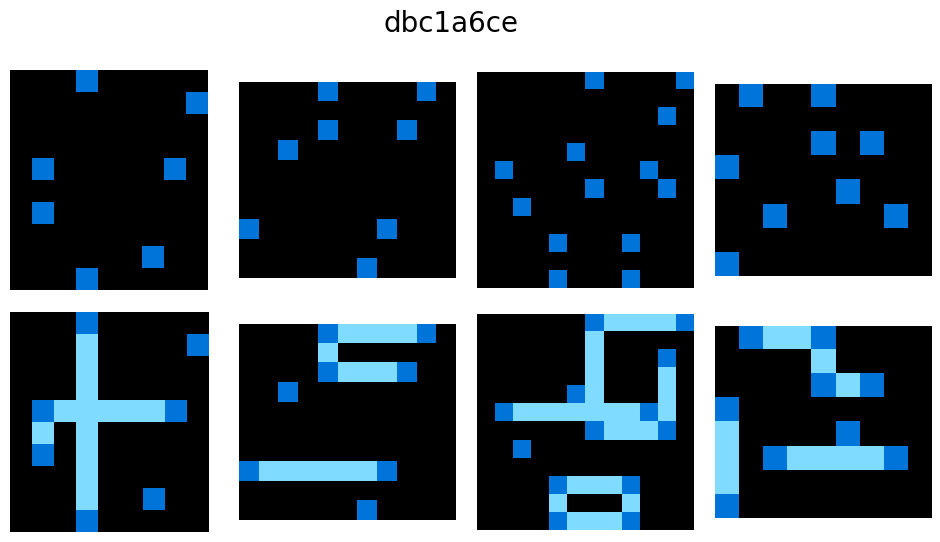

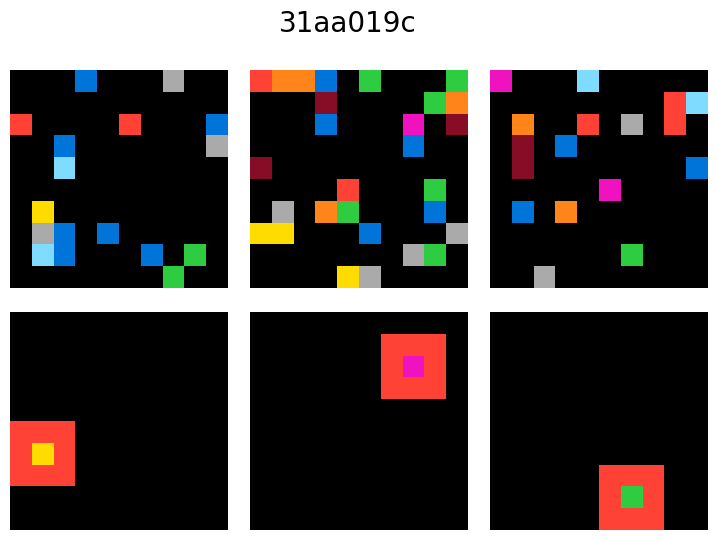

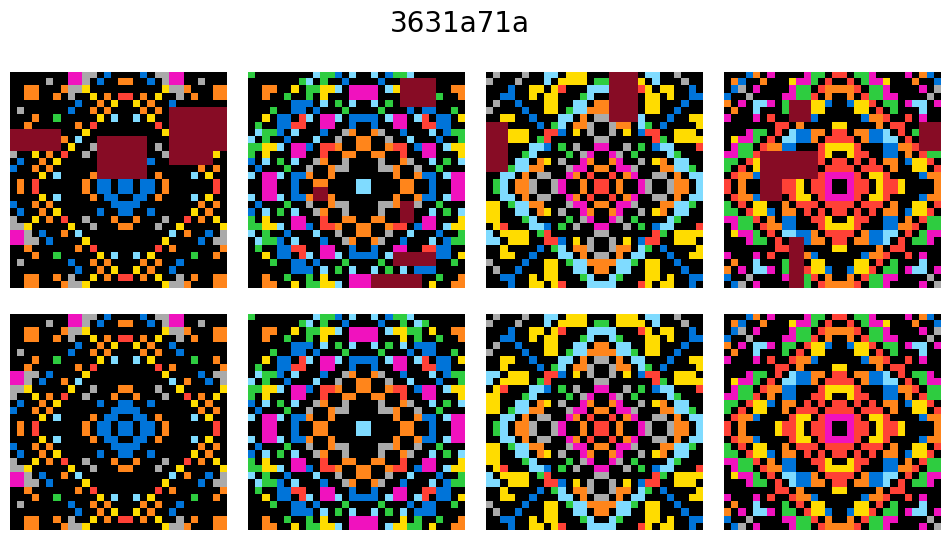

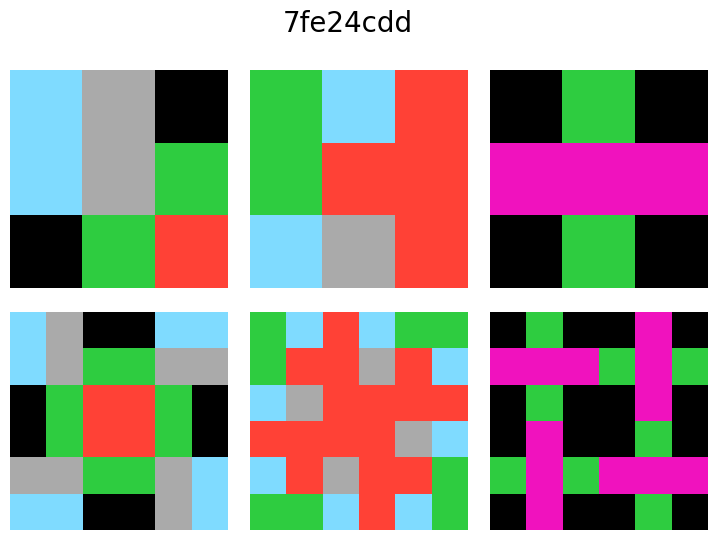

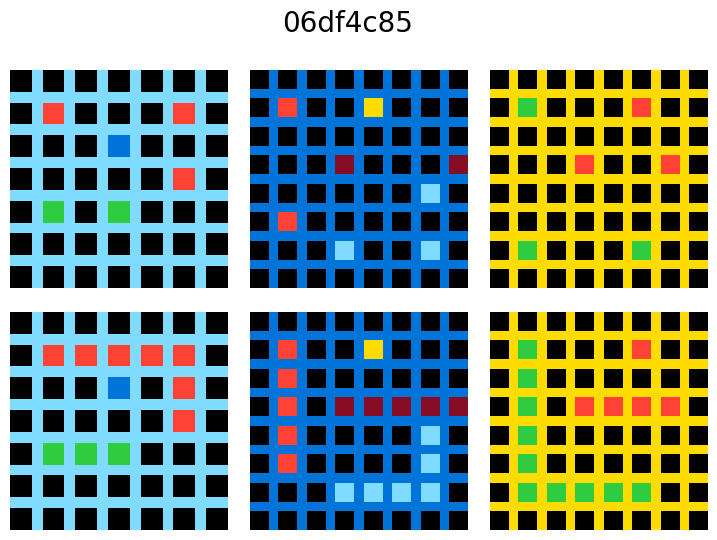

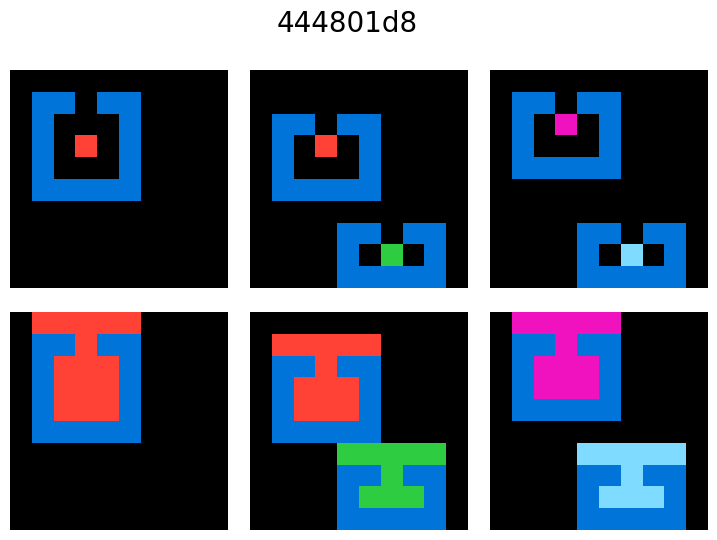

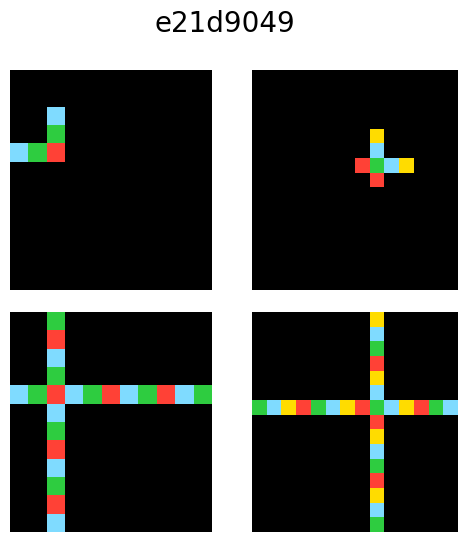

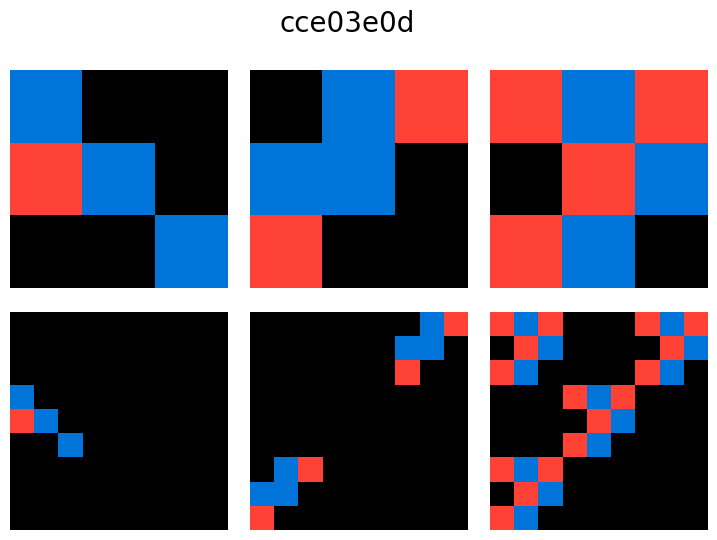

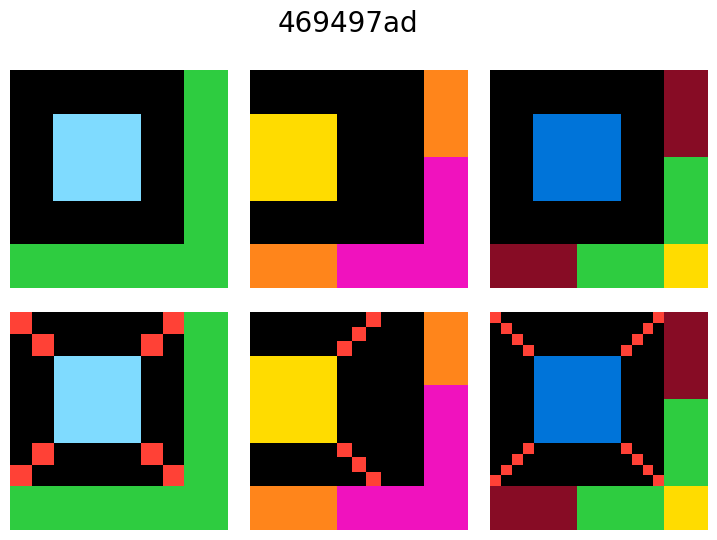

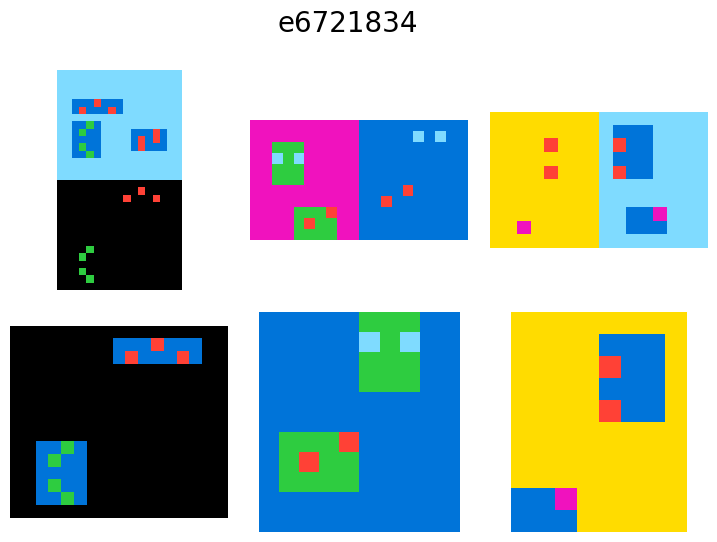

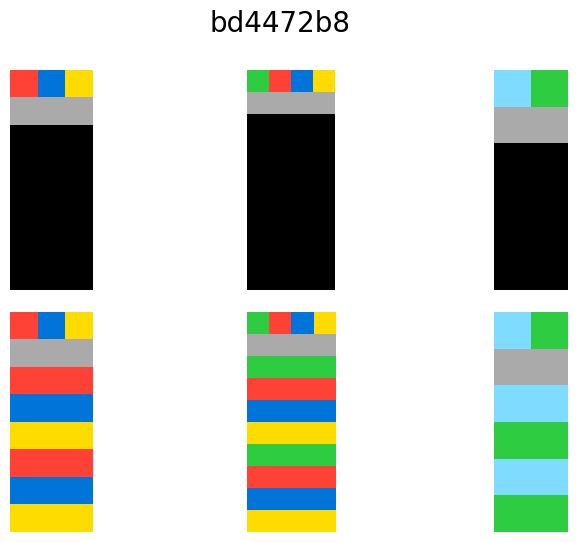

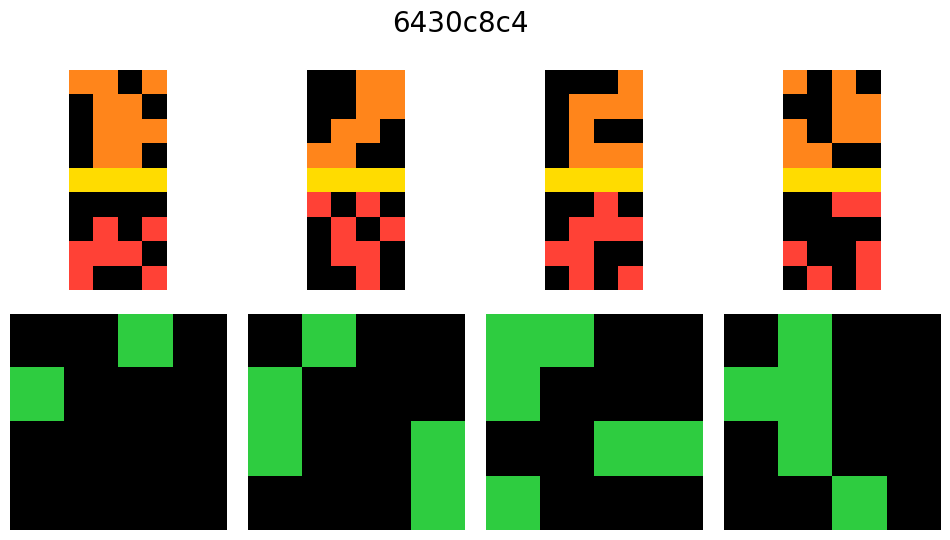

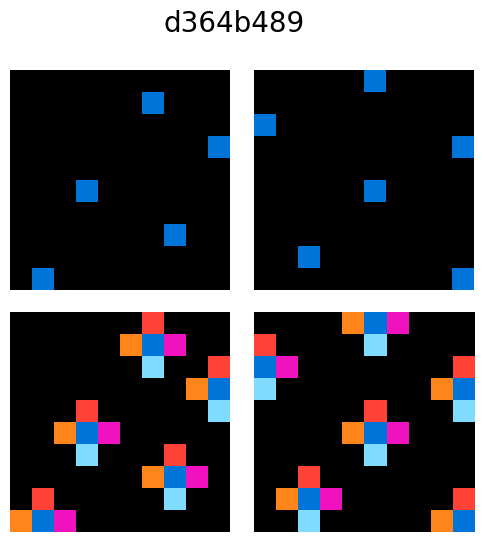

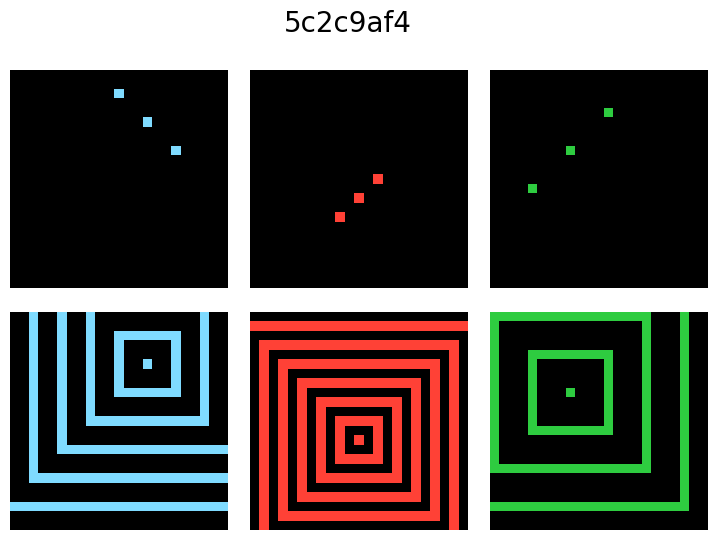

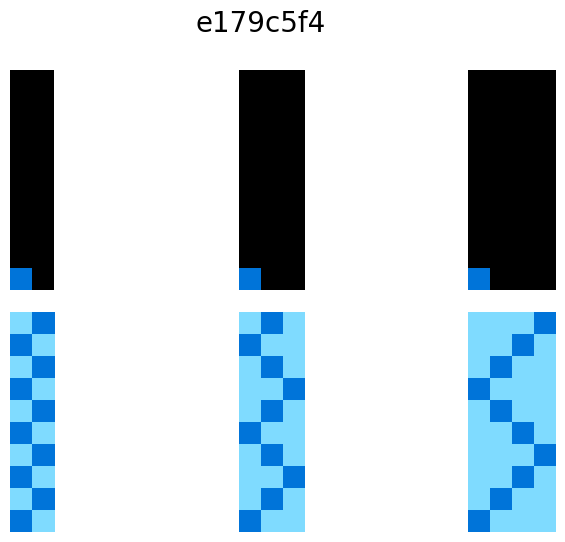

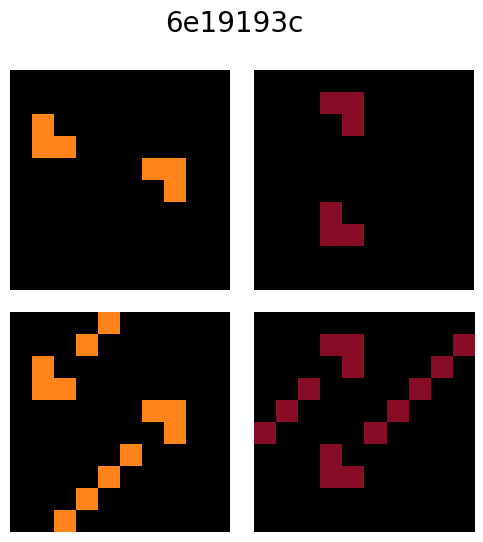

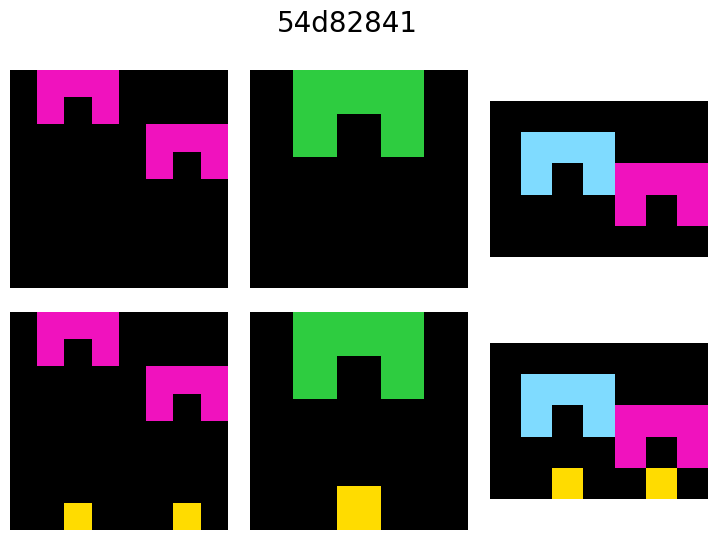

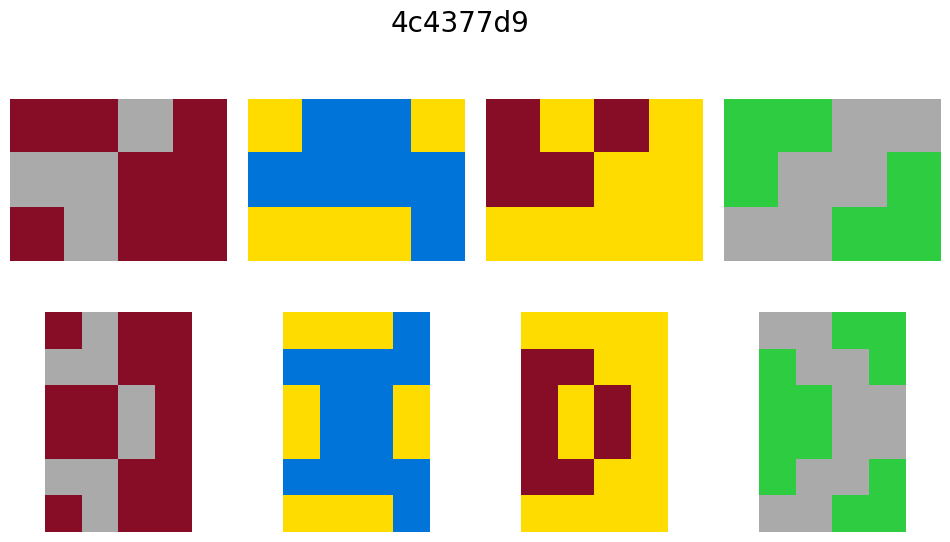

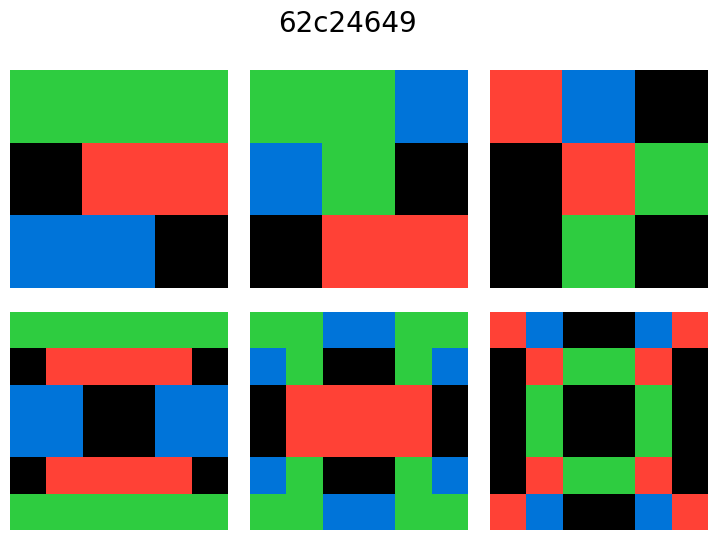

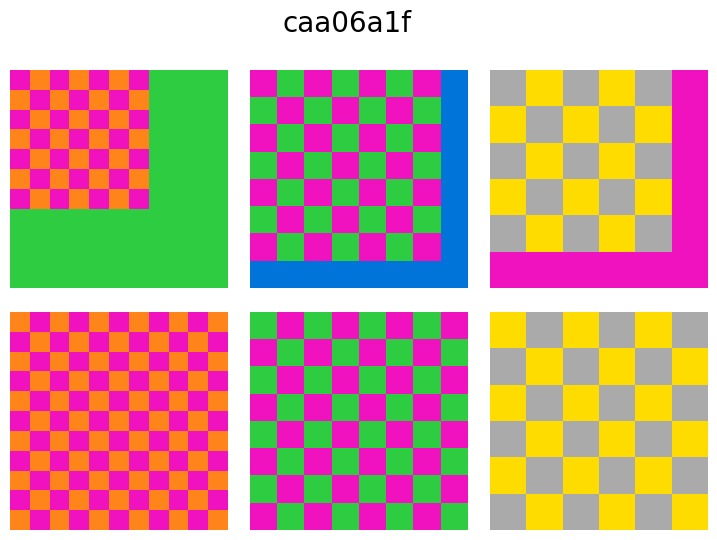

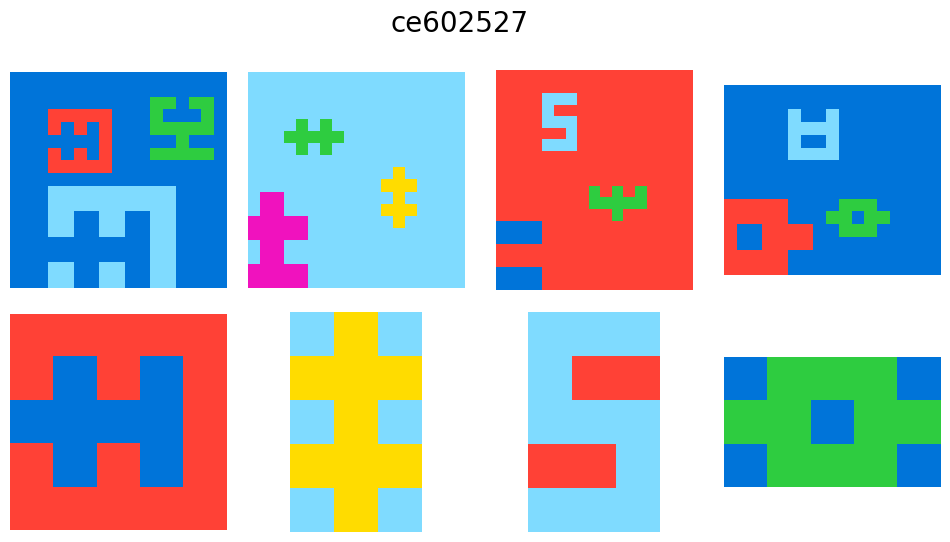

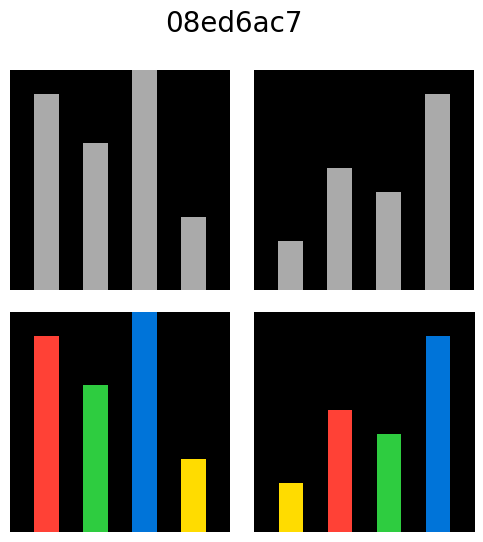

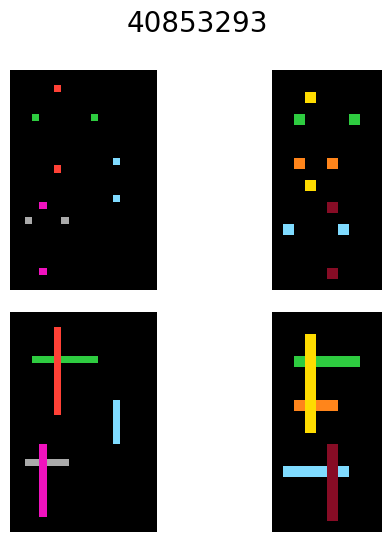

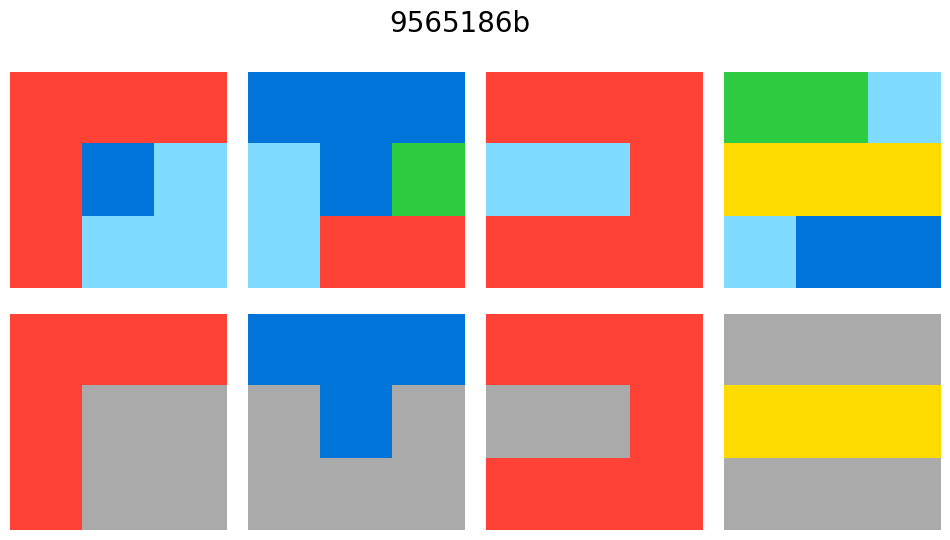

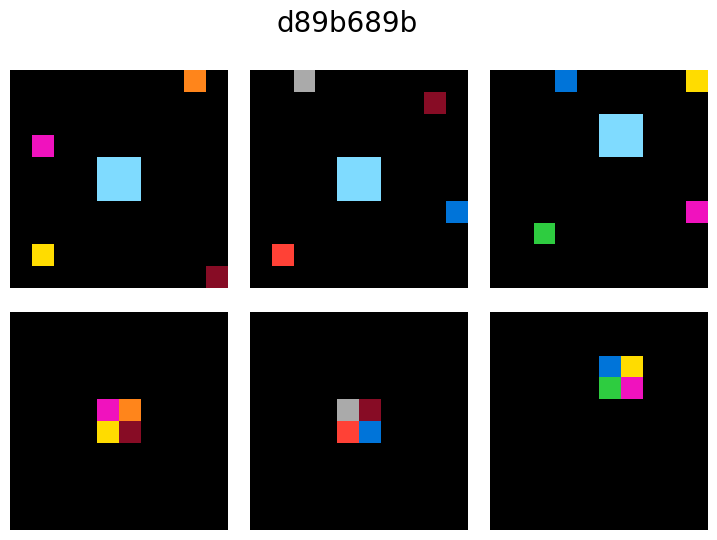

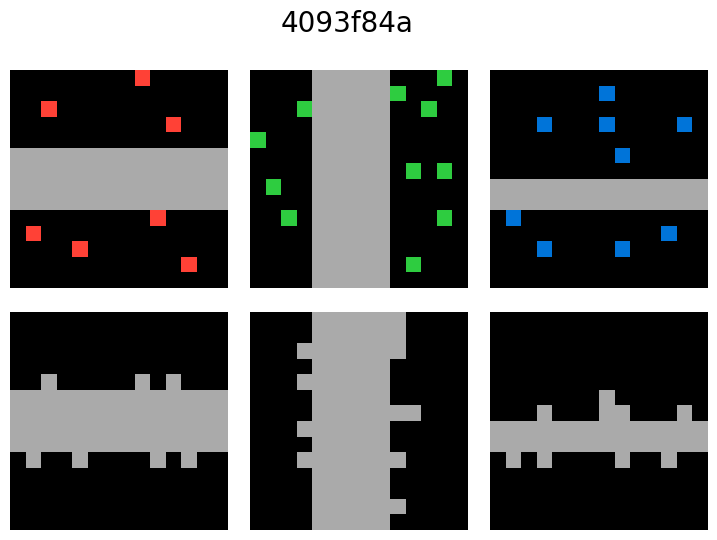

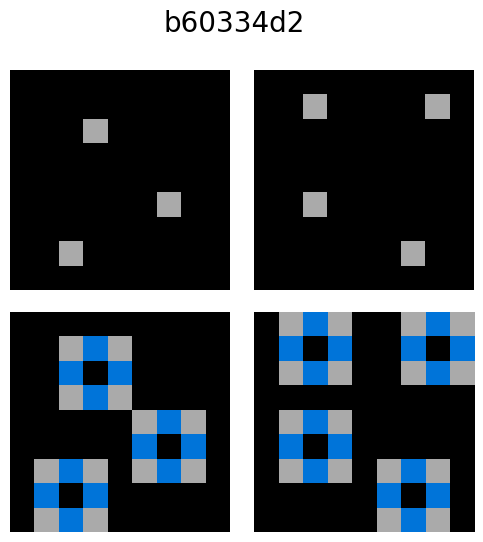

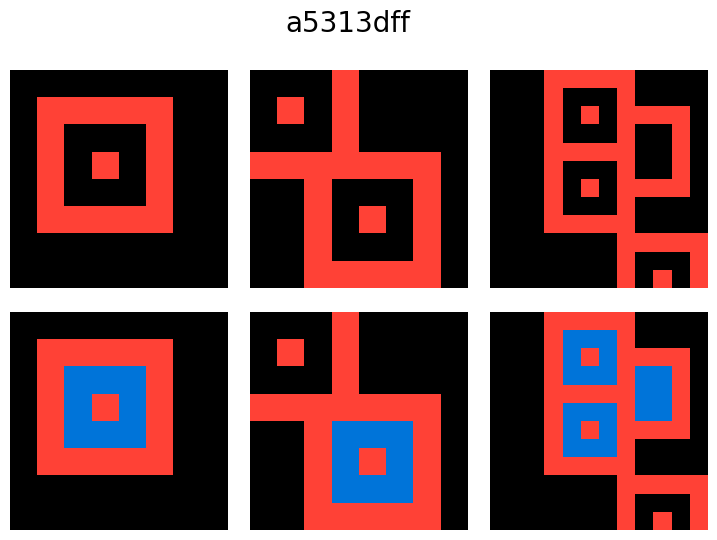

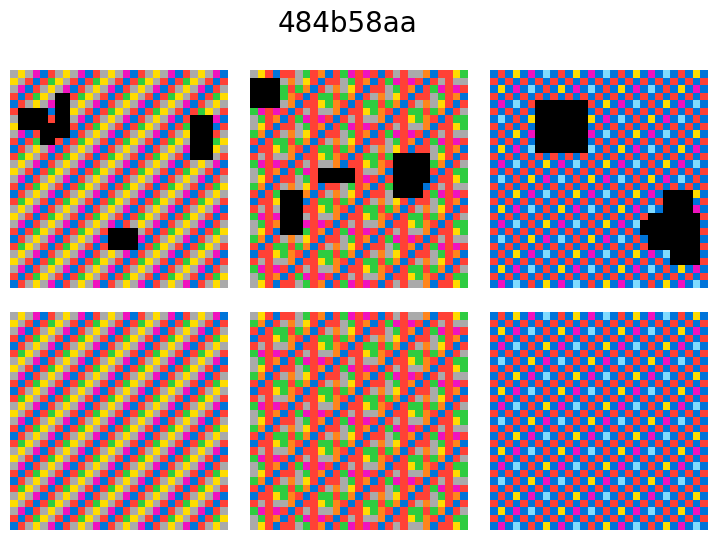

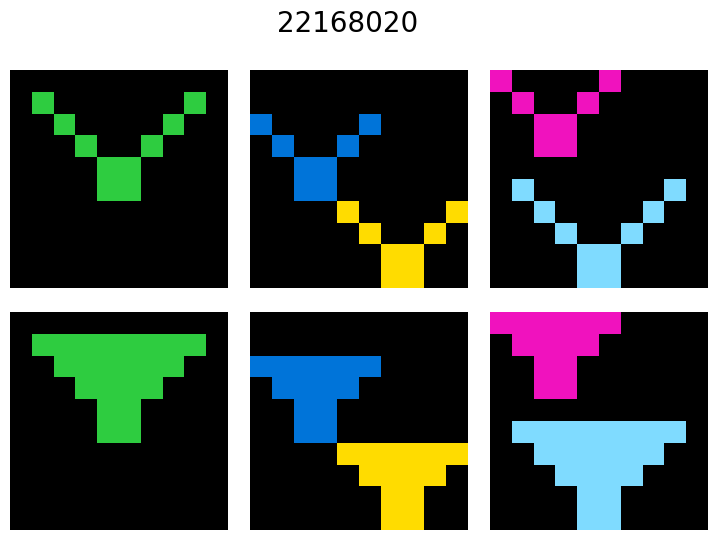

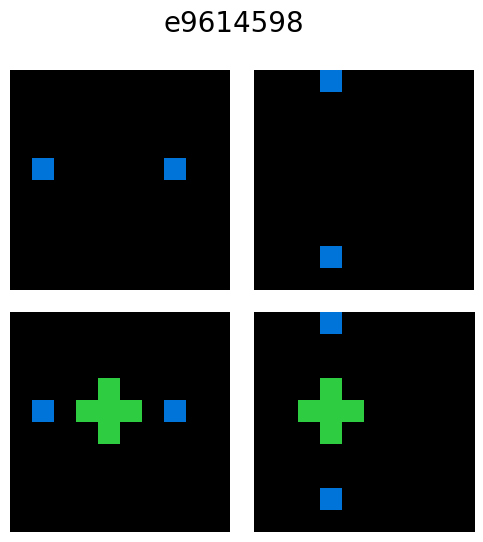

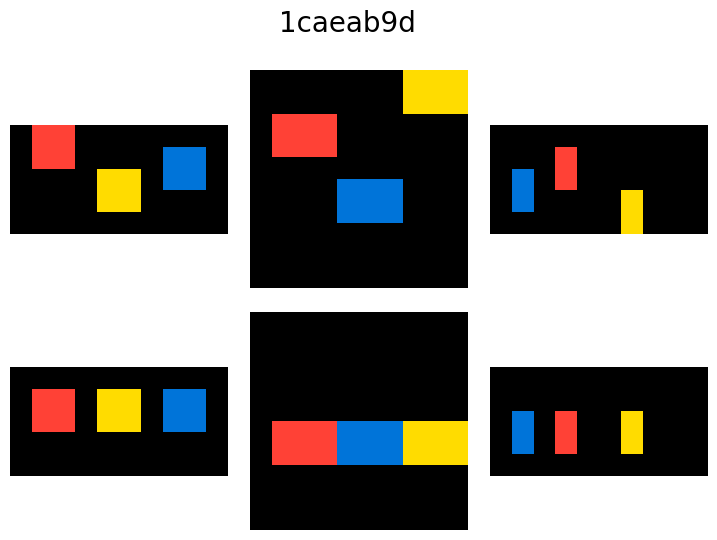

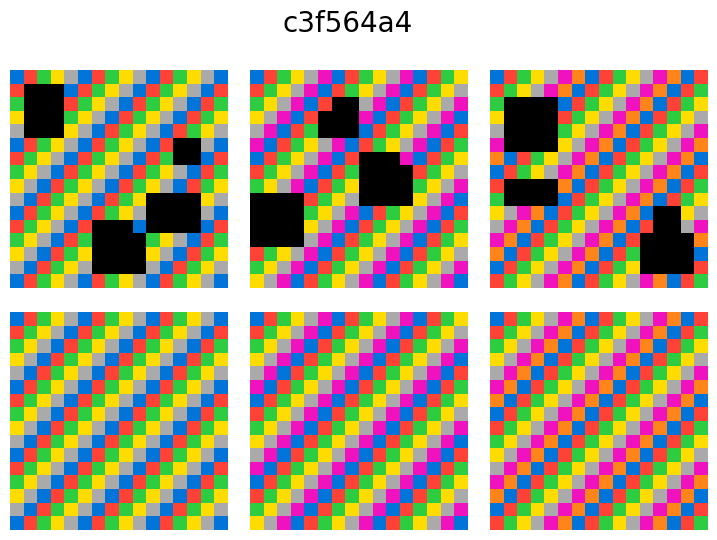

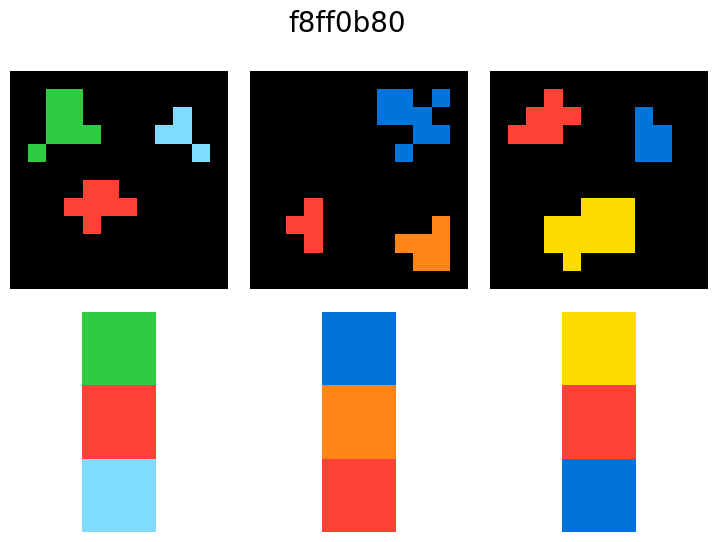

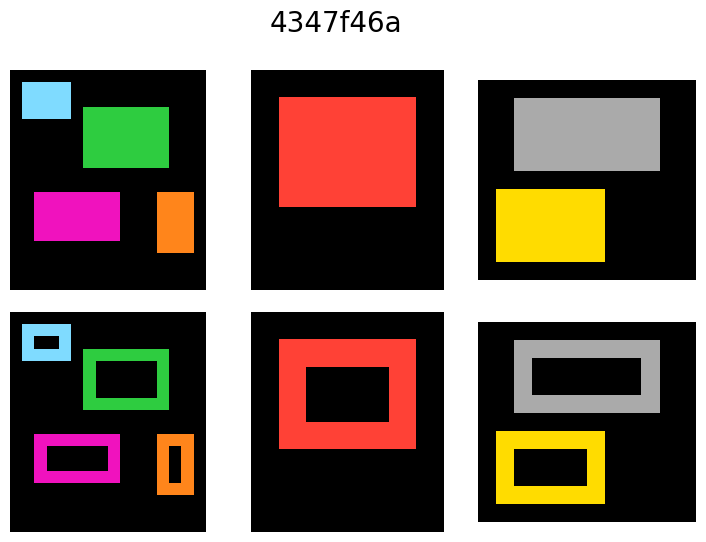

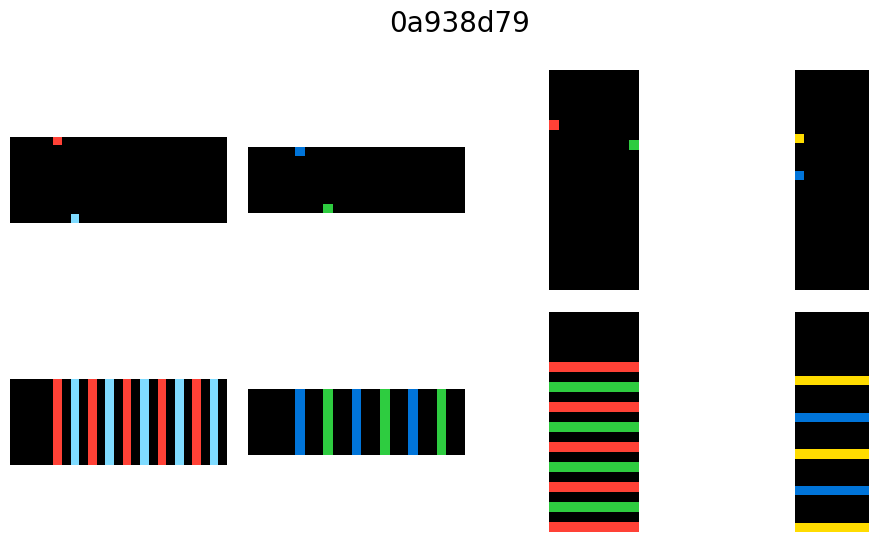

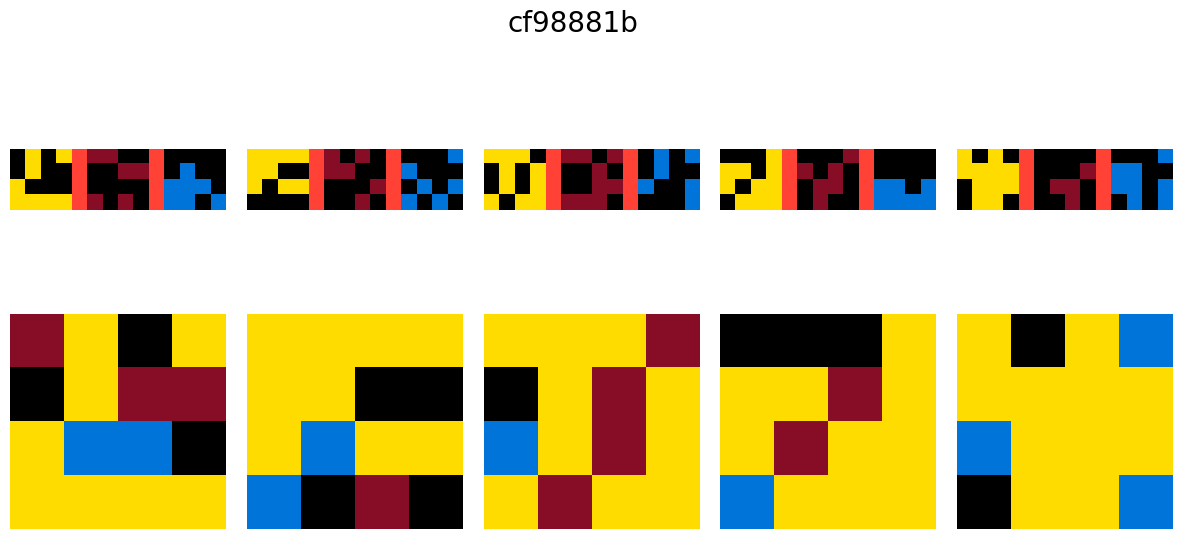

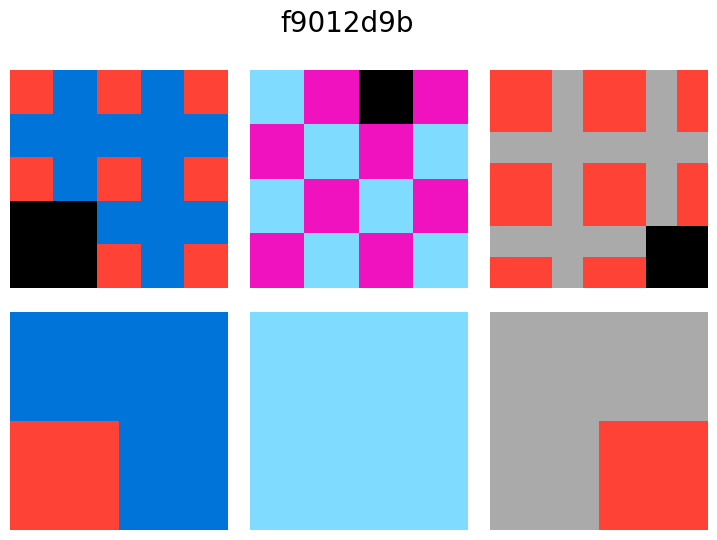

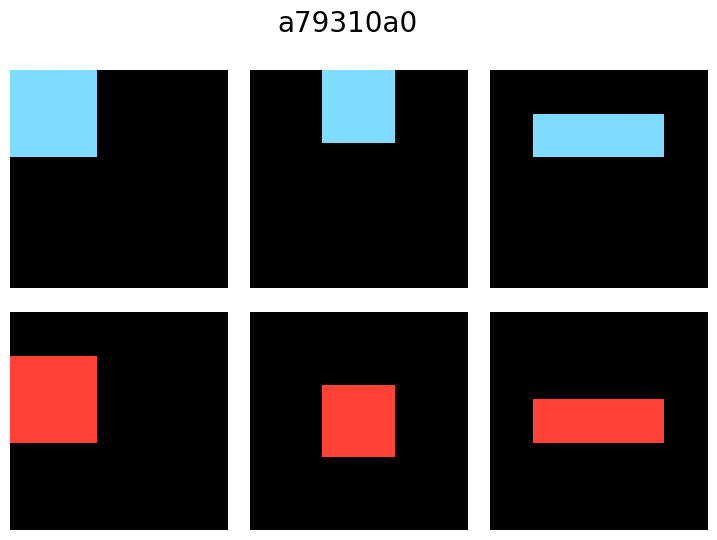

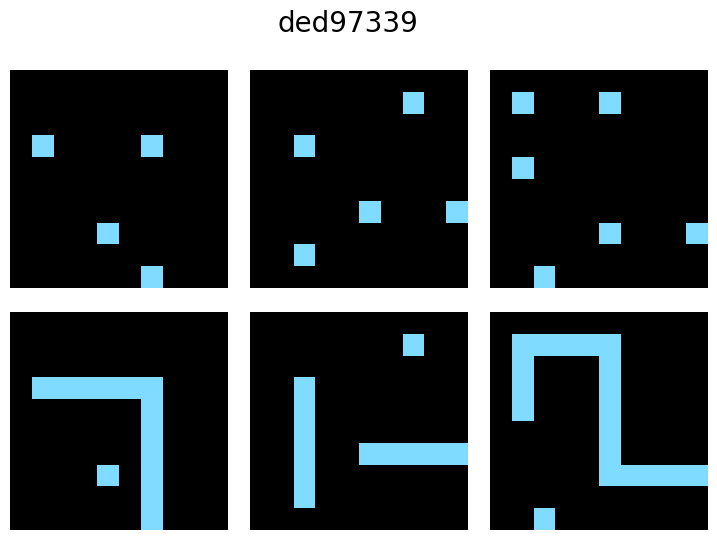

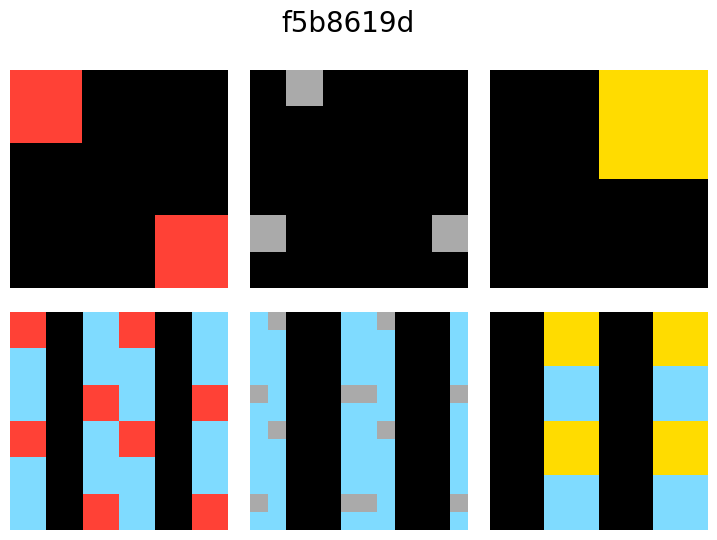

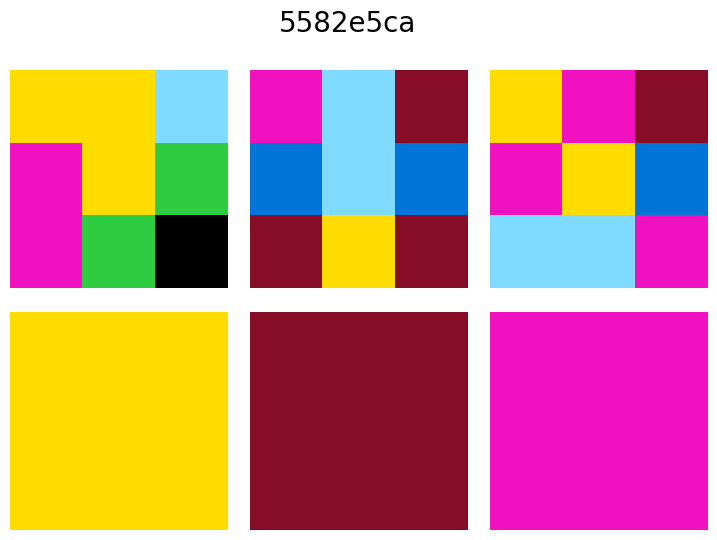

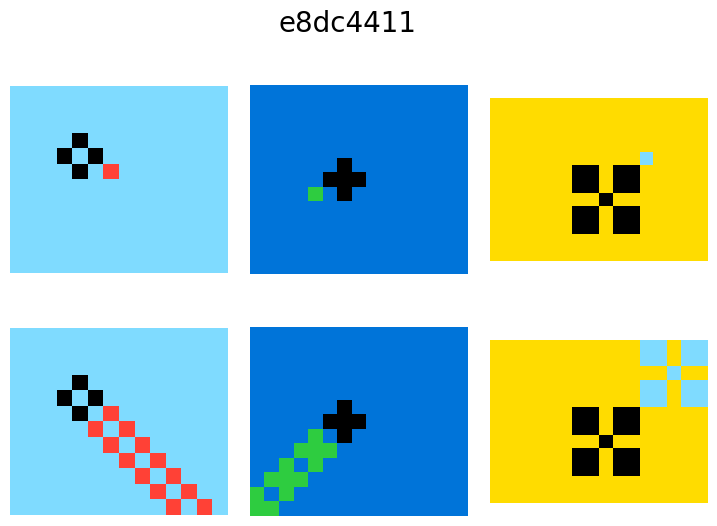

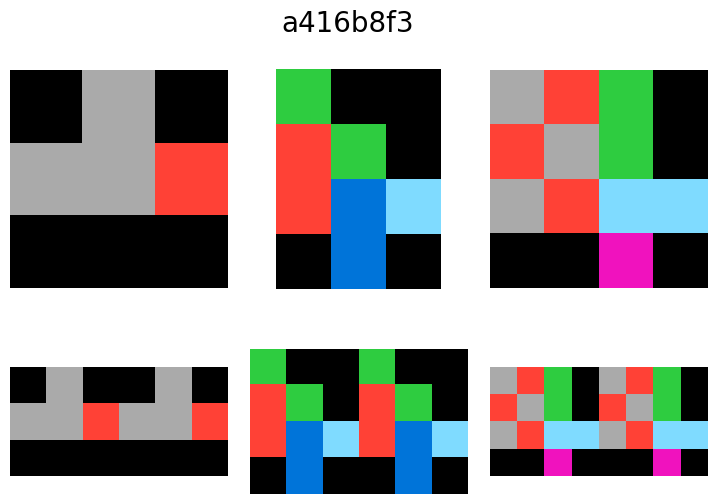

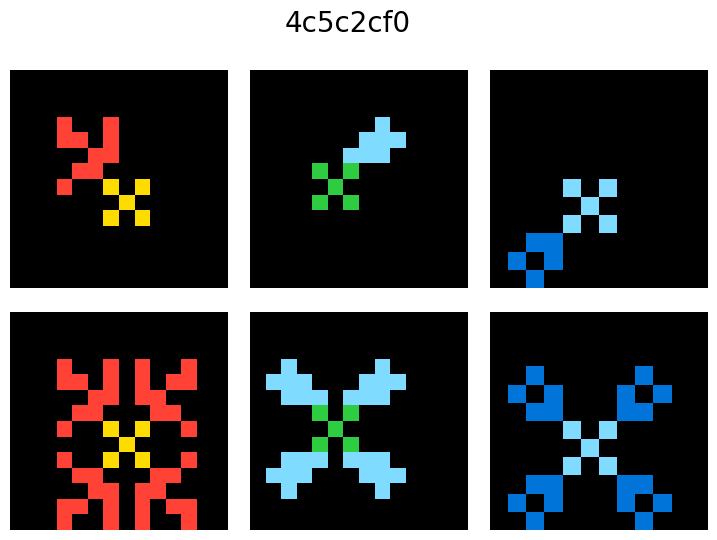

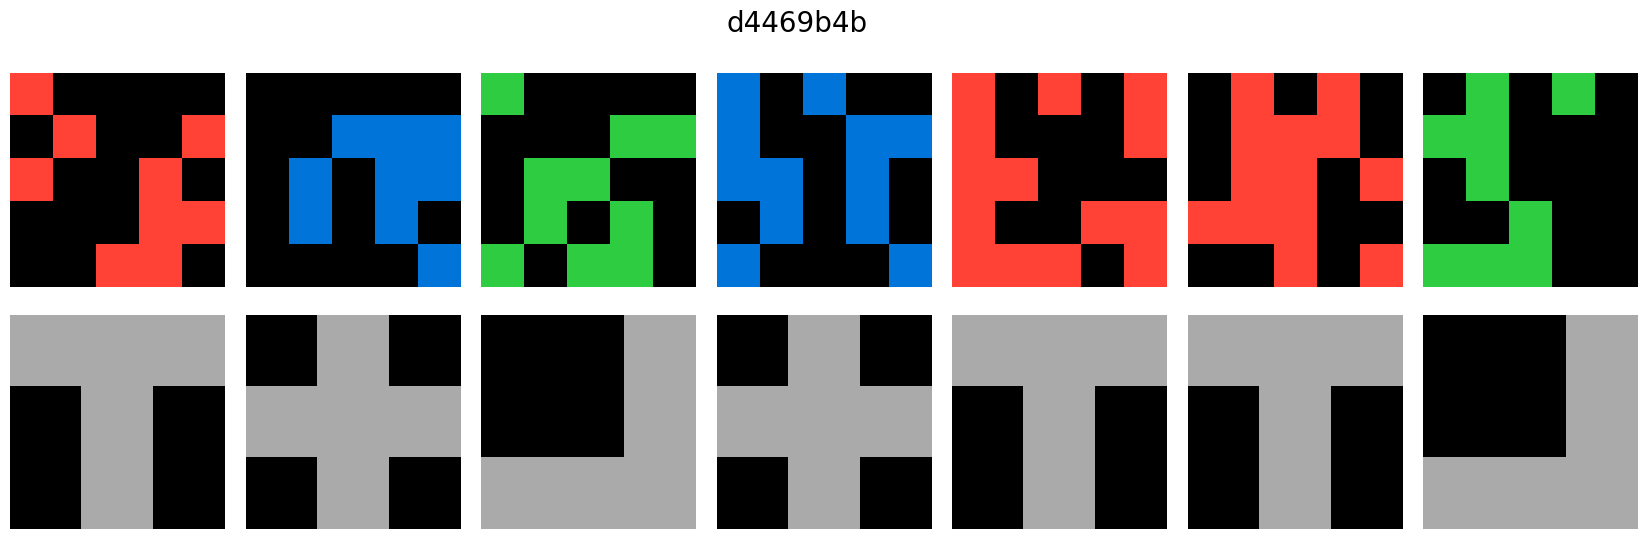

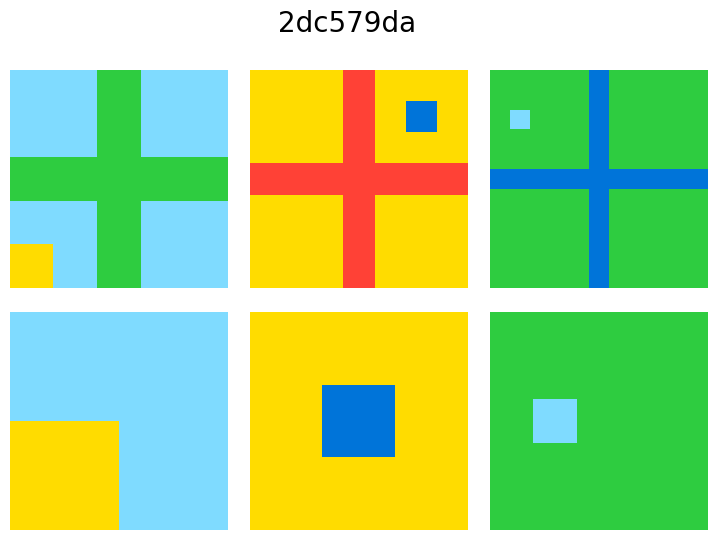

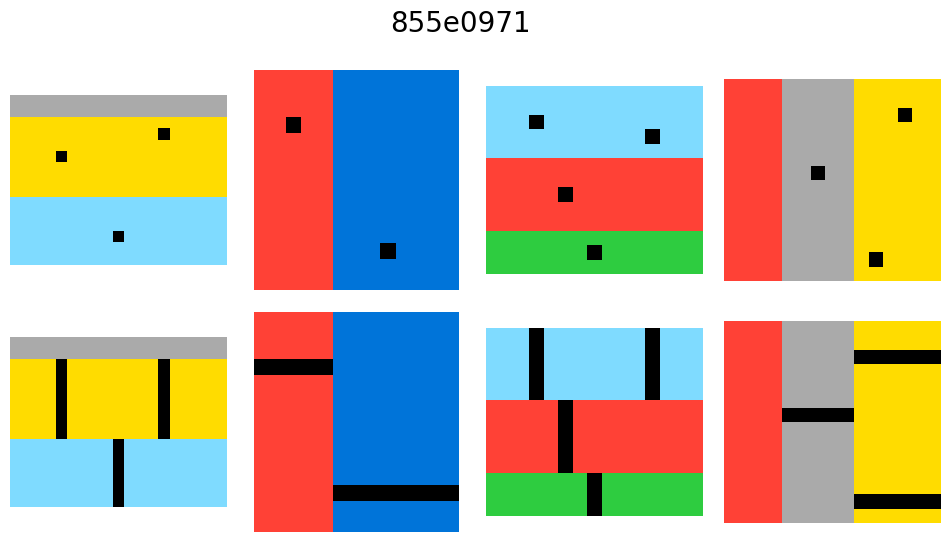

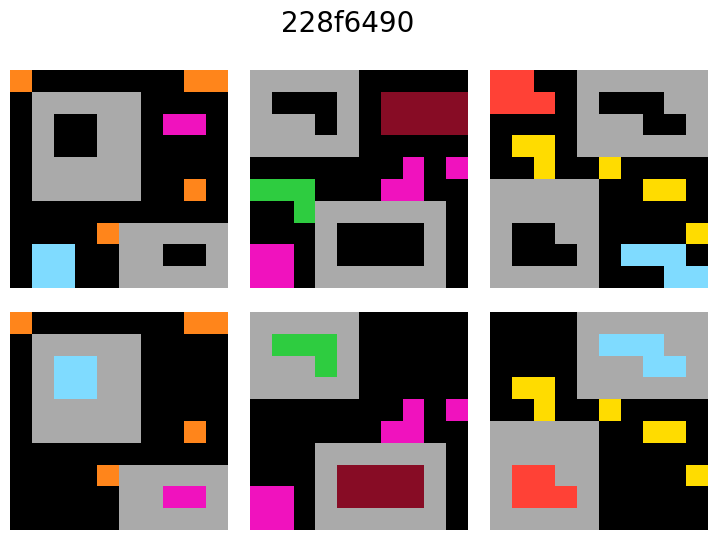

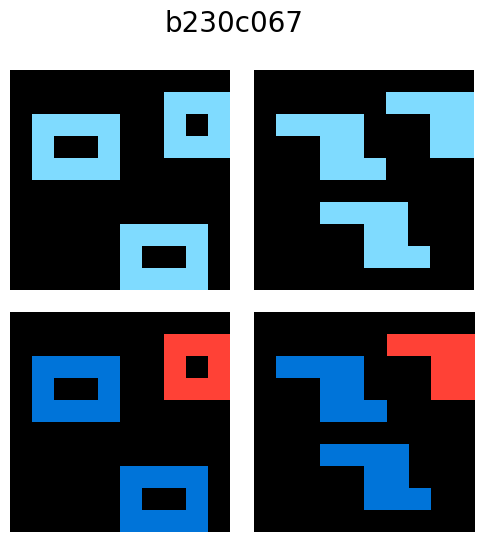

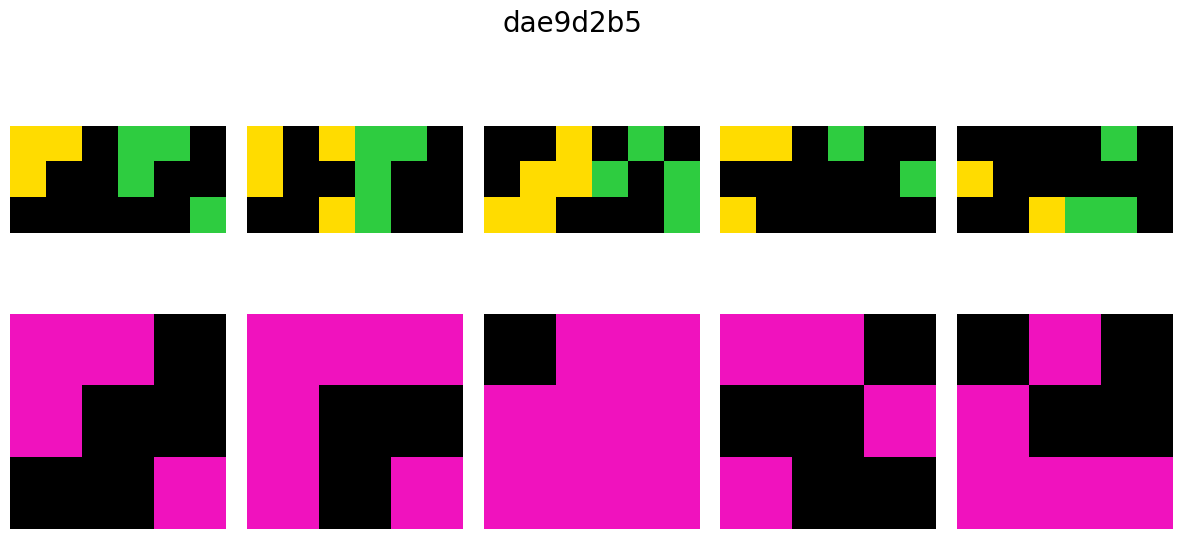

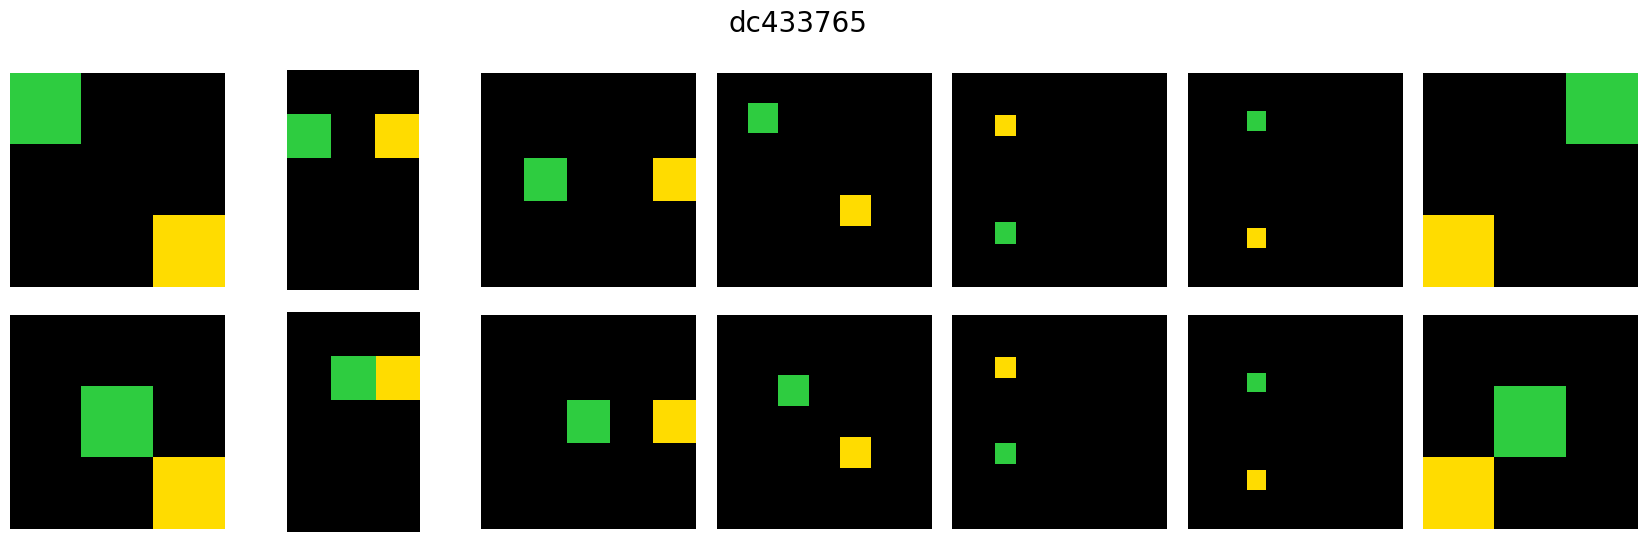

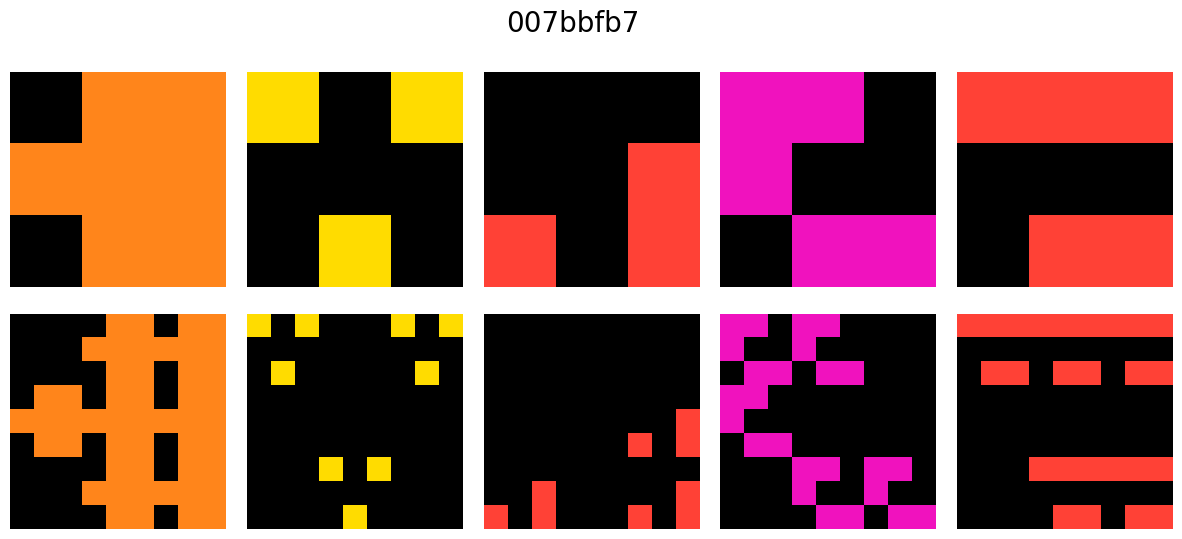

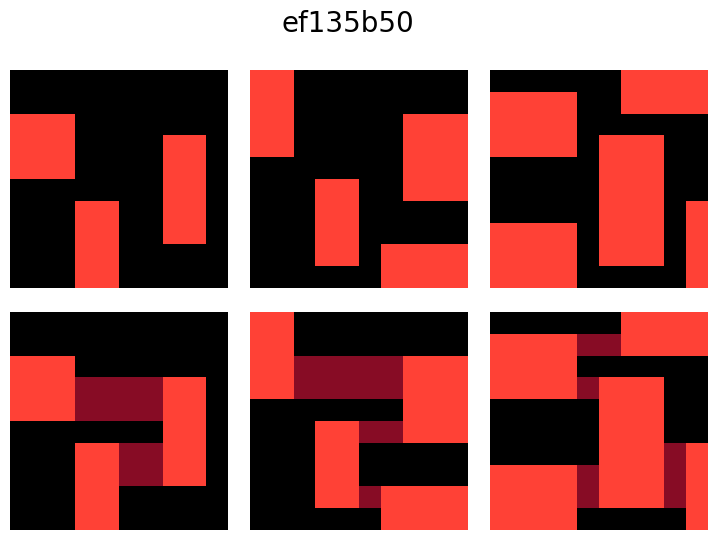

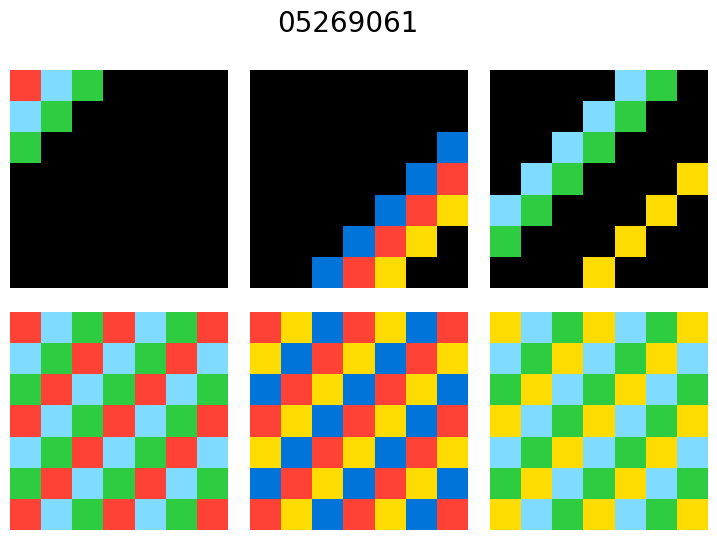

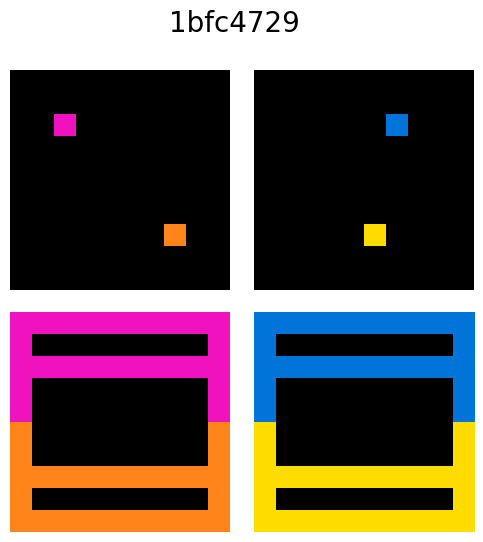

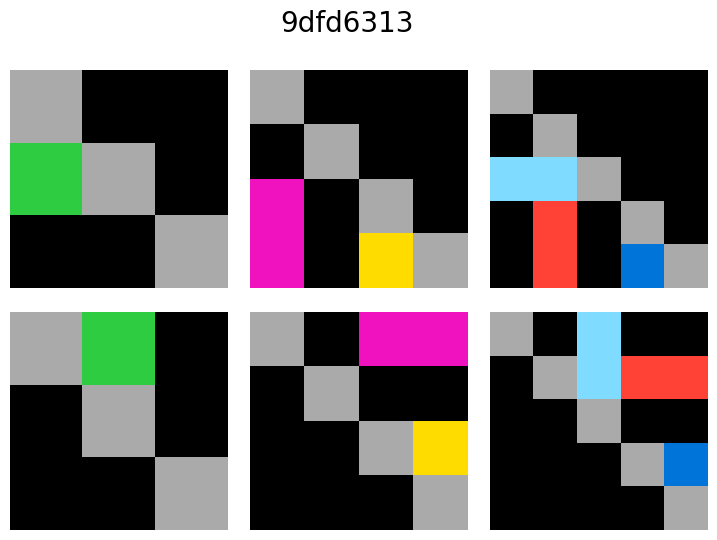

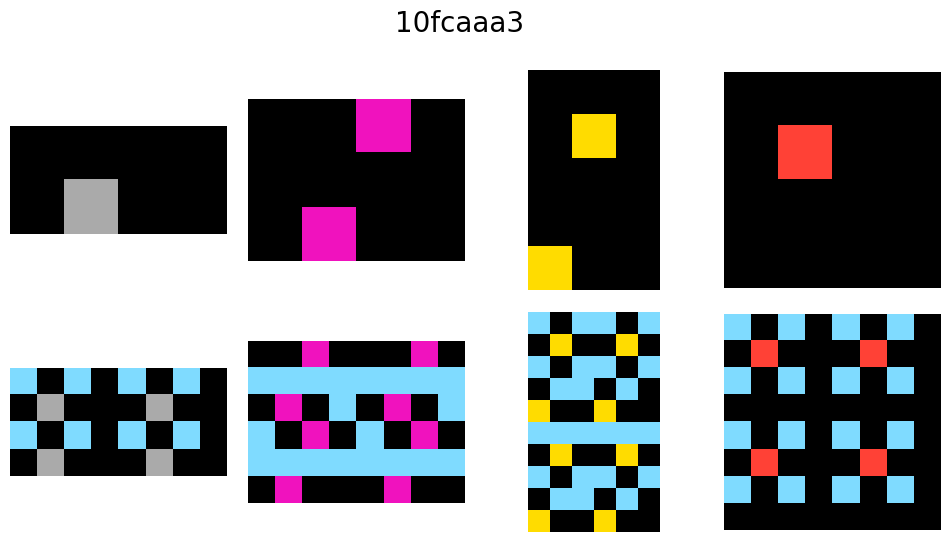

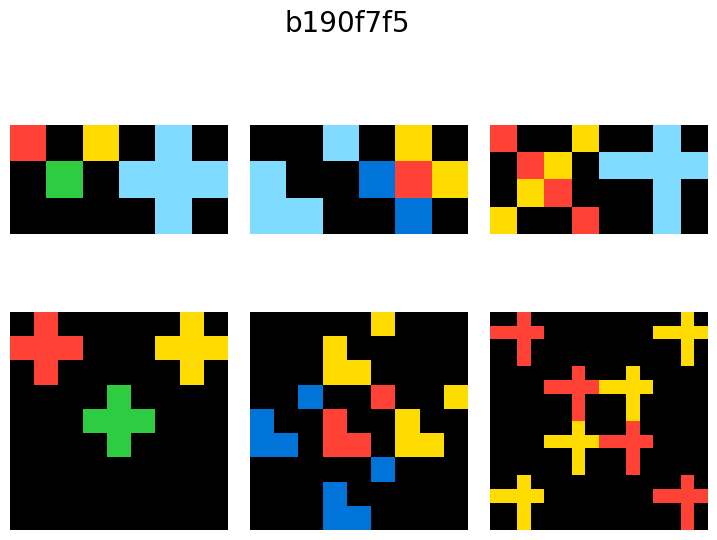

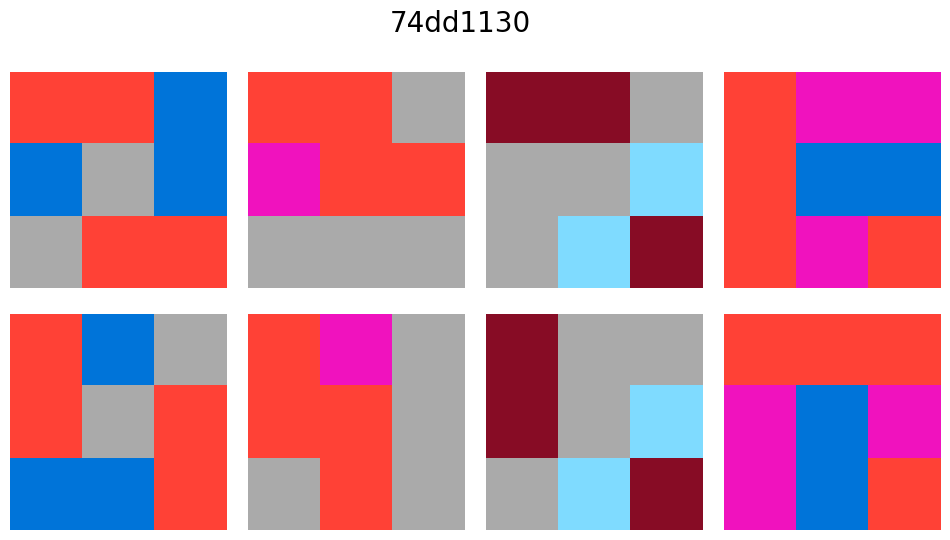

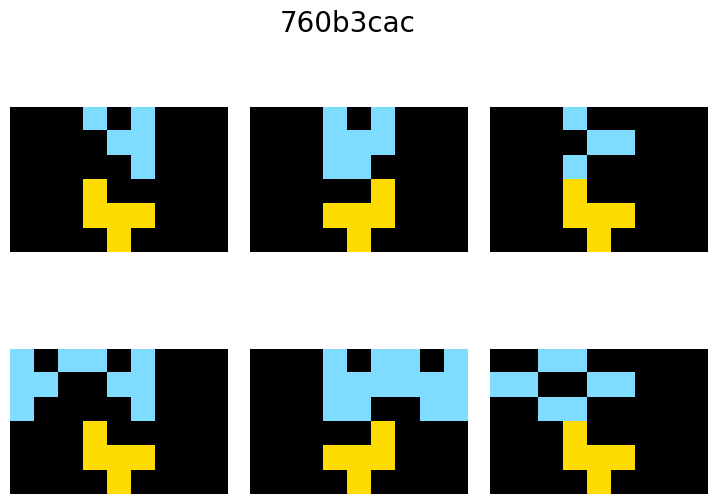

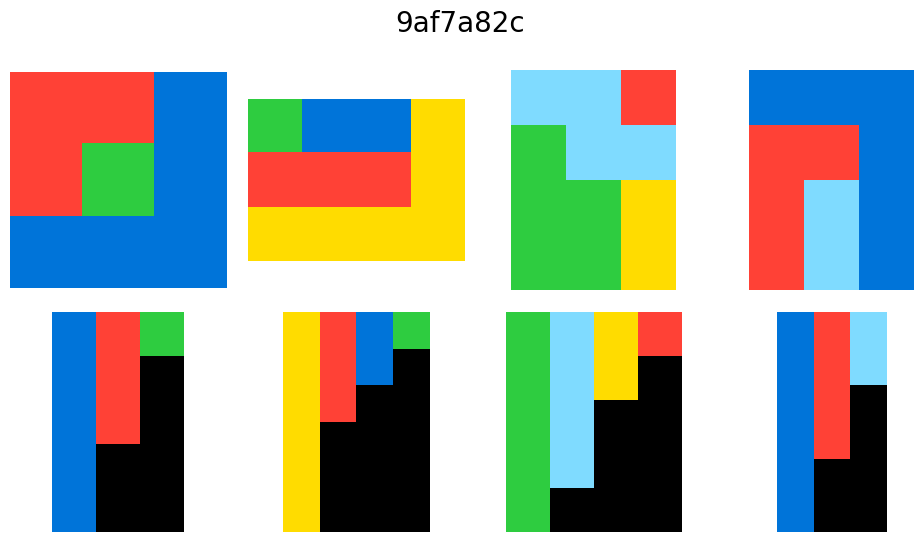

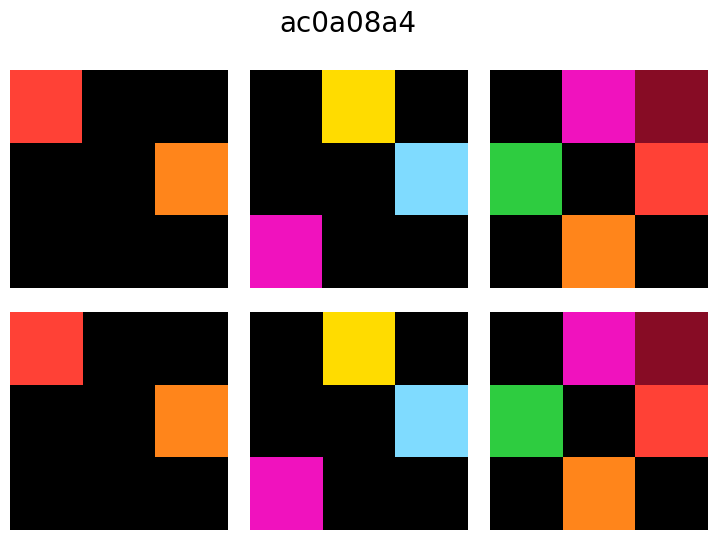

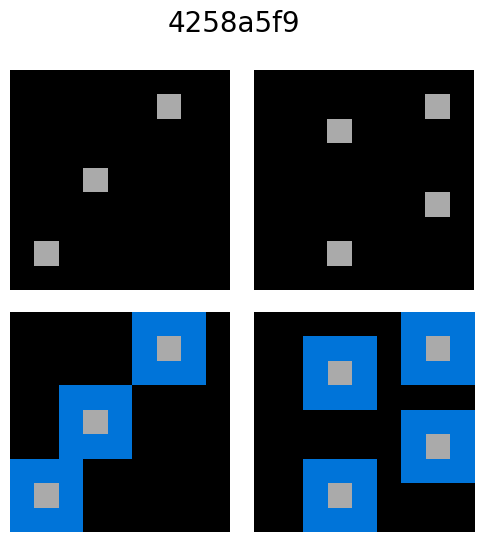

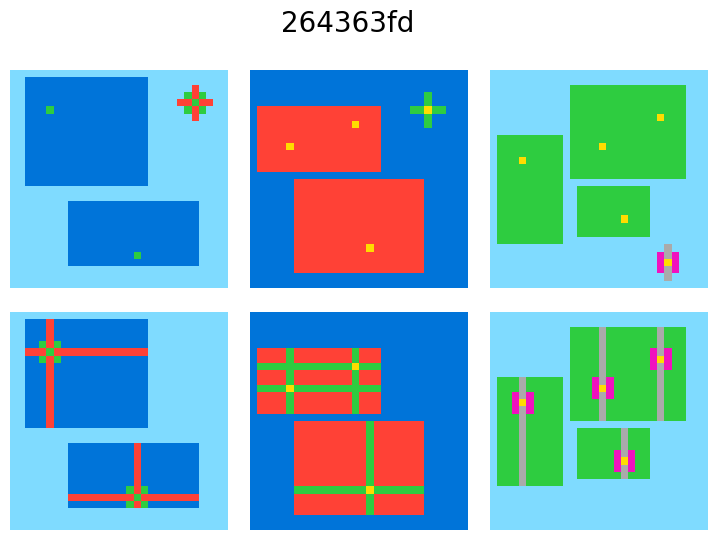

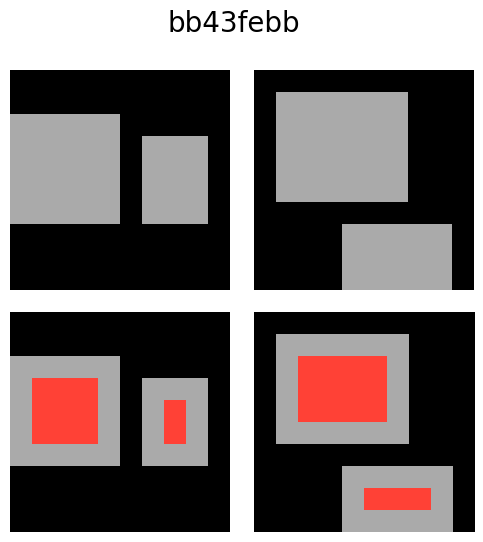

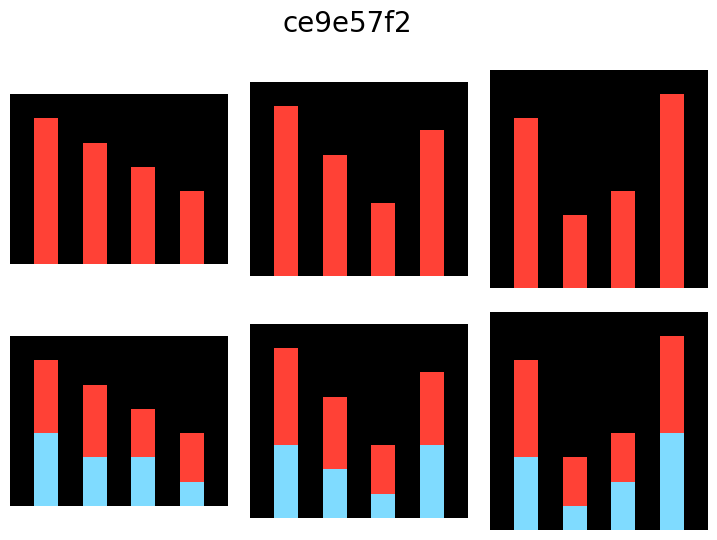

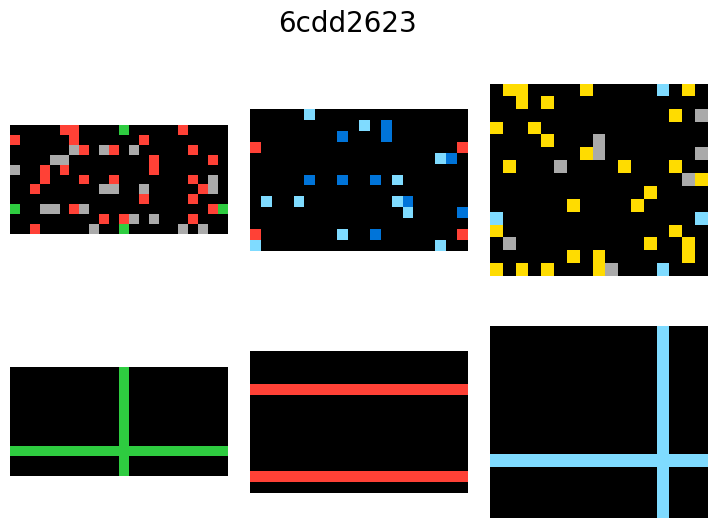

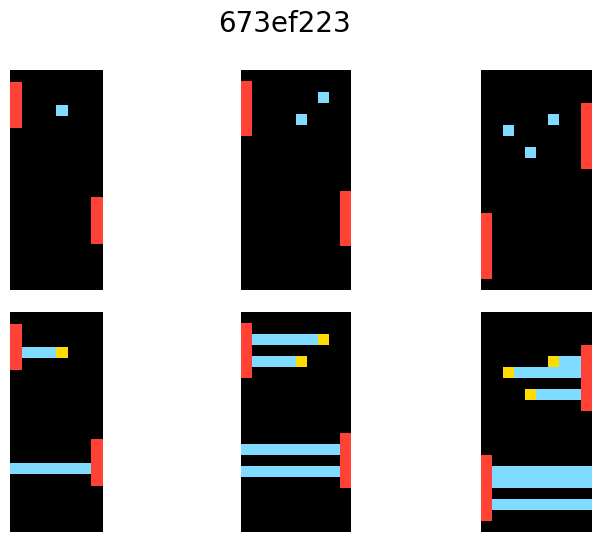

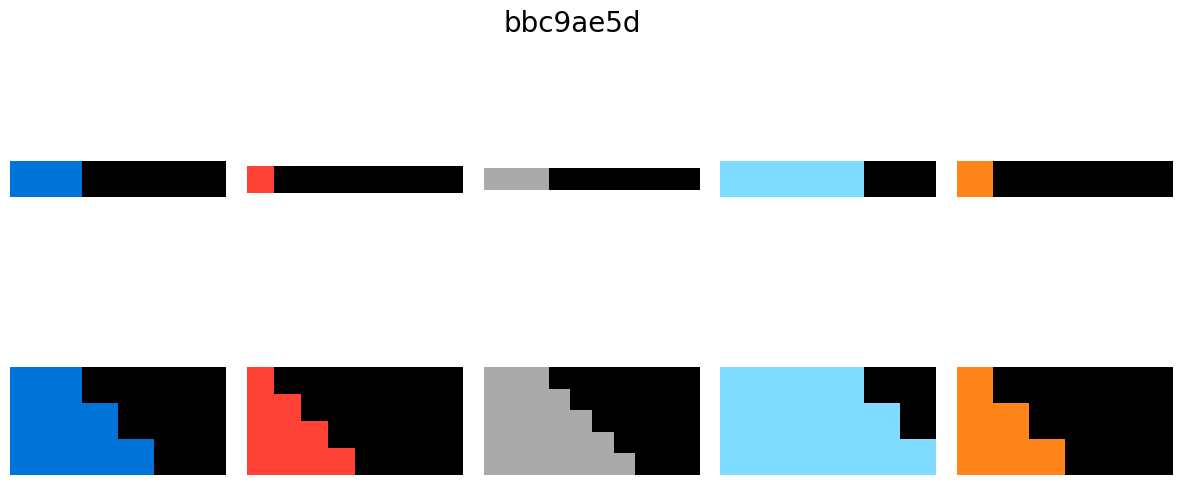

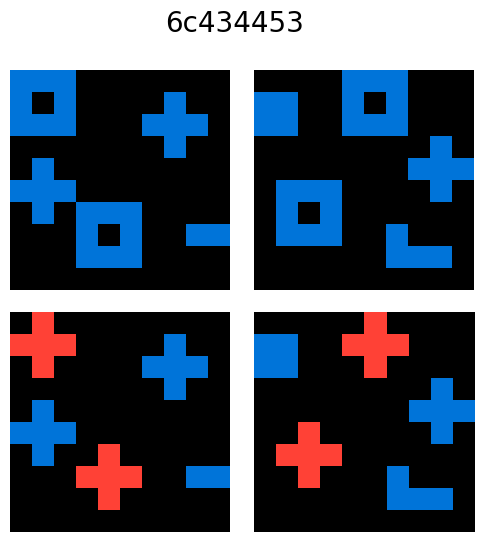

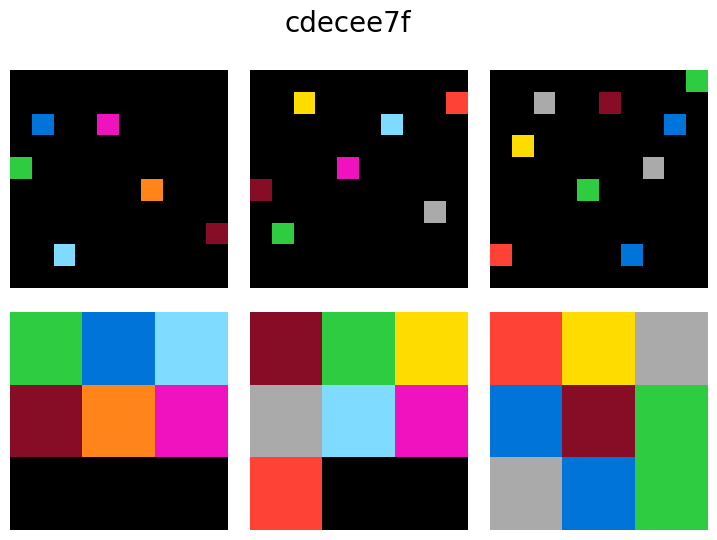

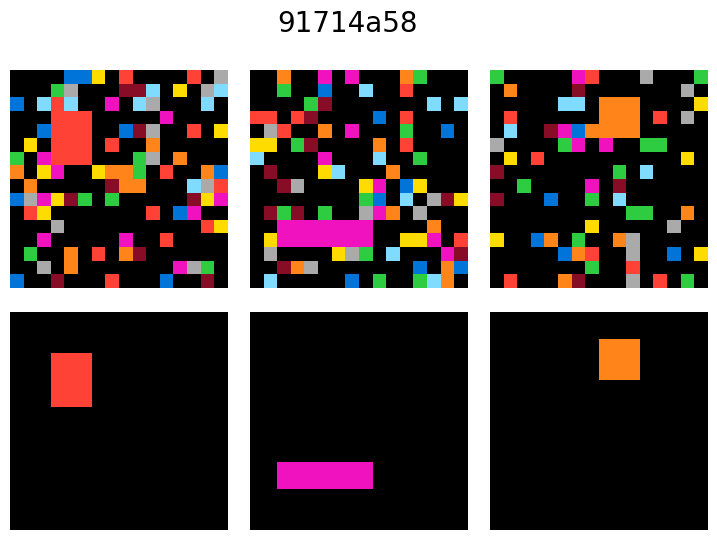

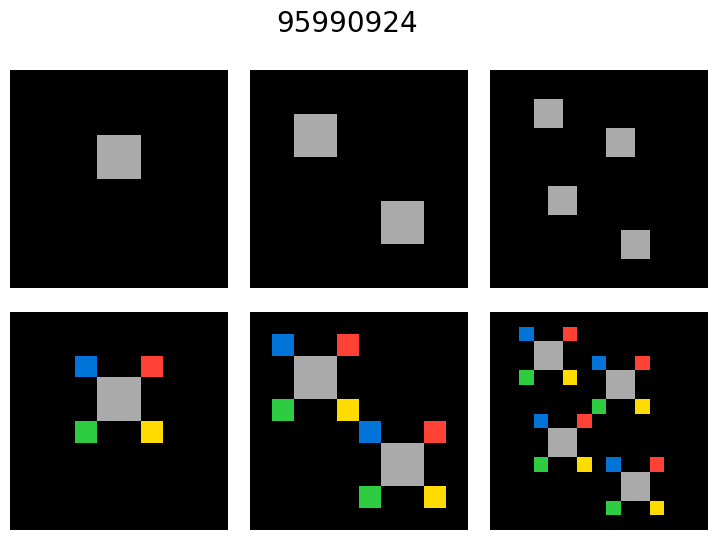

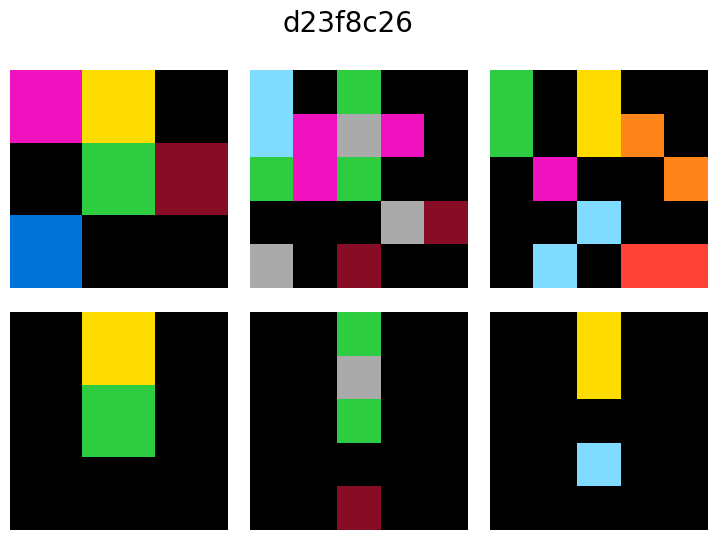

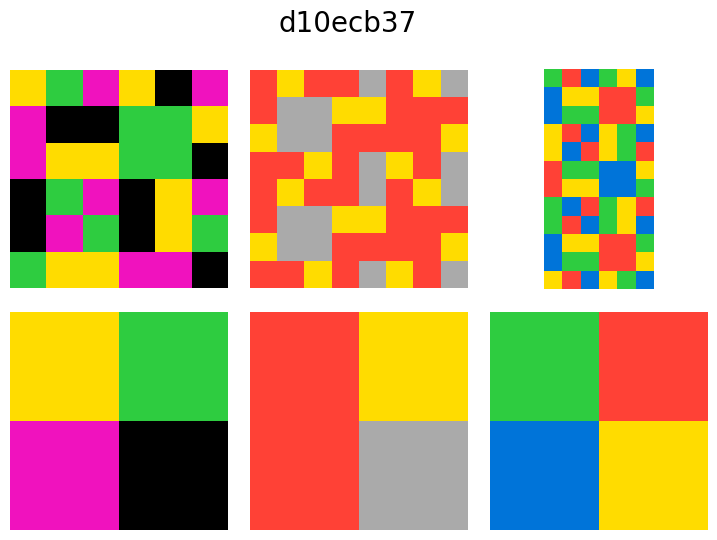

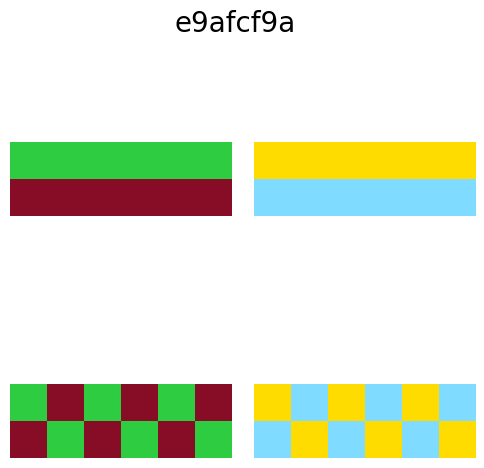

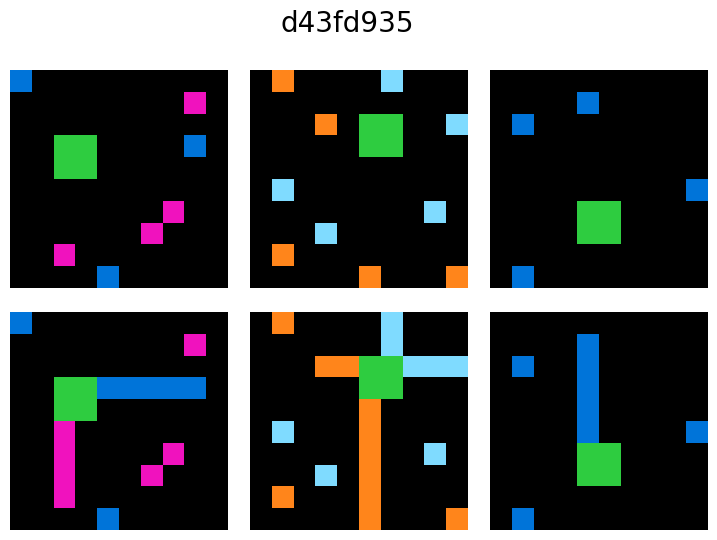

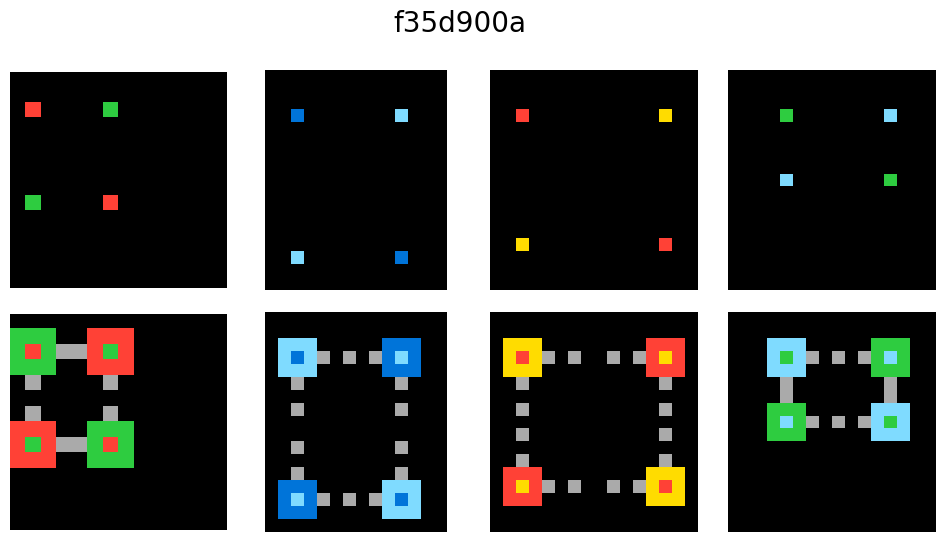

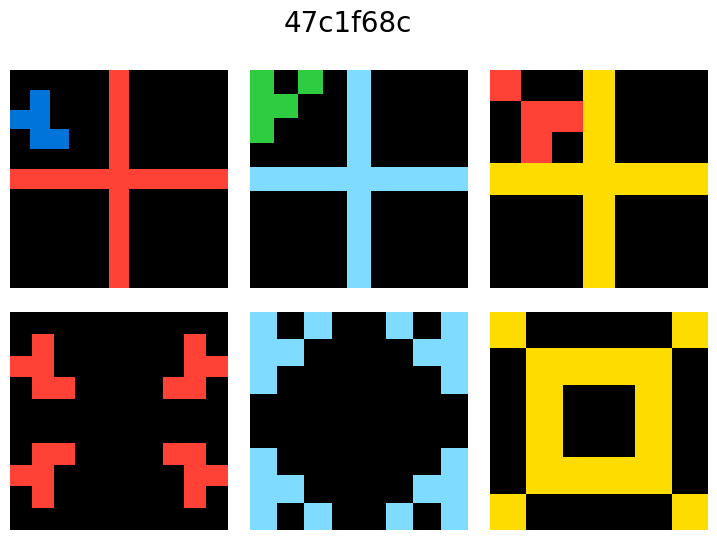

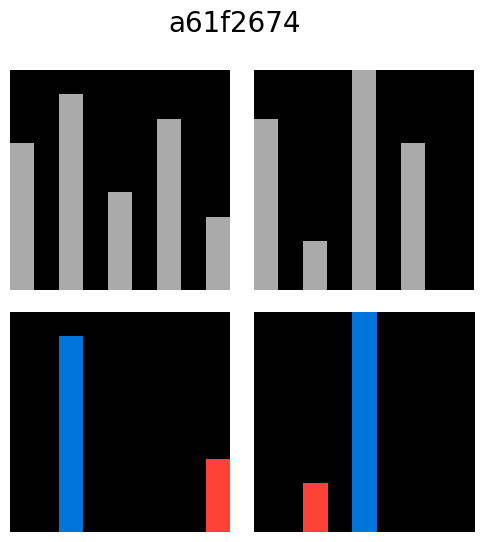

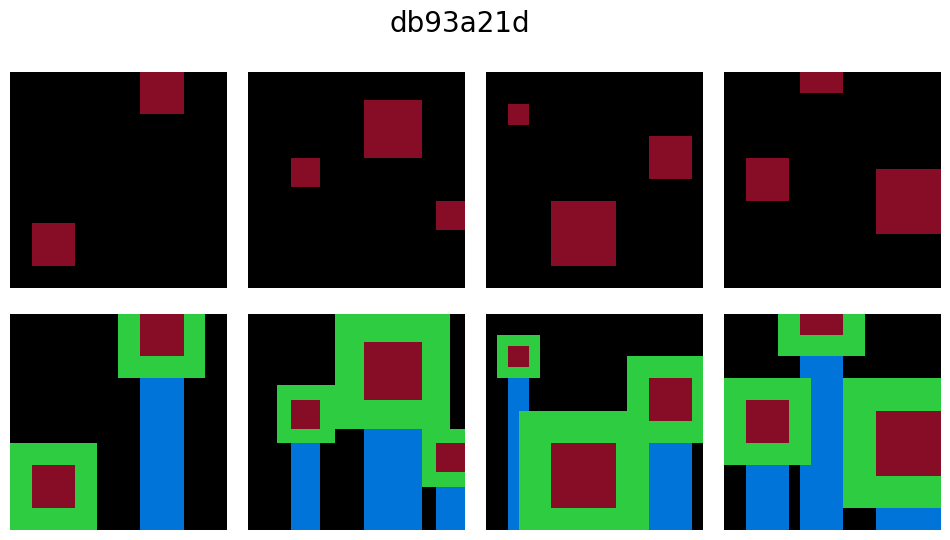

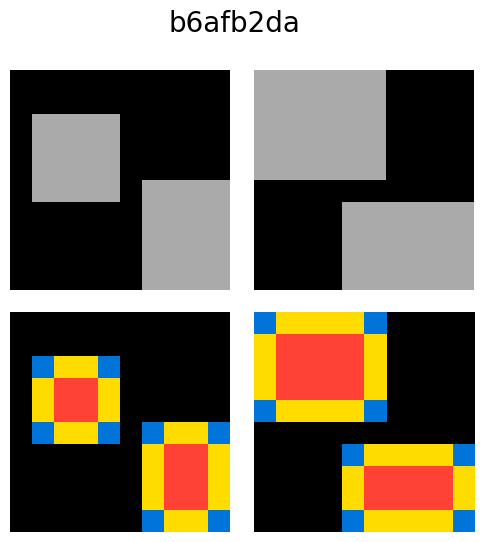

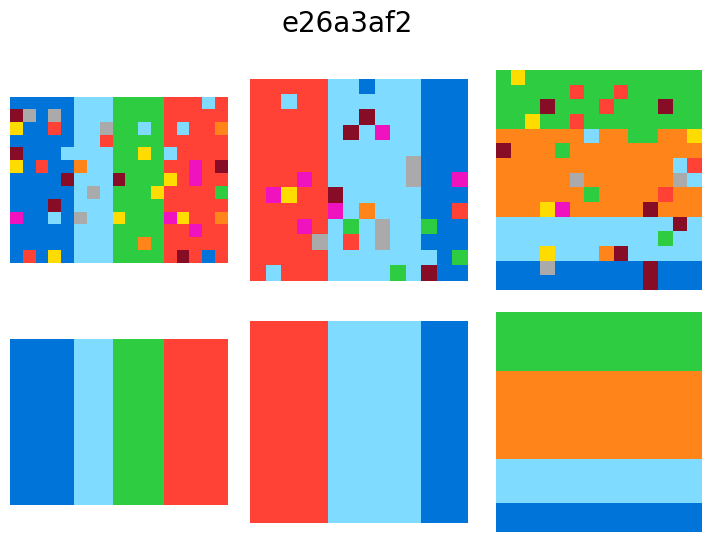

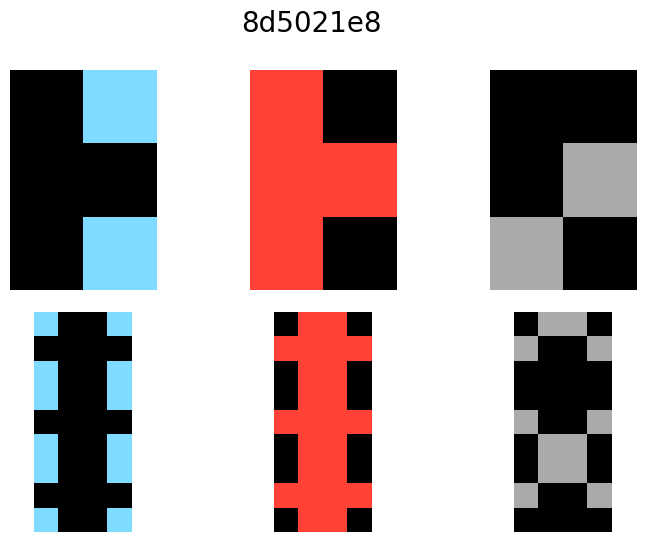

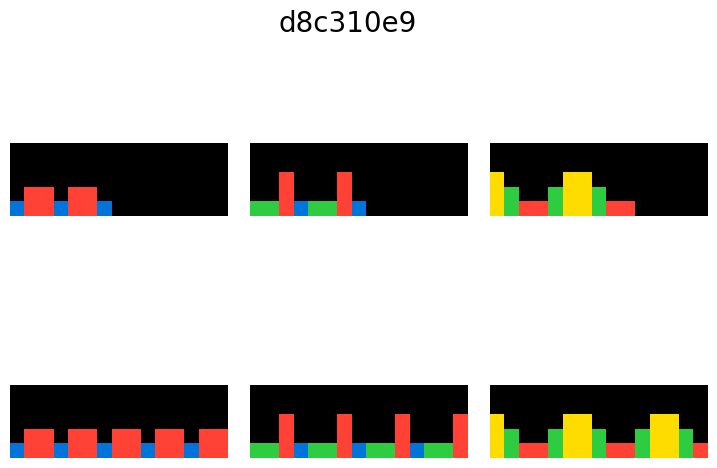

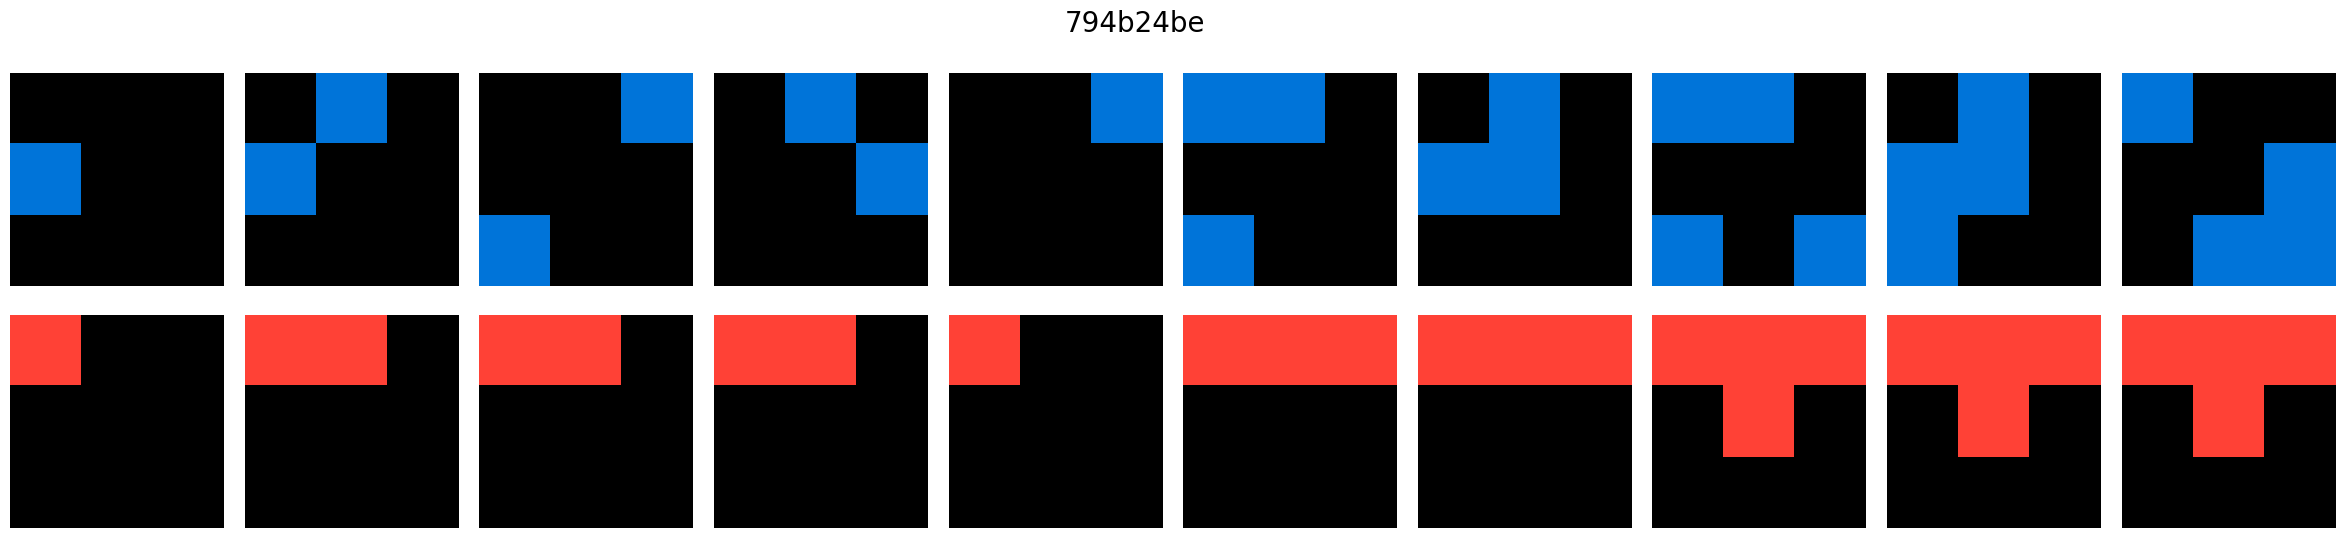

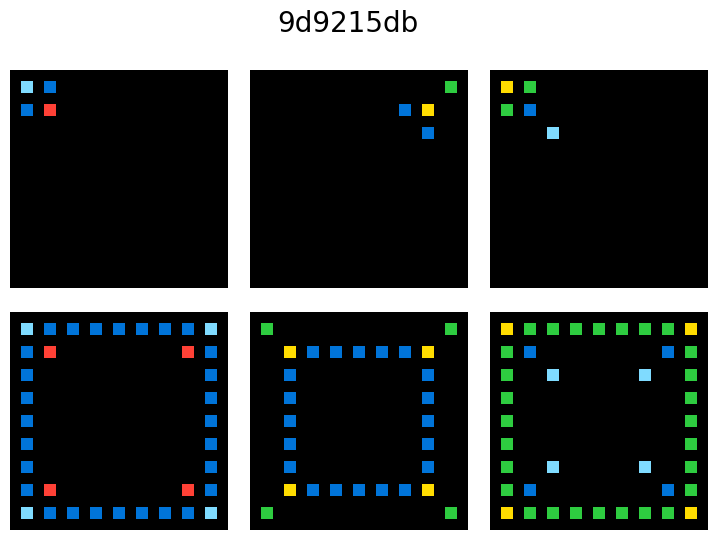

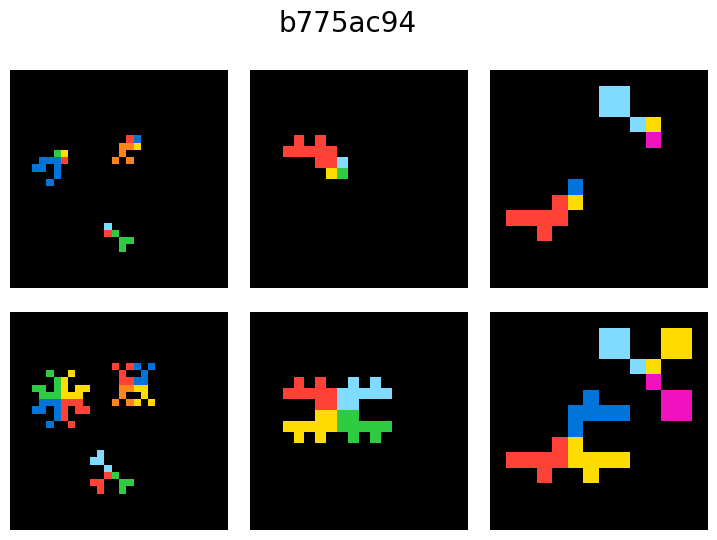

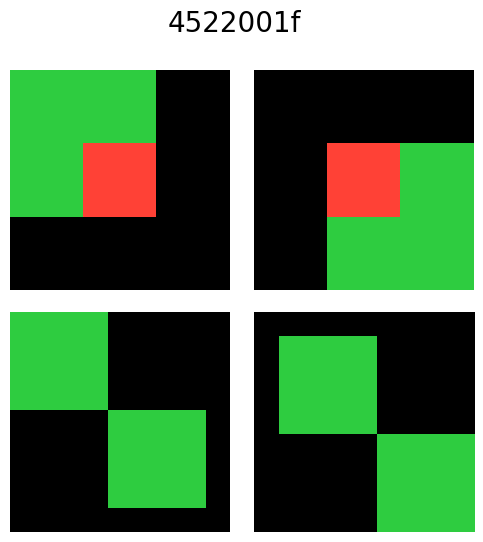

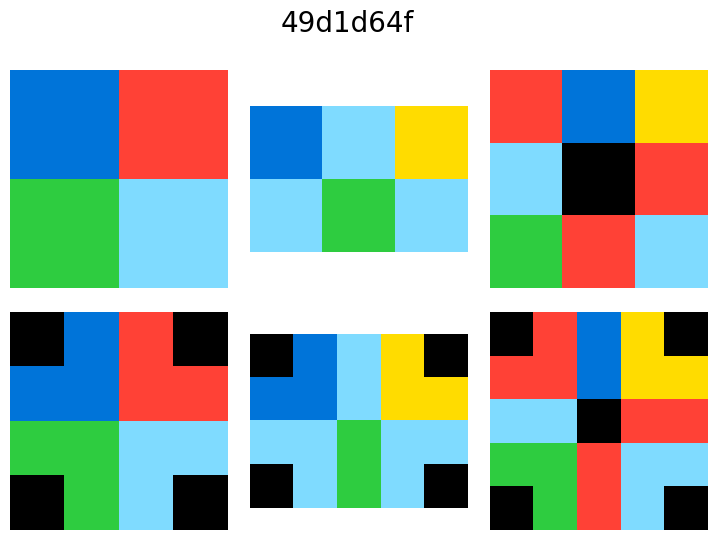

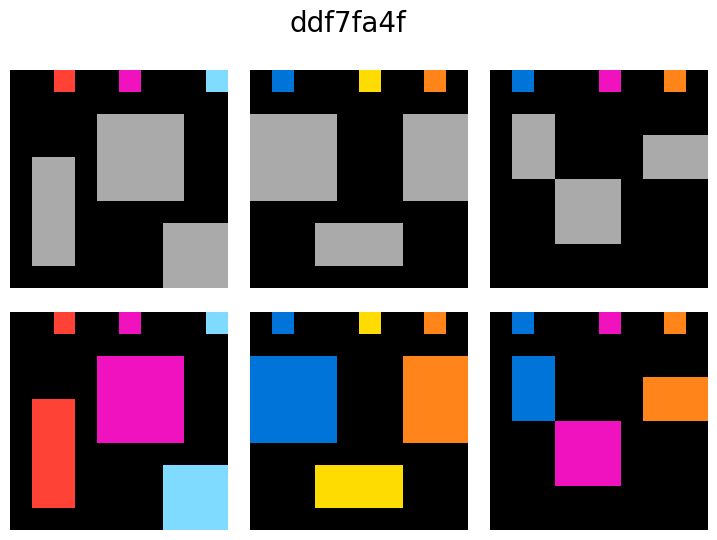

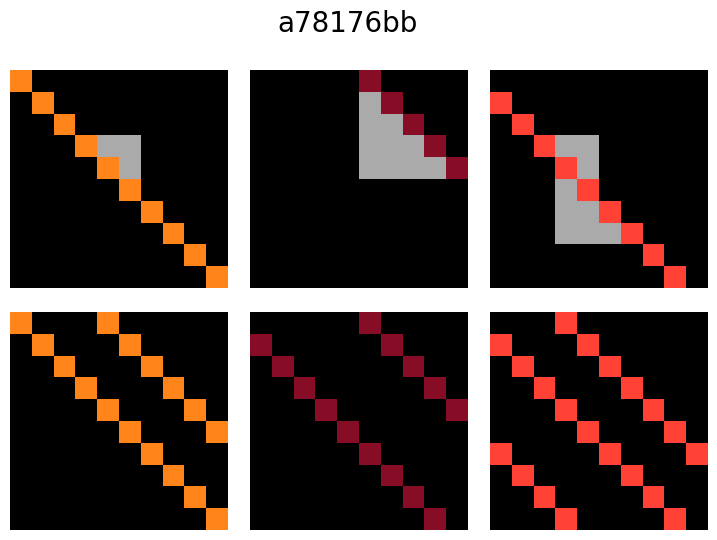

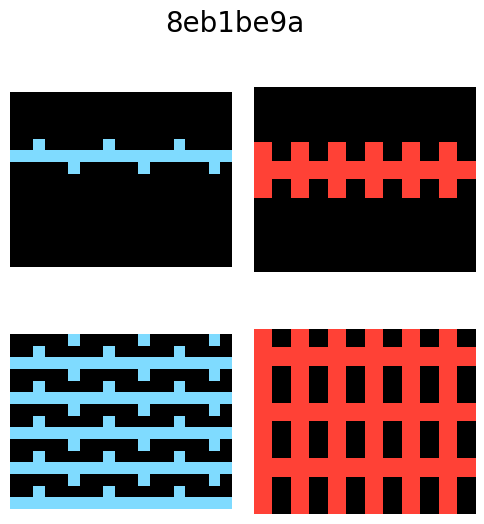

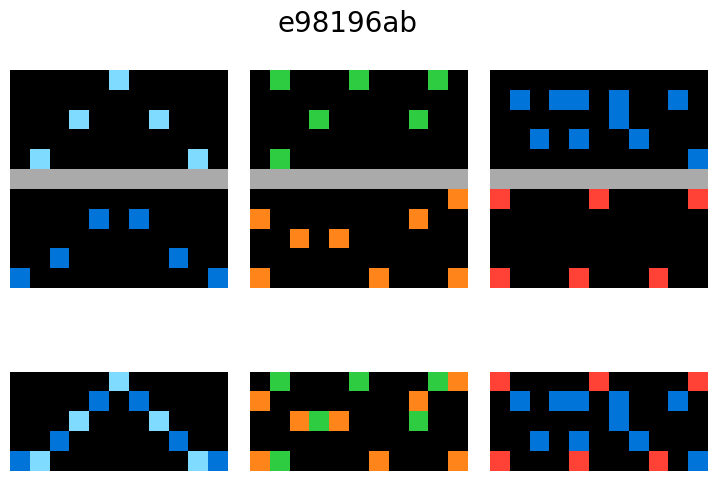

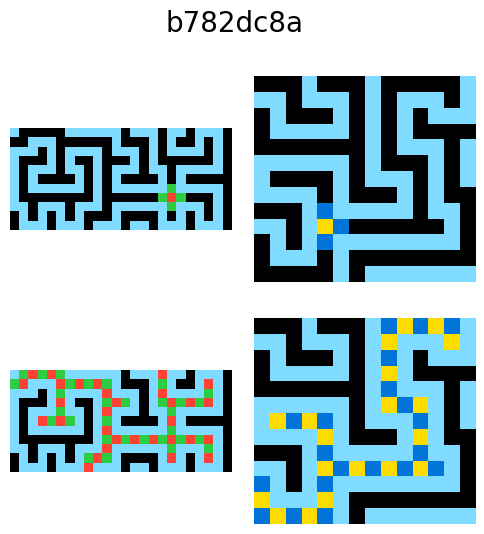

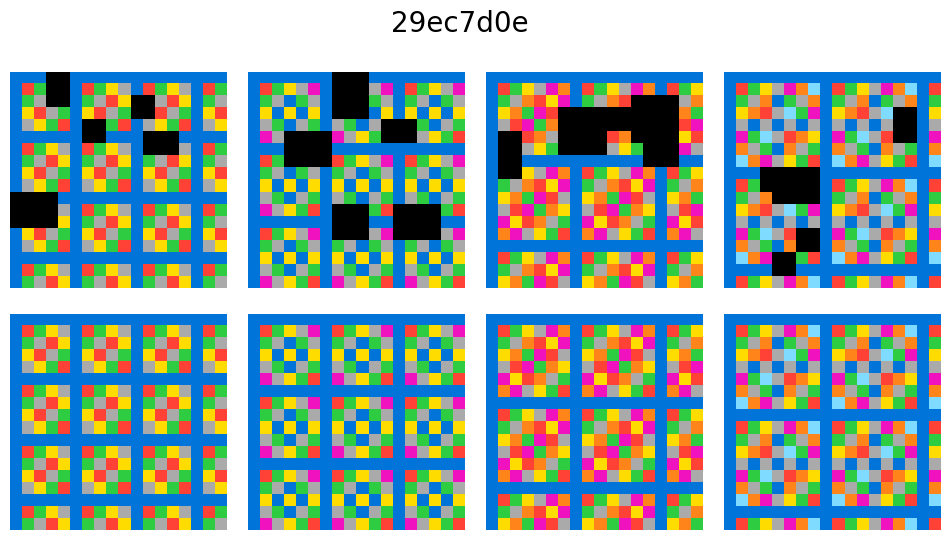

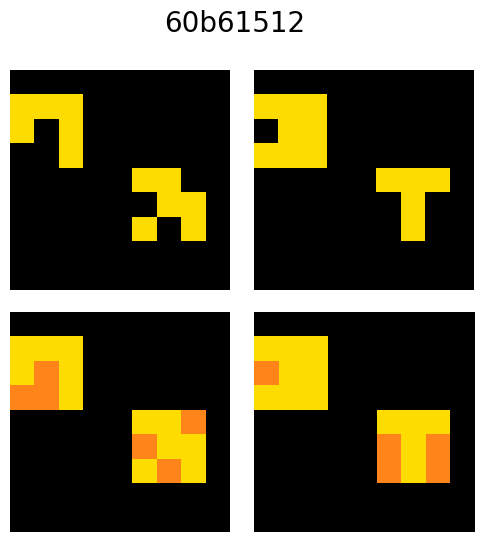

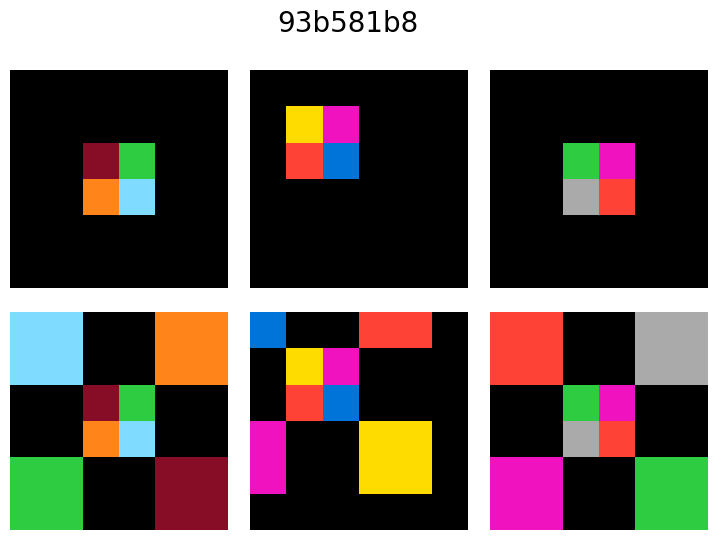

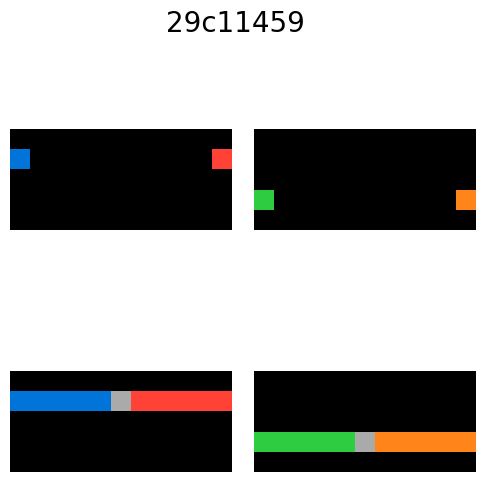

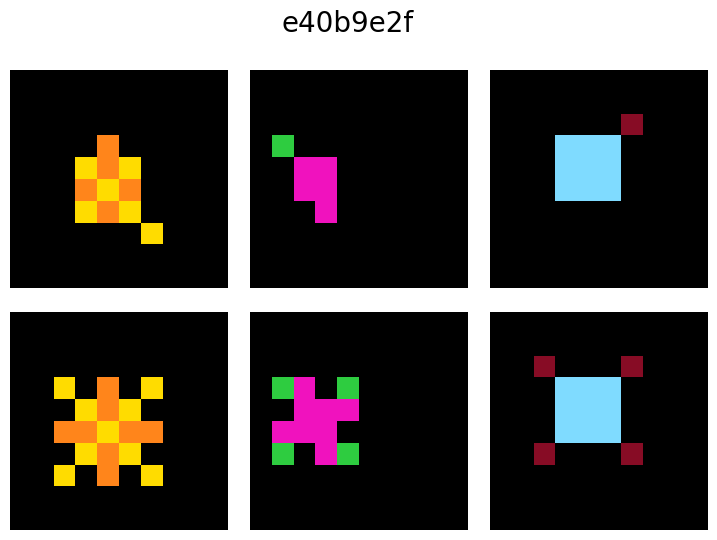

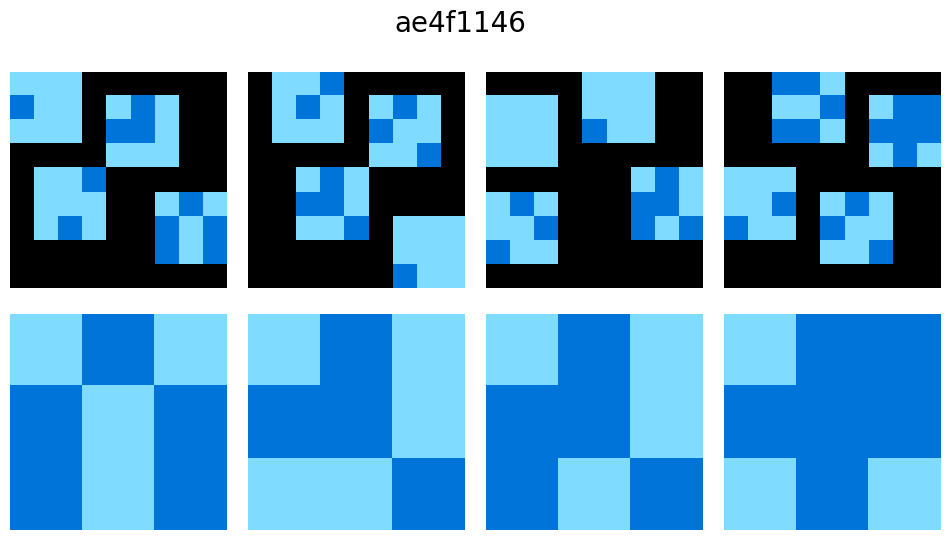

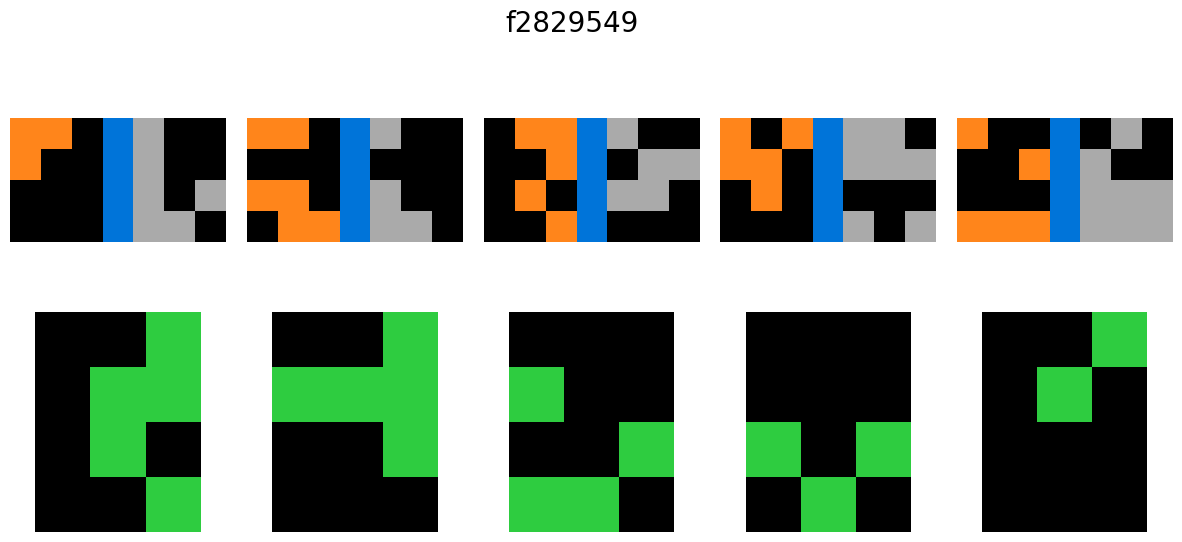

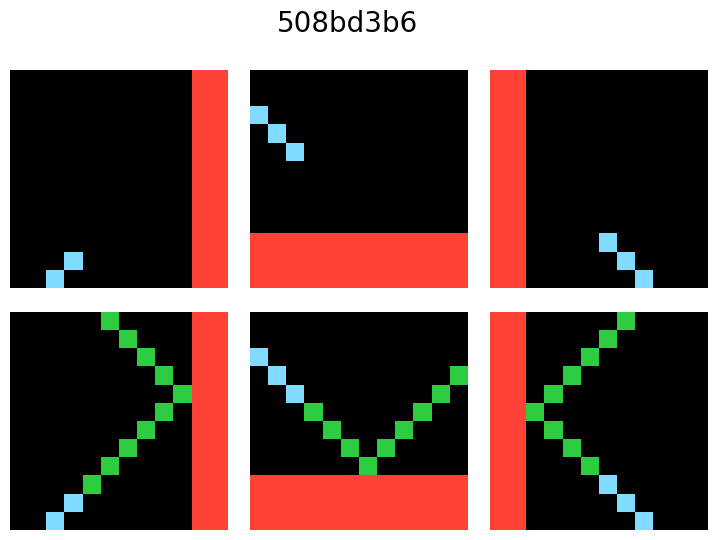

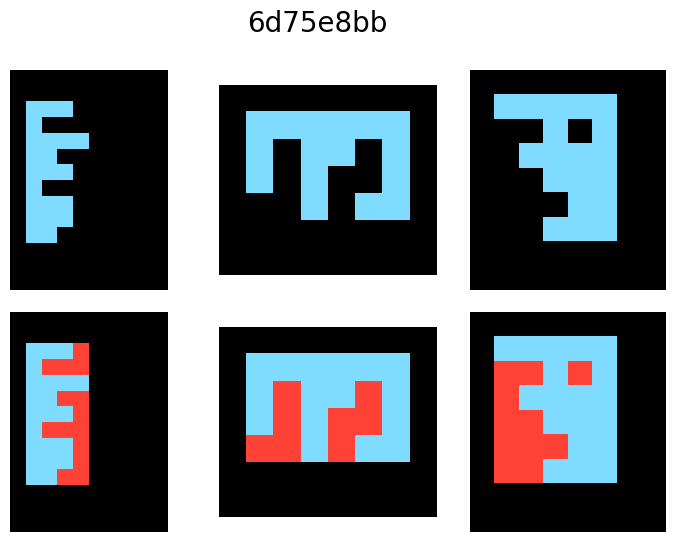

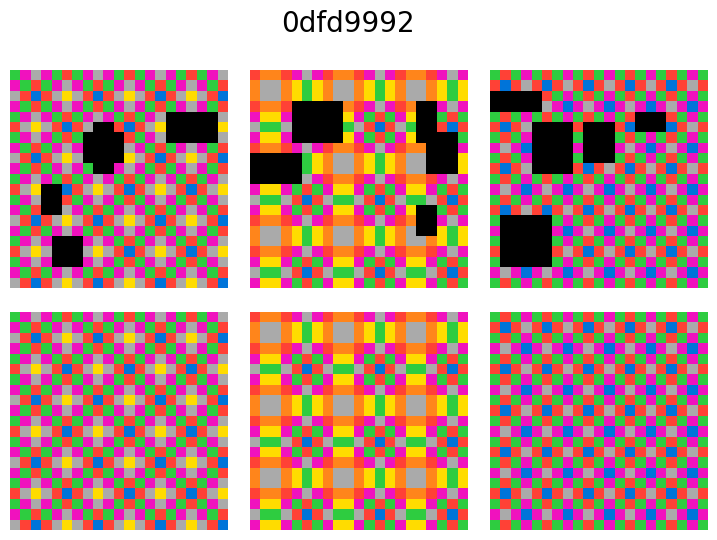

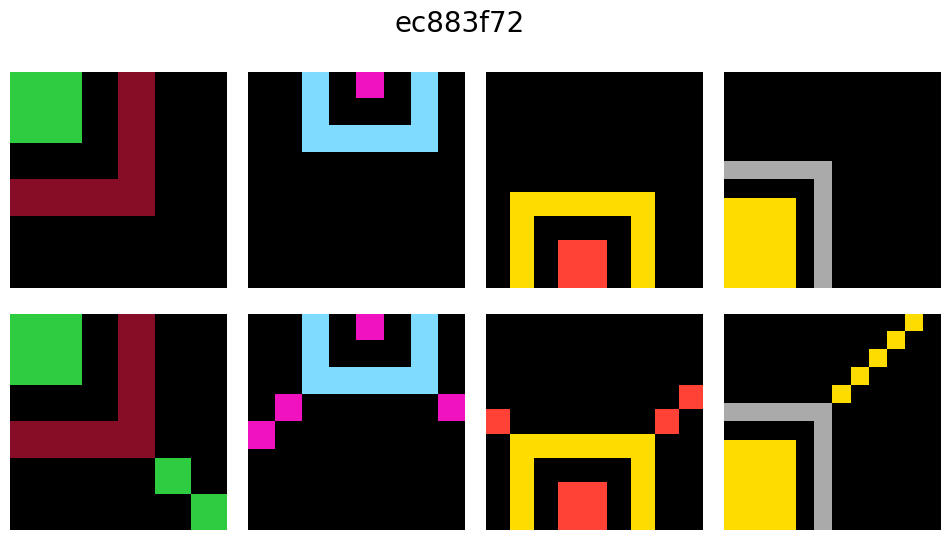

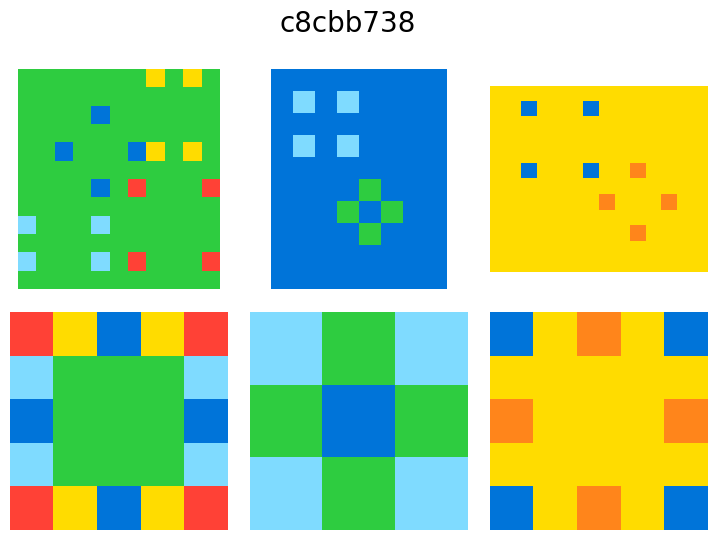

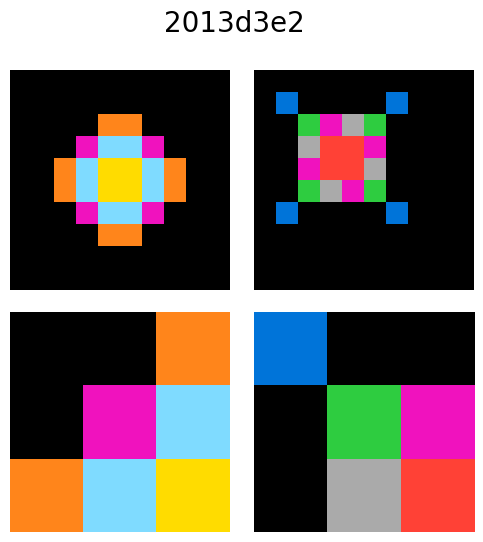

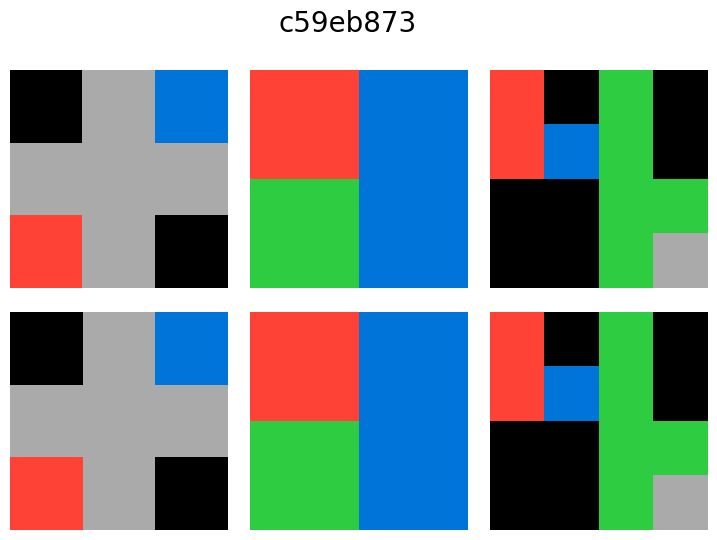

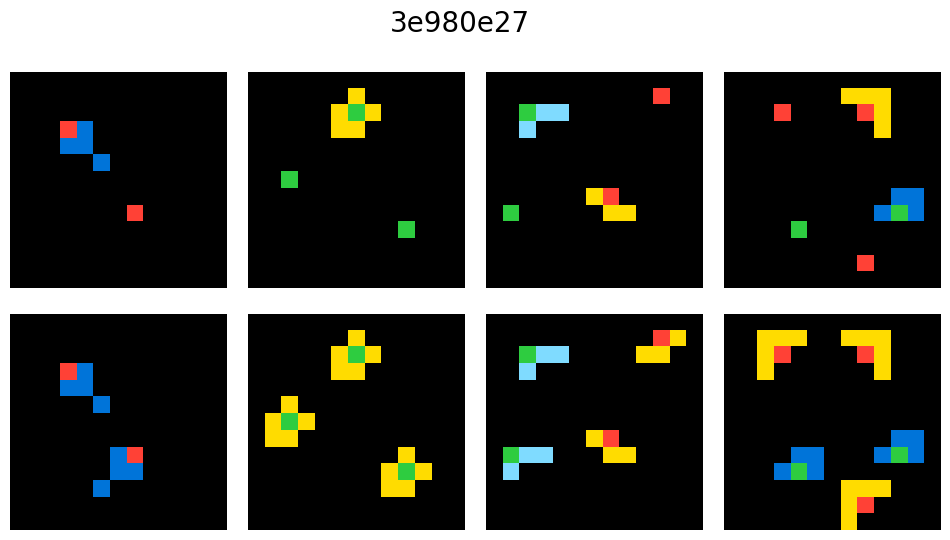

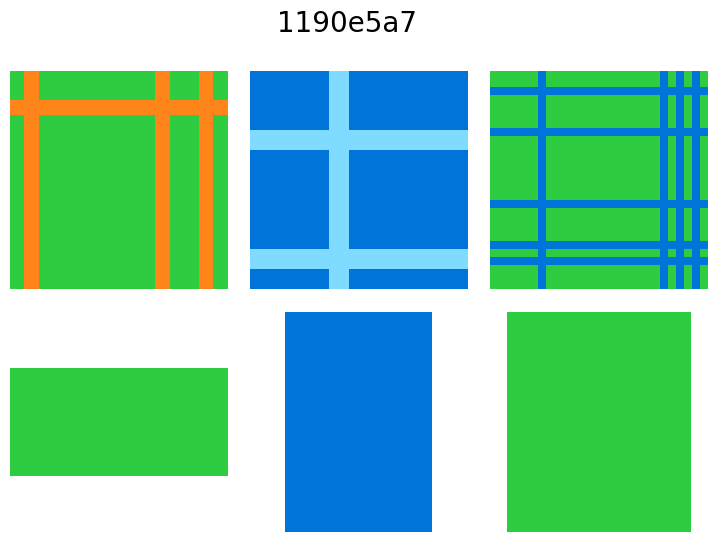

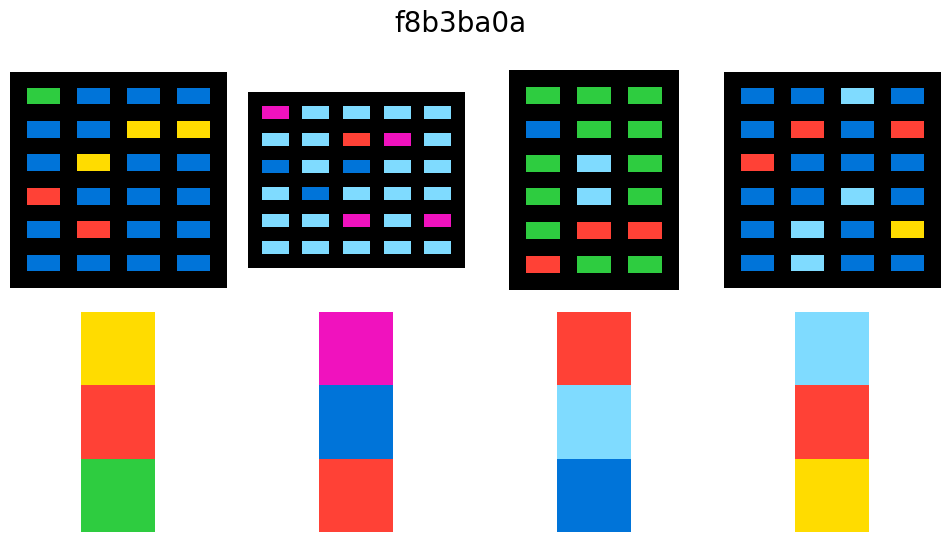

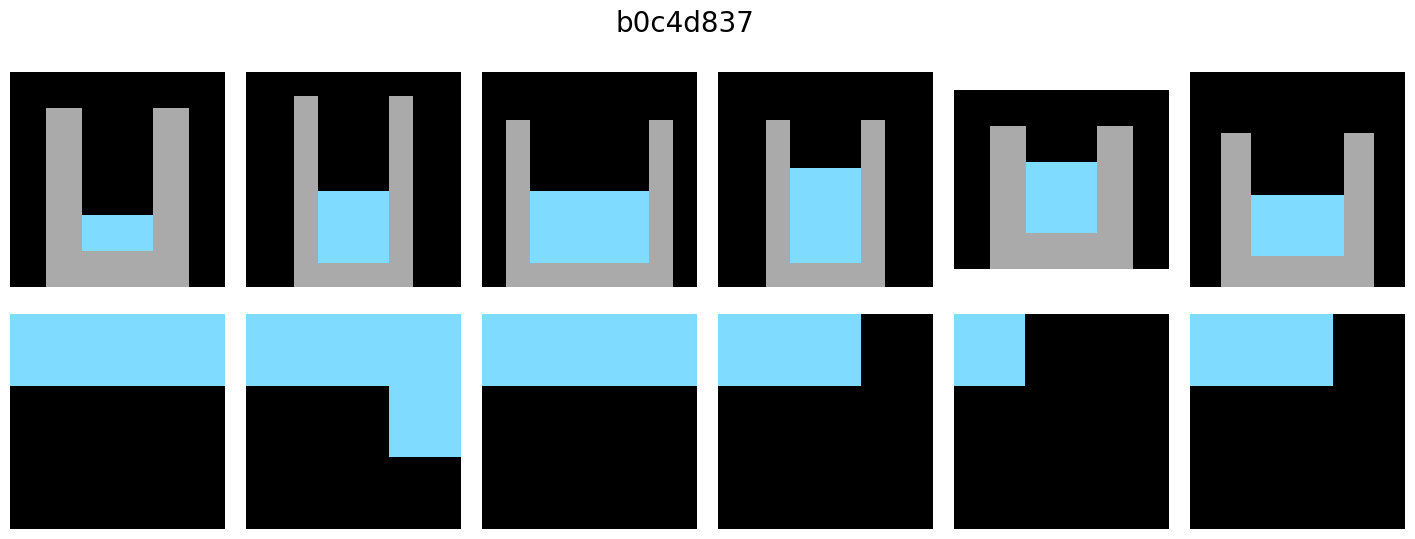

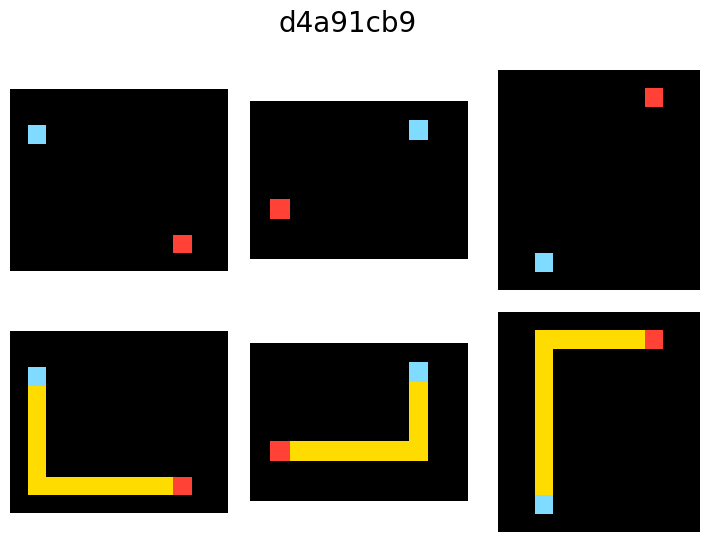

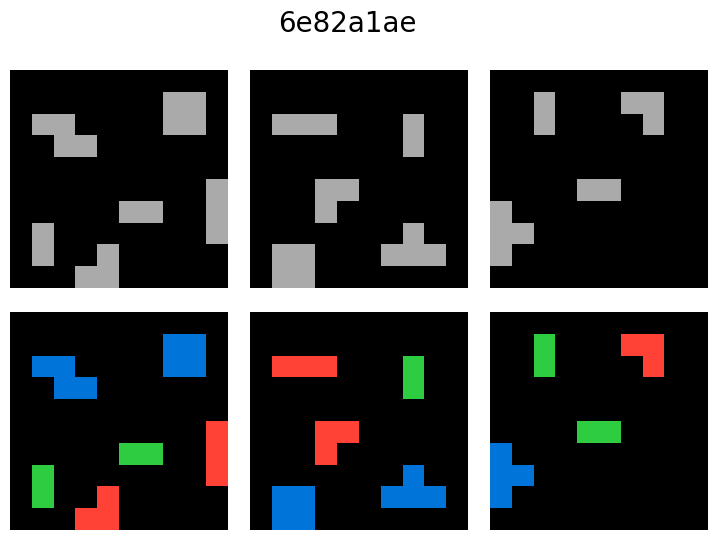

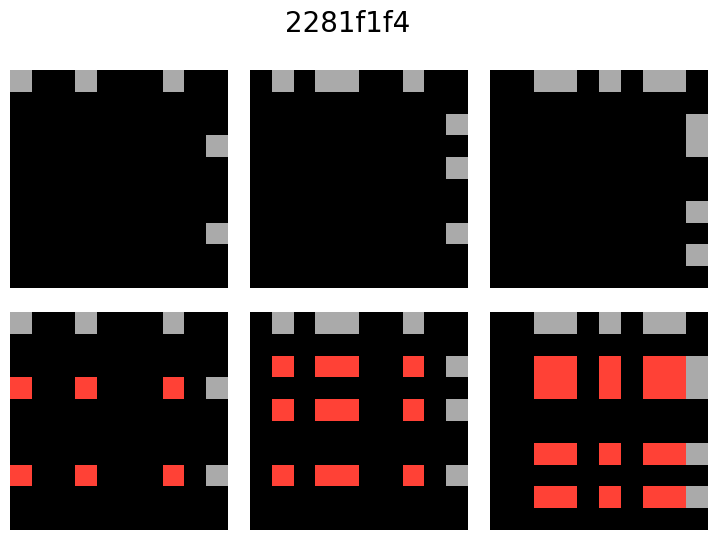

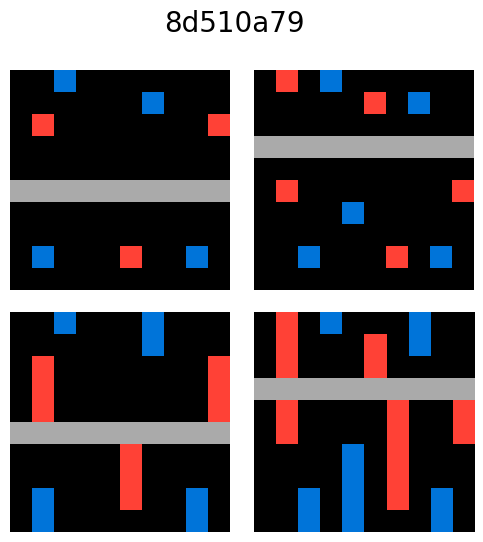

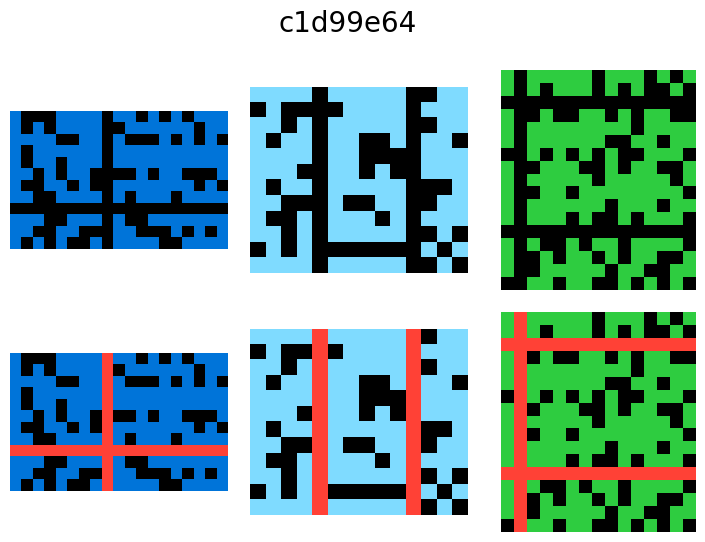

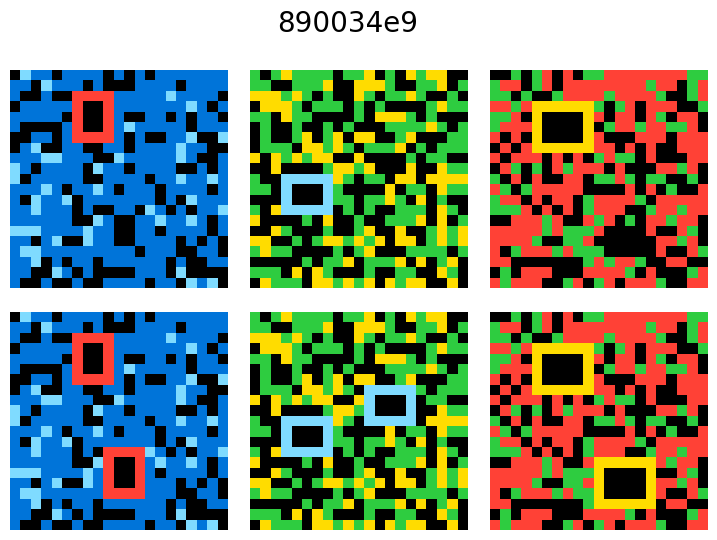

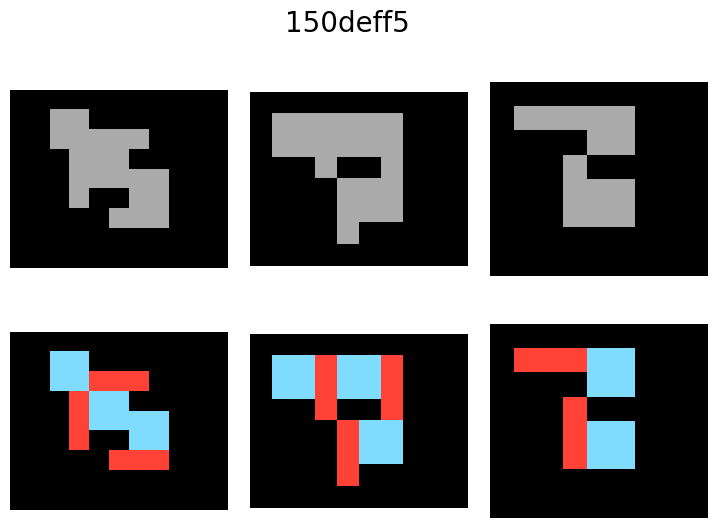

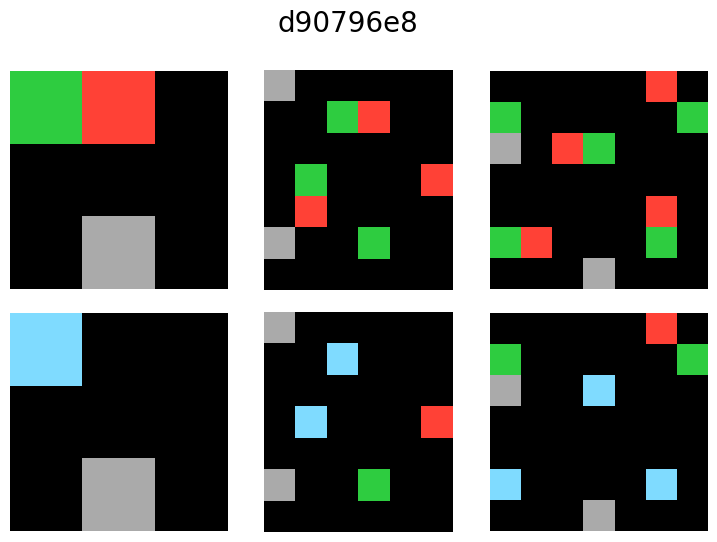

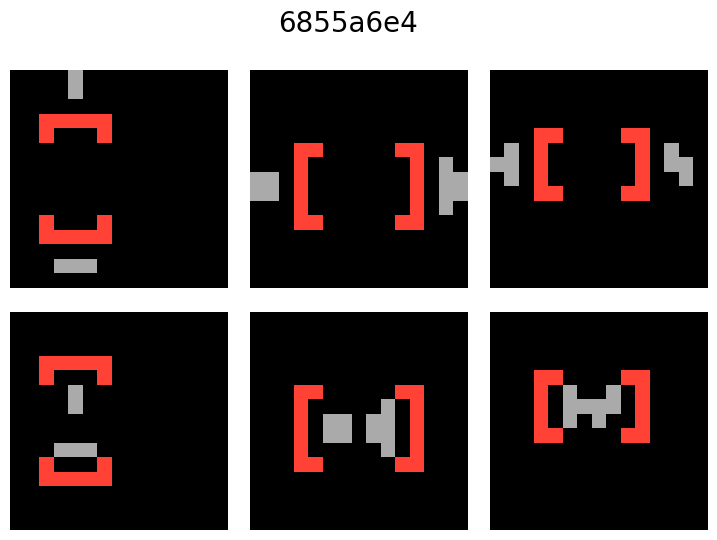

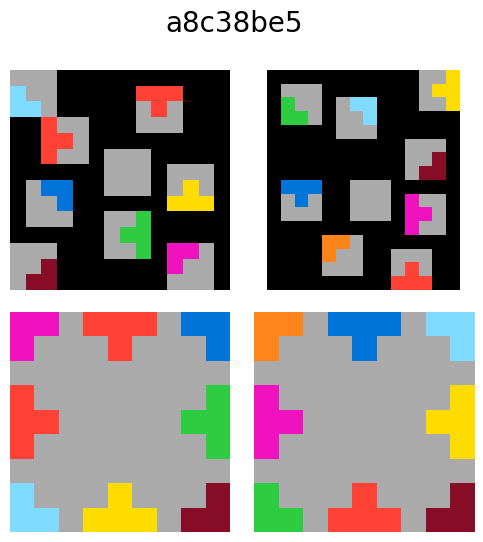

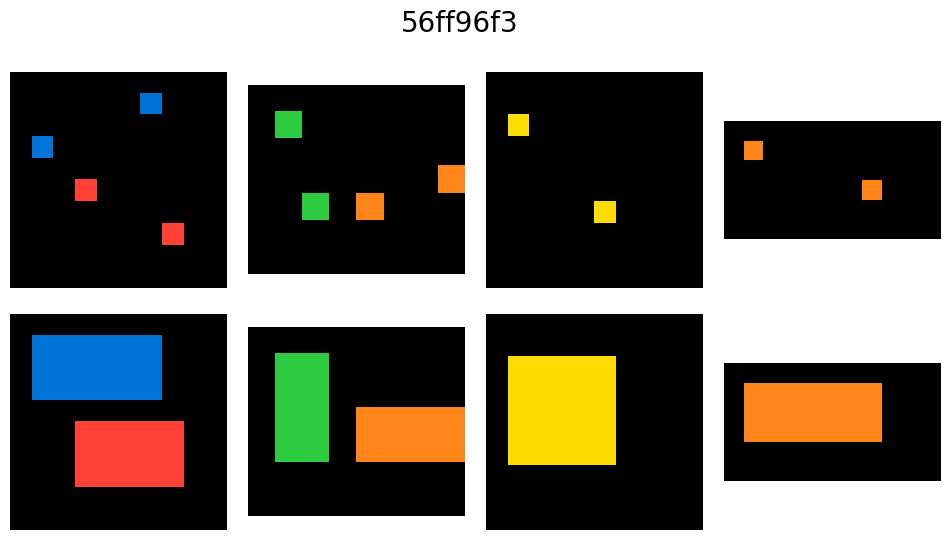

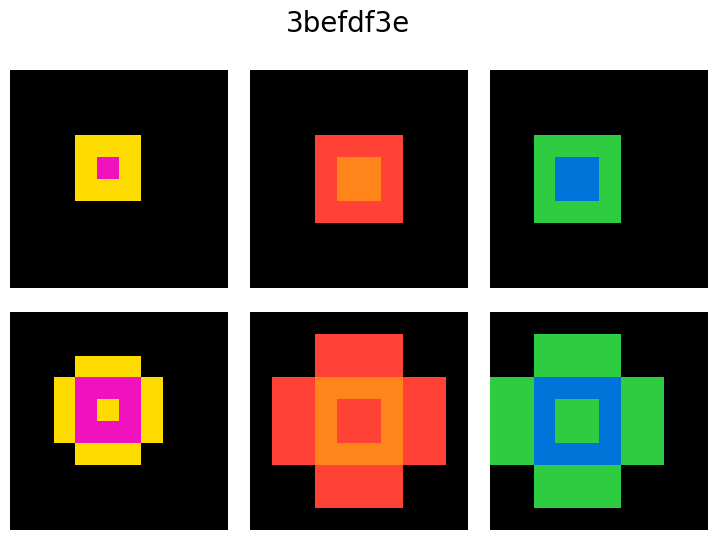

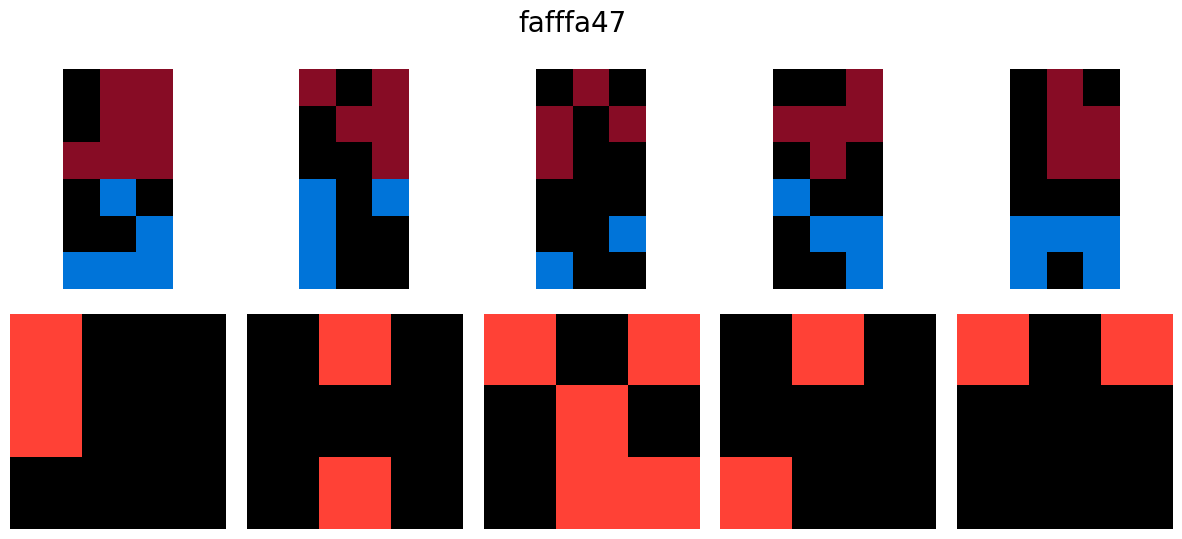

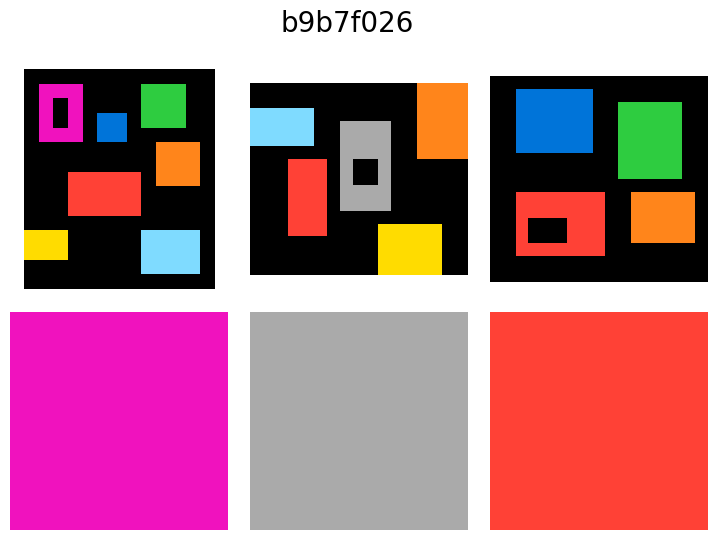

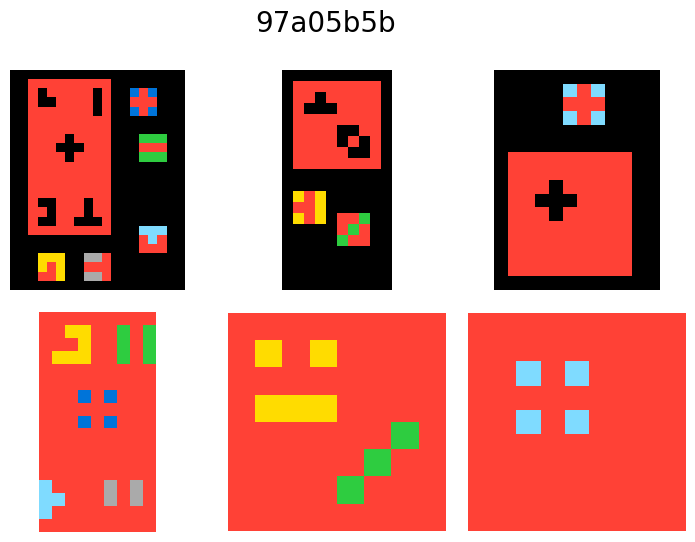

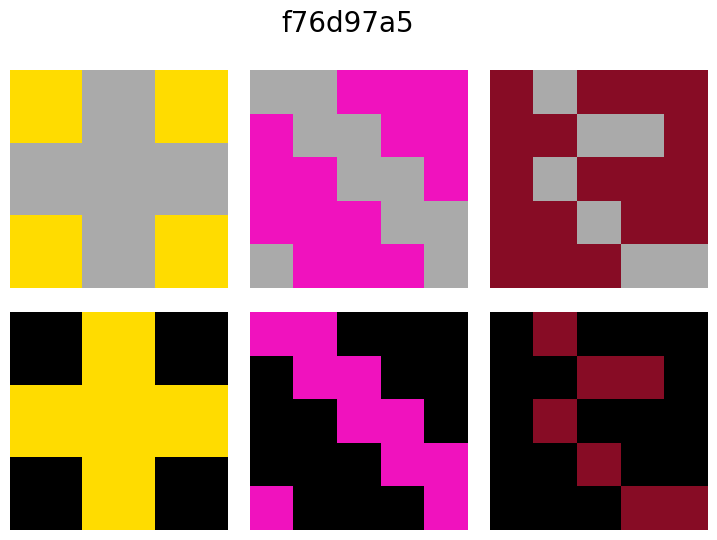

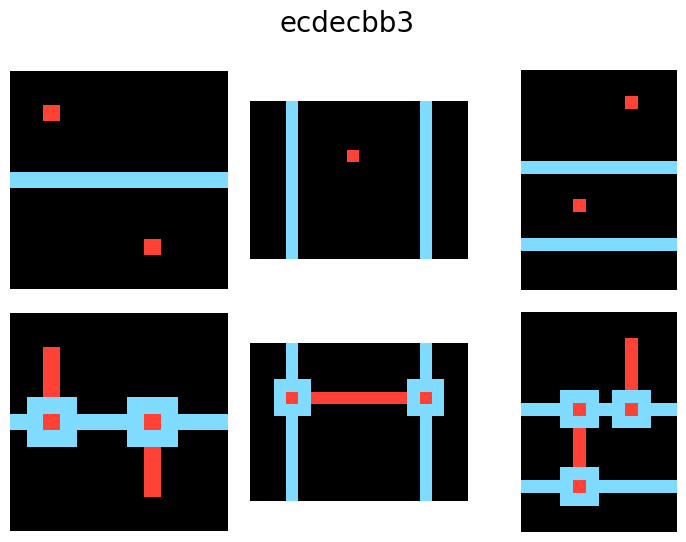

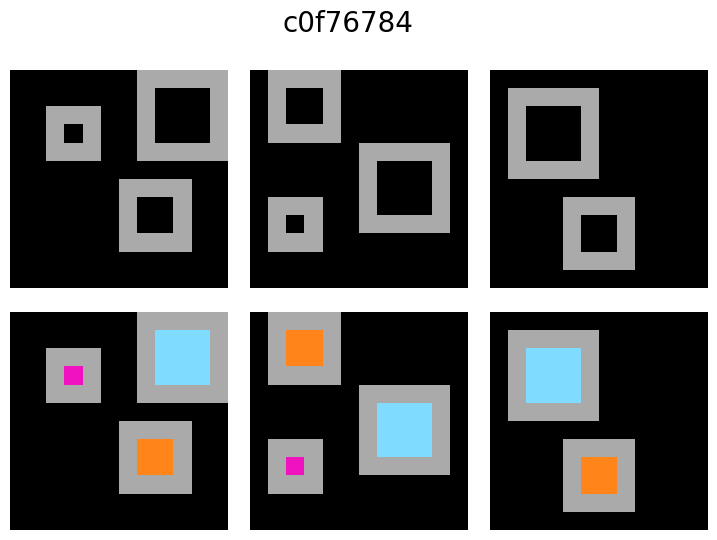

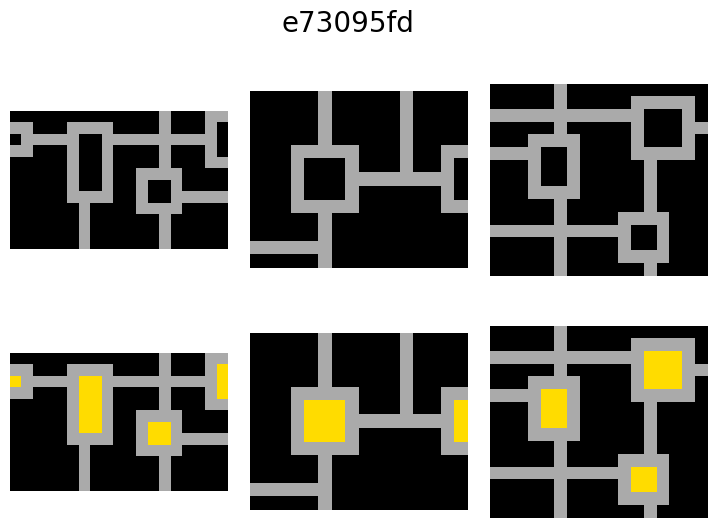

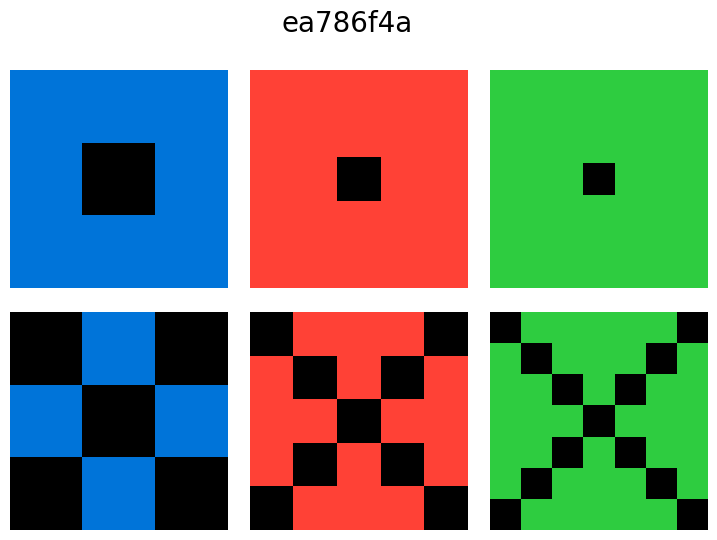

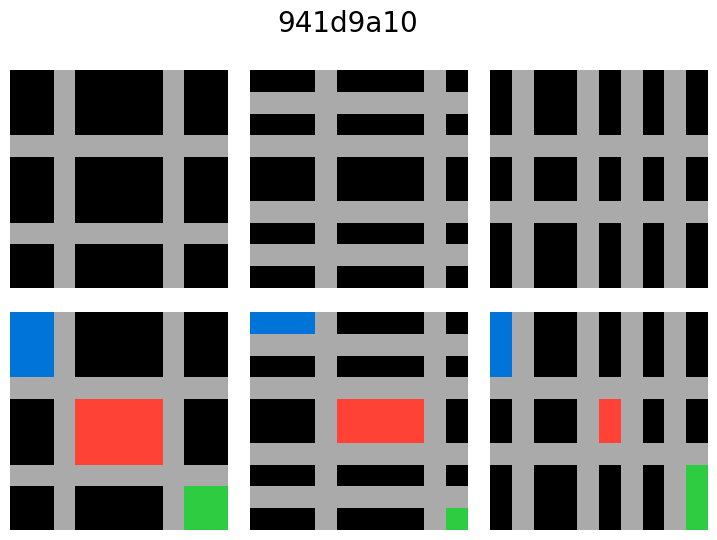

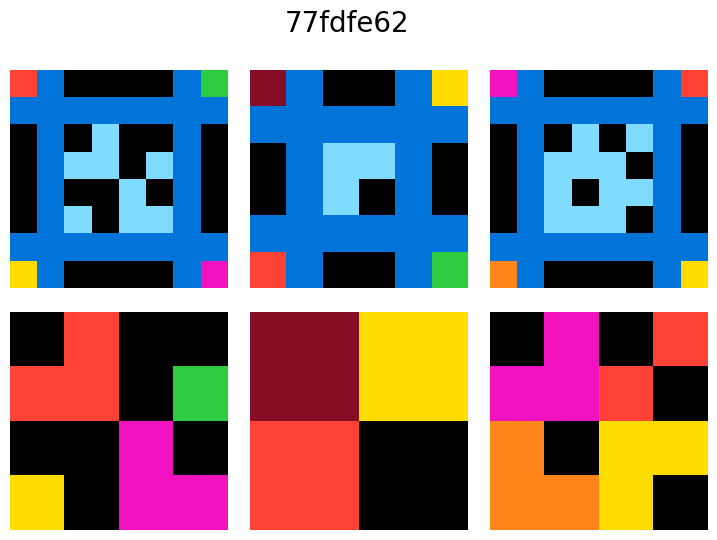

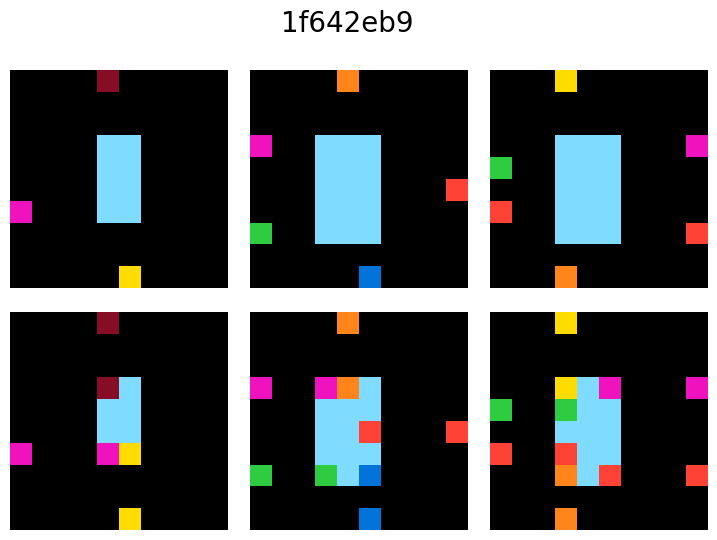

In [6]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, Normalize

for key in data['train']:
    plot_task(data['train'][key], key)

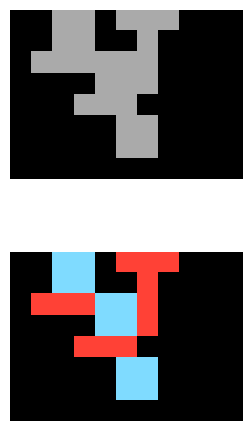

In [9]:
plot_task(data['test']['150deff5'])